In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [165]:
df= pd.read_csv('train.csv')
new_data = pd.read_csv('test.csv')
new_data.set_index('Id',inplace = True)
df.set_index('Id',inplace = True)

In [166]:
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1             60       RL         65.0     8450   Pave   NaN      Reg   
2             20       RL         80.0     9600   Pave   NaN      Reg   
3             60       RL         68.0    11250   Pave   NaN      IR1   
4             70       RL         60.0     9550   Pave   NaN      IR1   
5             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1456          60       RL         62.0     7917   Pave   NaN      Reg   
1457          20       RL         85.0    13175   Pave   NaN      Reg   
1458          70       RL         66.0     9042   Pave   NaN      Reg   
1459          20       RL         68.0     9717   Pave   NaN      Reg   
1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
Id                                    ...                                      
1            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
5            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1456         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1458         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1460         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                               
1          0      2    2008        WD         Normal     208500  
2          0      5    2007        WD         Normal     181500  
3          0      9    2008        WD         Normal     223500  
4          0      2    2006        WD        Abnorml     140000  
5          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1456       0      8    2007        WD         Normal     175000  
1457       0      2    2010        WD         Normal     210000  
1458    2500      5    2010        WD         Normal     266500  
1459       0      4    2010        WD         Normal     142125  
1460       0      6    2008        WD         Normal     147500  

[1460 rows x 80 columns]

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [168]:
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

# Analyze data

In [169]:
#for i in df.columns :
    #if df[i].dtype == 'O':
       # print(f'unique values in {i}:', df[i].unique())

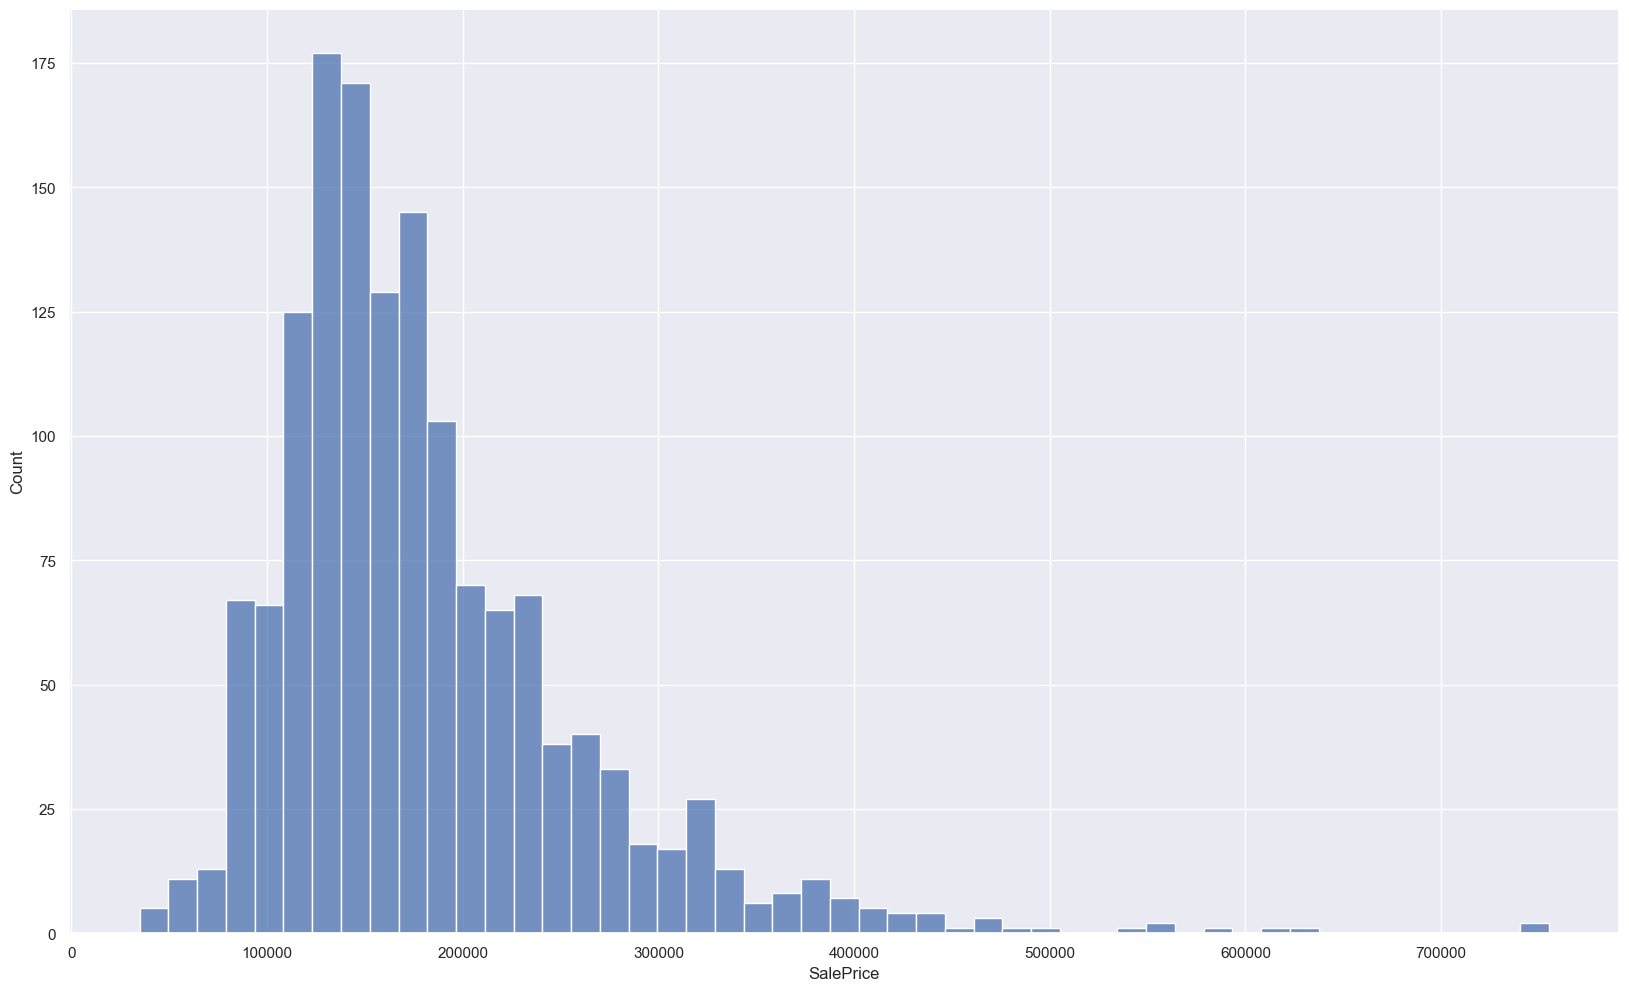

In [170]:
sns.histplot(data=df,x = 'SalePrice')
sns.set_theme(rc={'figure.figsize':(20,12)})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


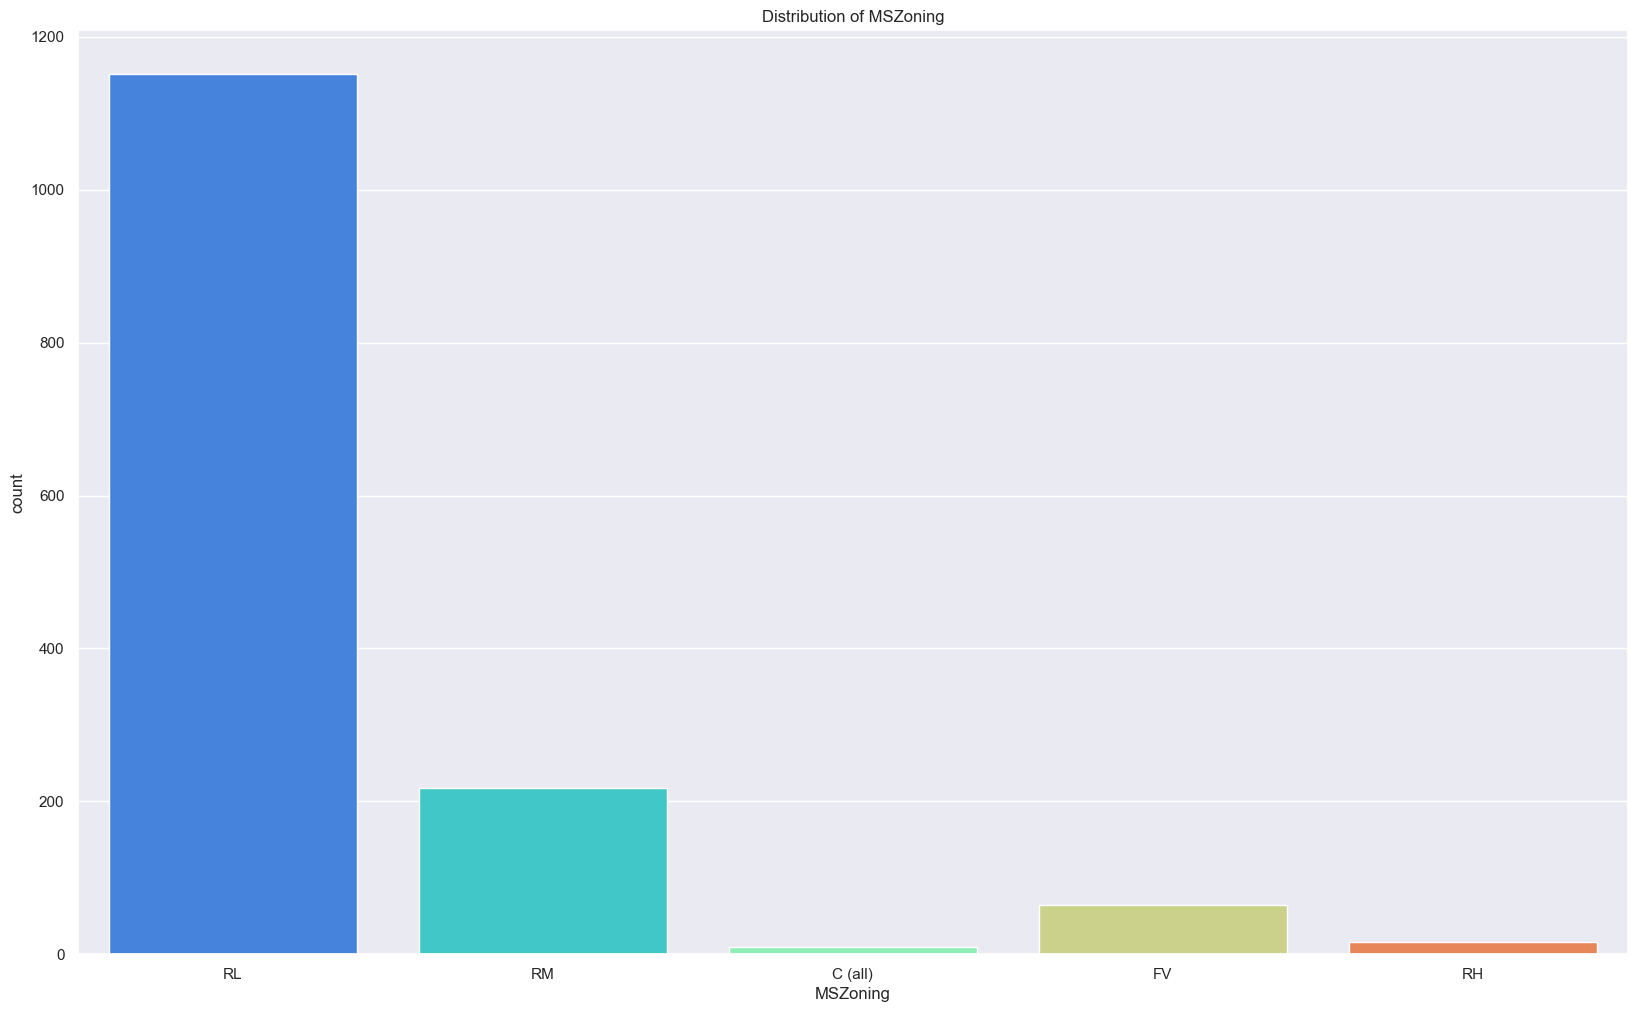

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


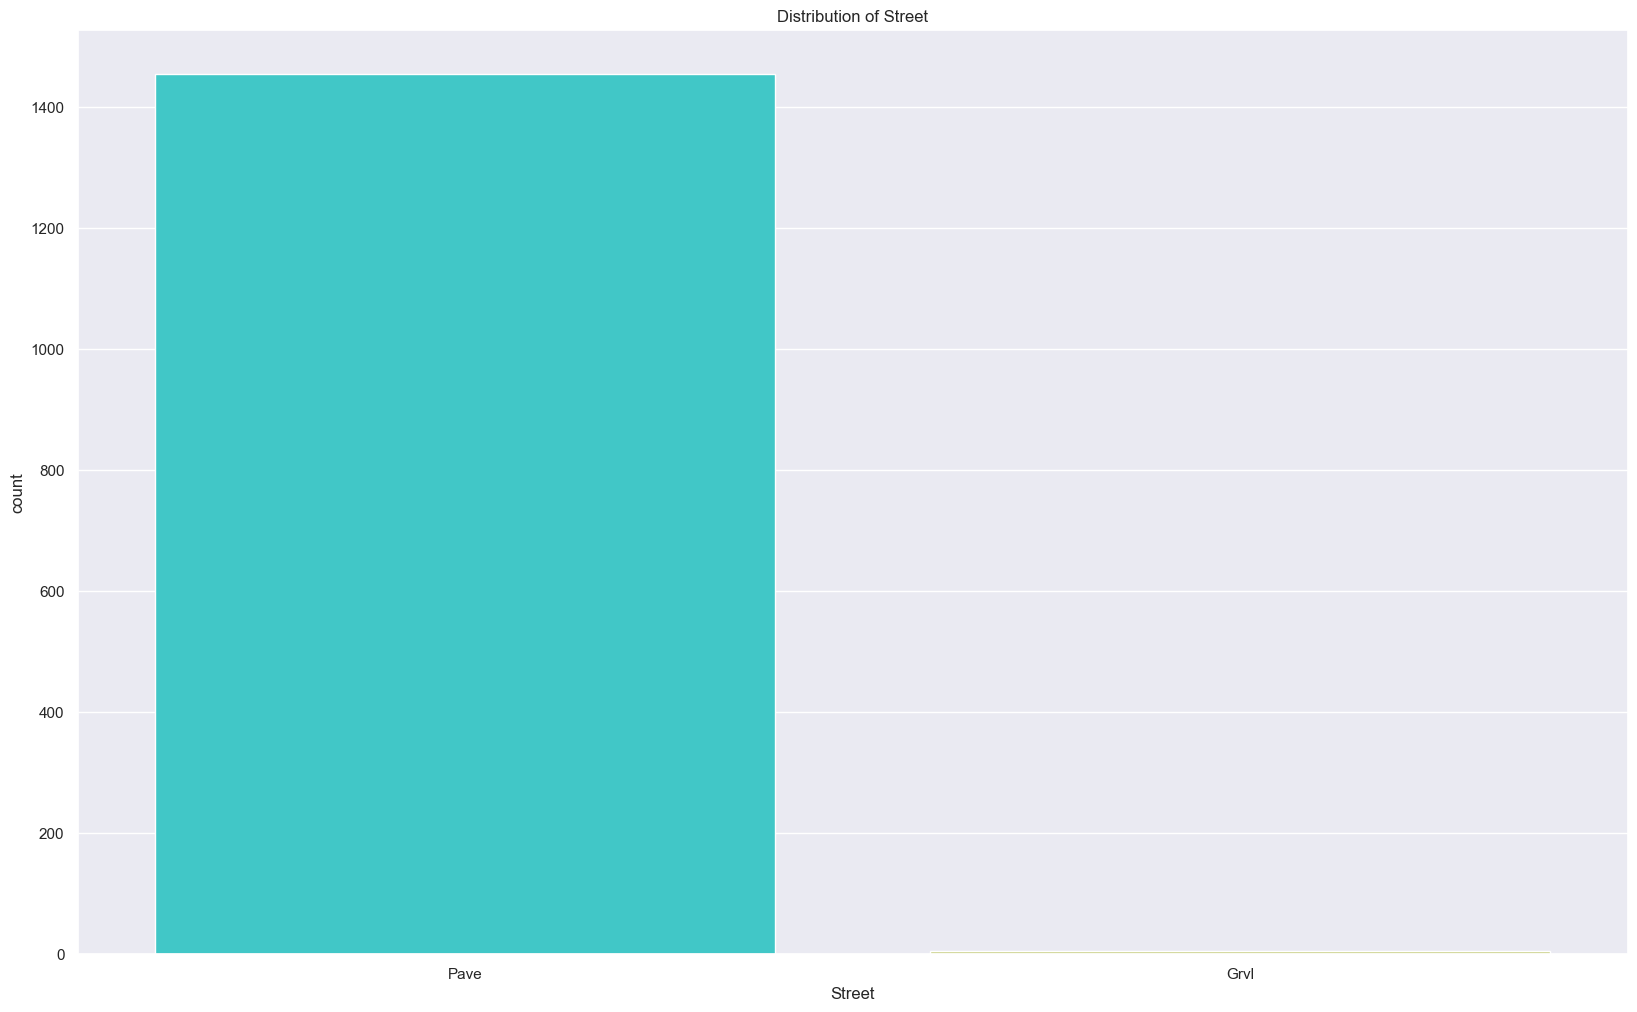

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


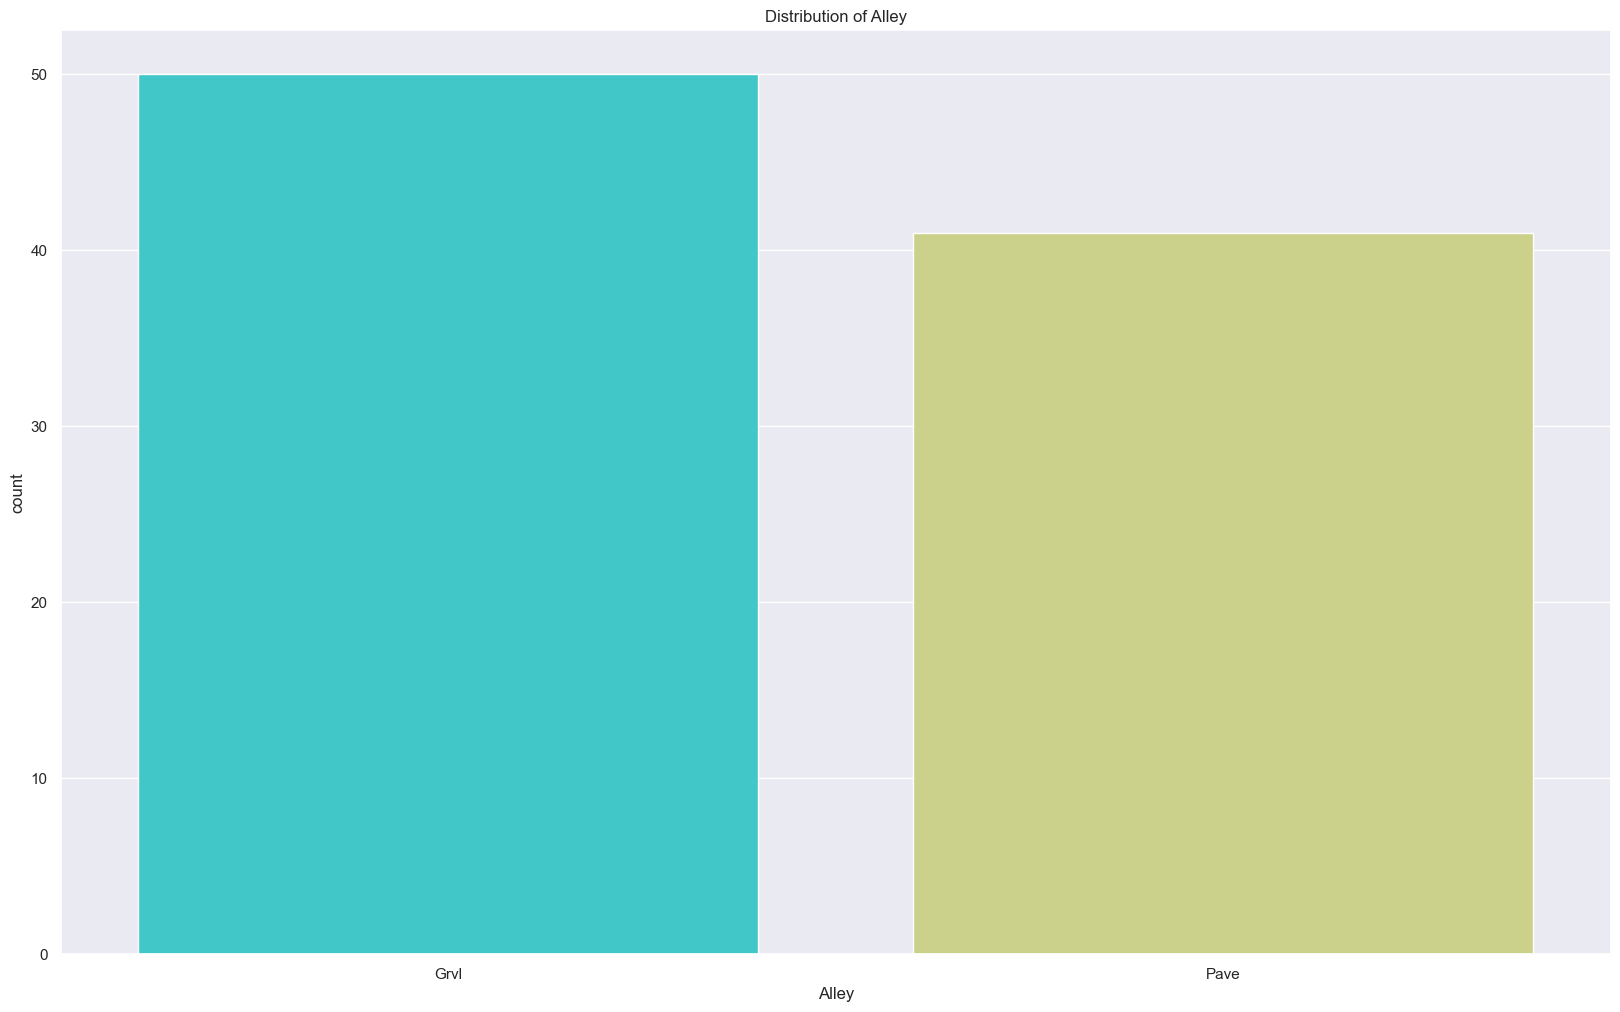

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


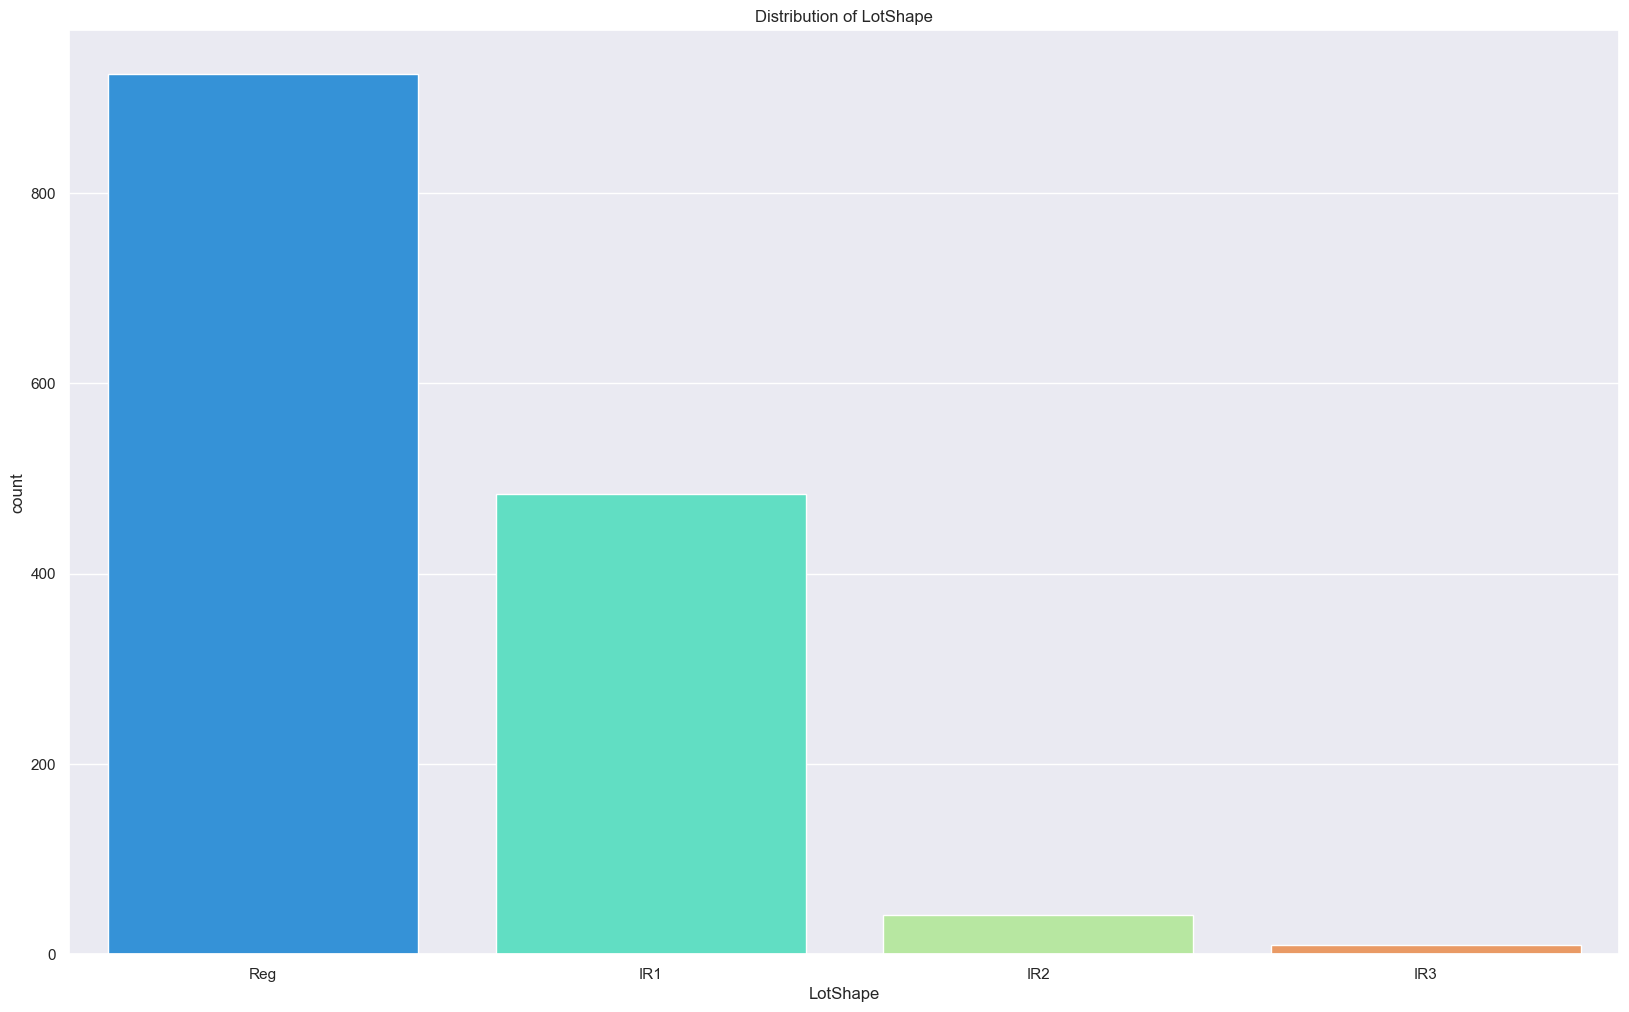

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


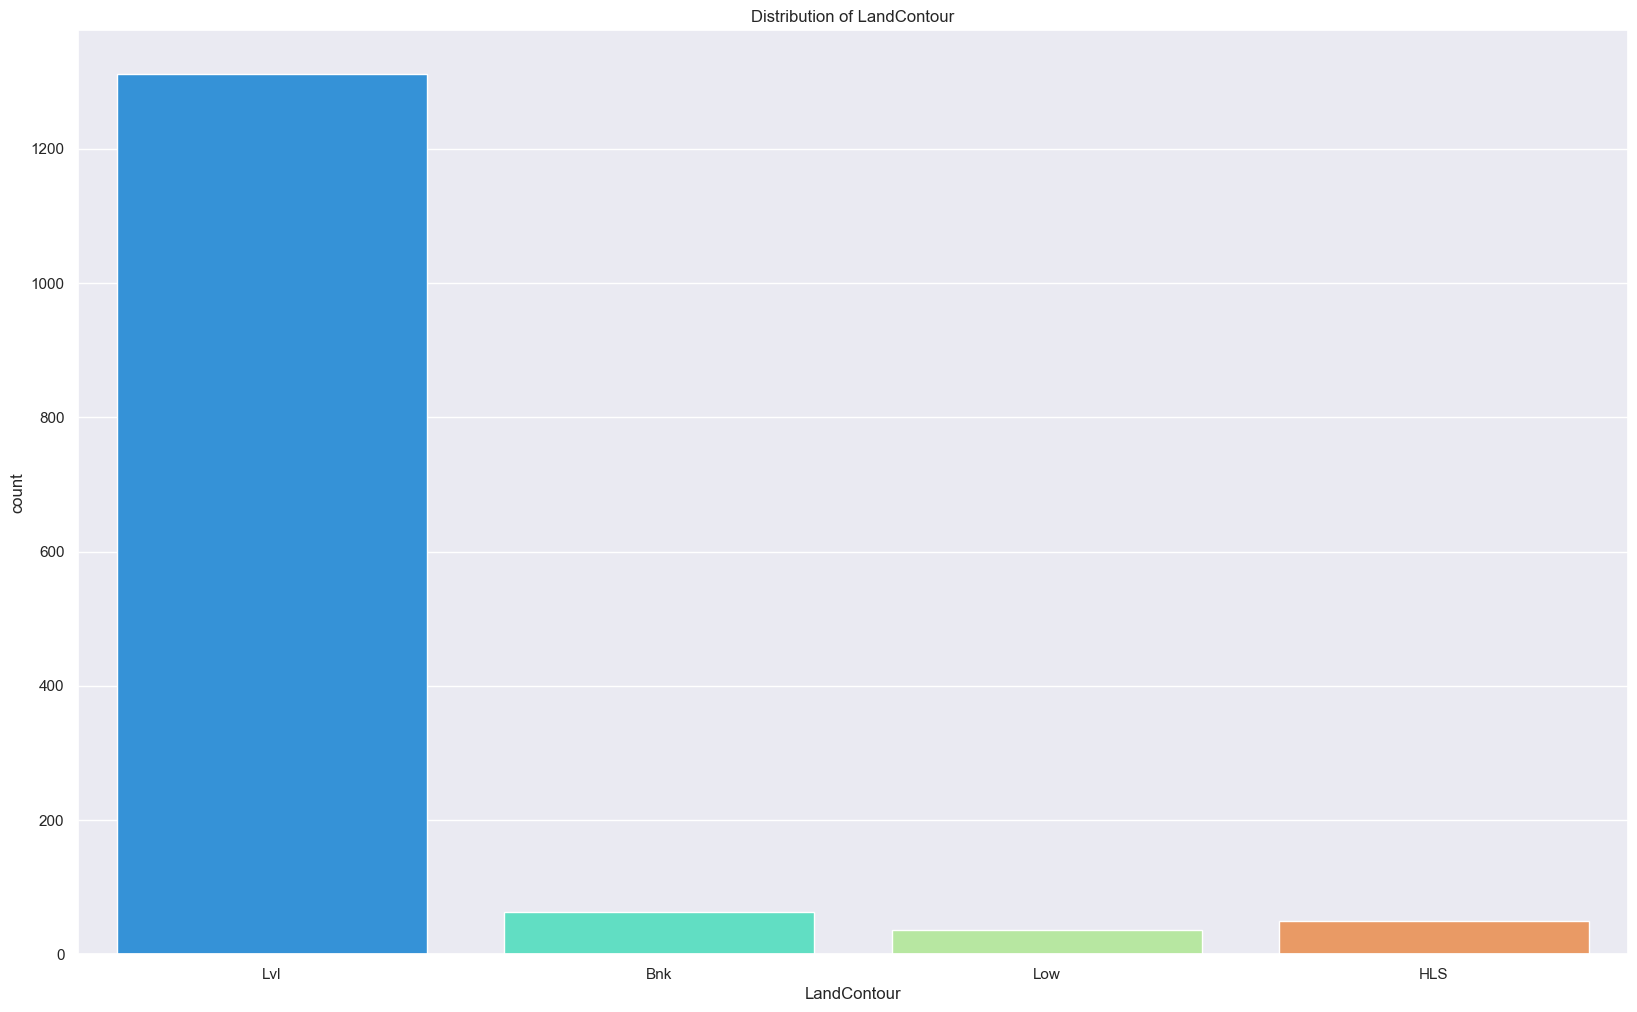

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


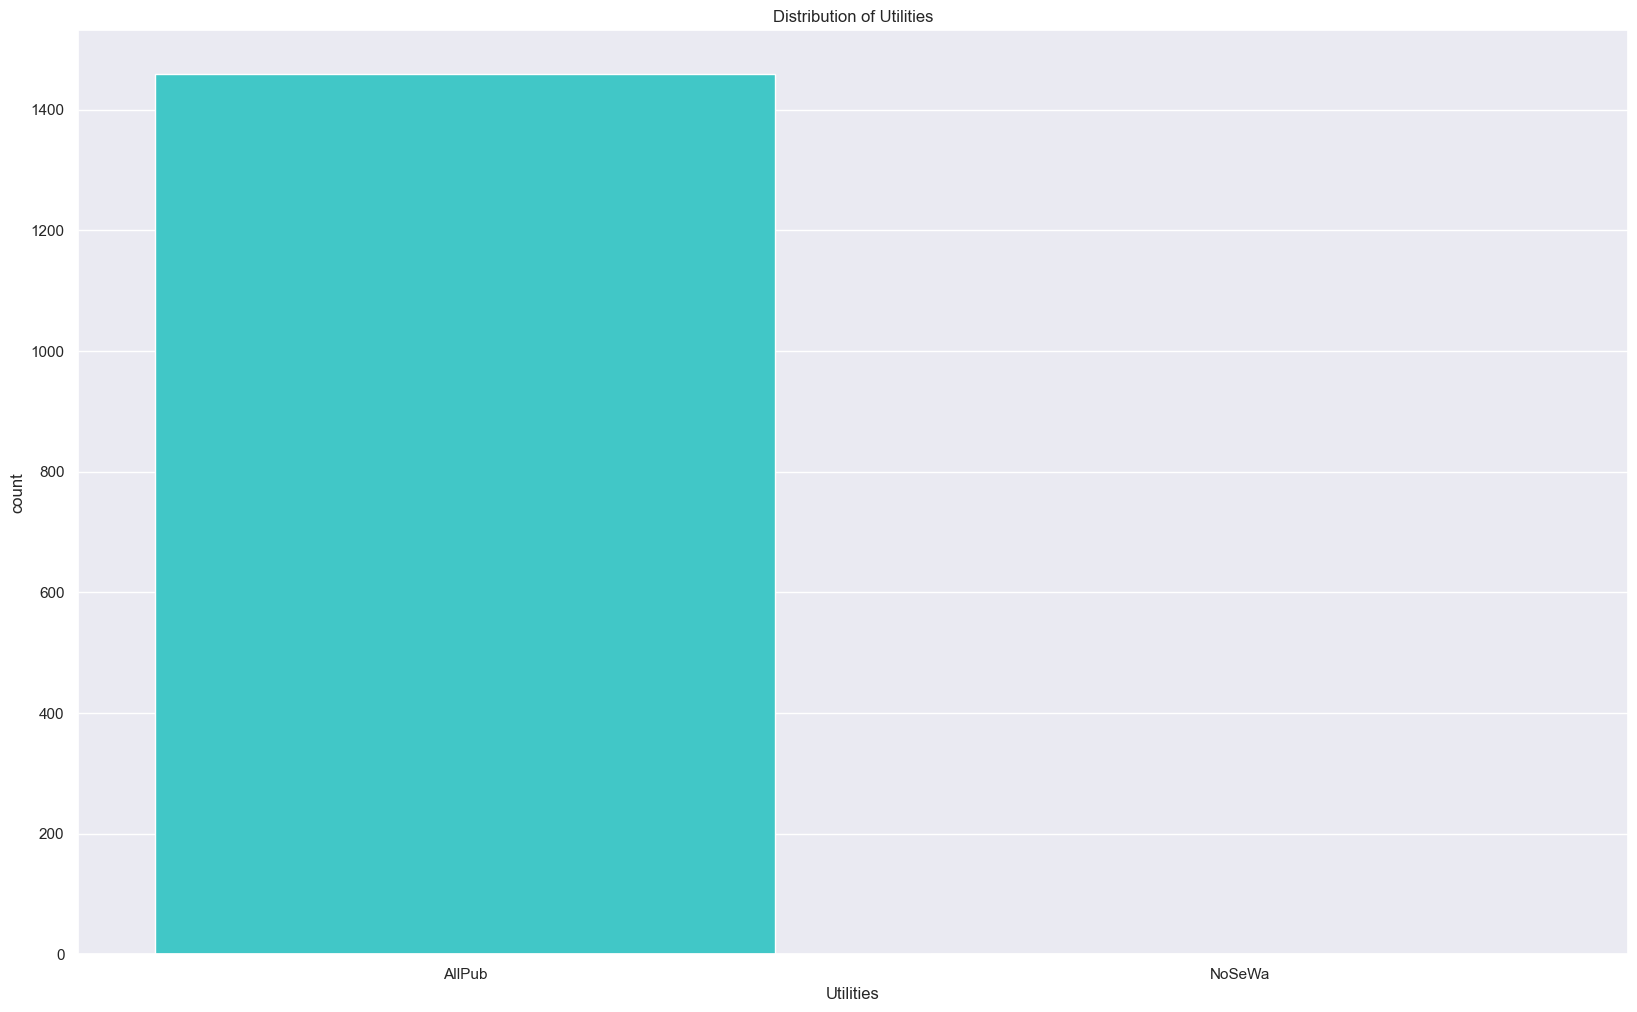

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


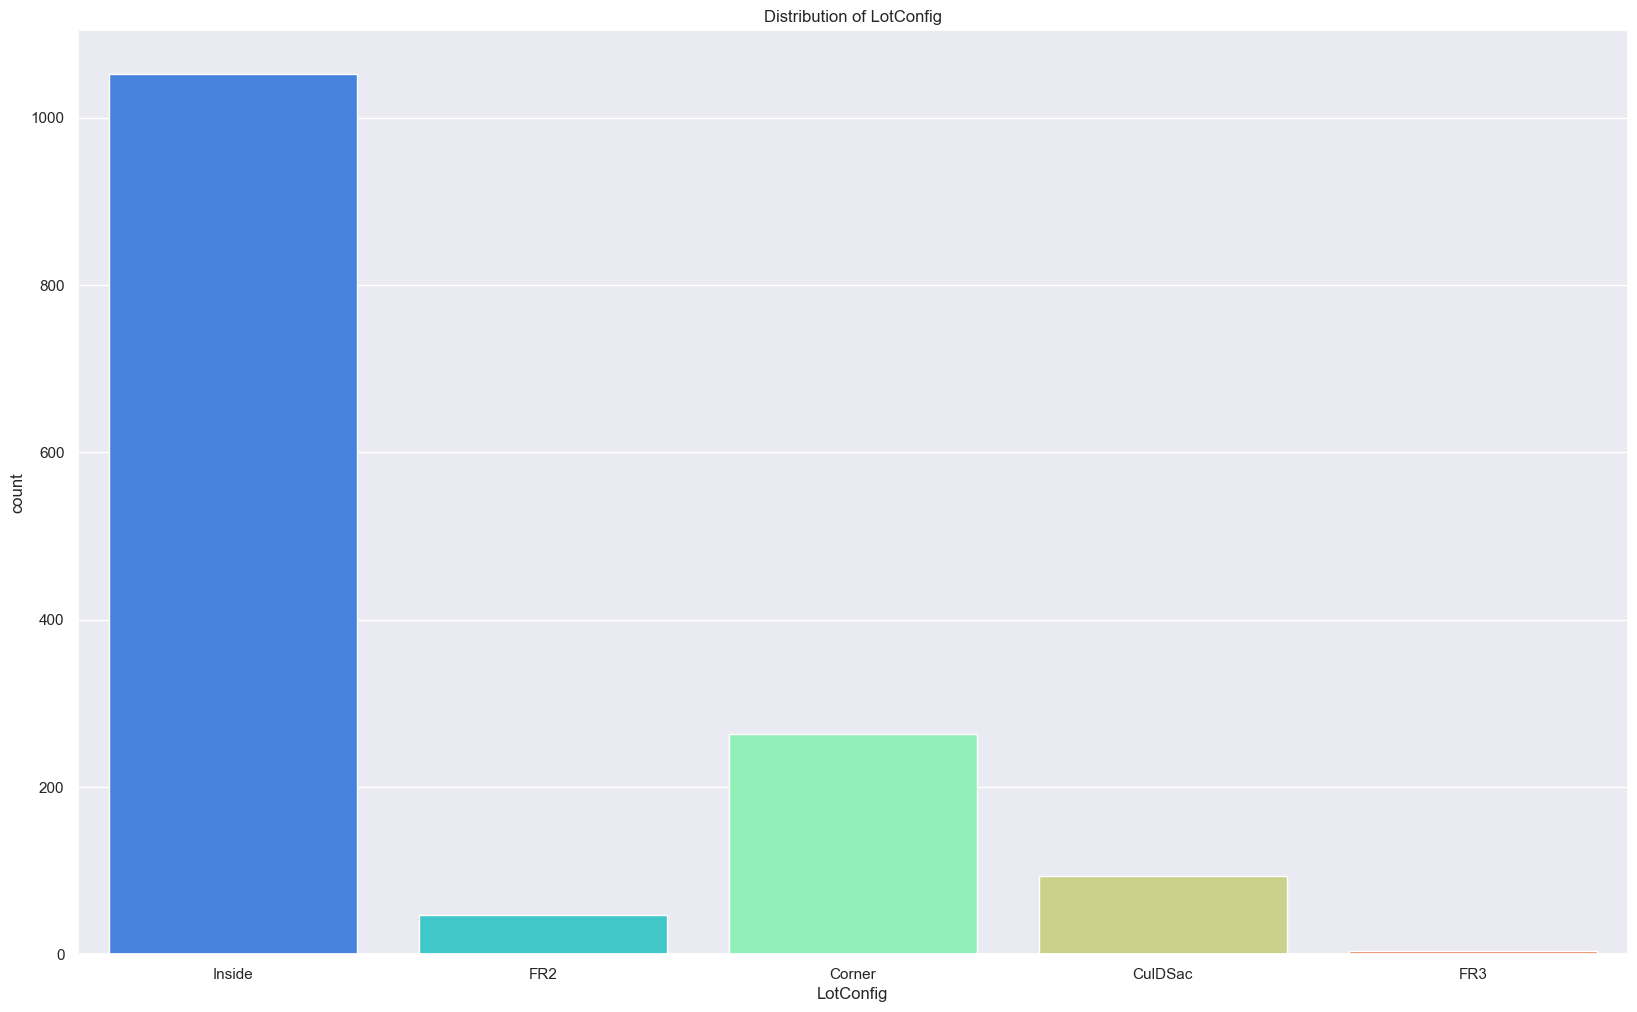

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


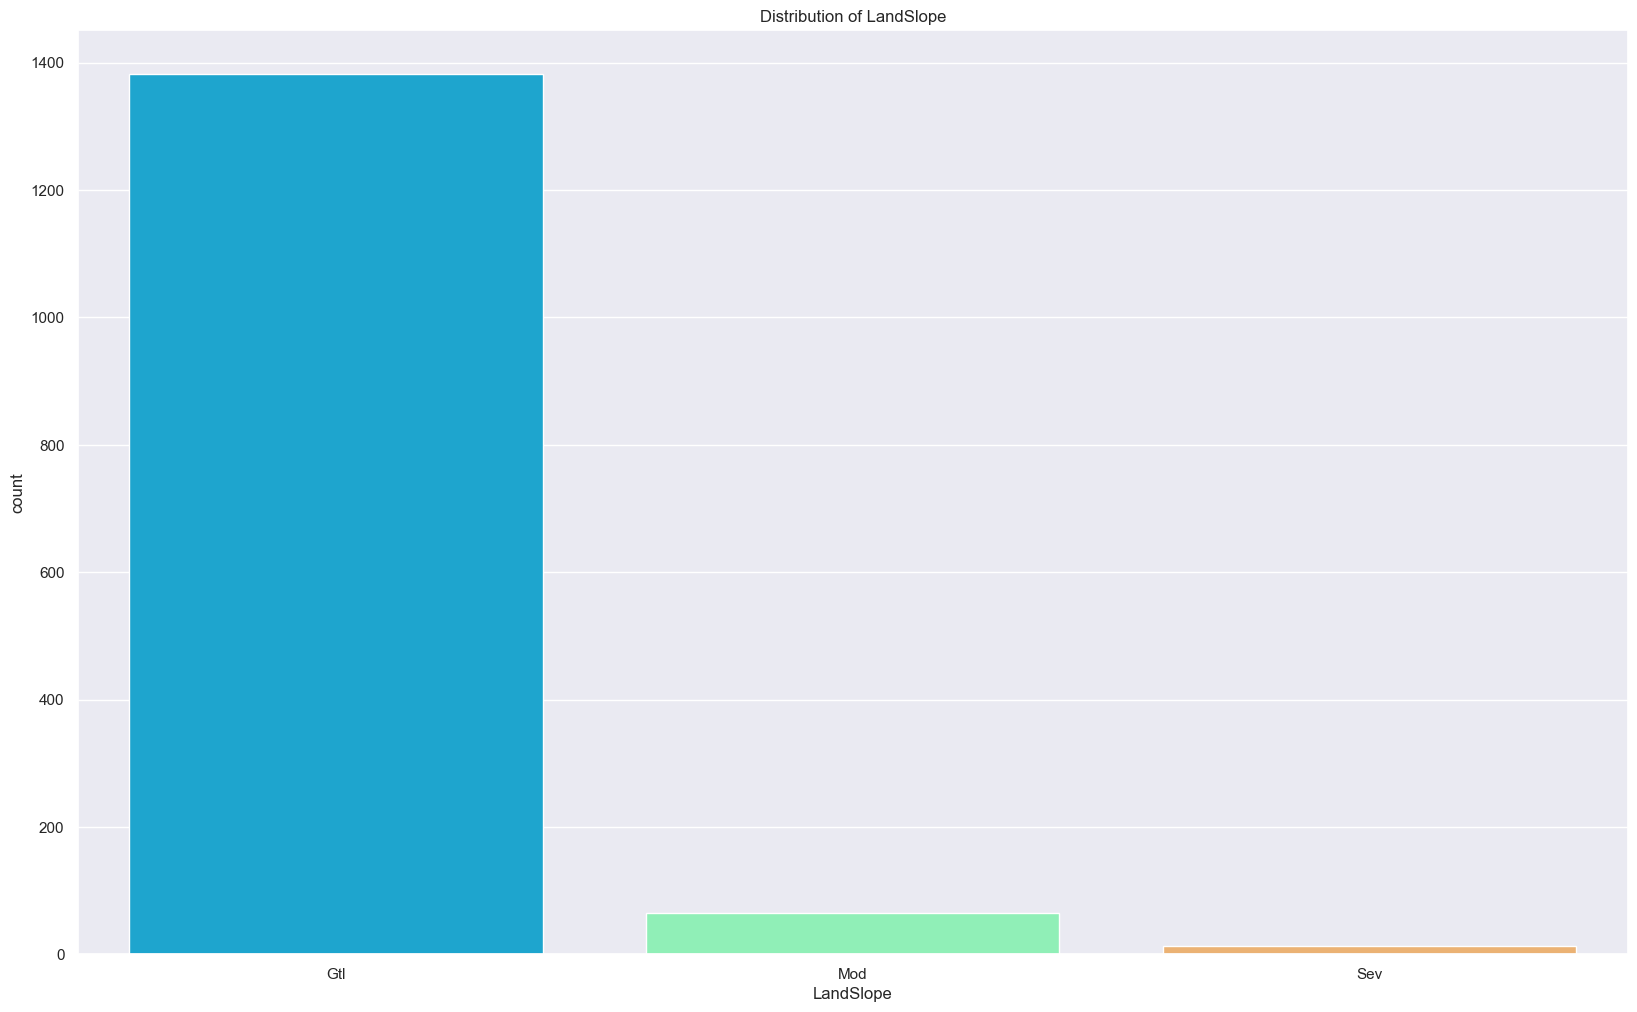

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


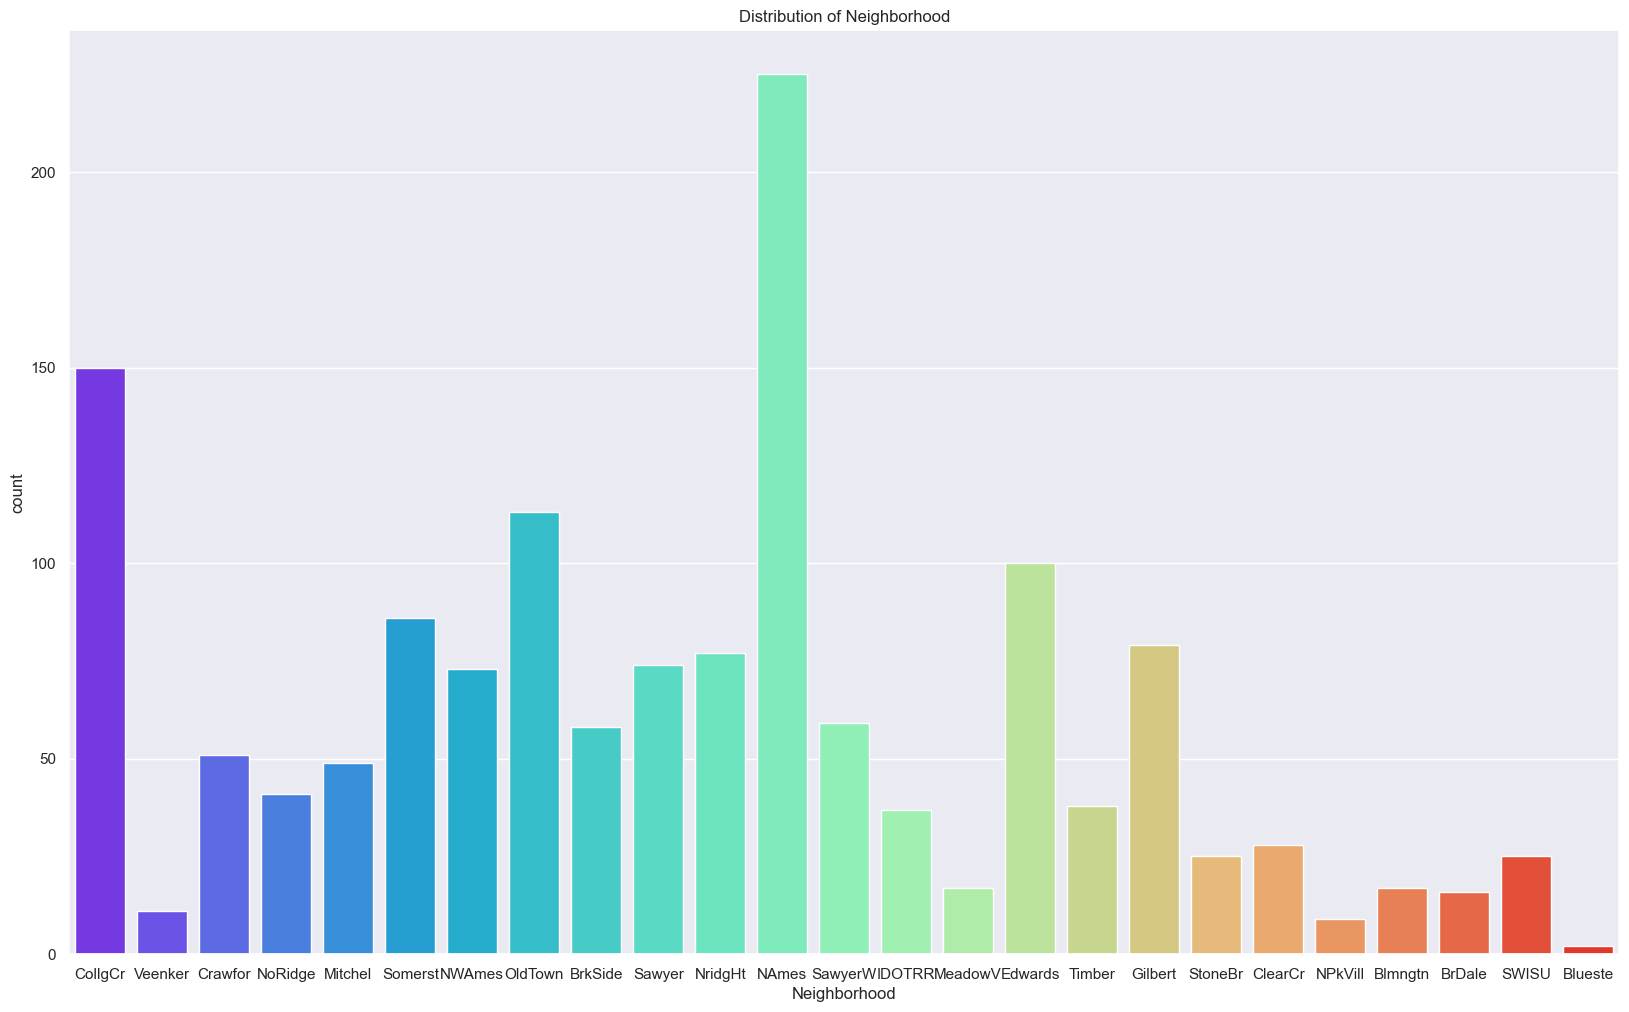

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


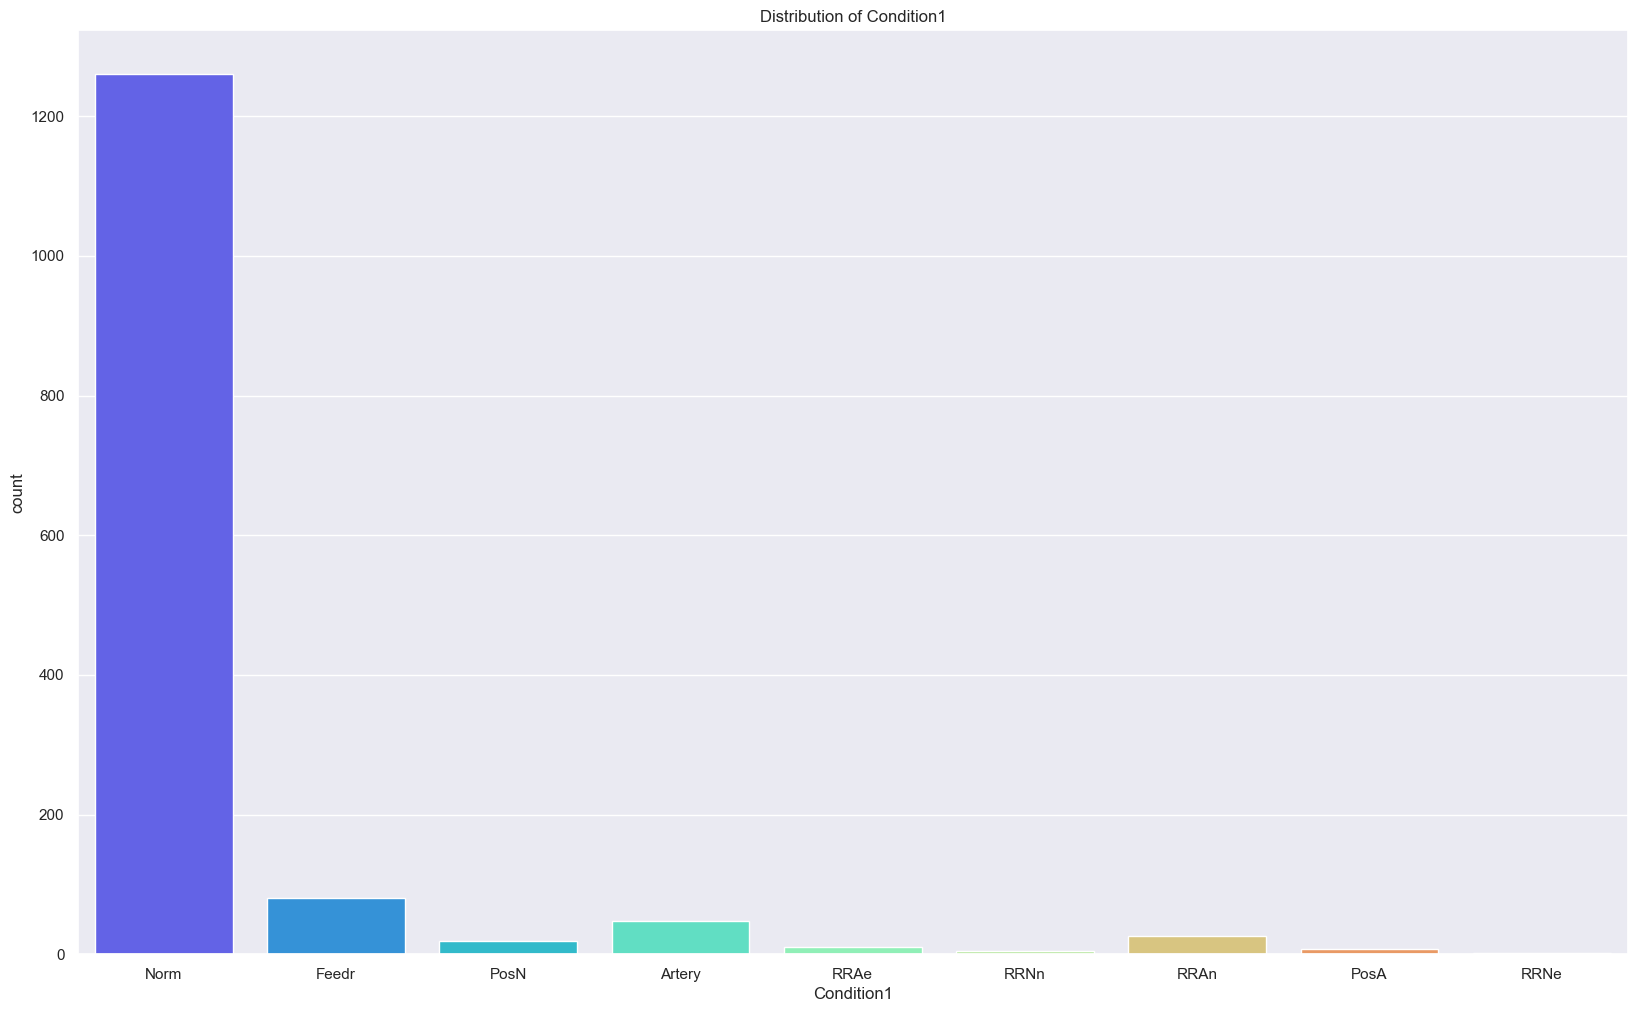

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


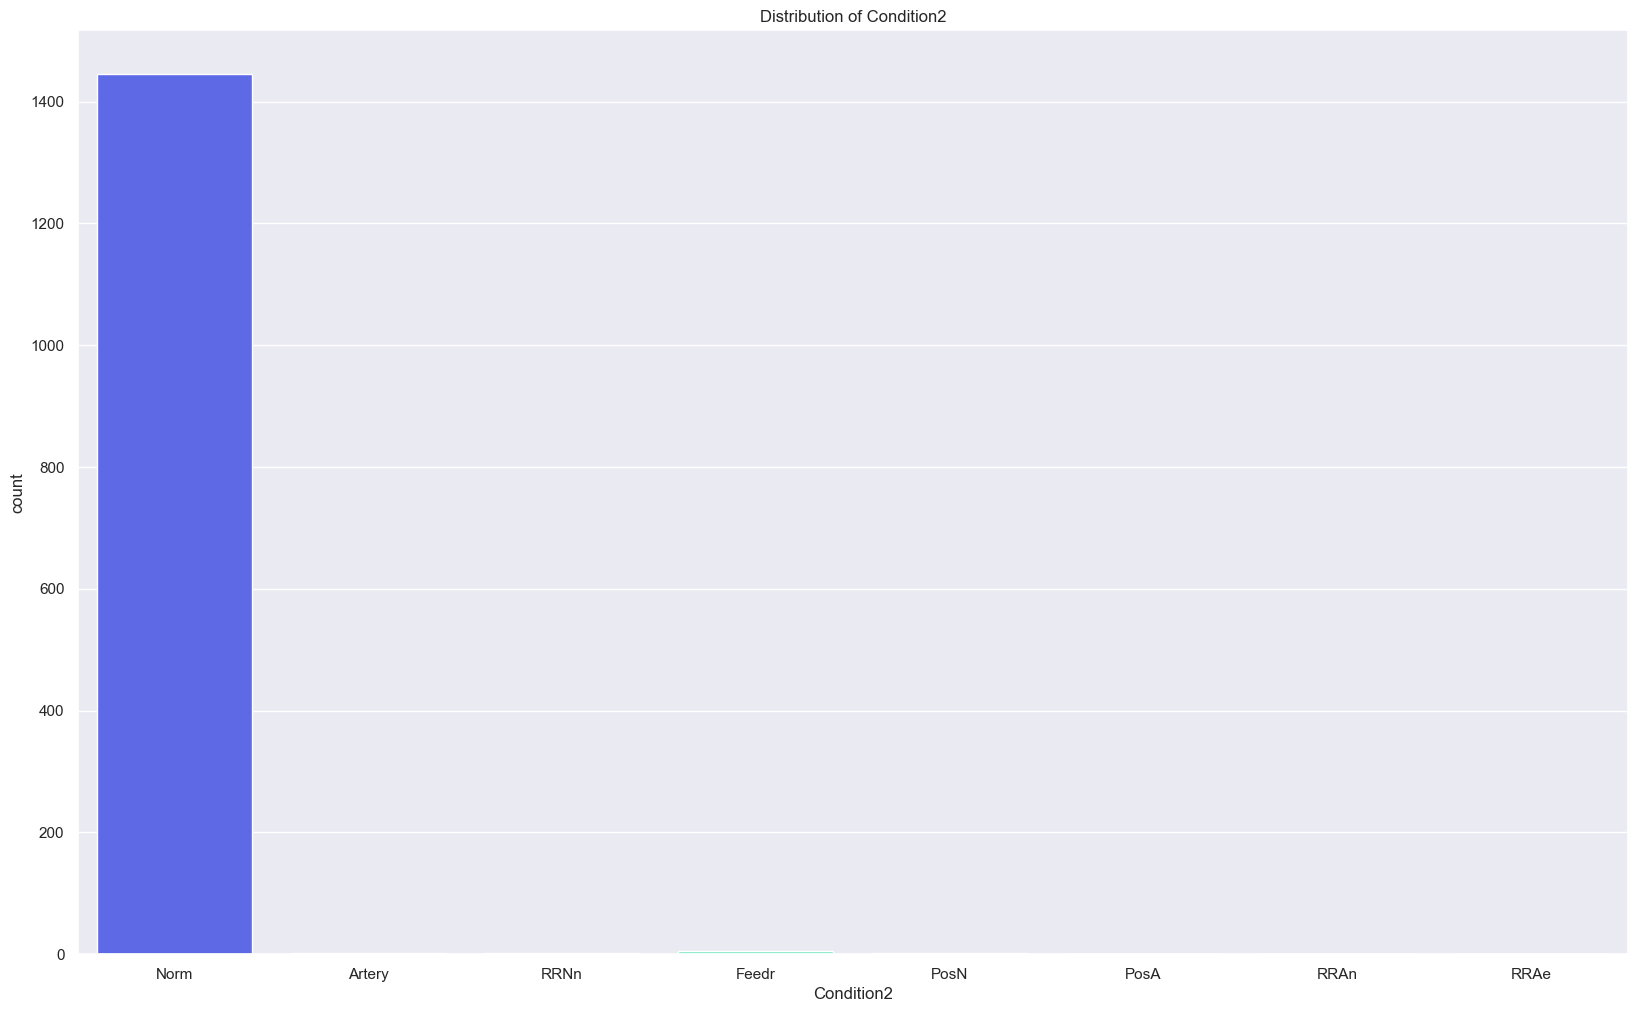

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


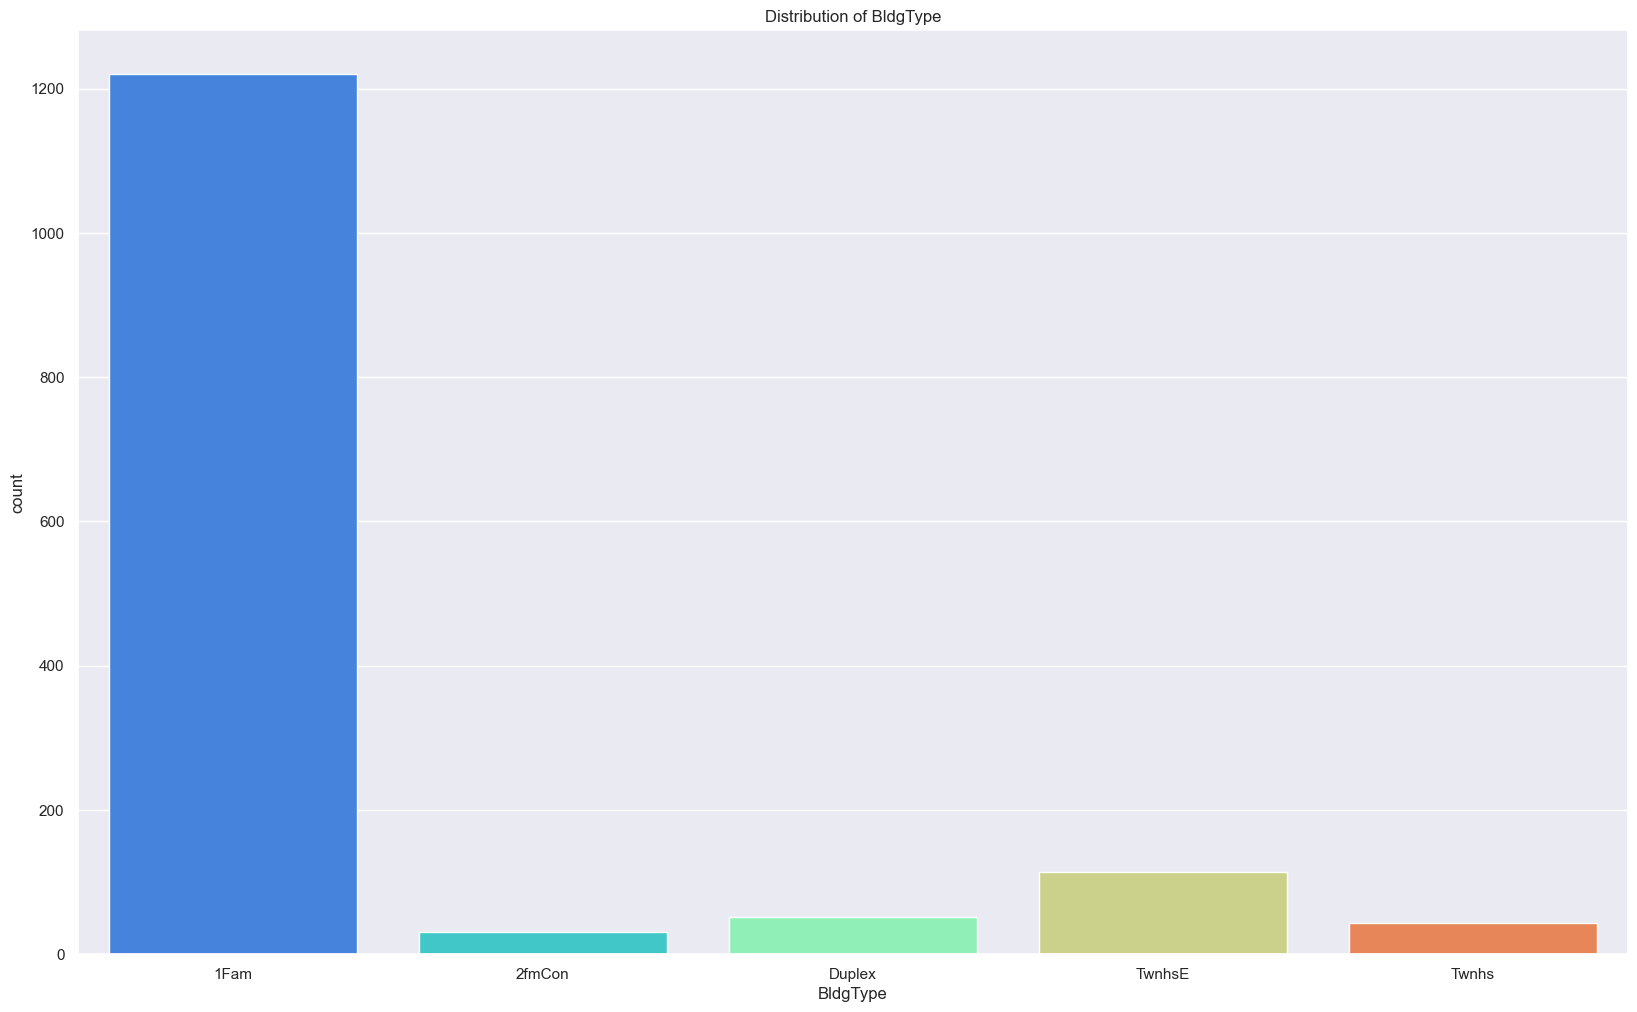

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


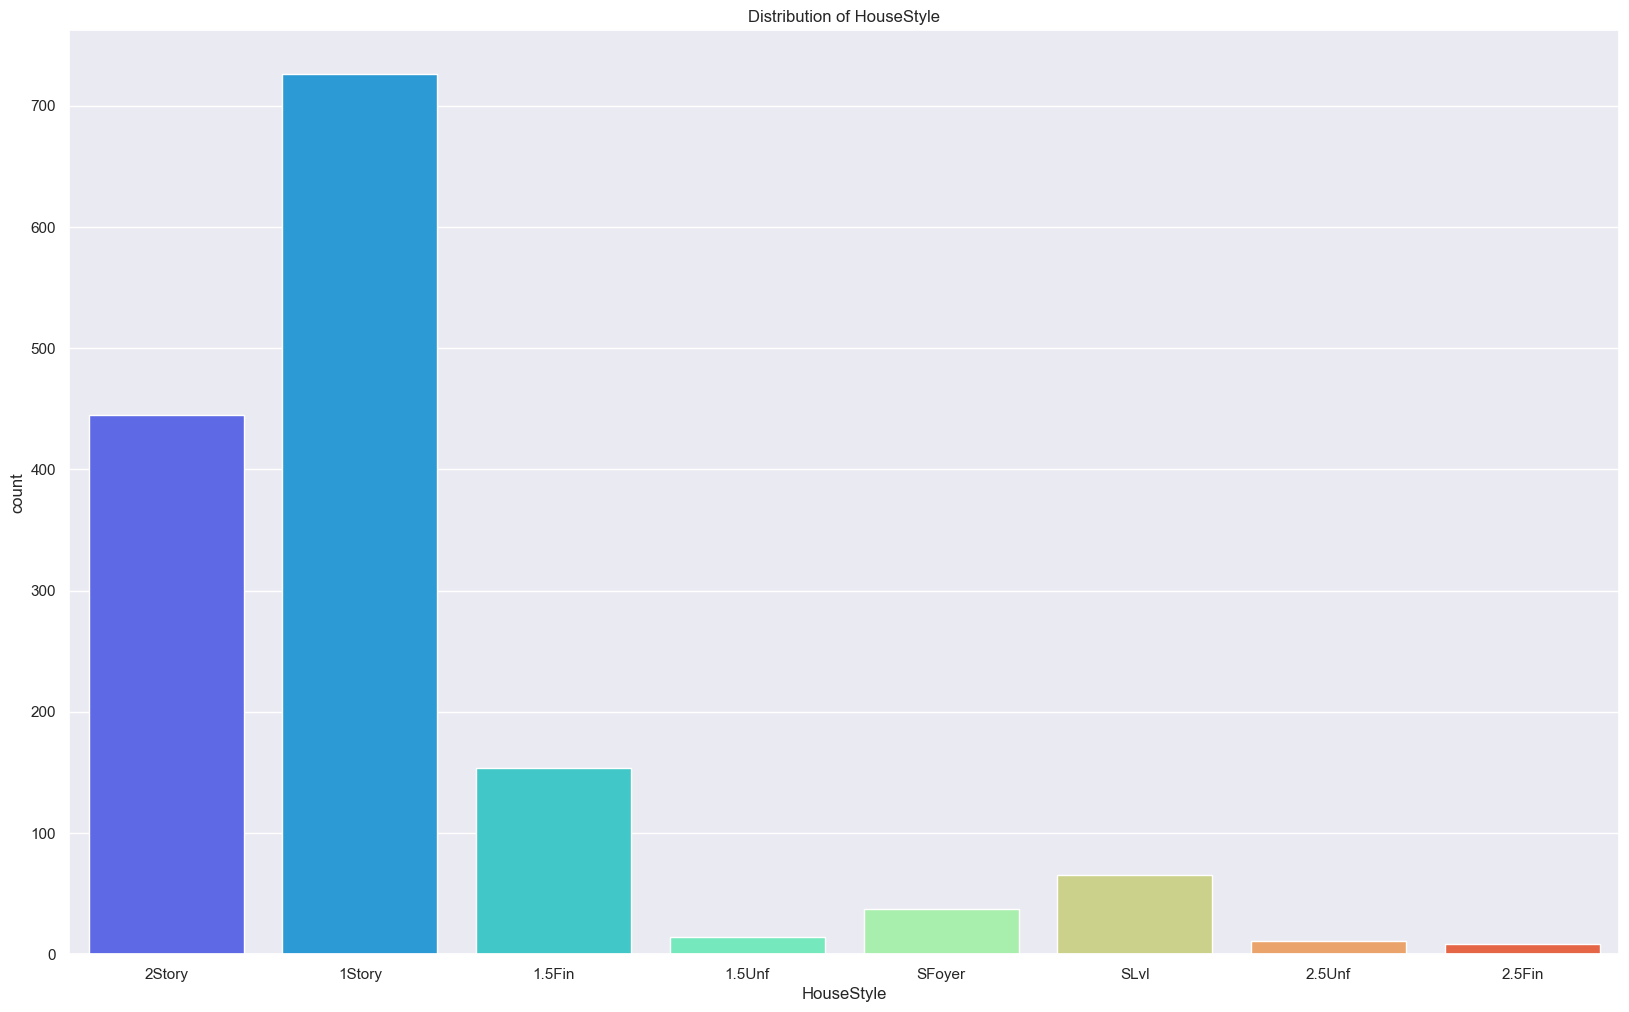

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


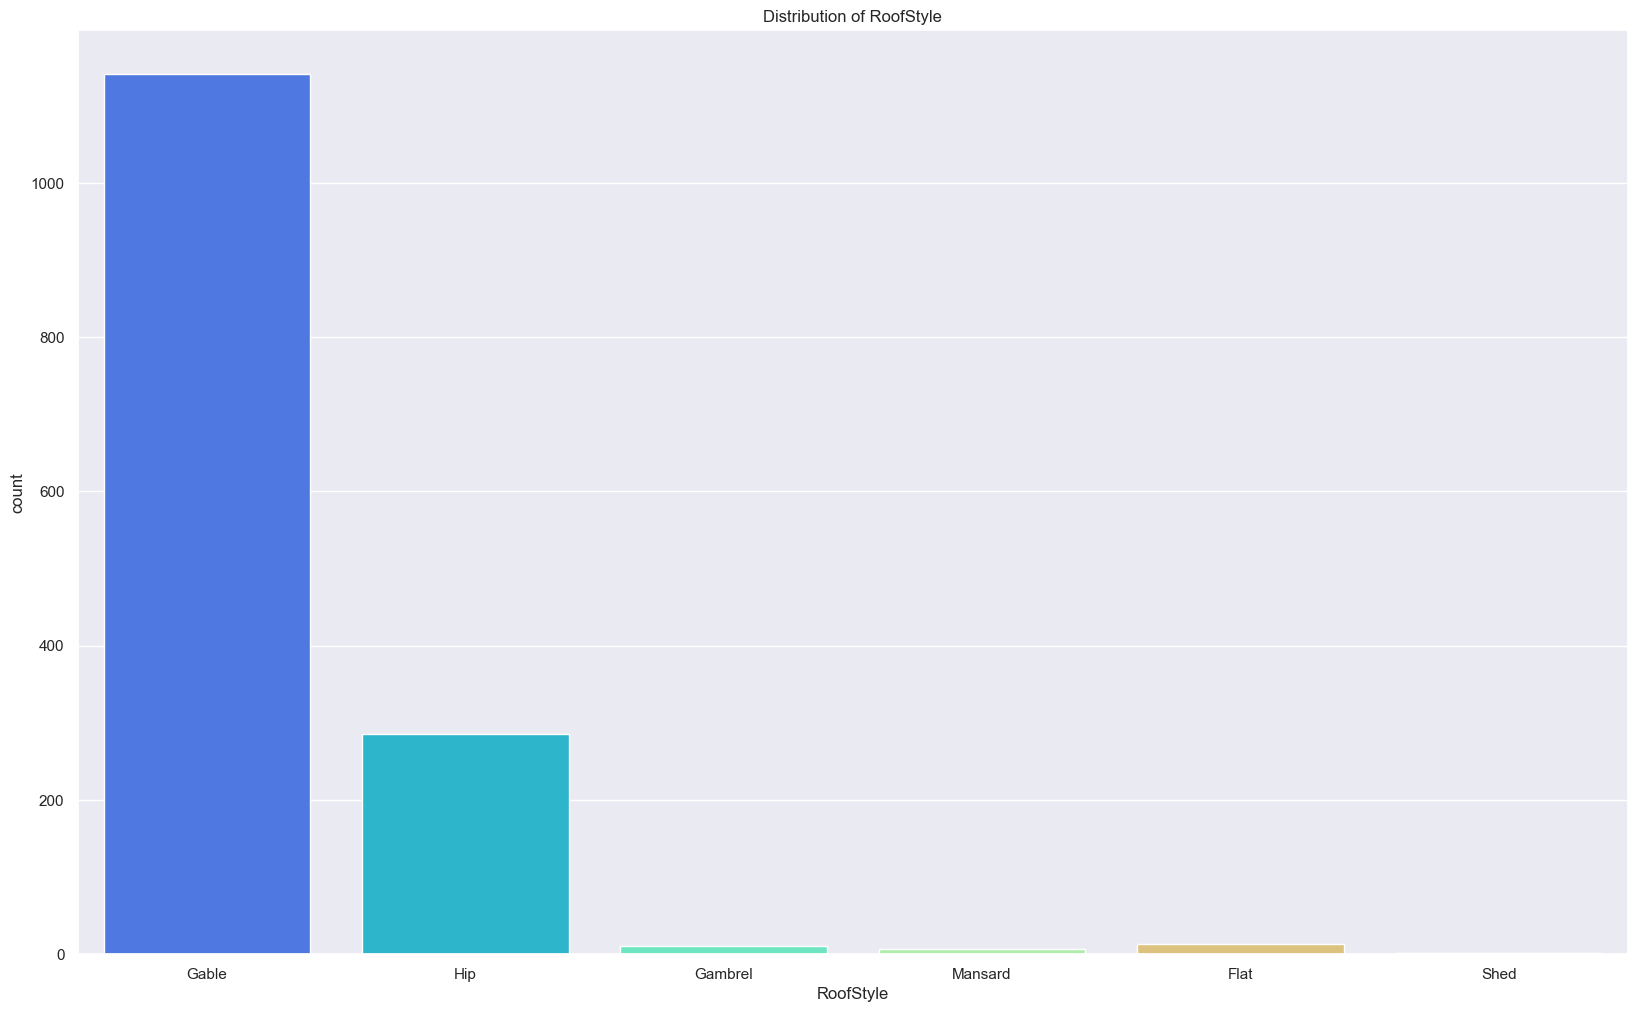

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


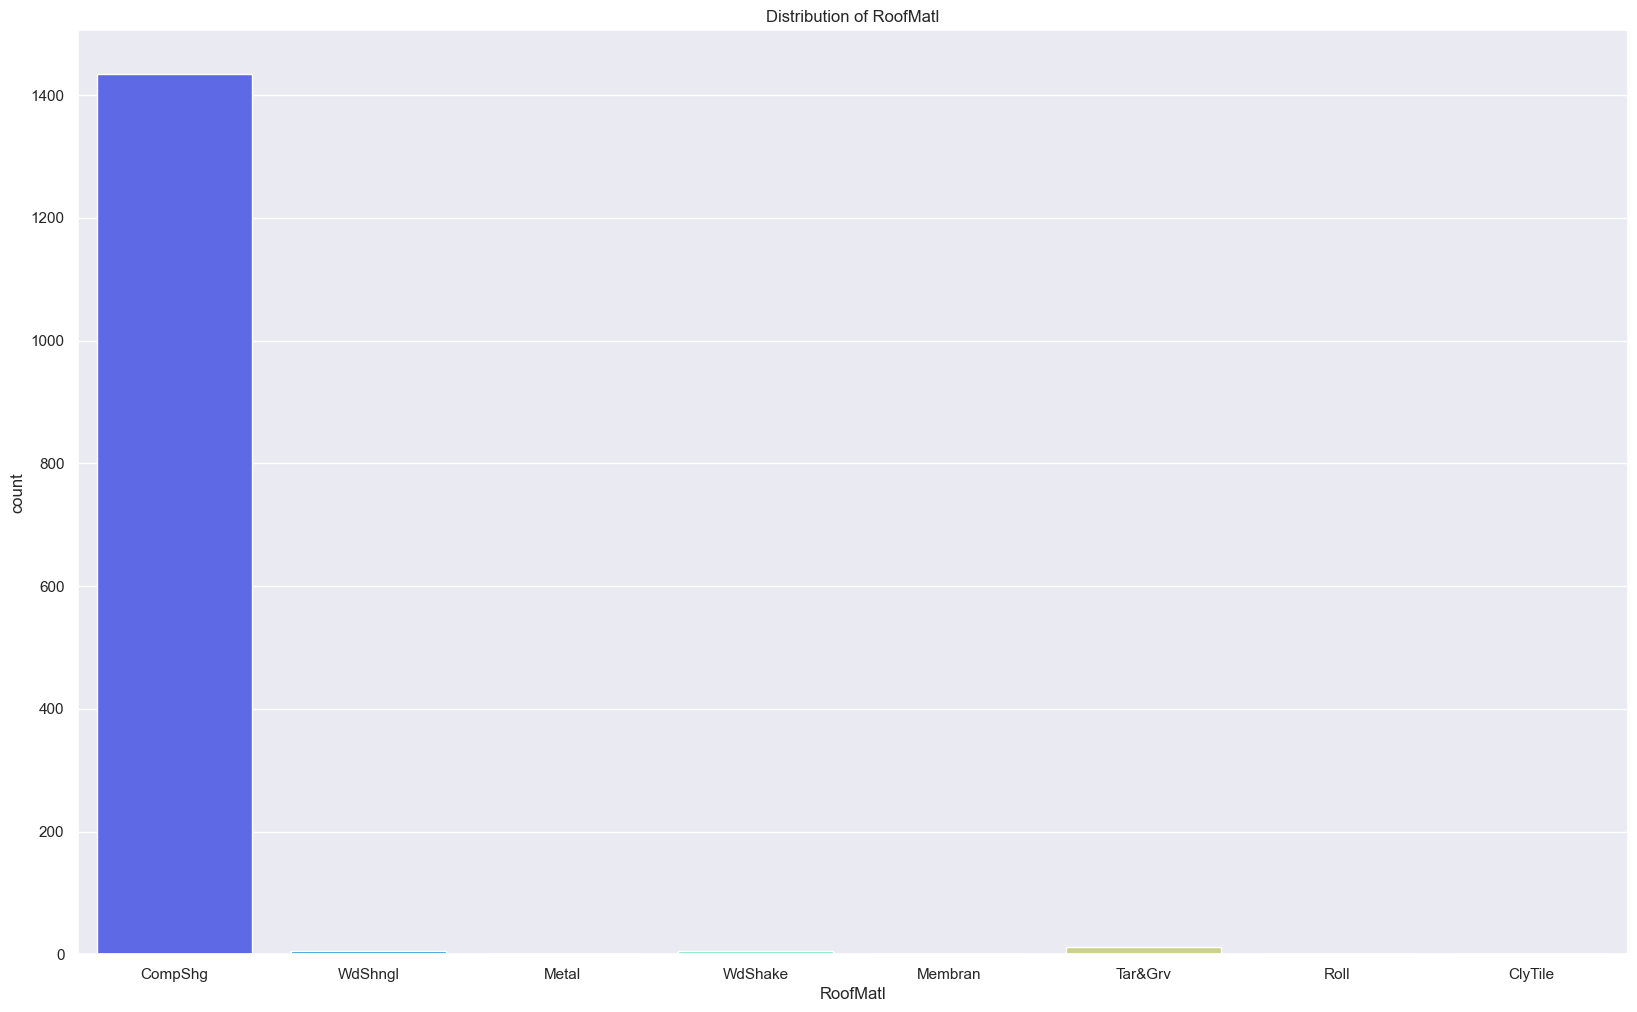

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


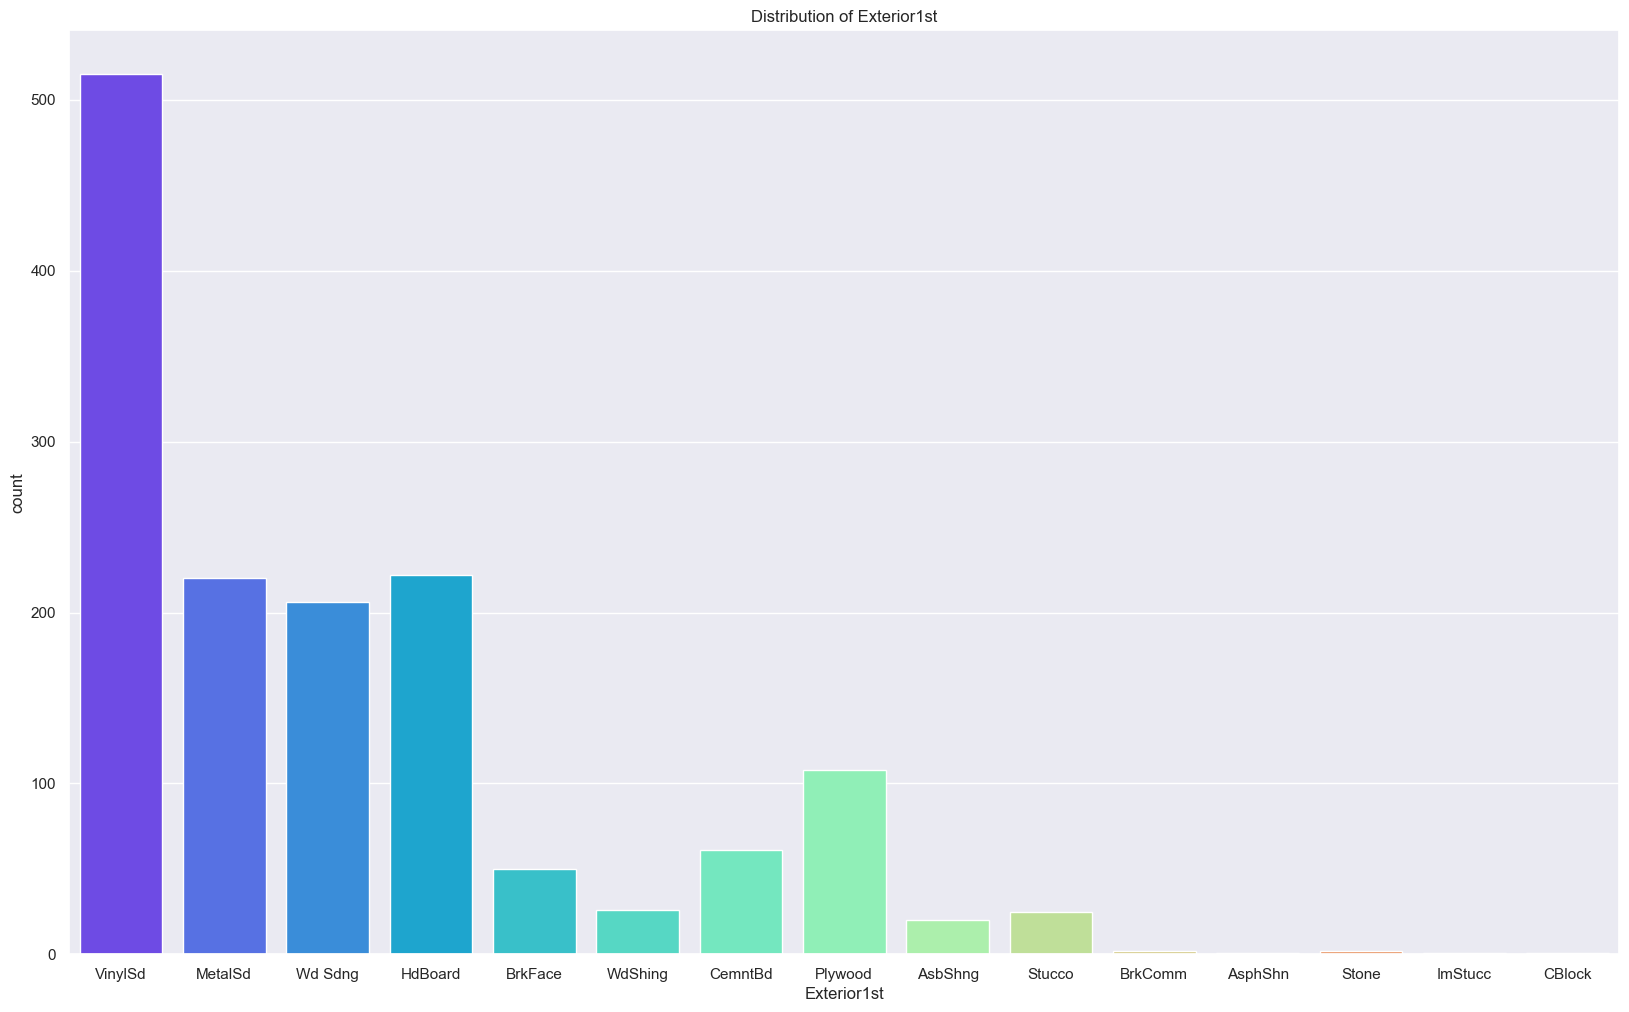

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


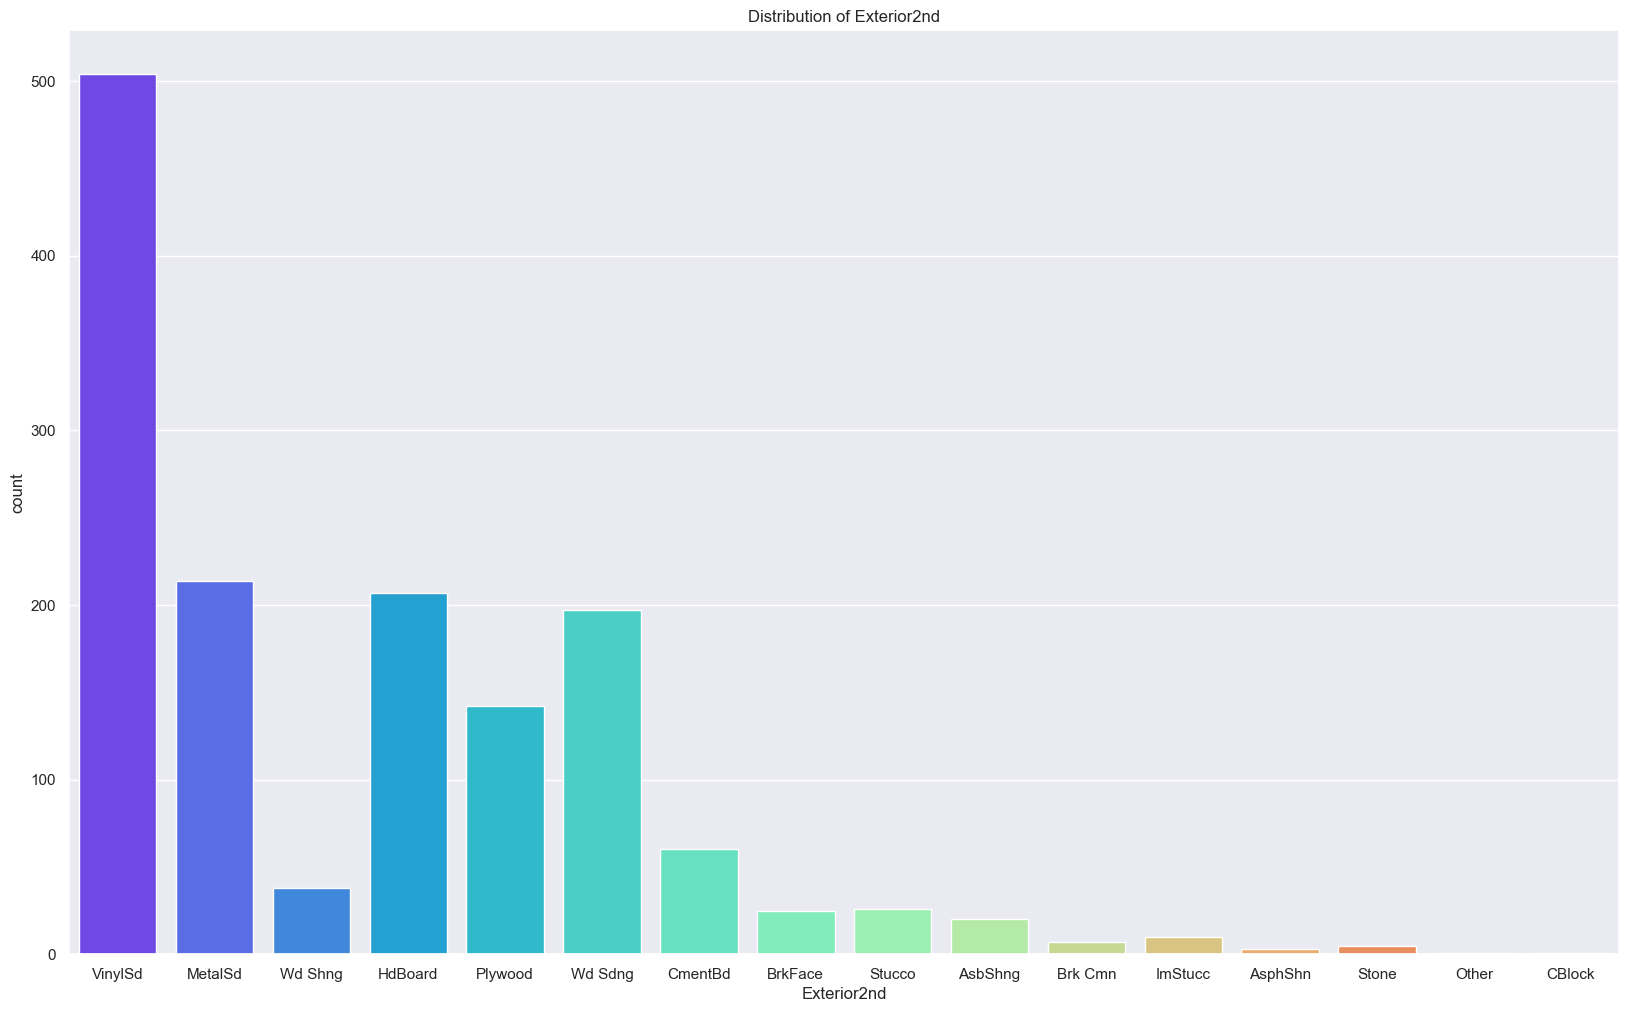

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


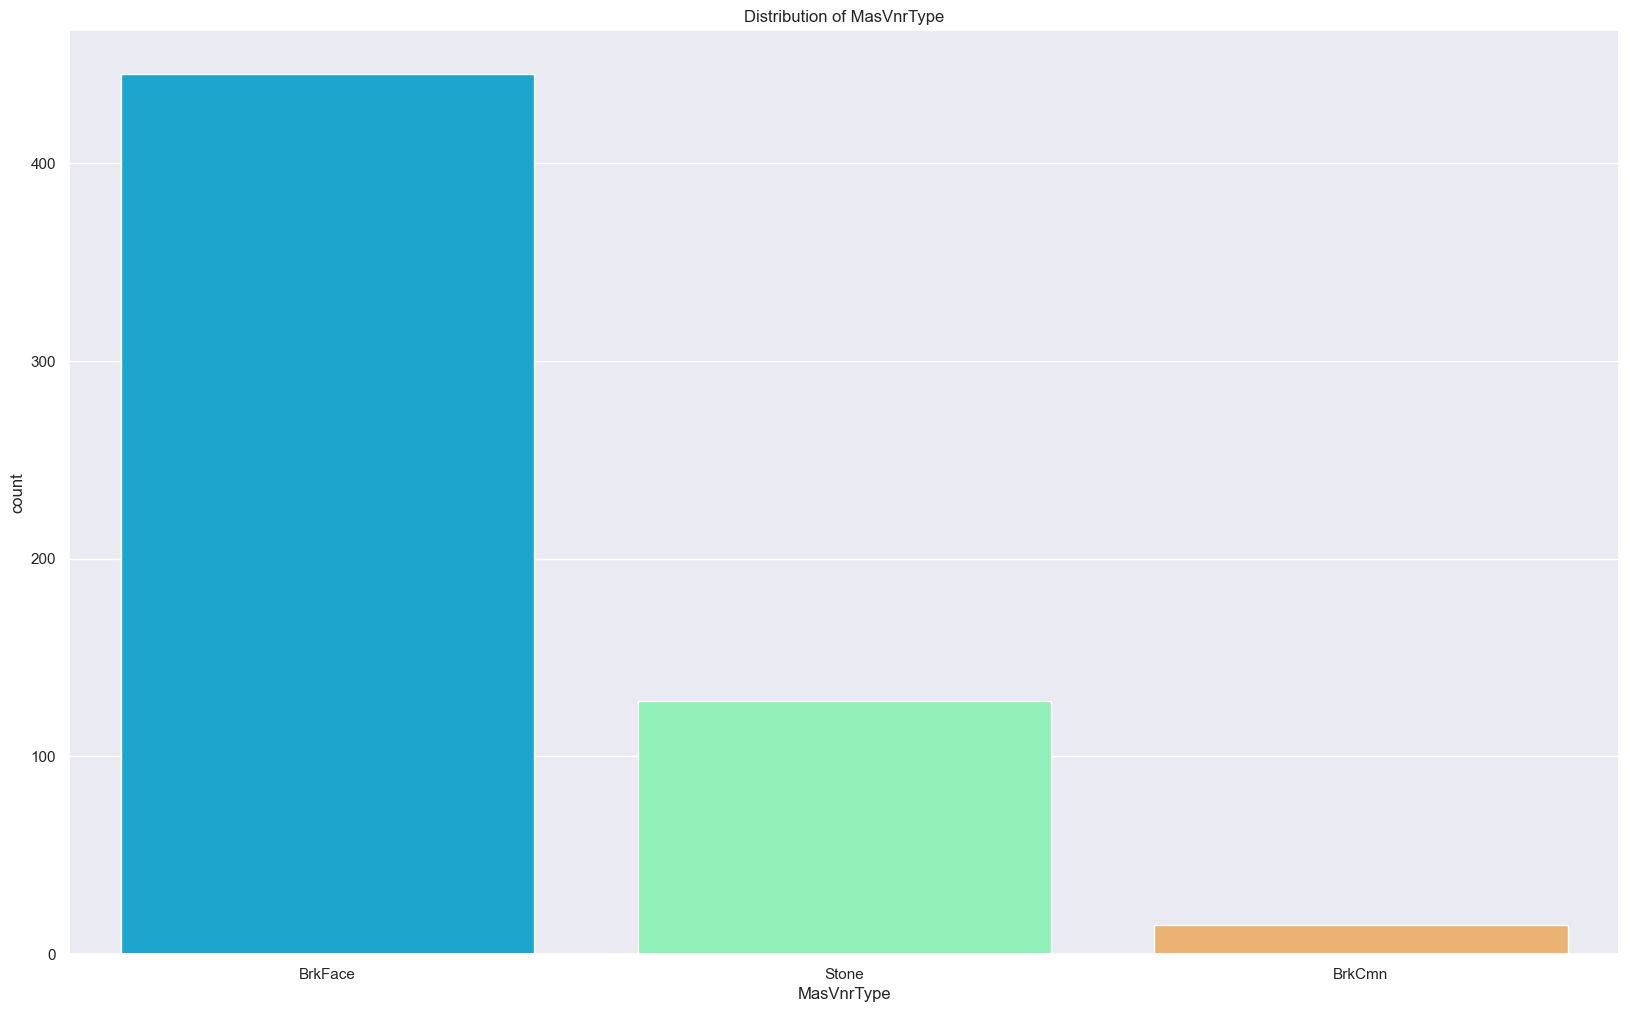

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


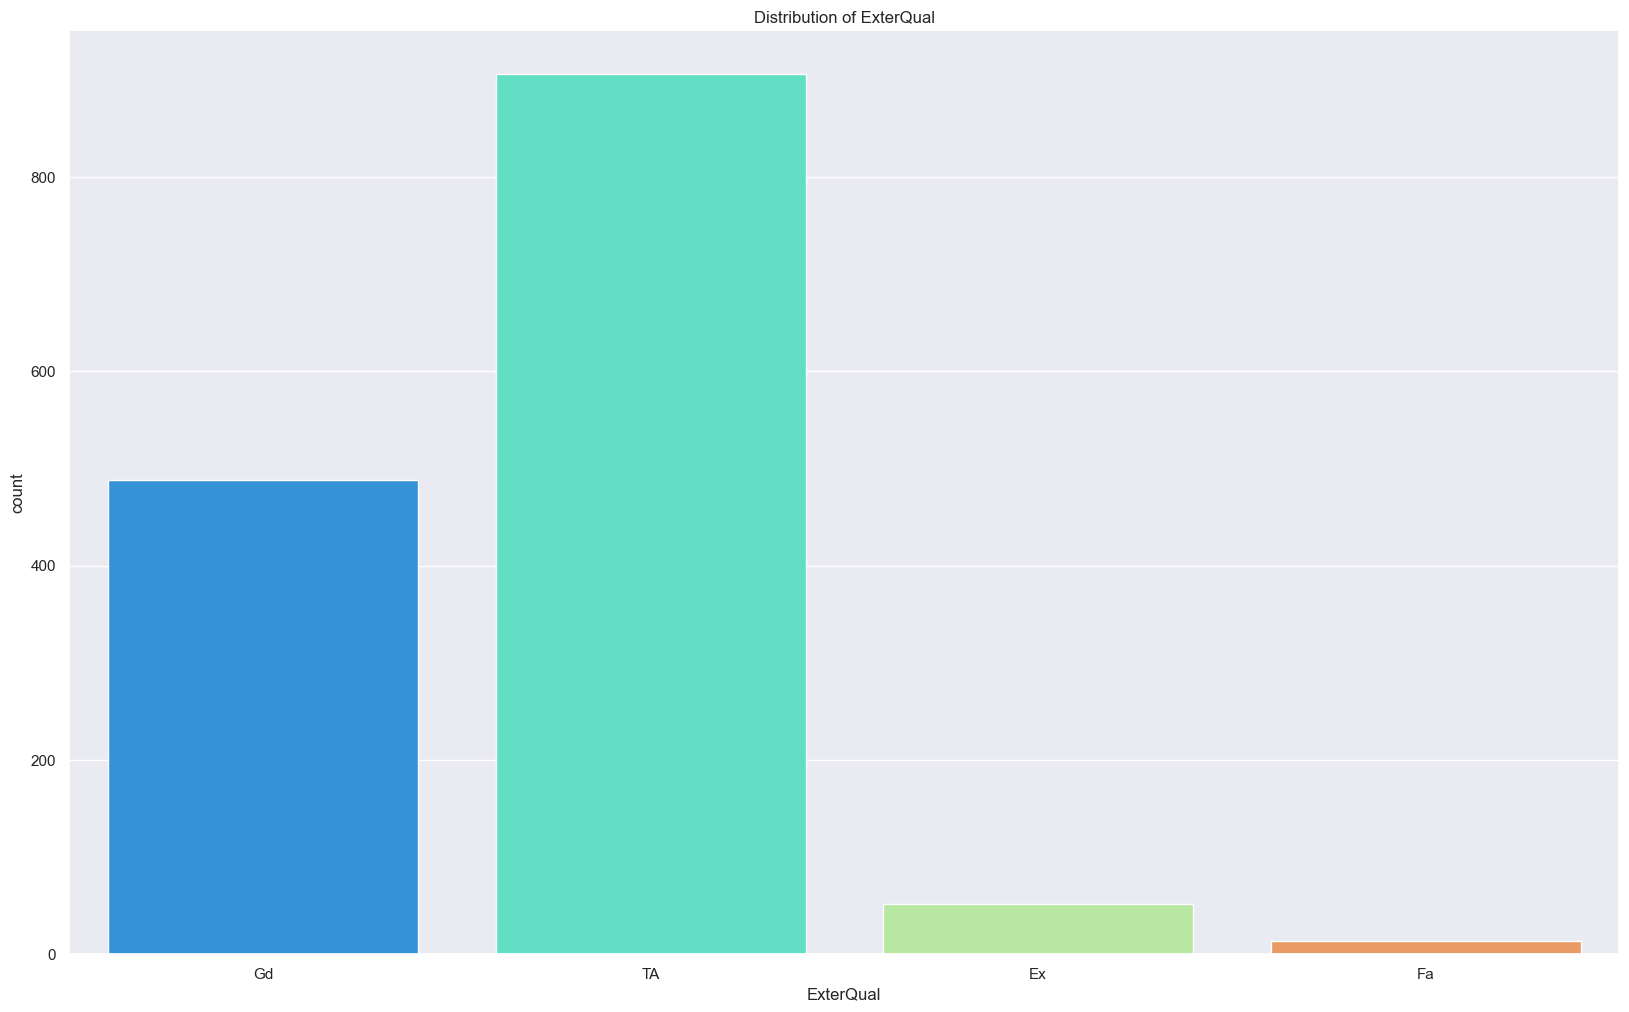

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


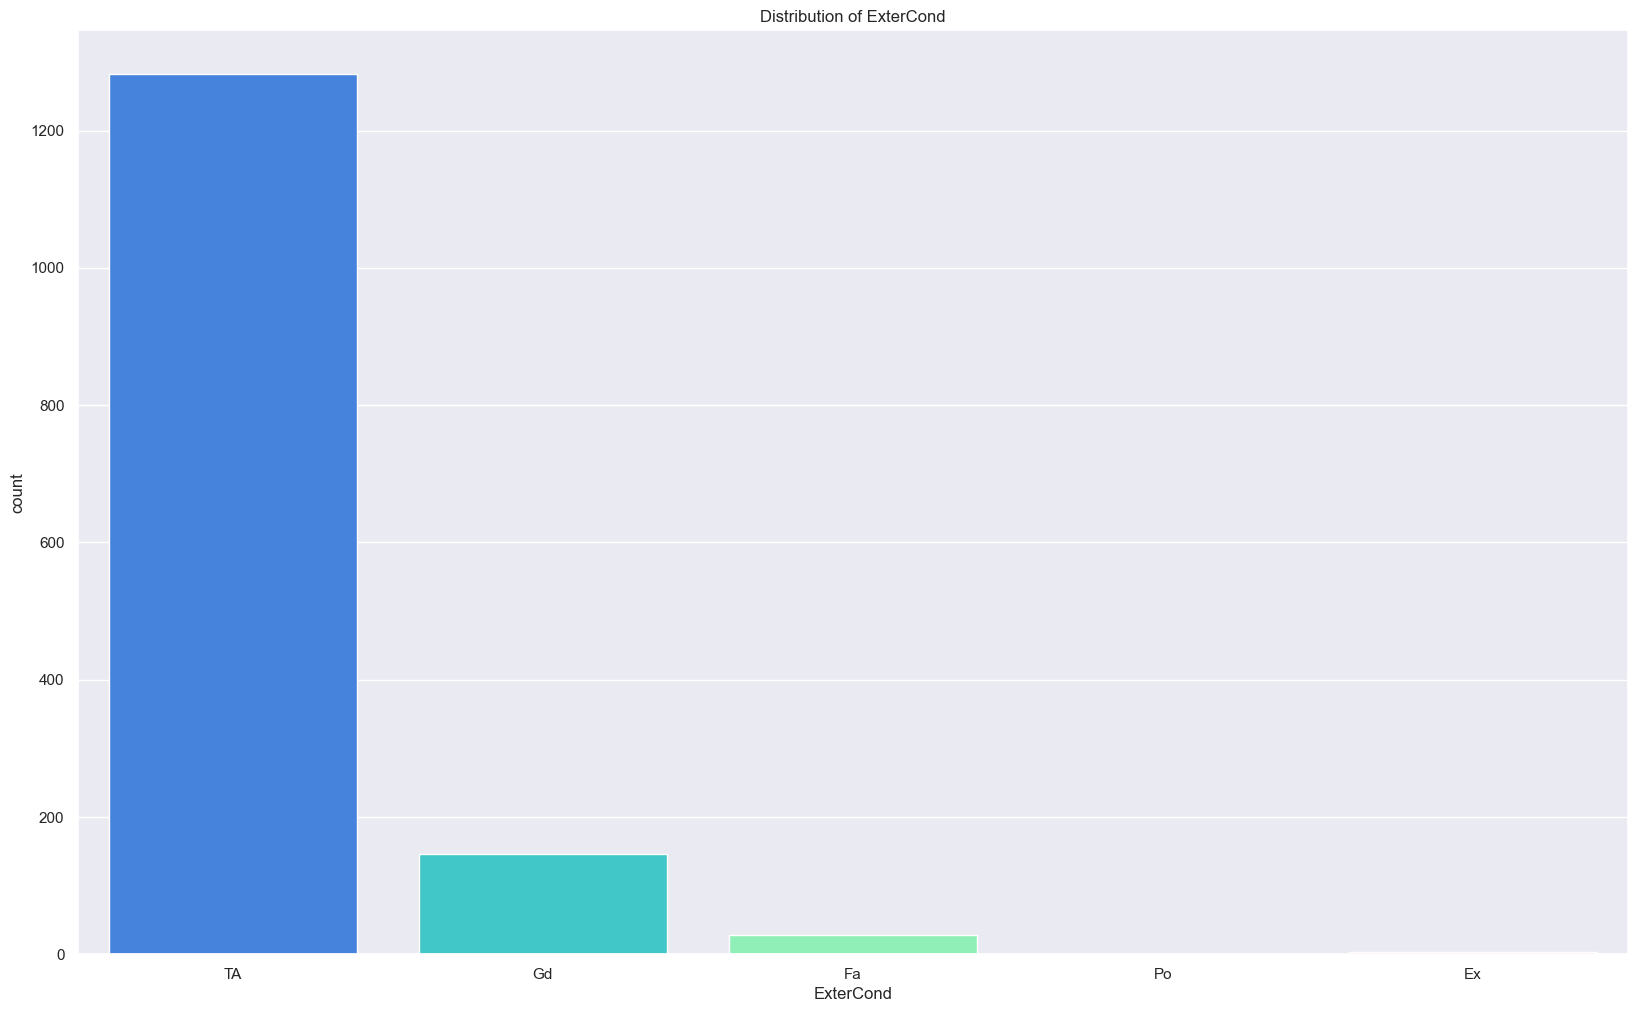

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


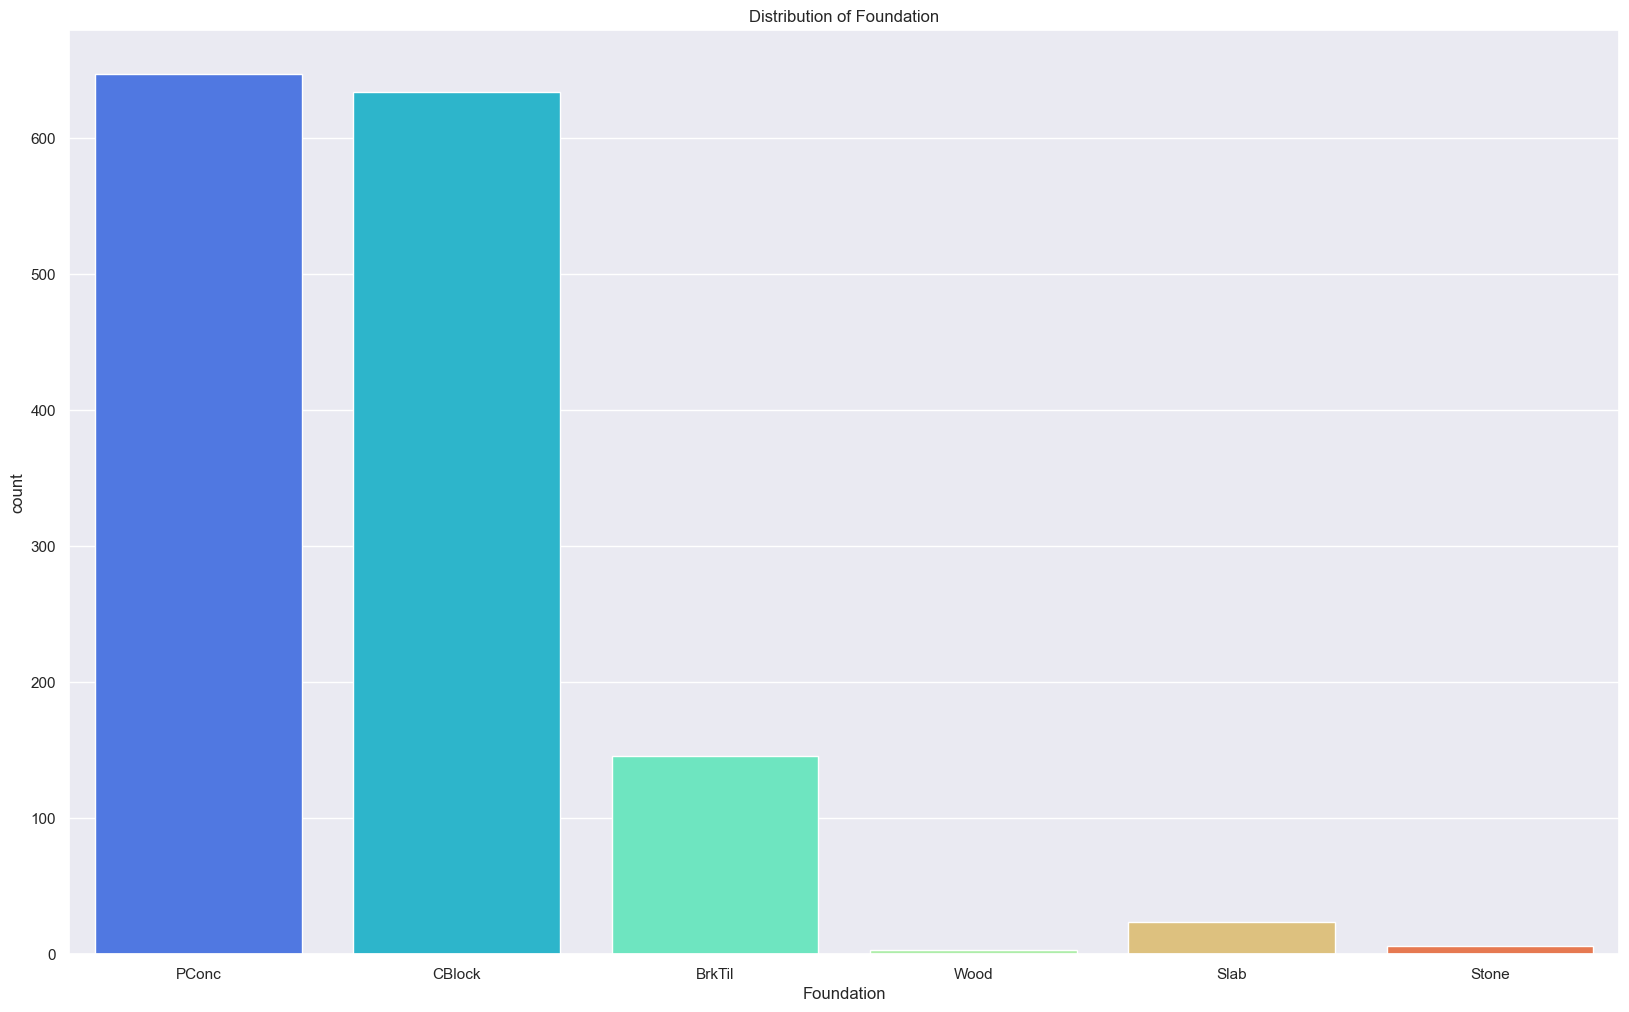

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


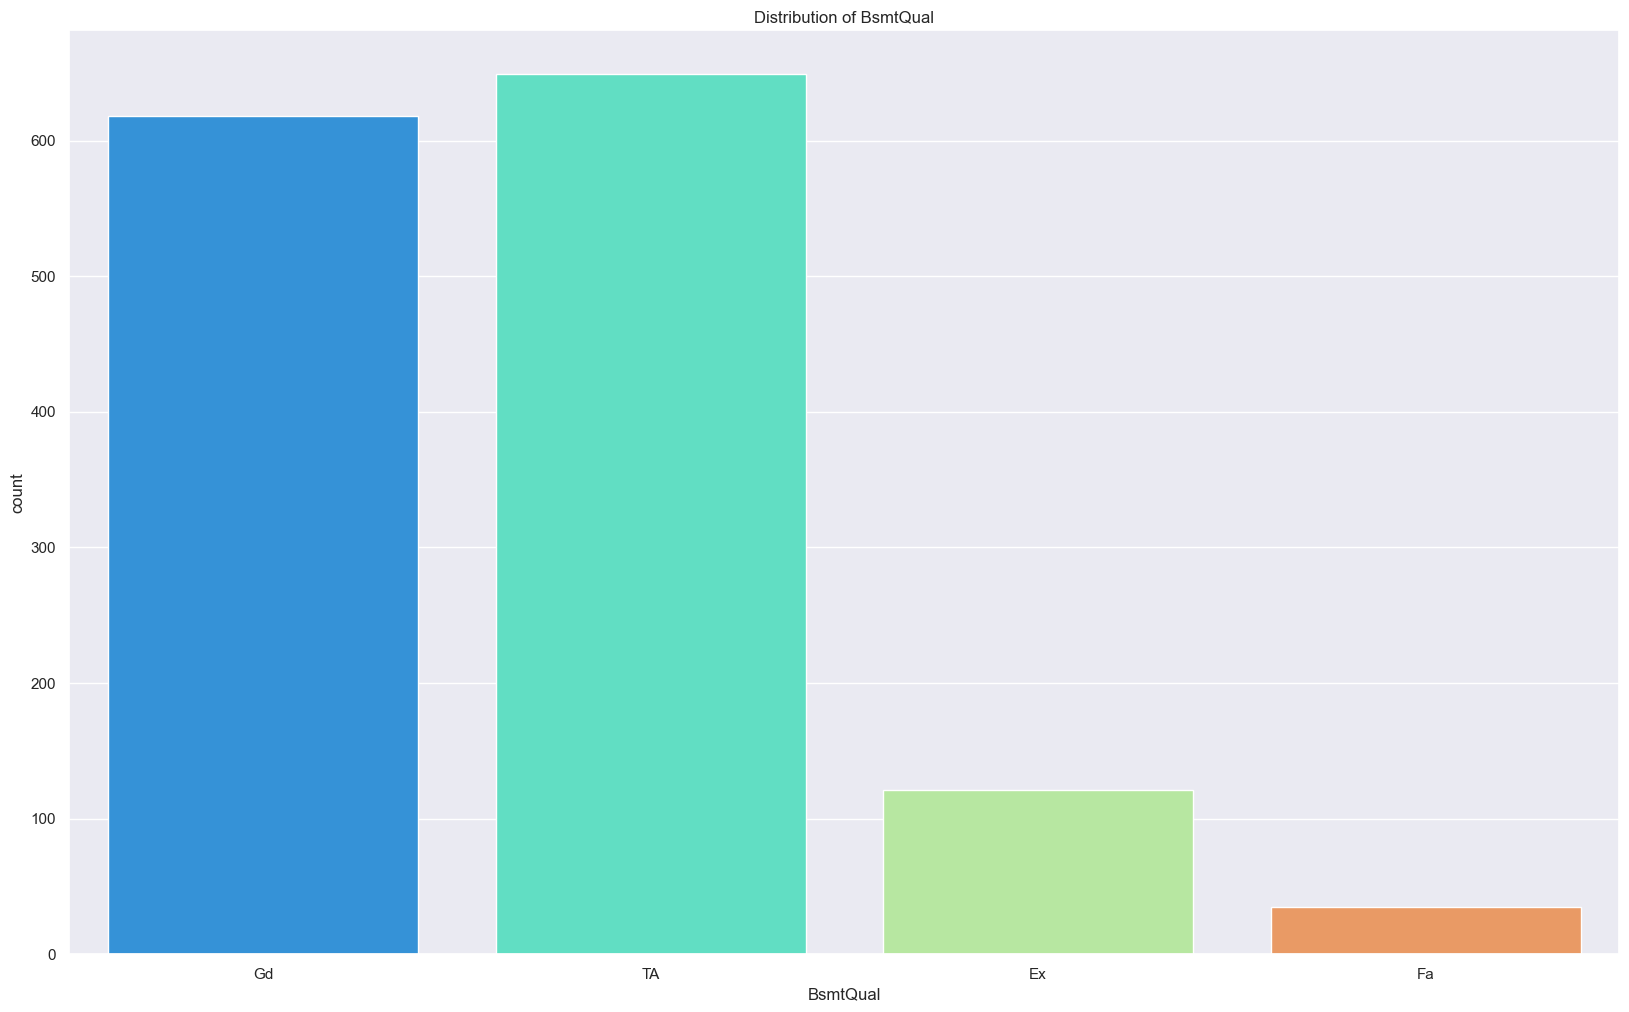

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


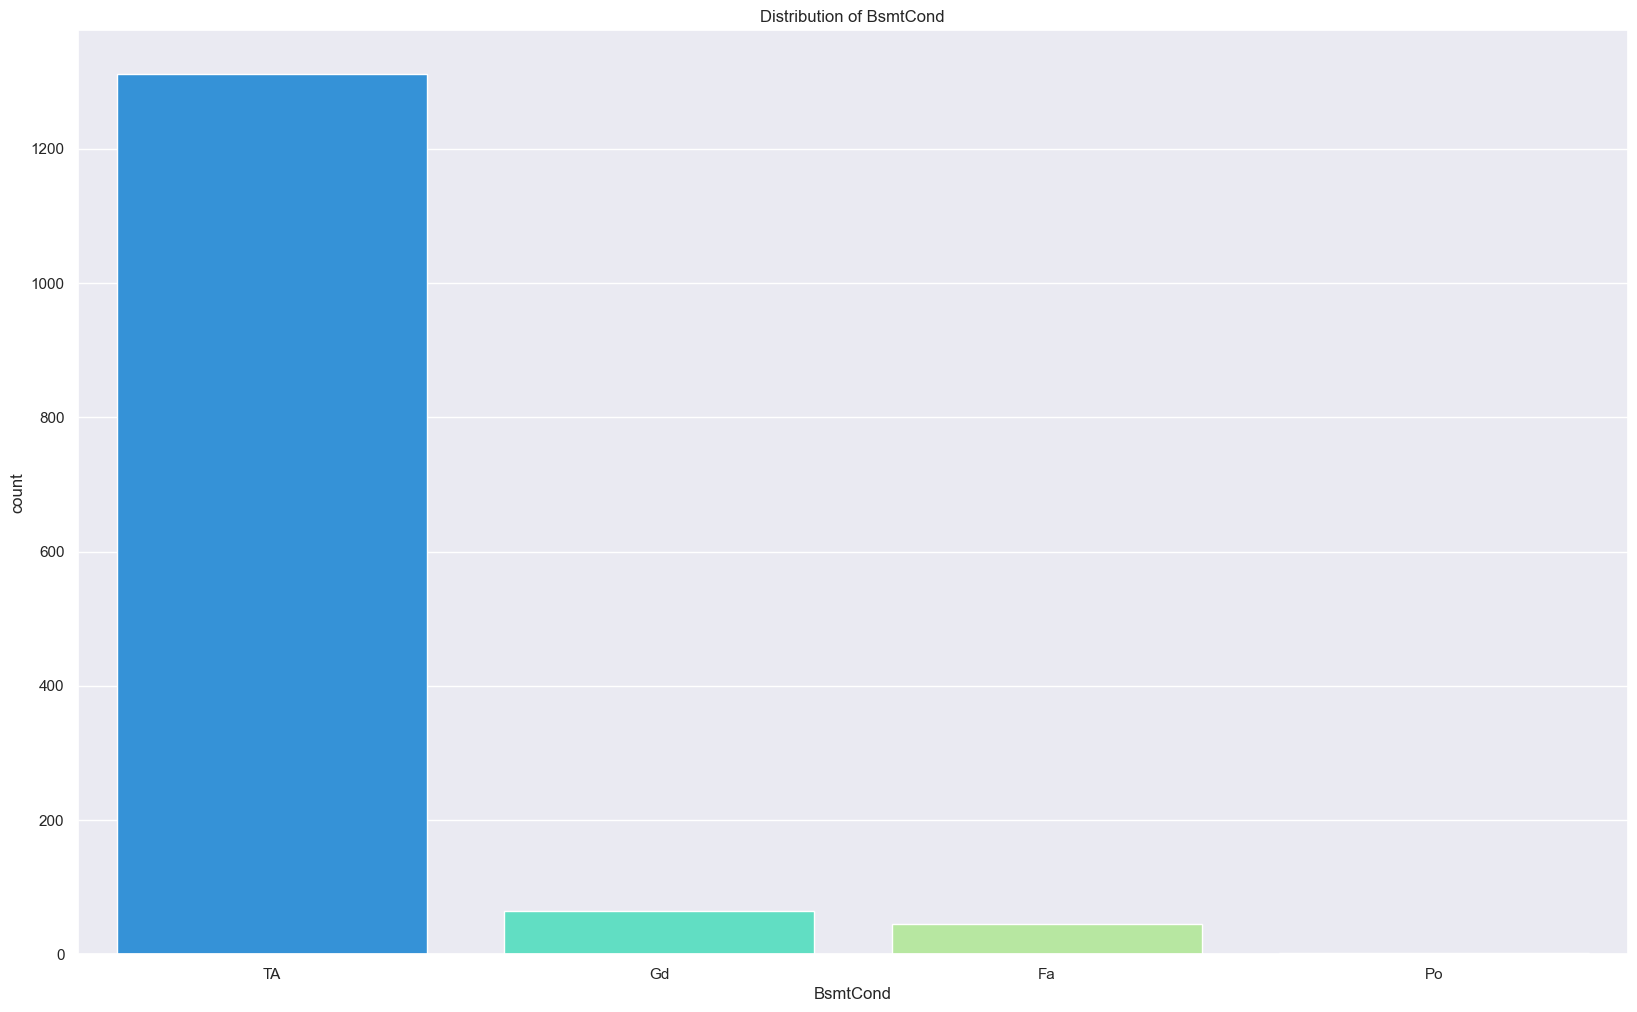

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


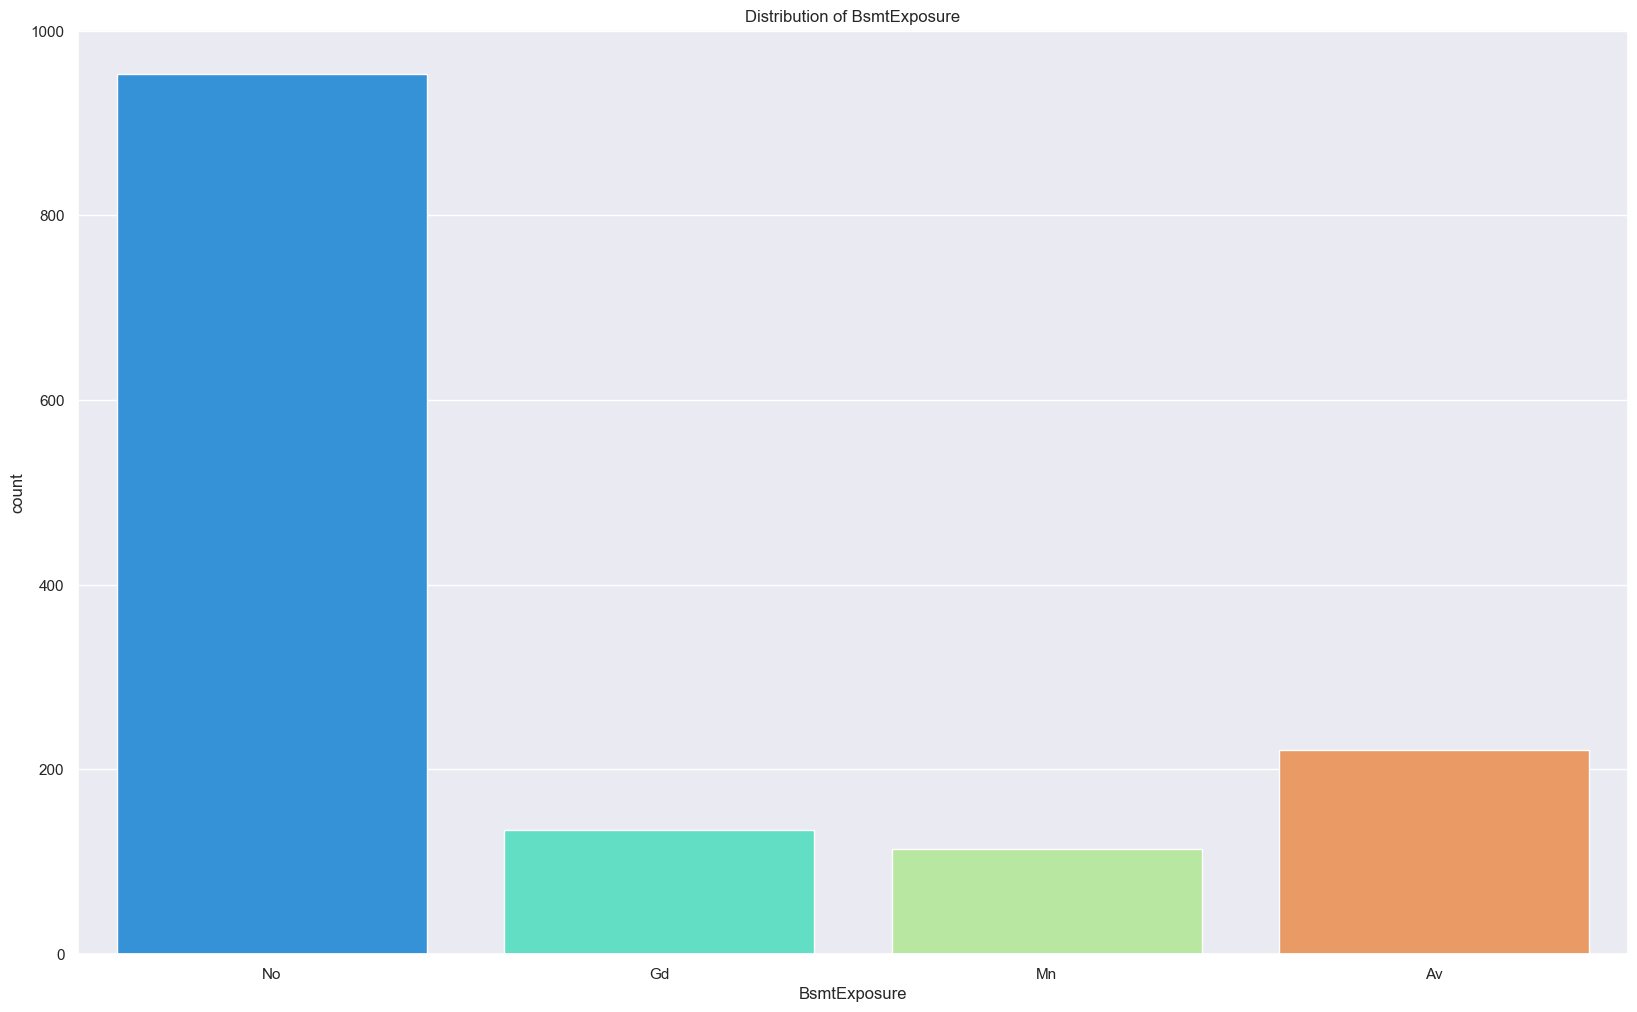

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


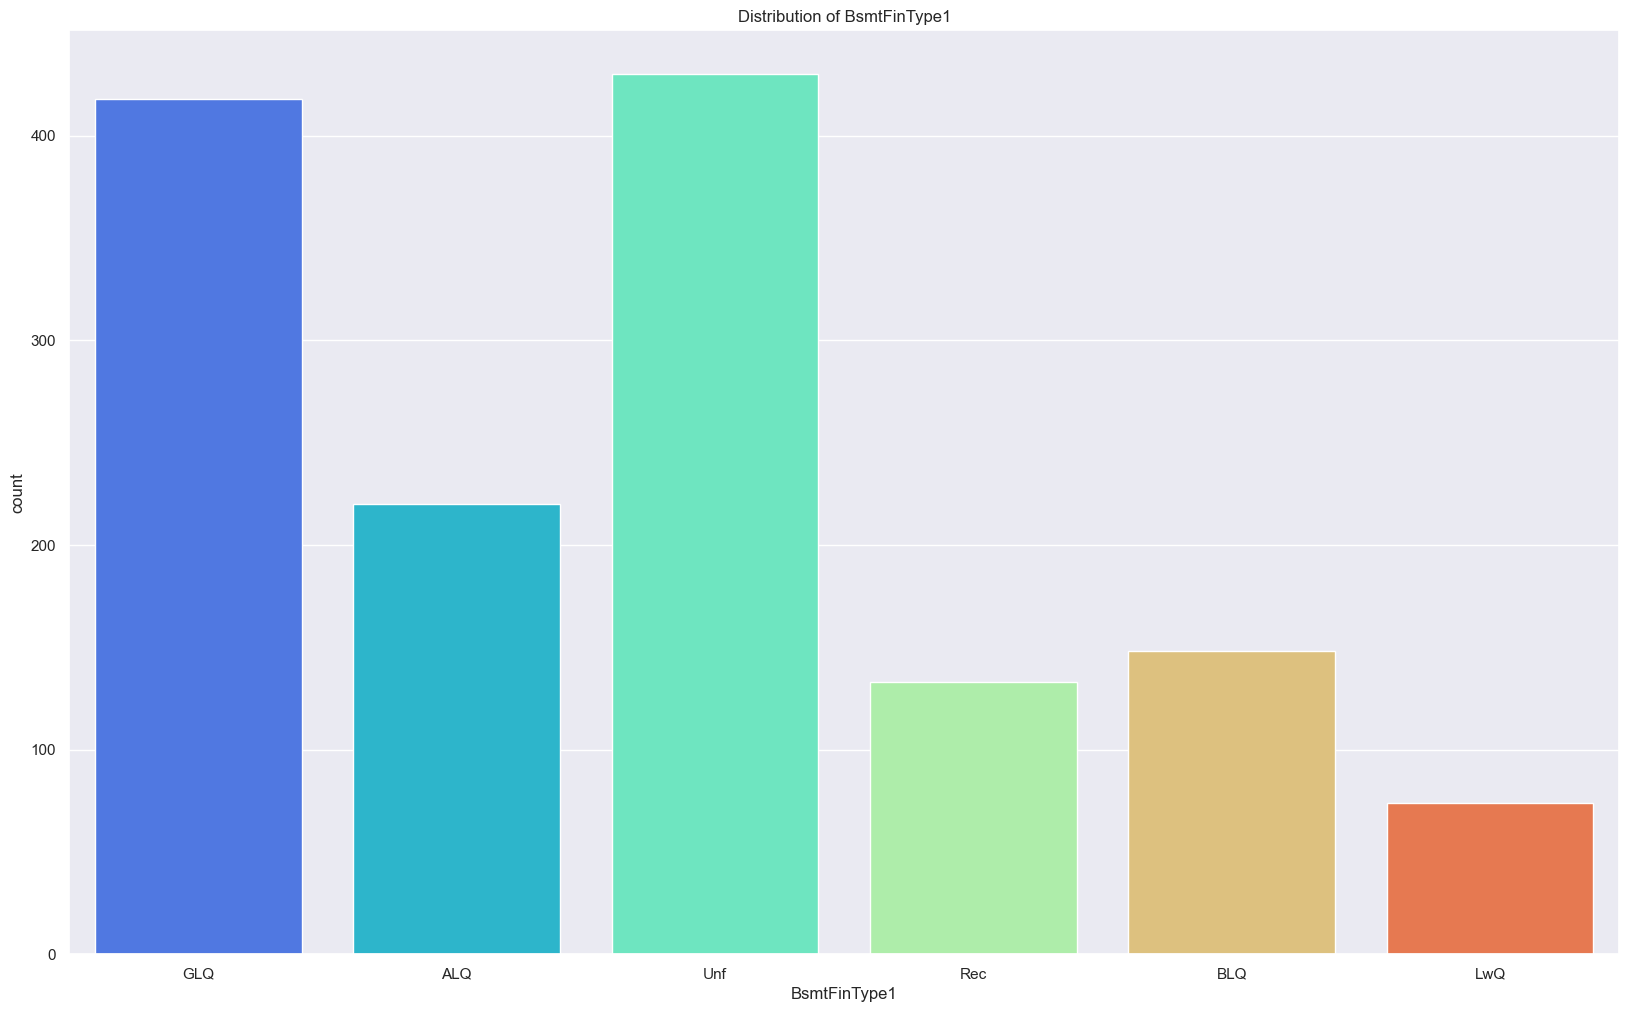

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


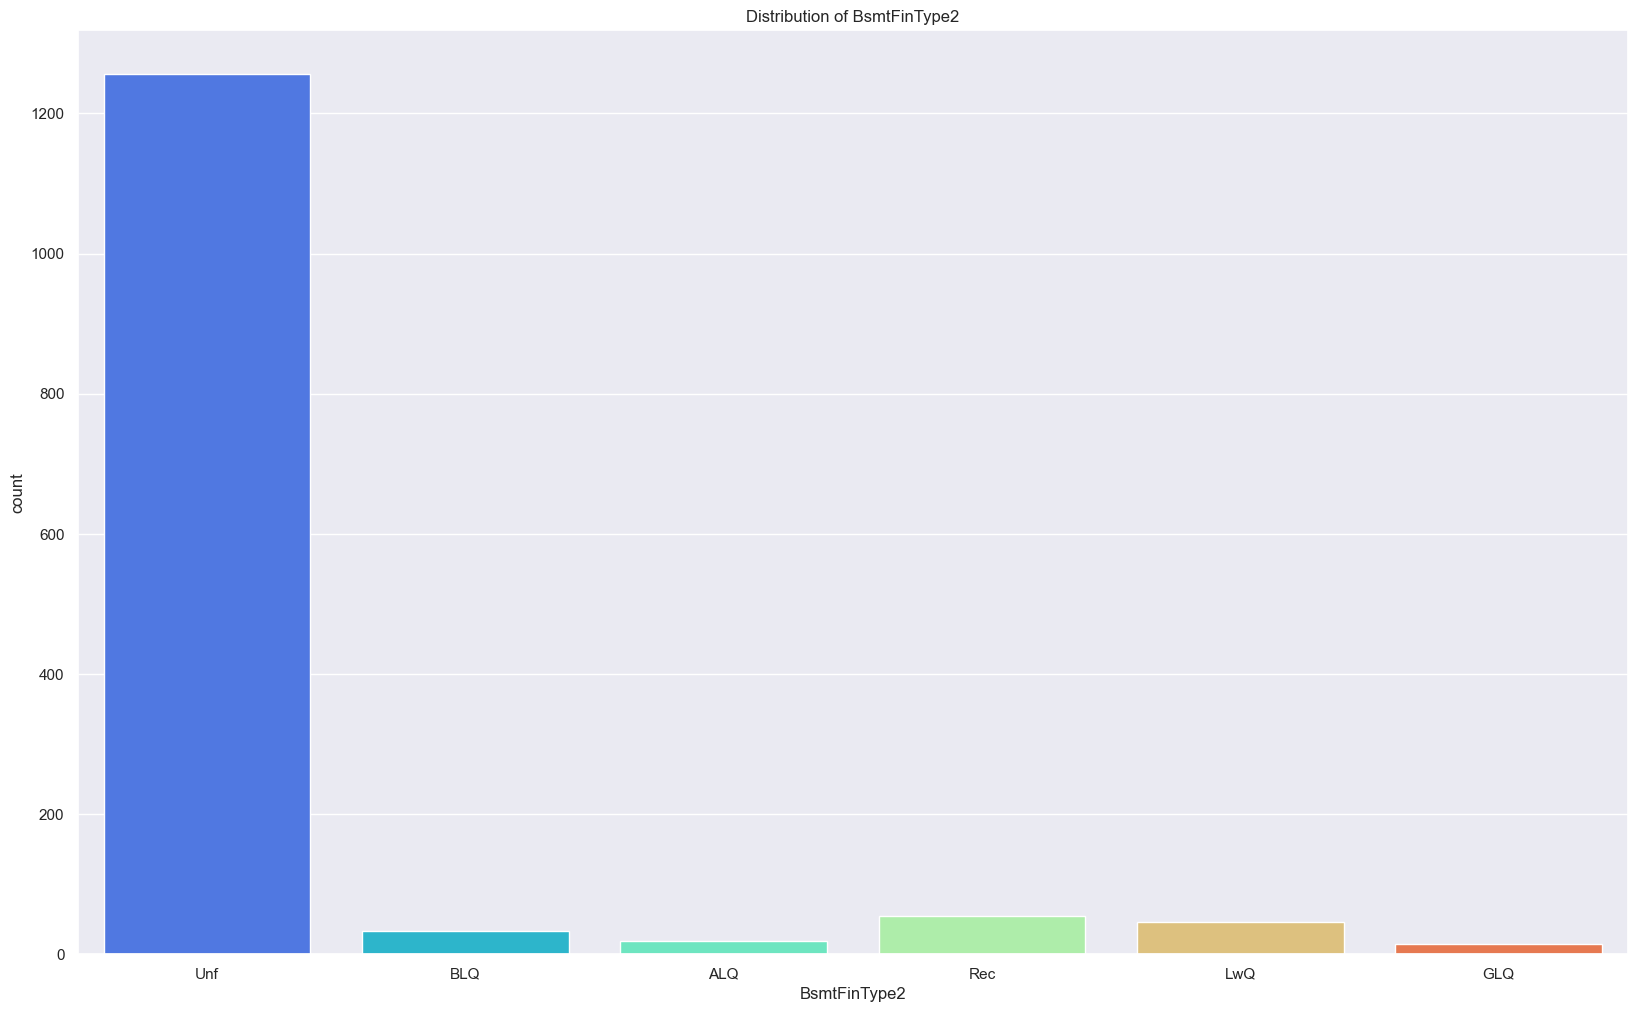

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


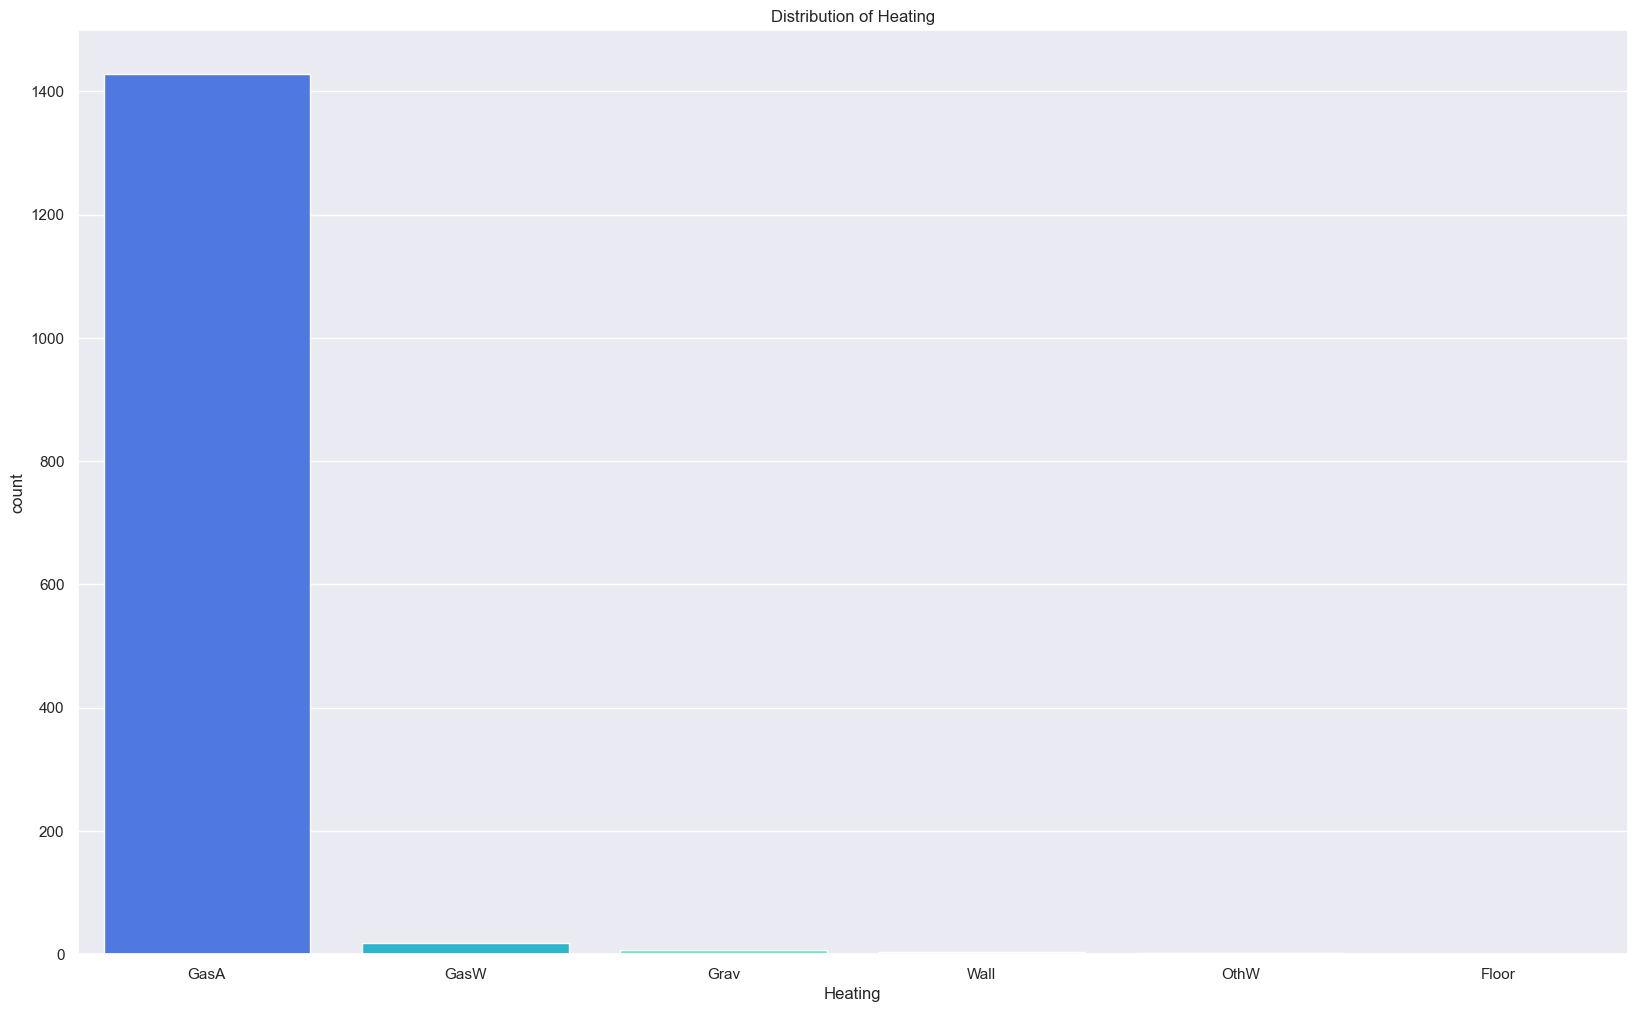

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


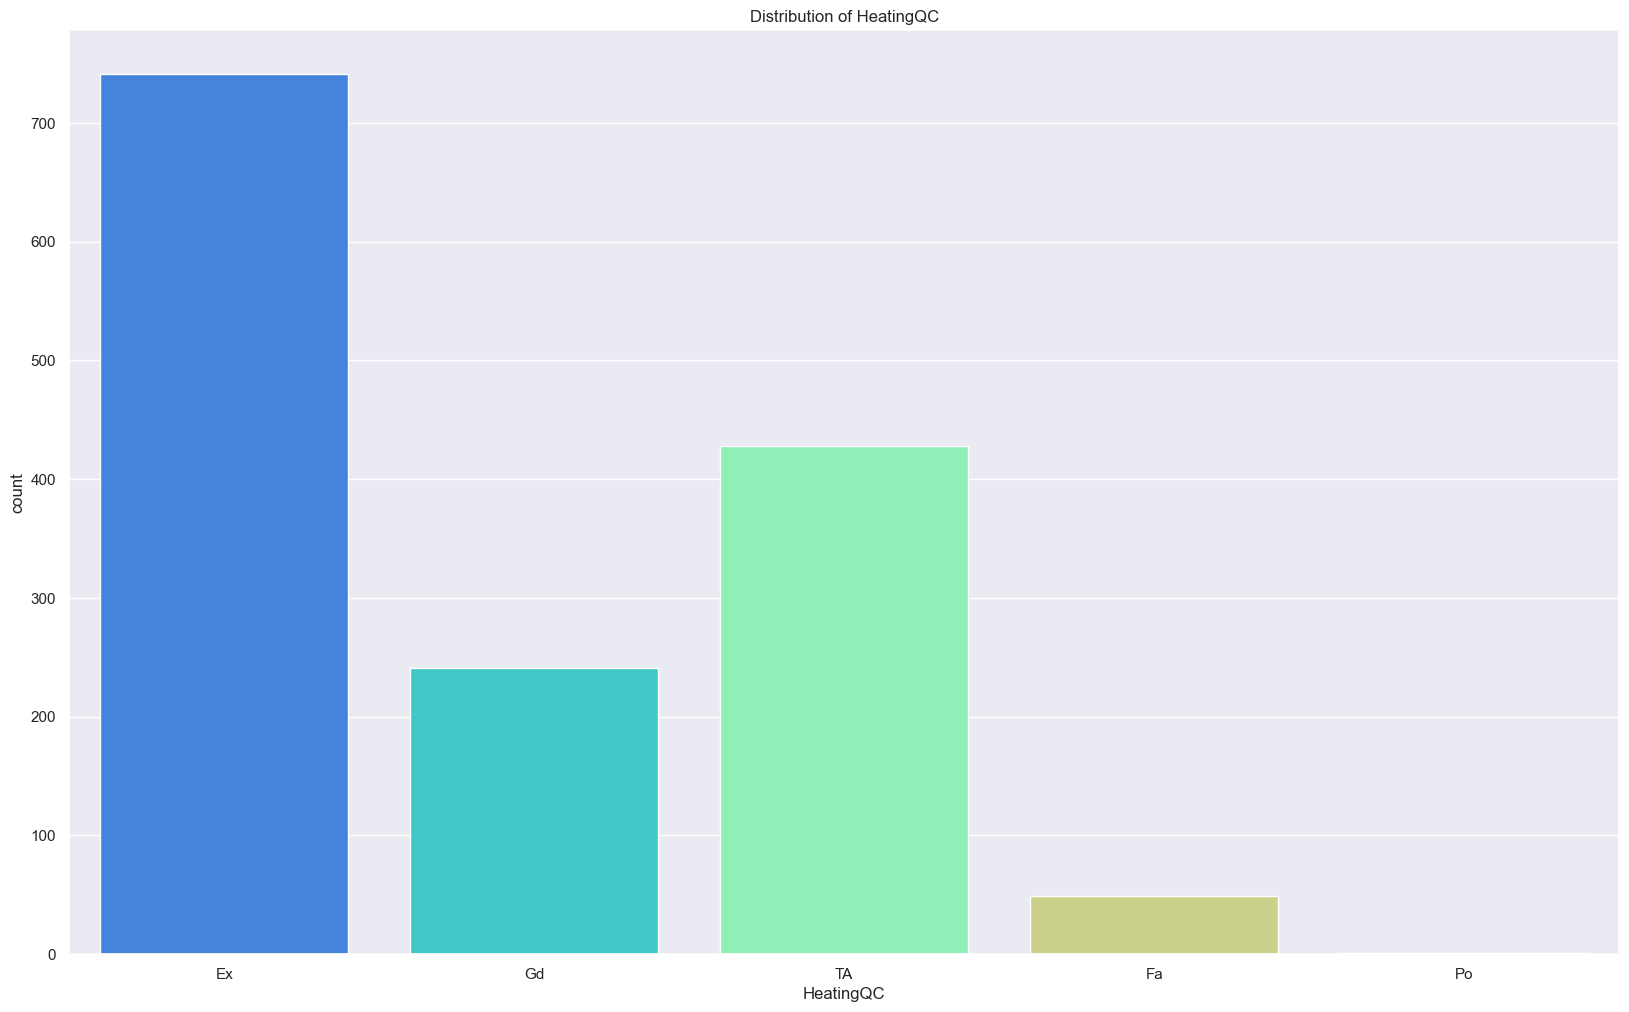

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


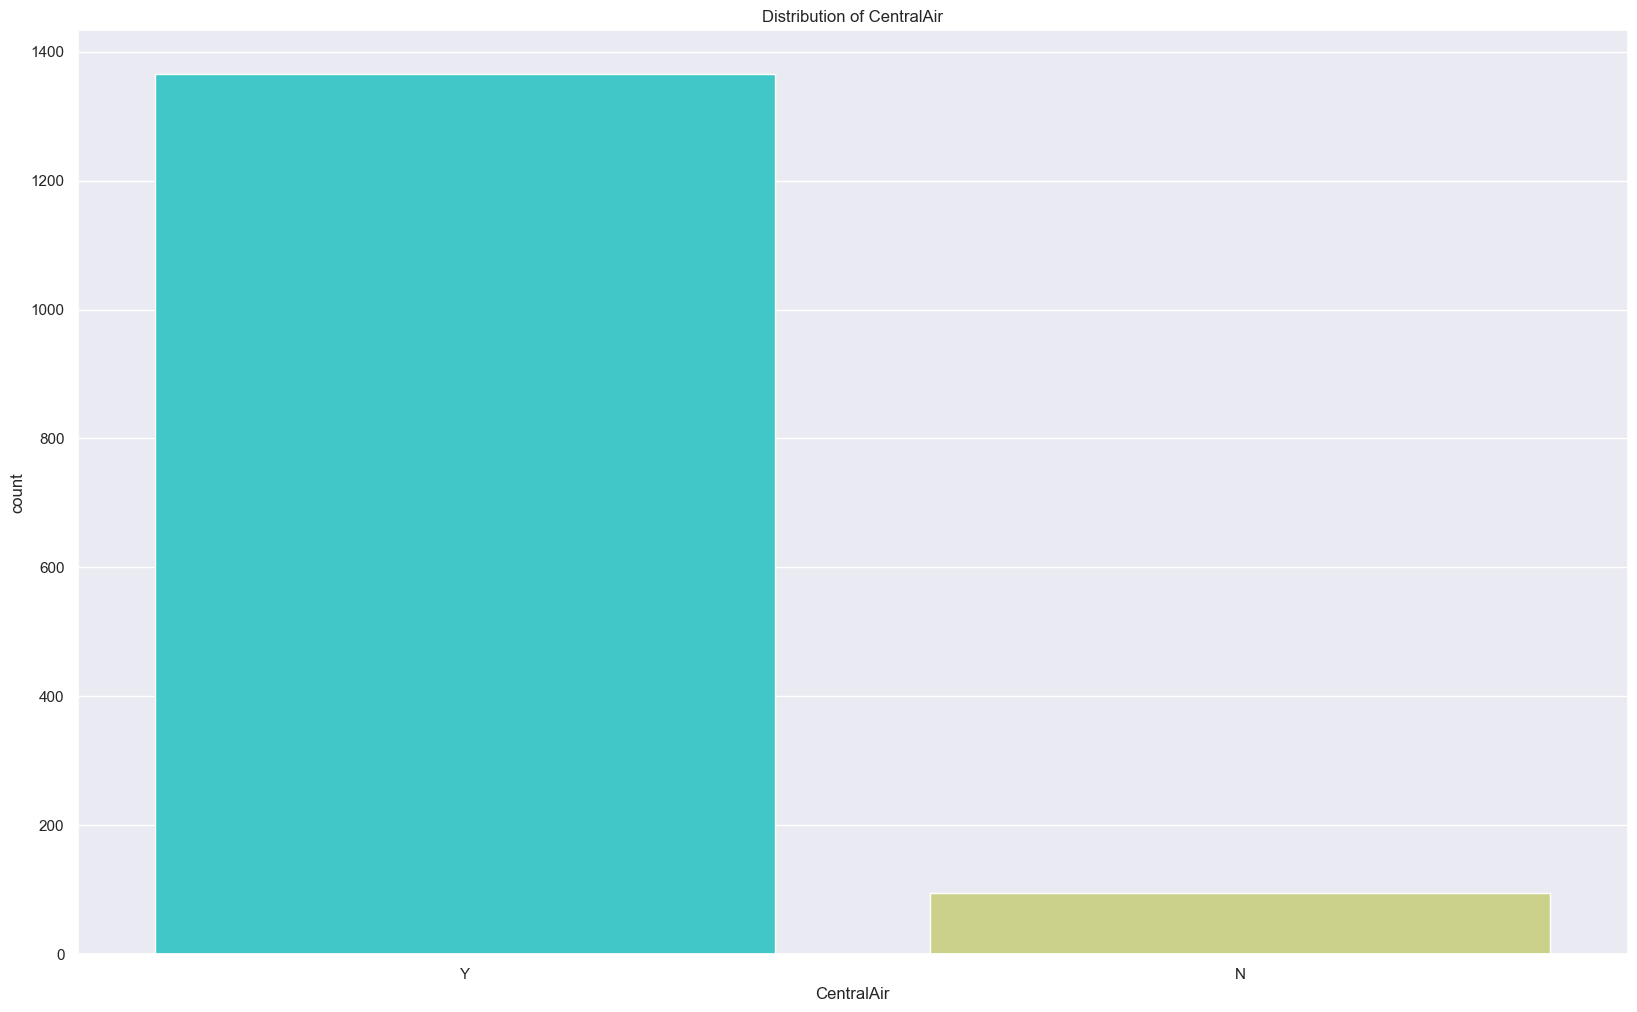

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


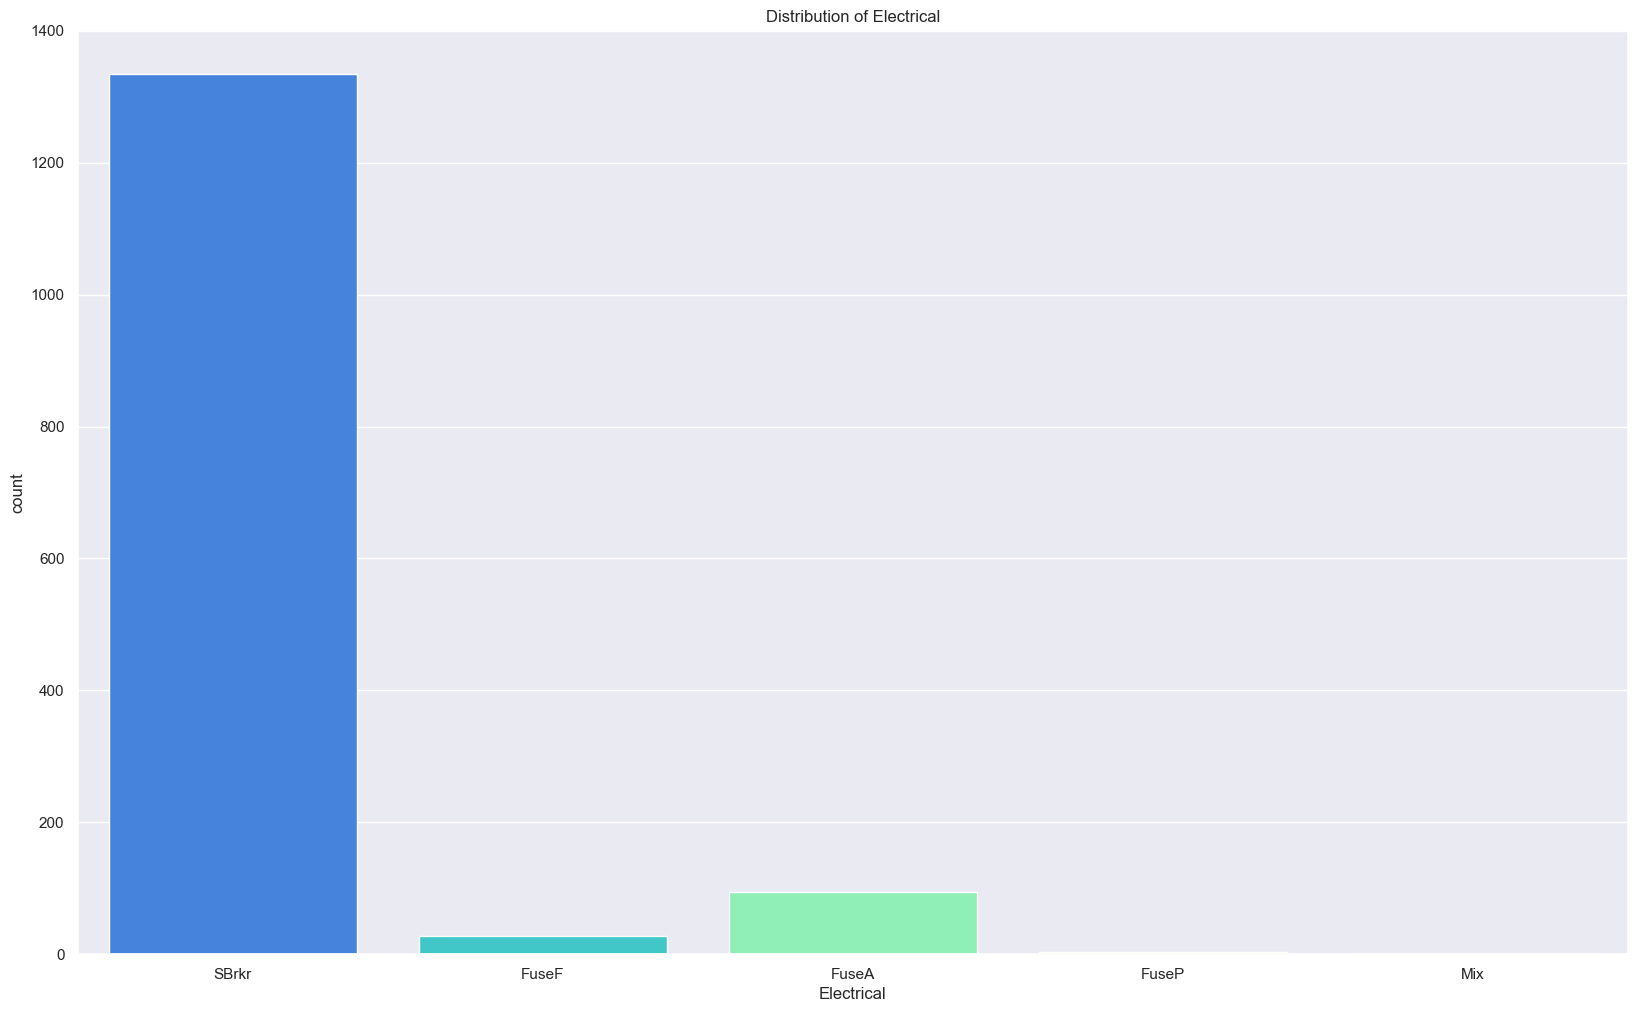

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


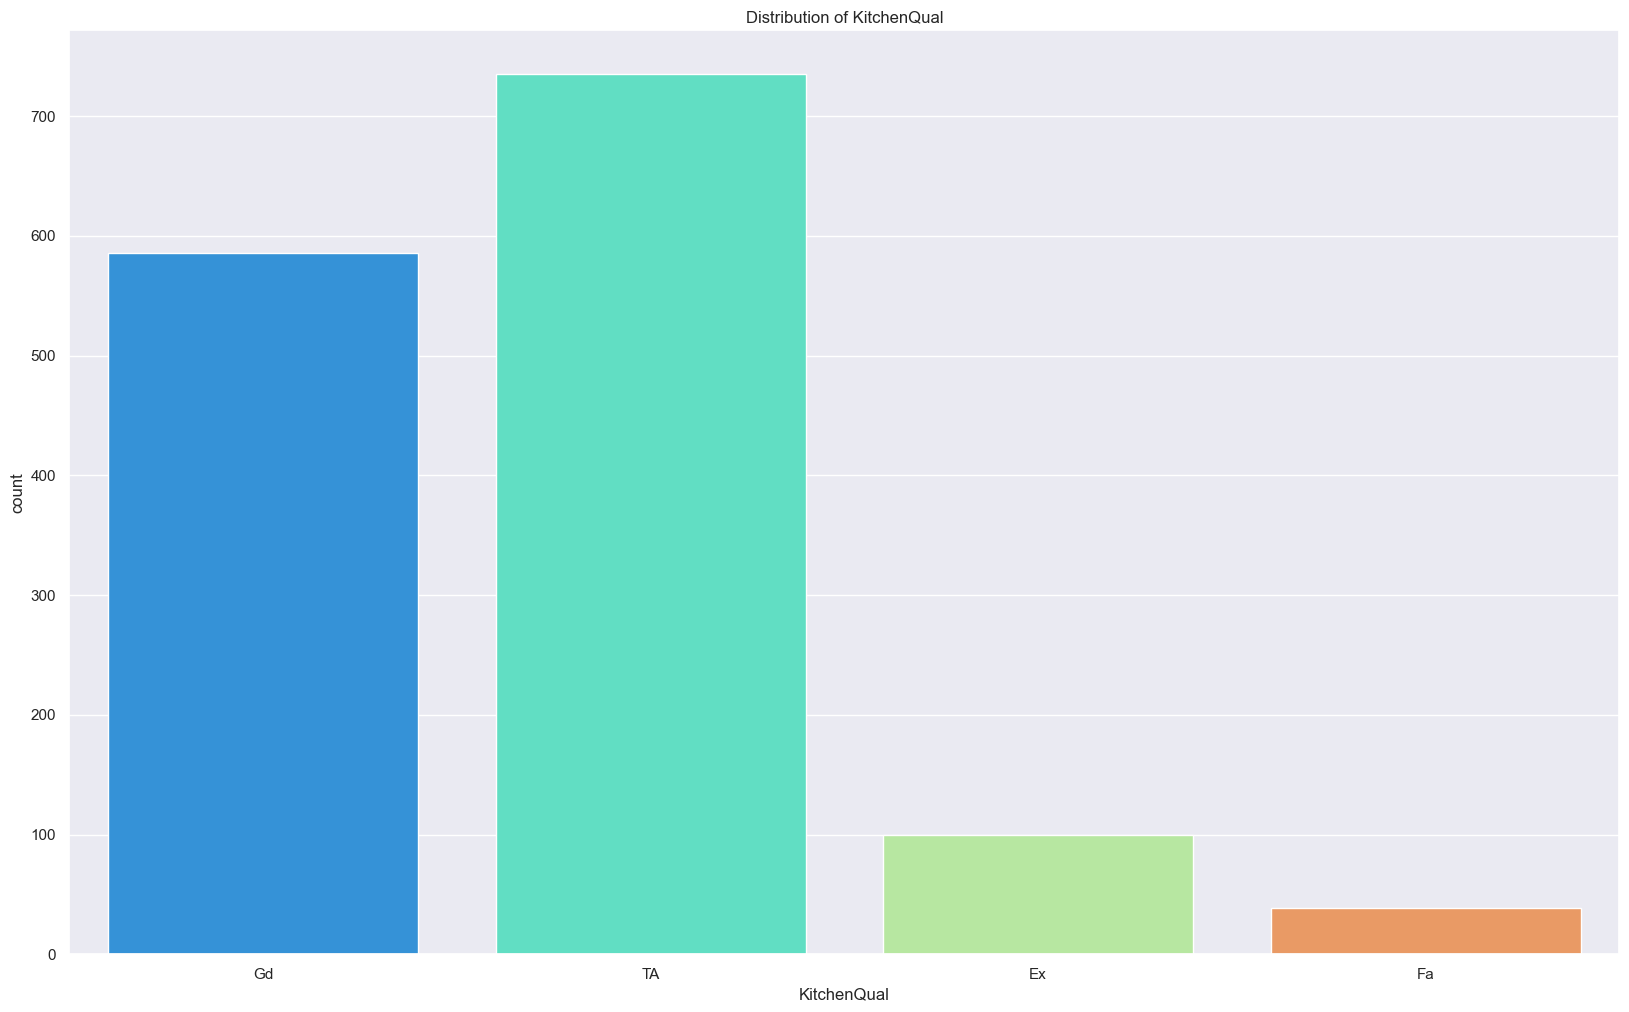

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


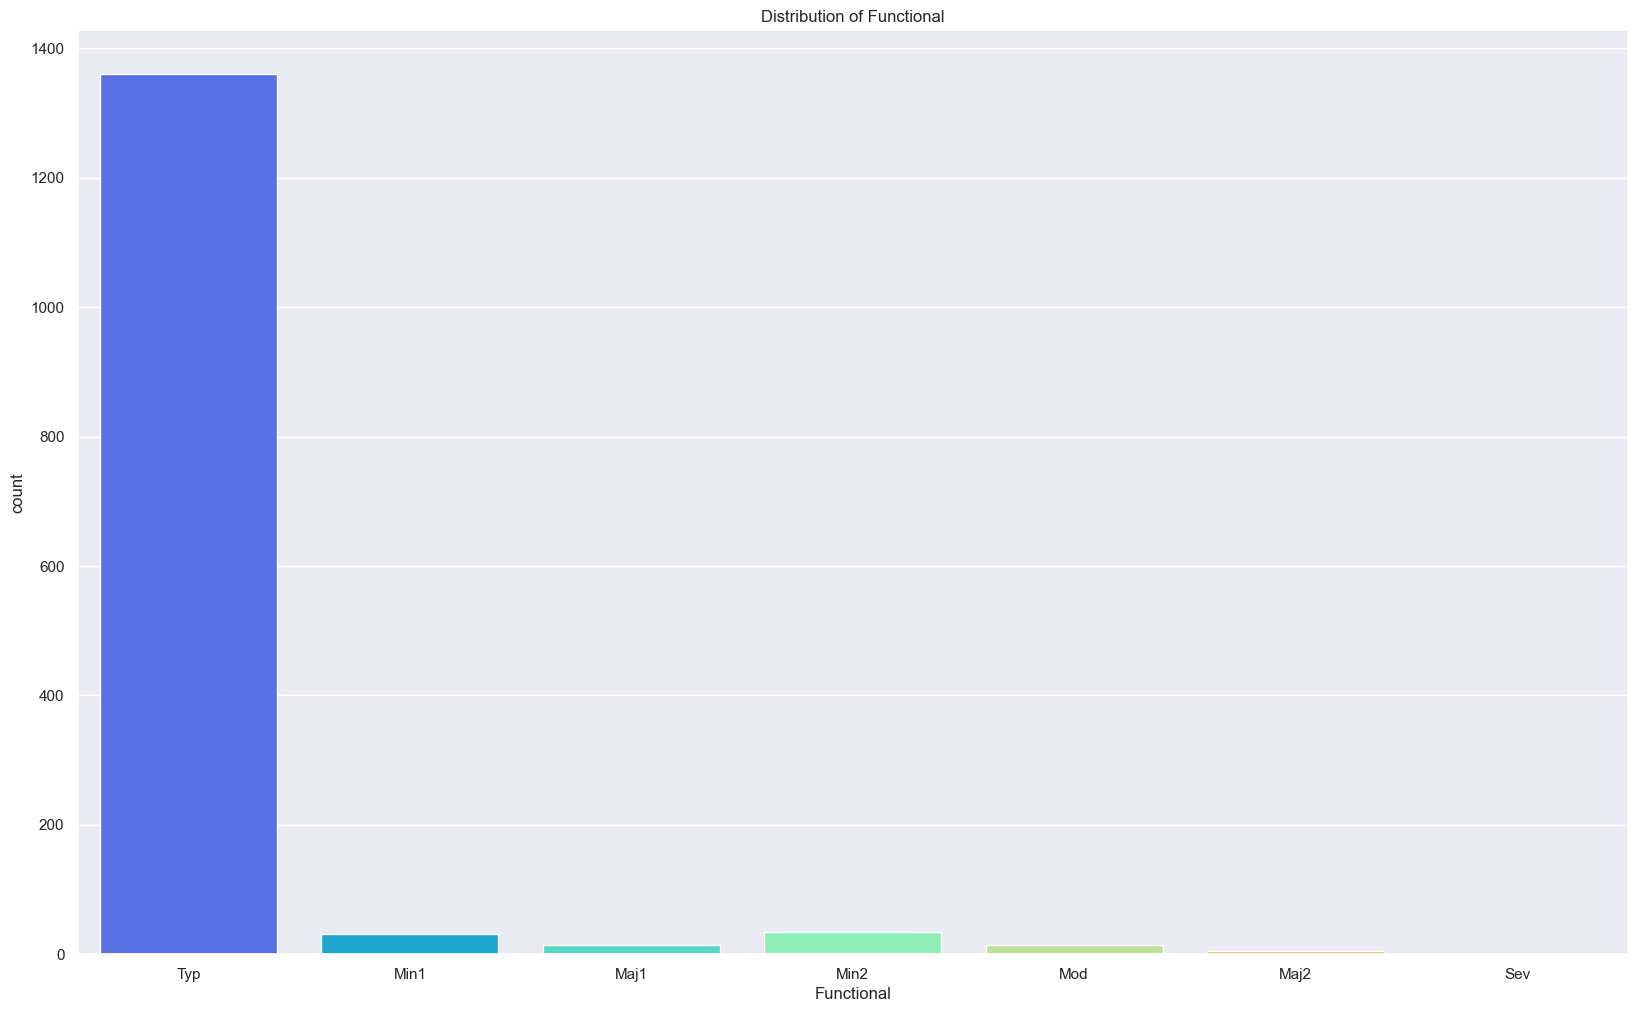

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


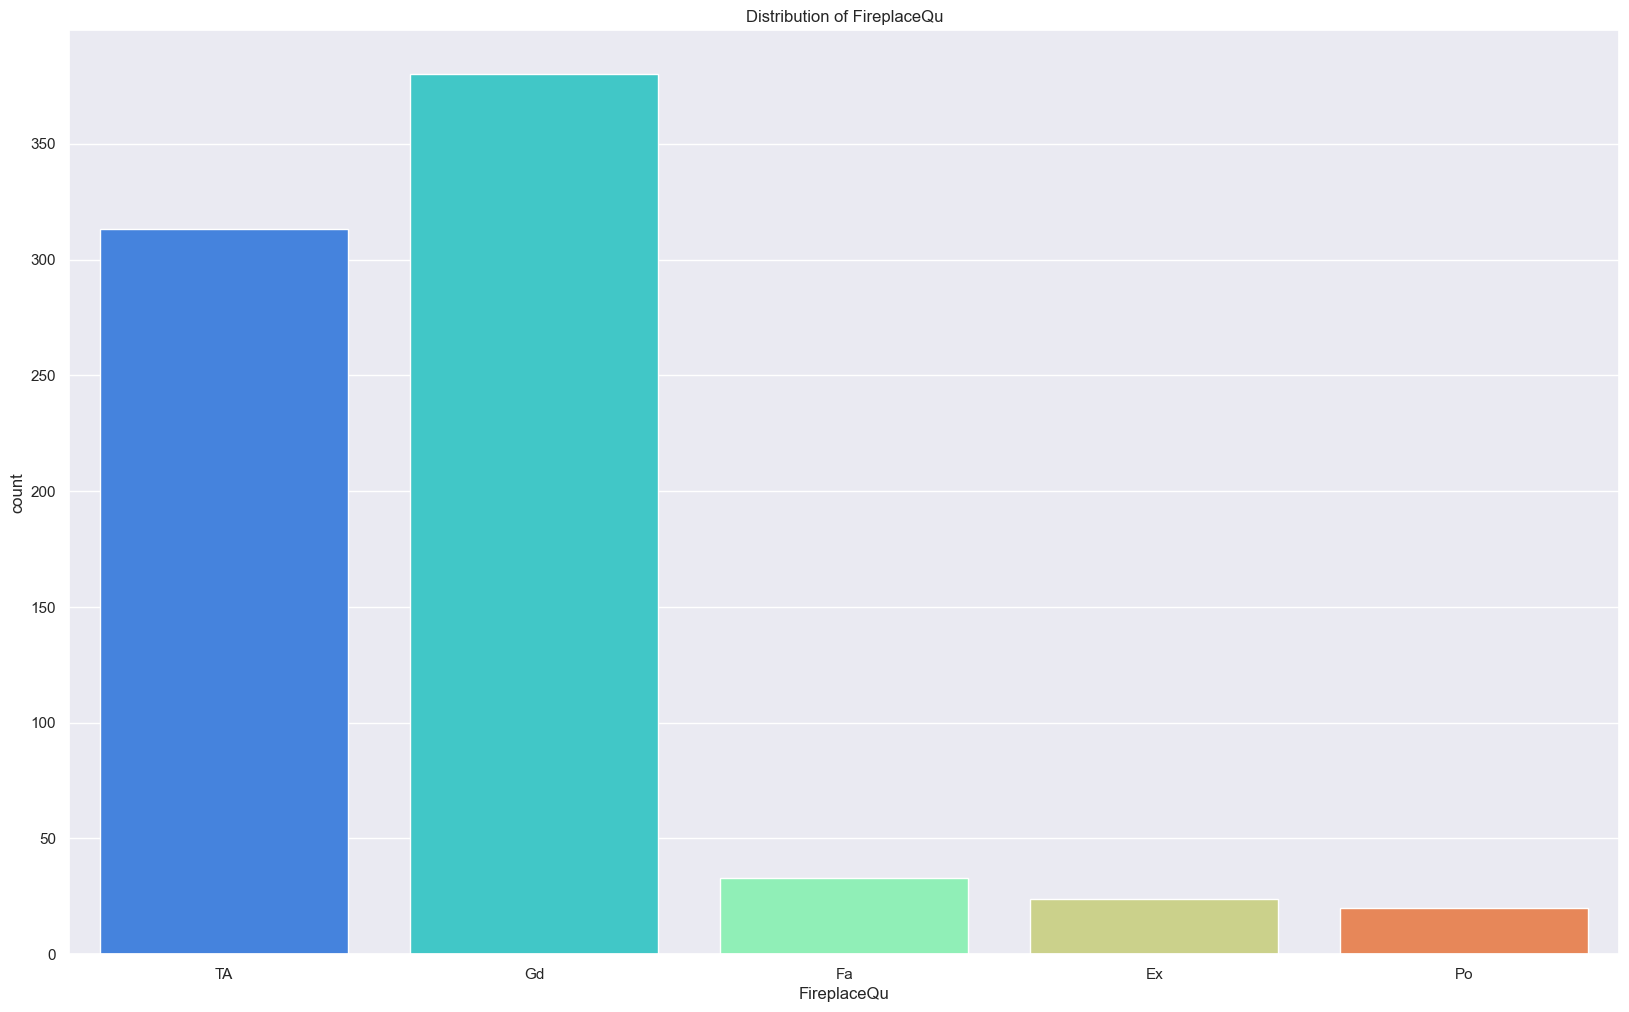

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


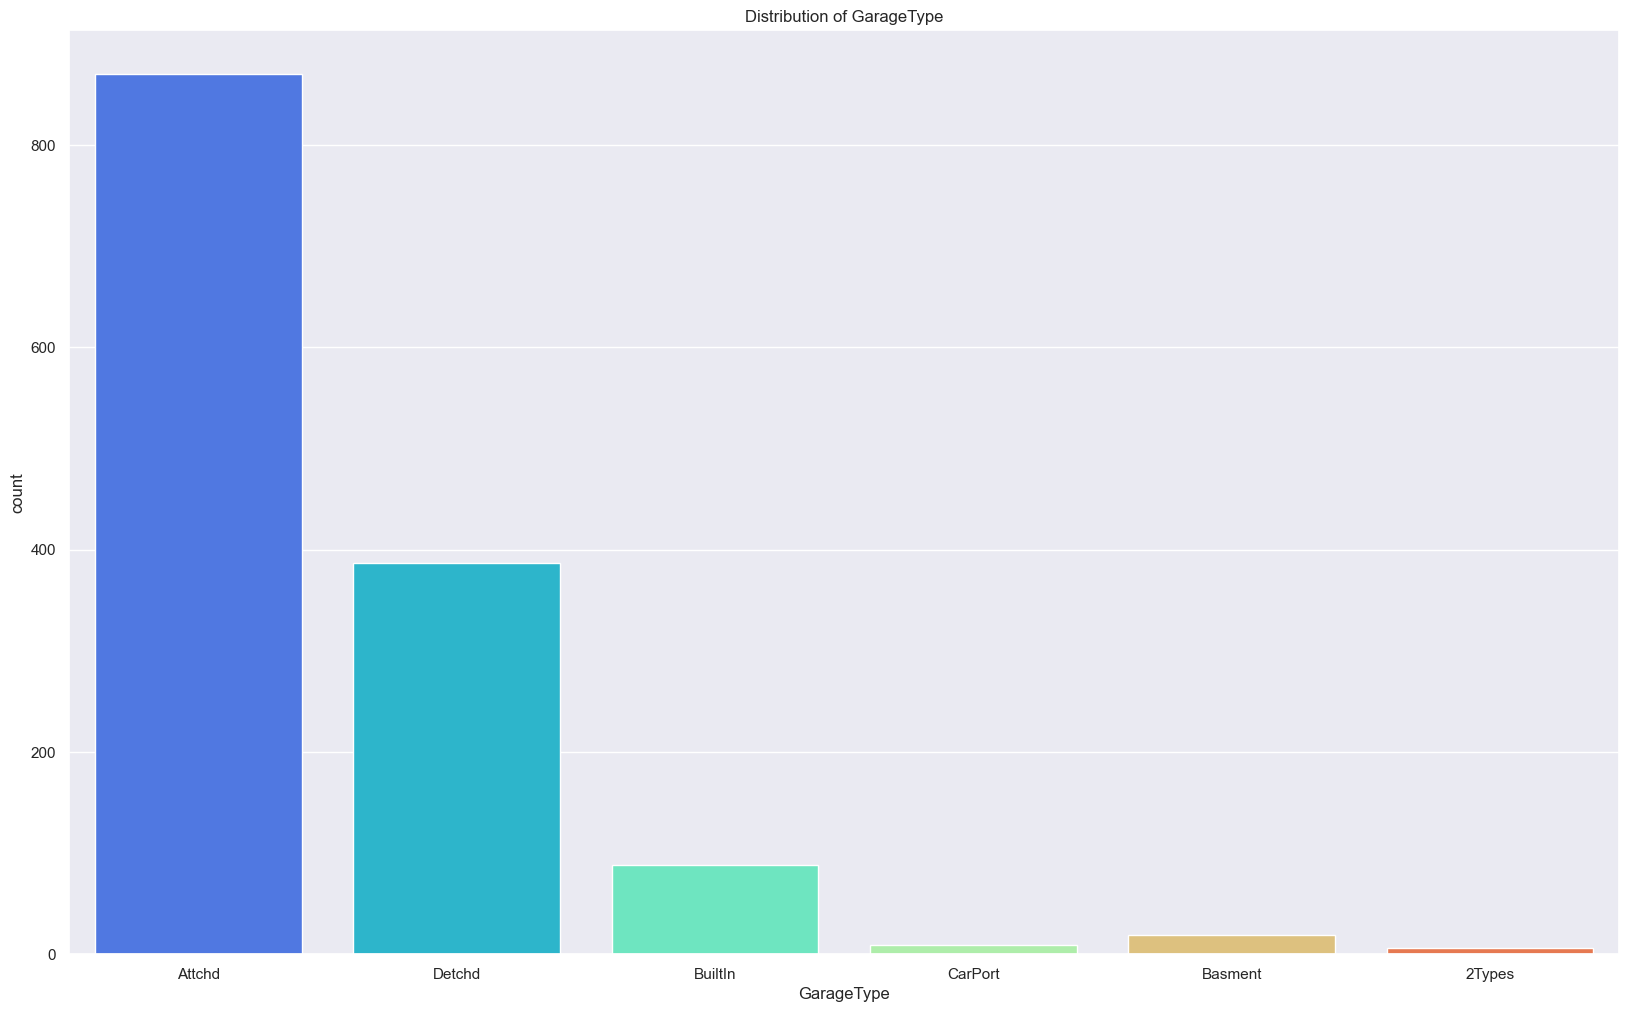

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


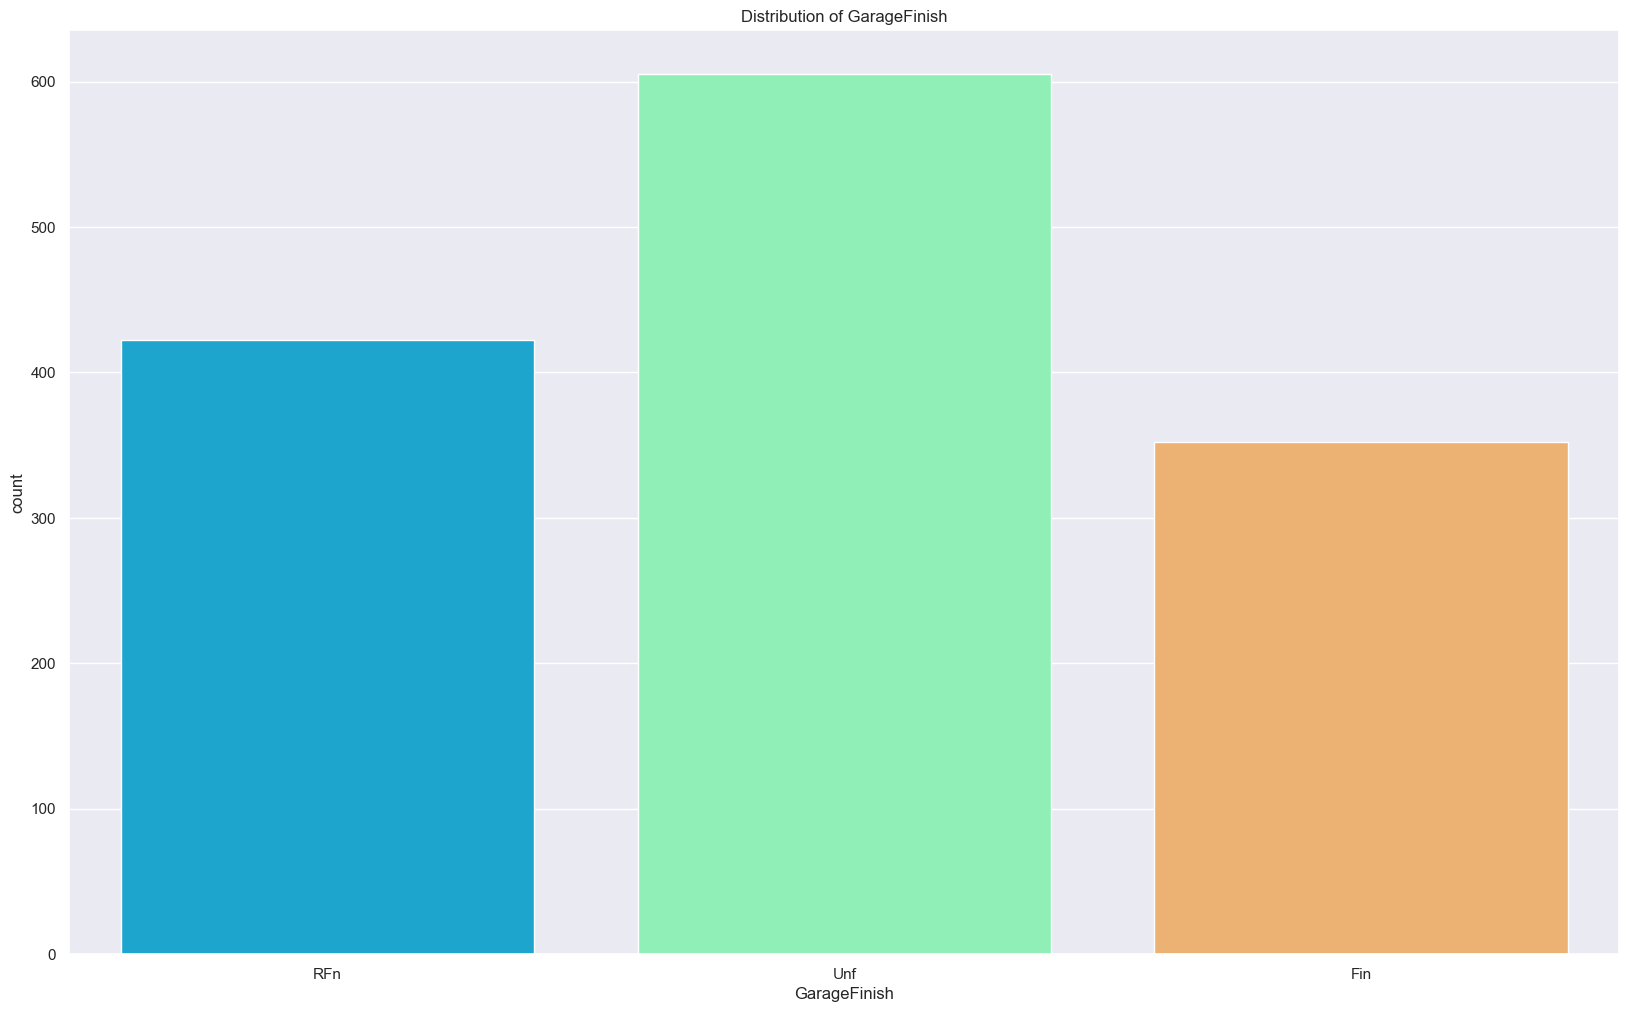

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


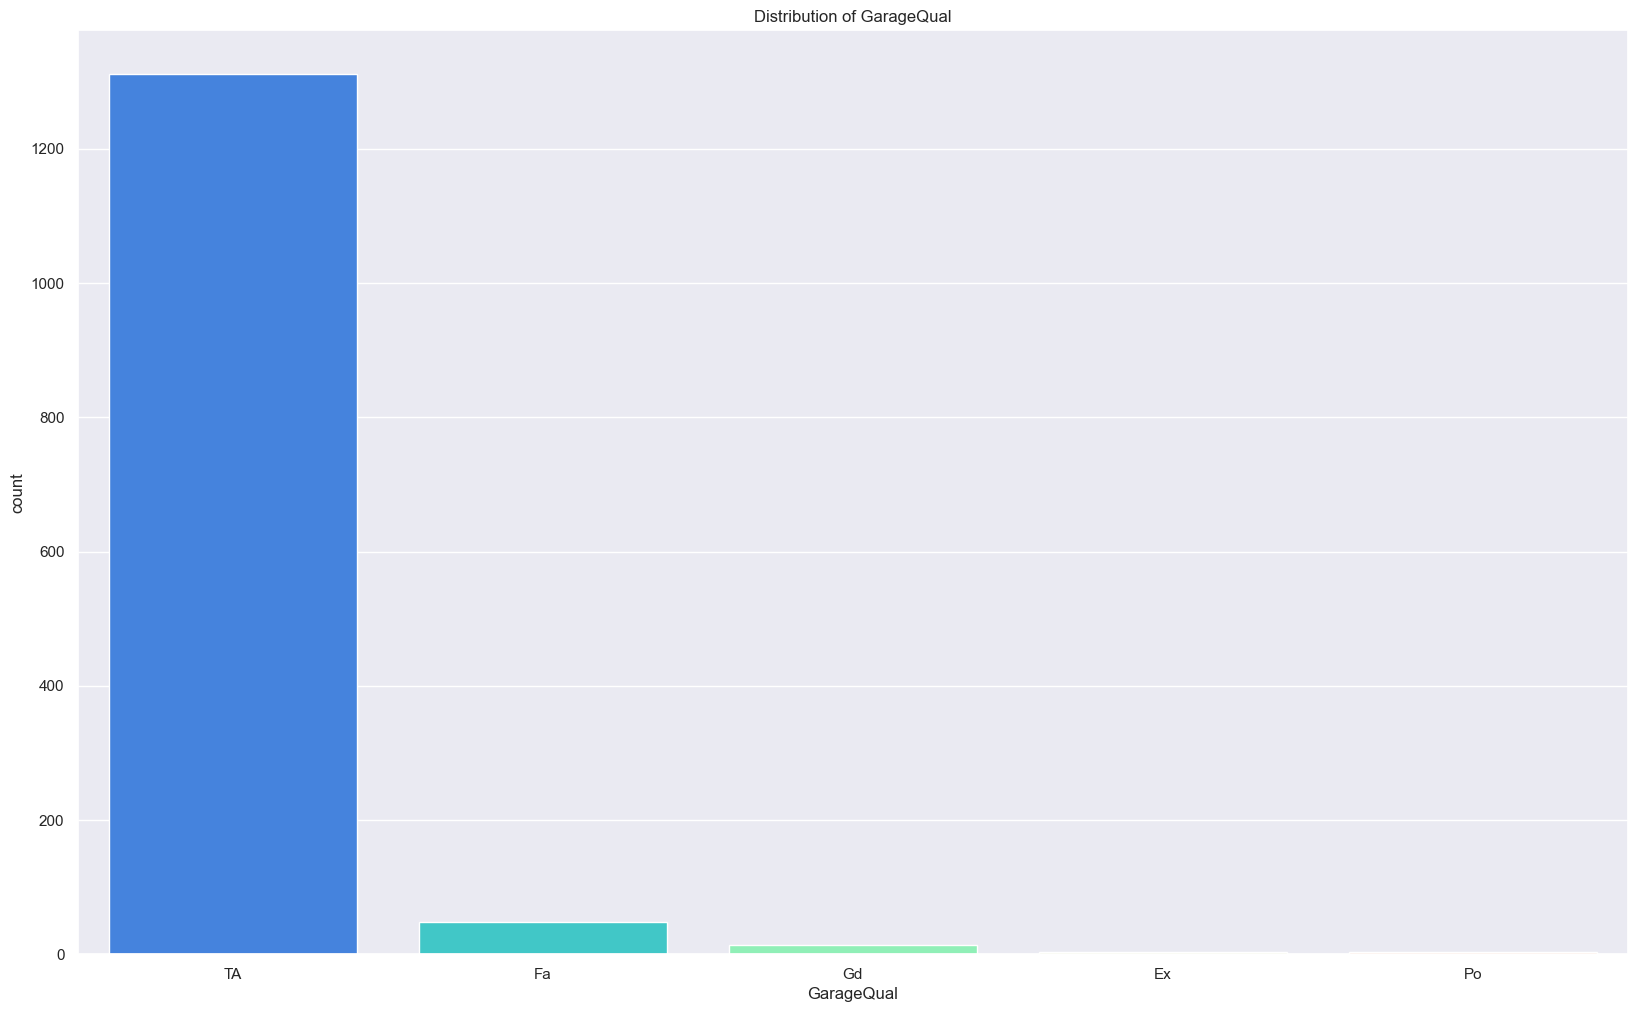

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


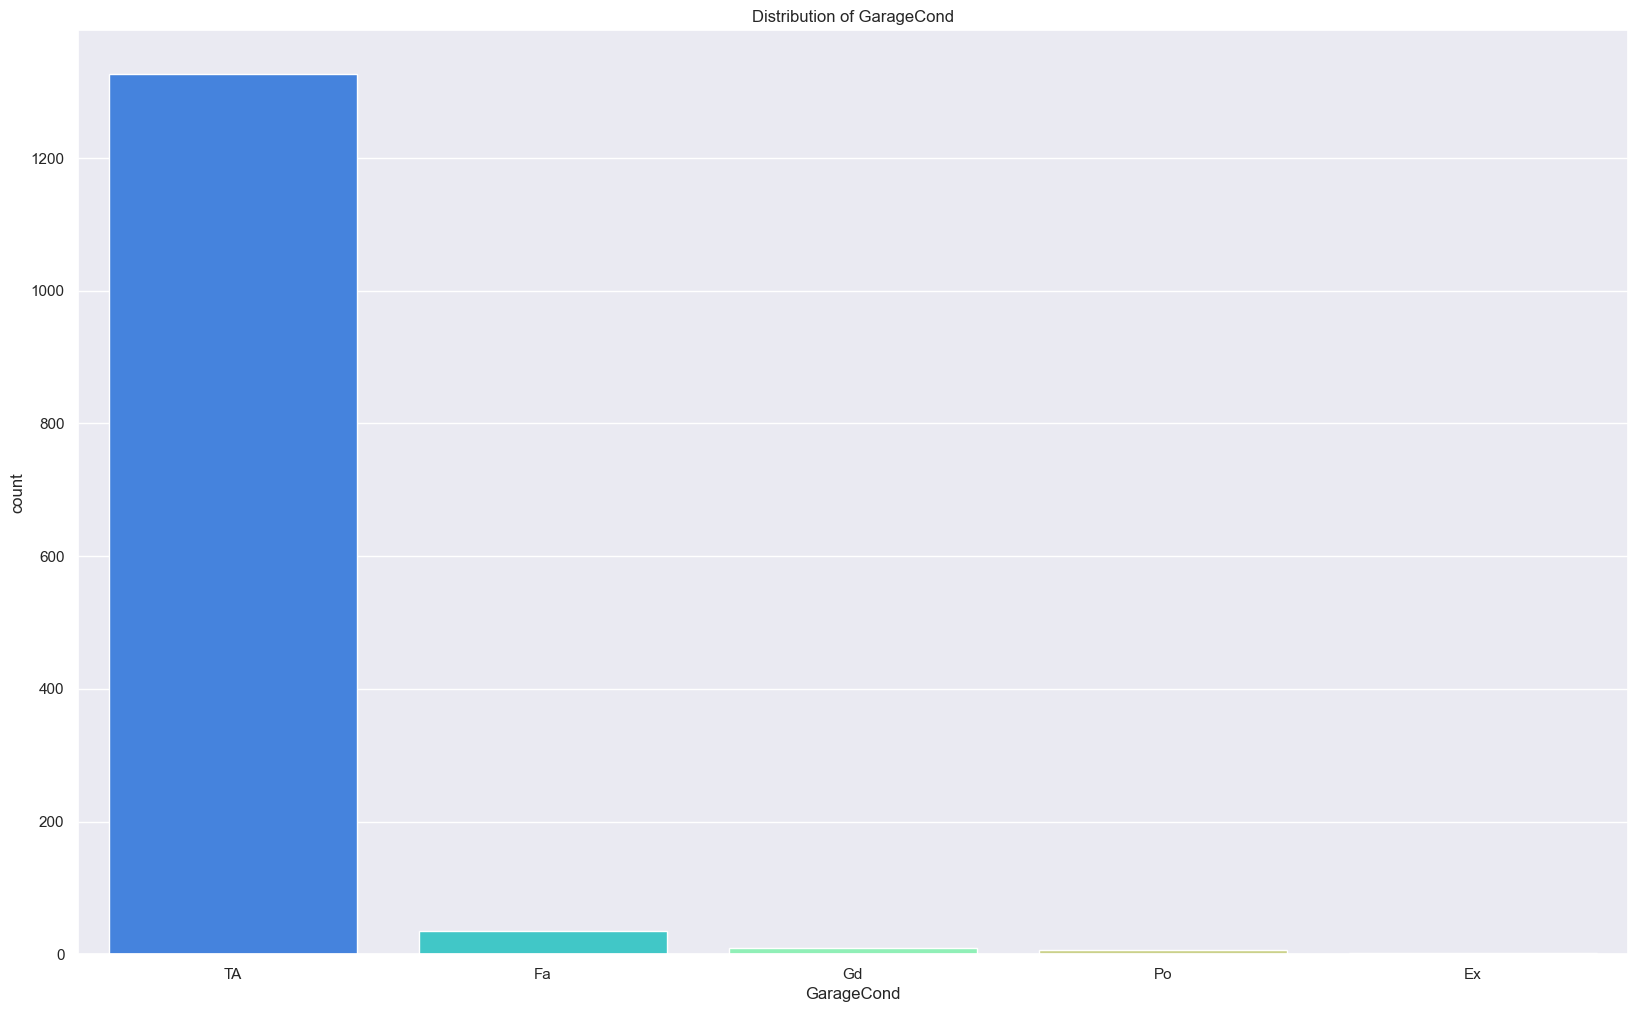

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


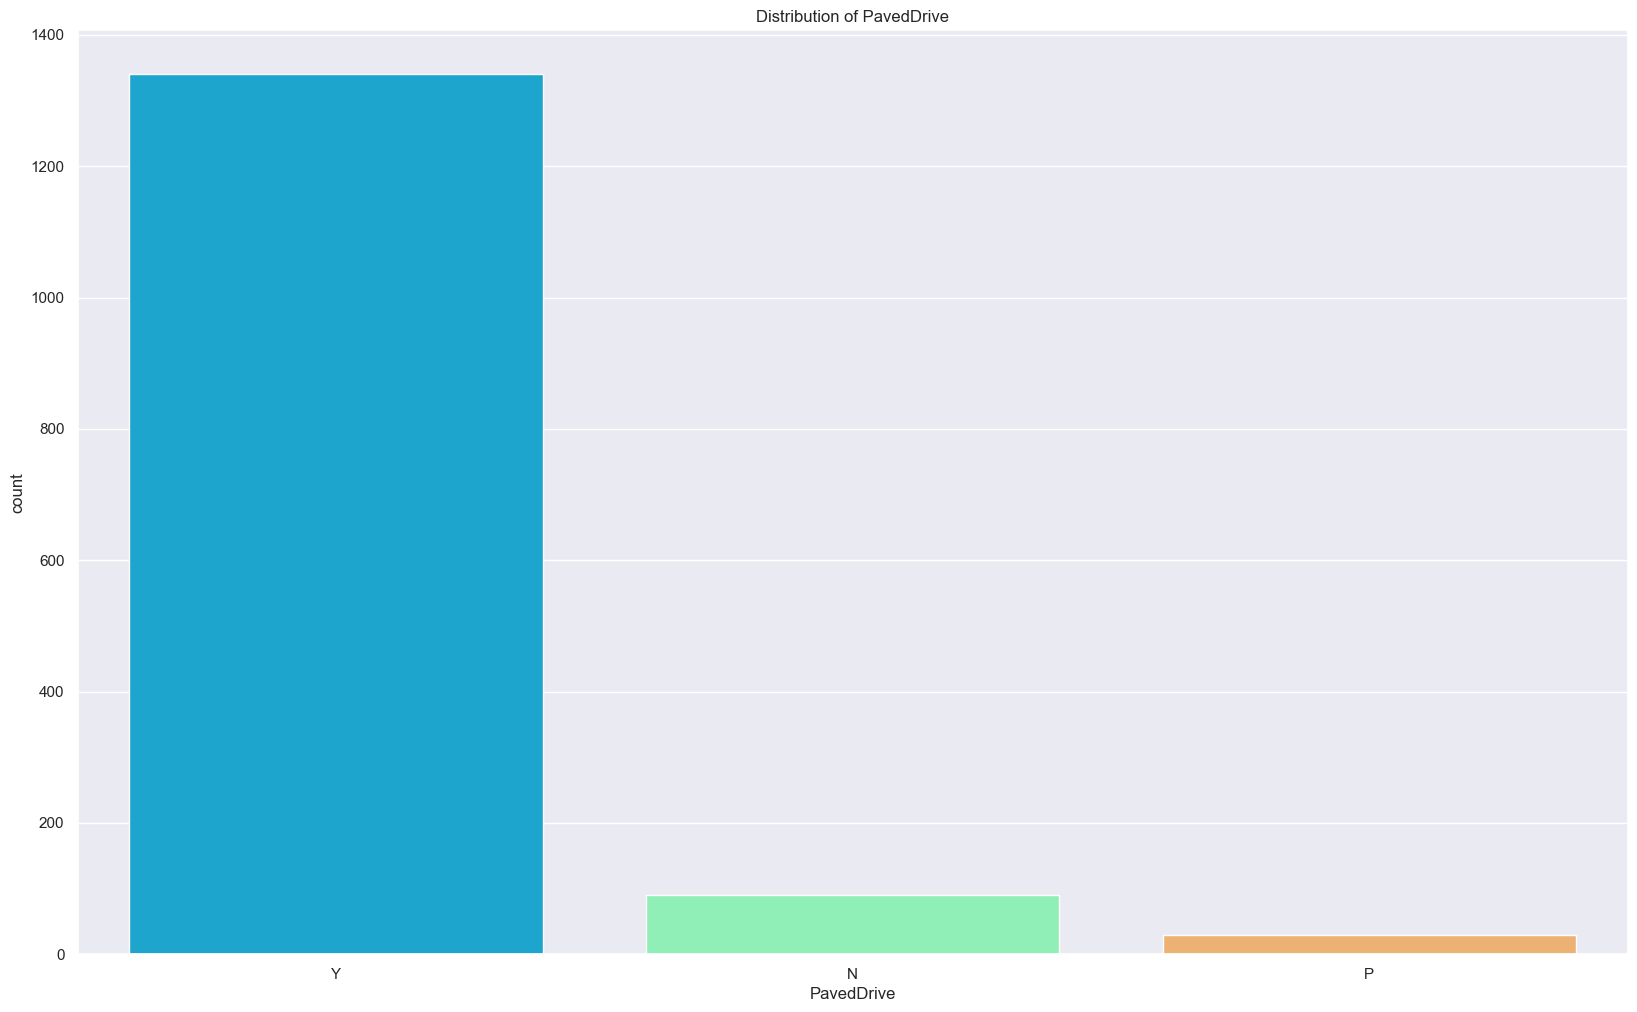

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


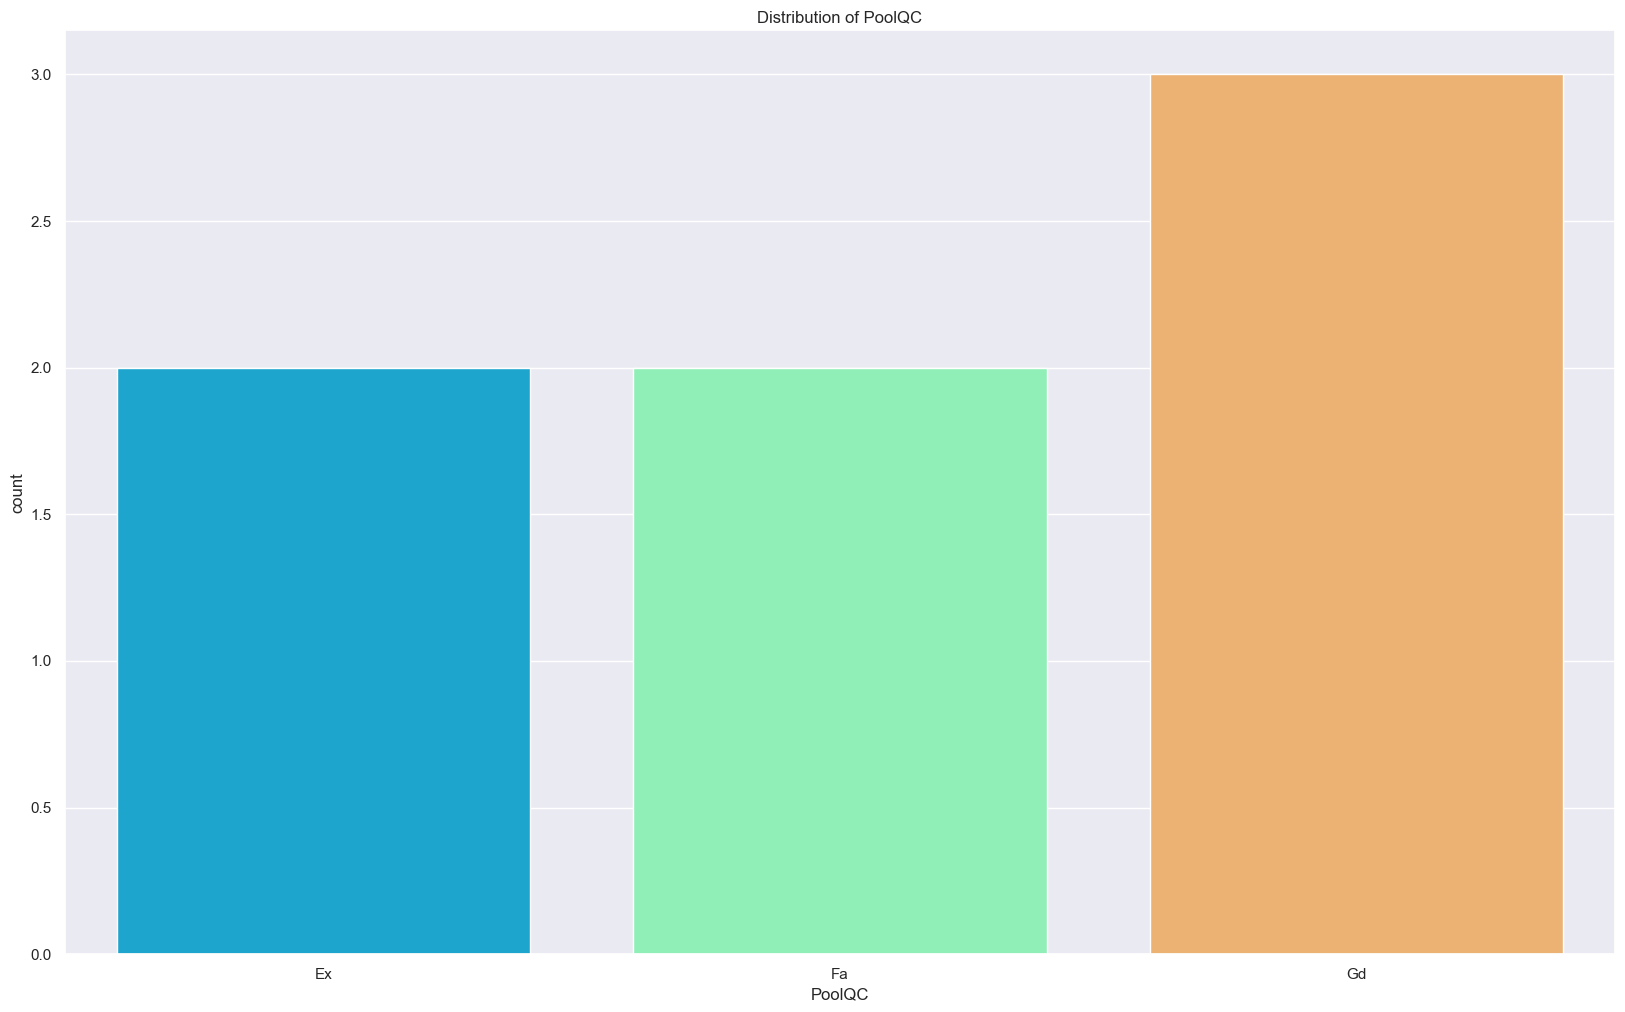

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


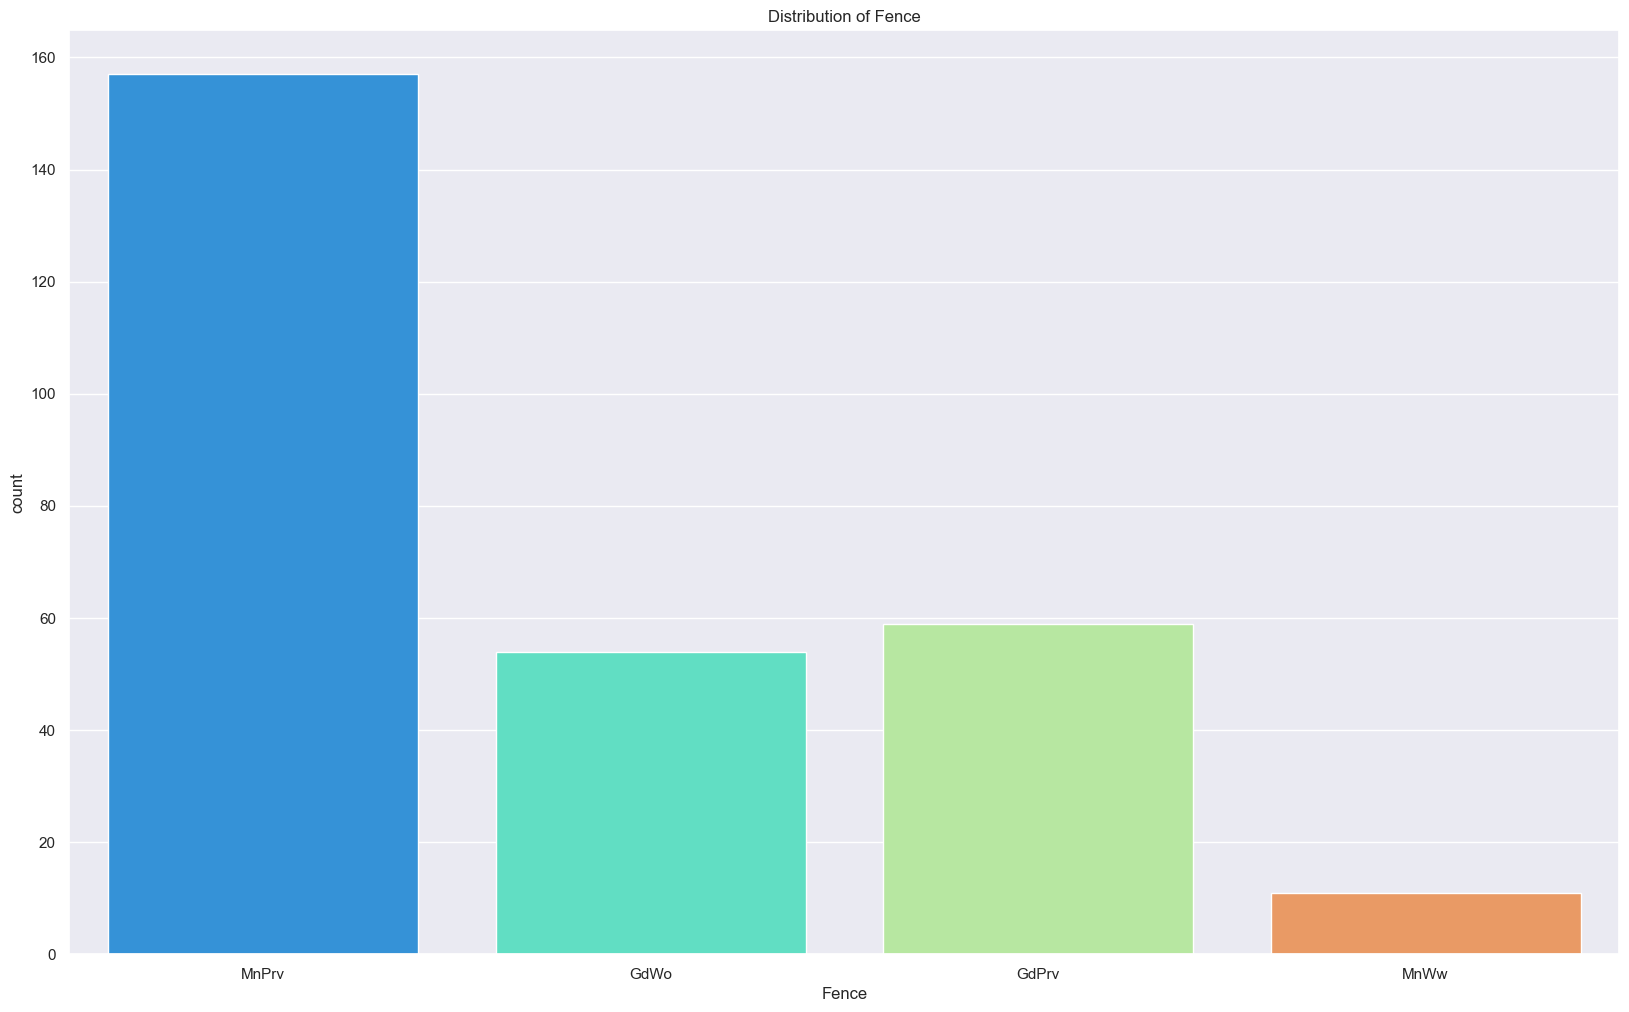

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


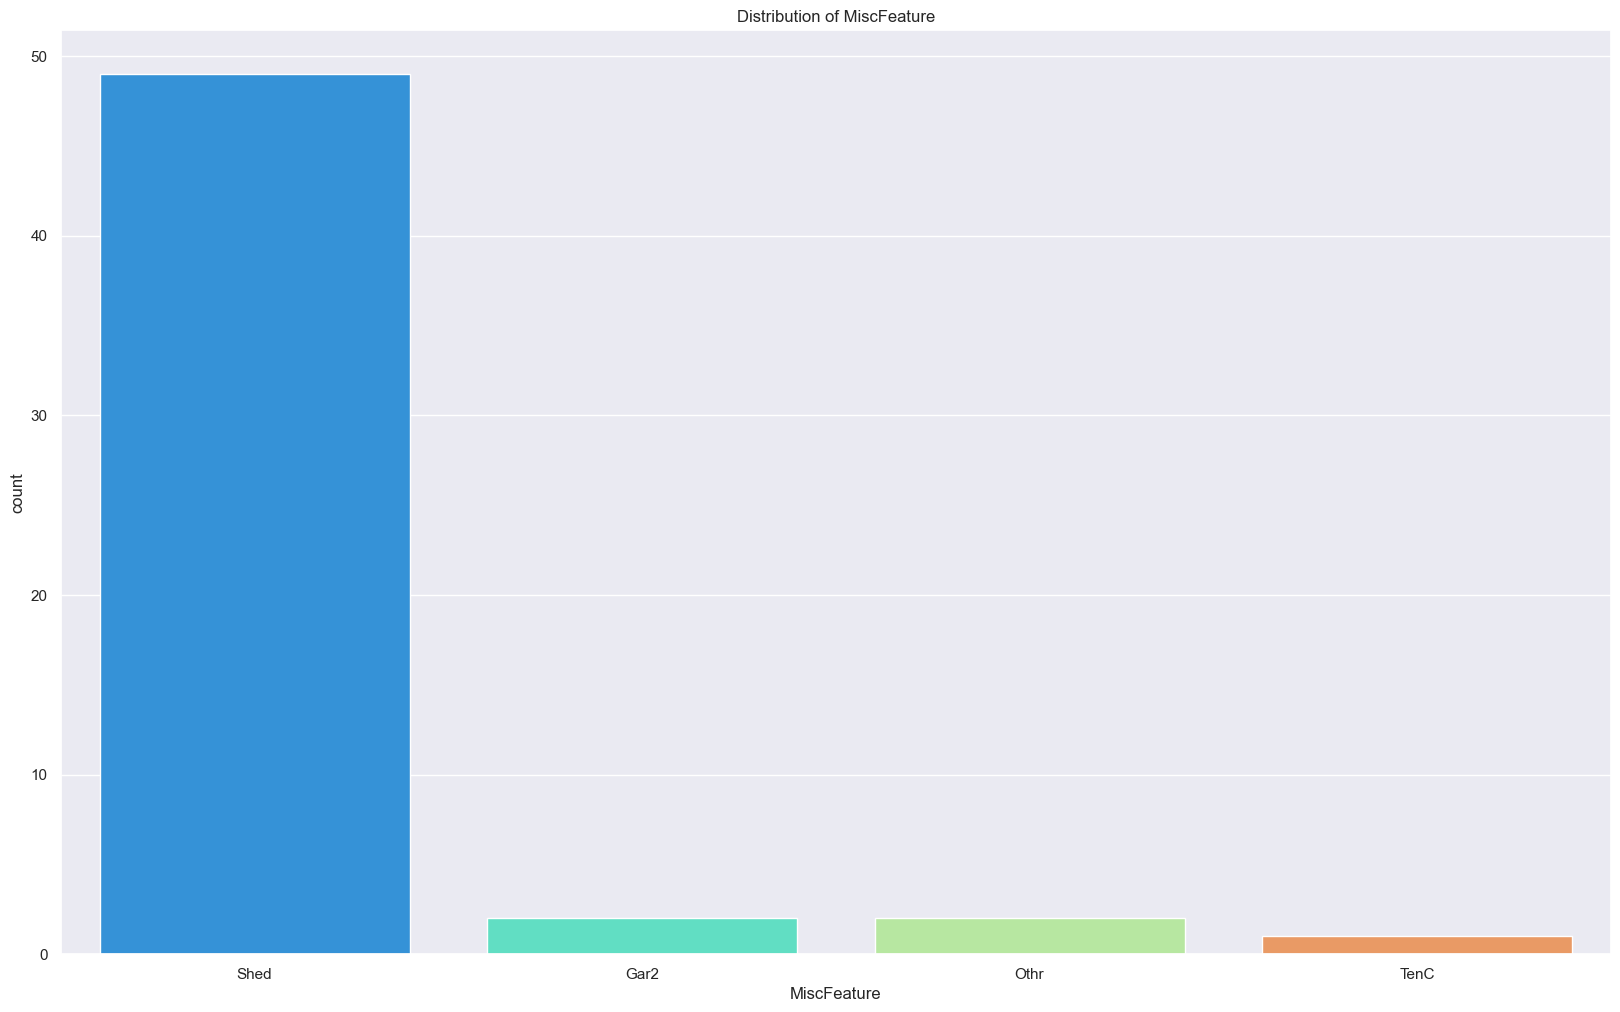

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


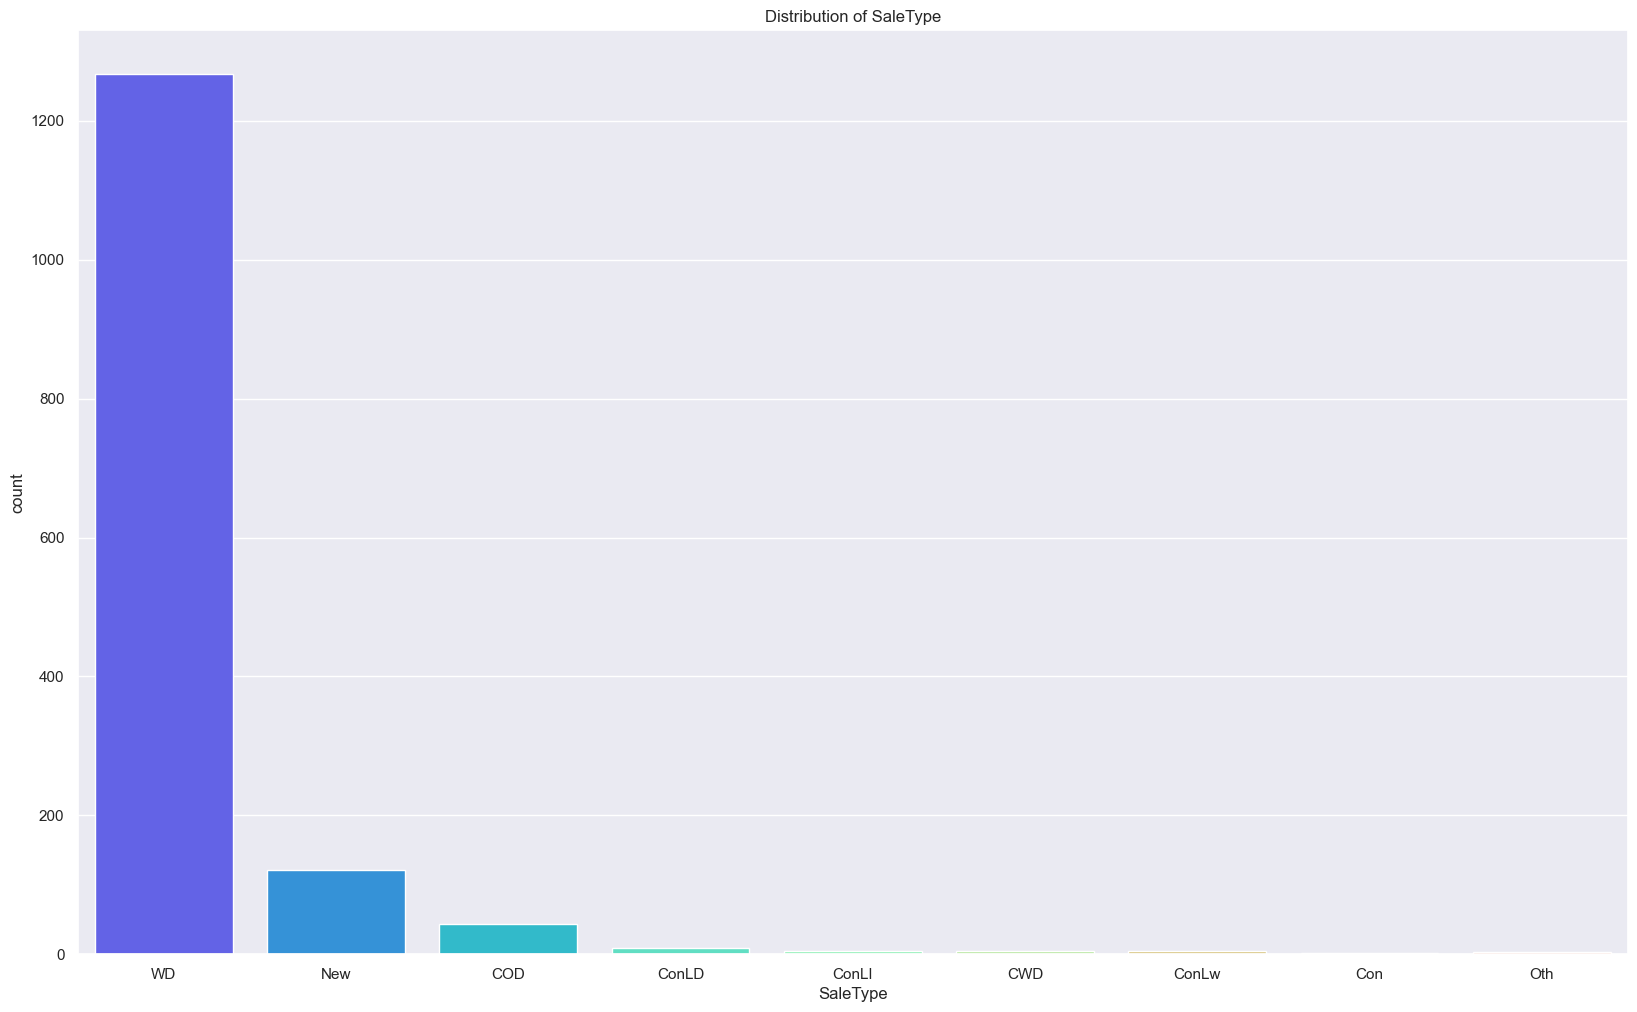

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5072\528062520.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= column,palette = 'rainbow')


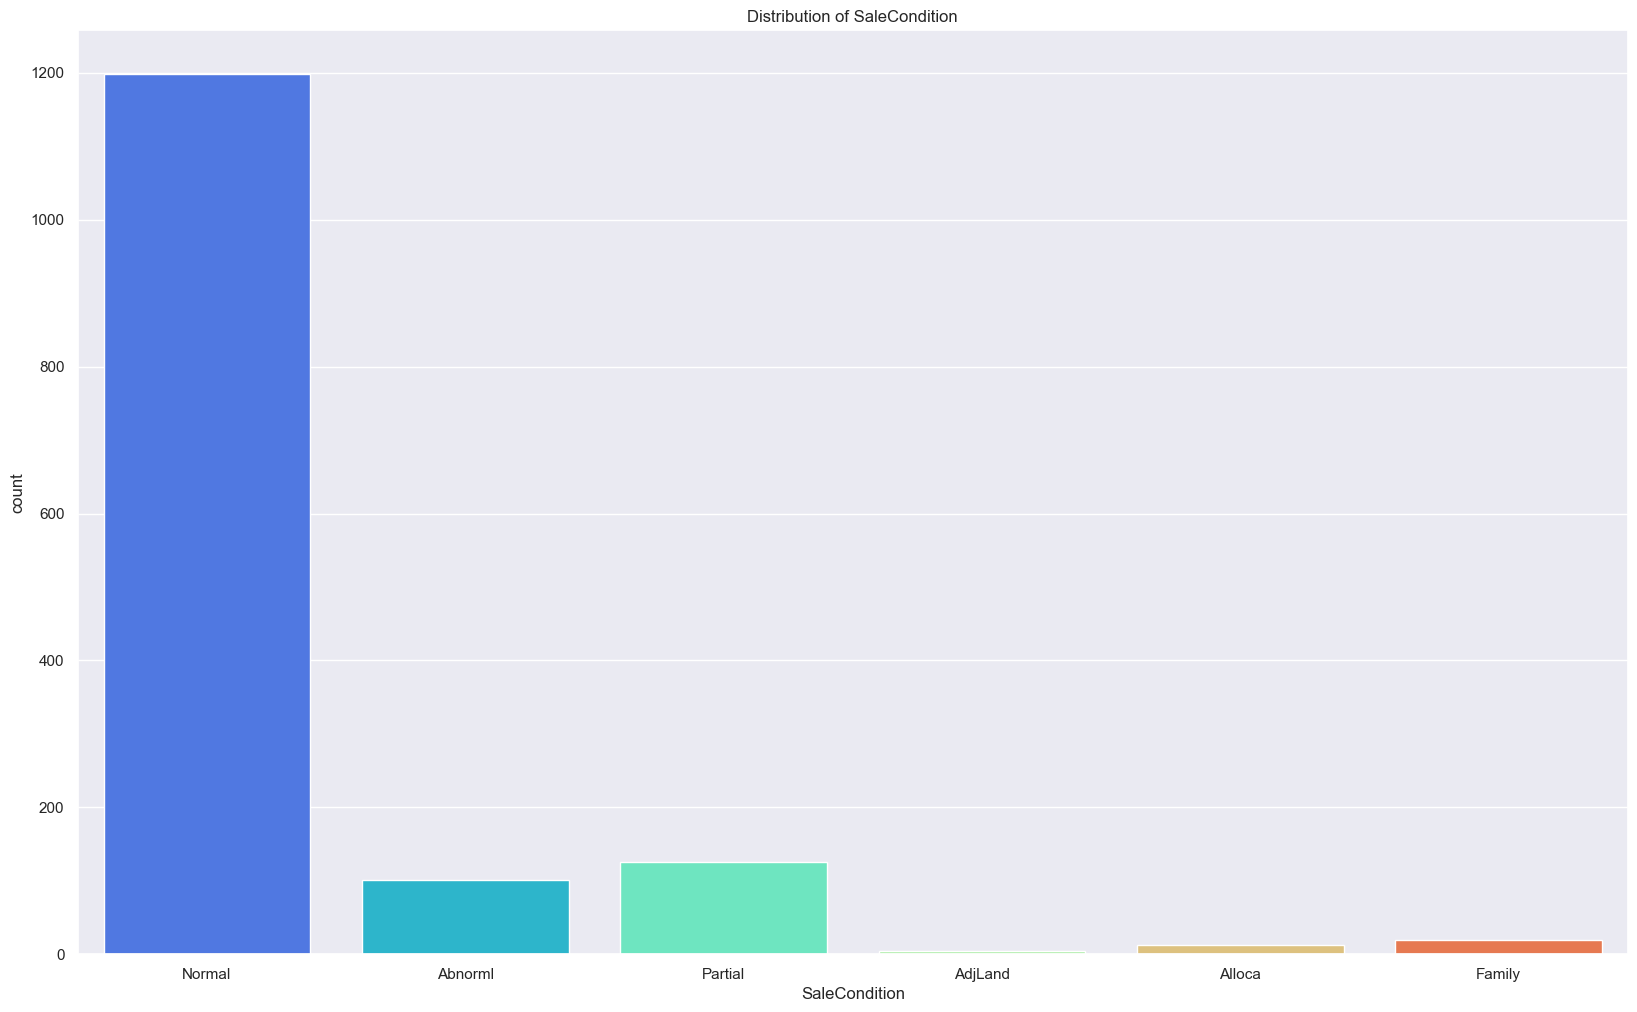

In [171]:
cat_columns = []
for i in df.columns :
    if df[i].dtype == 'O':
        cat_columns.append(i)



for column in df[cat_columns]:
        sns.countplot(data = df, x= column,palette = 'rainbow')
        plt.title(f'Distribution of {column}')
        plt.show()
        

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

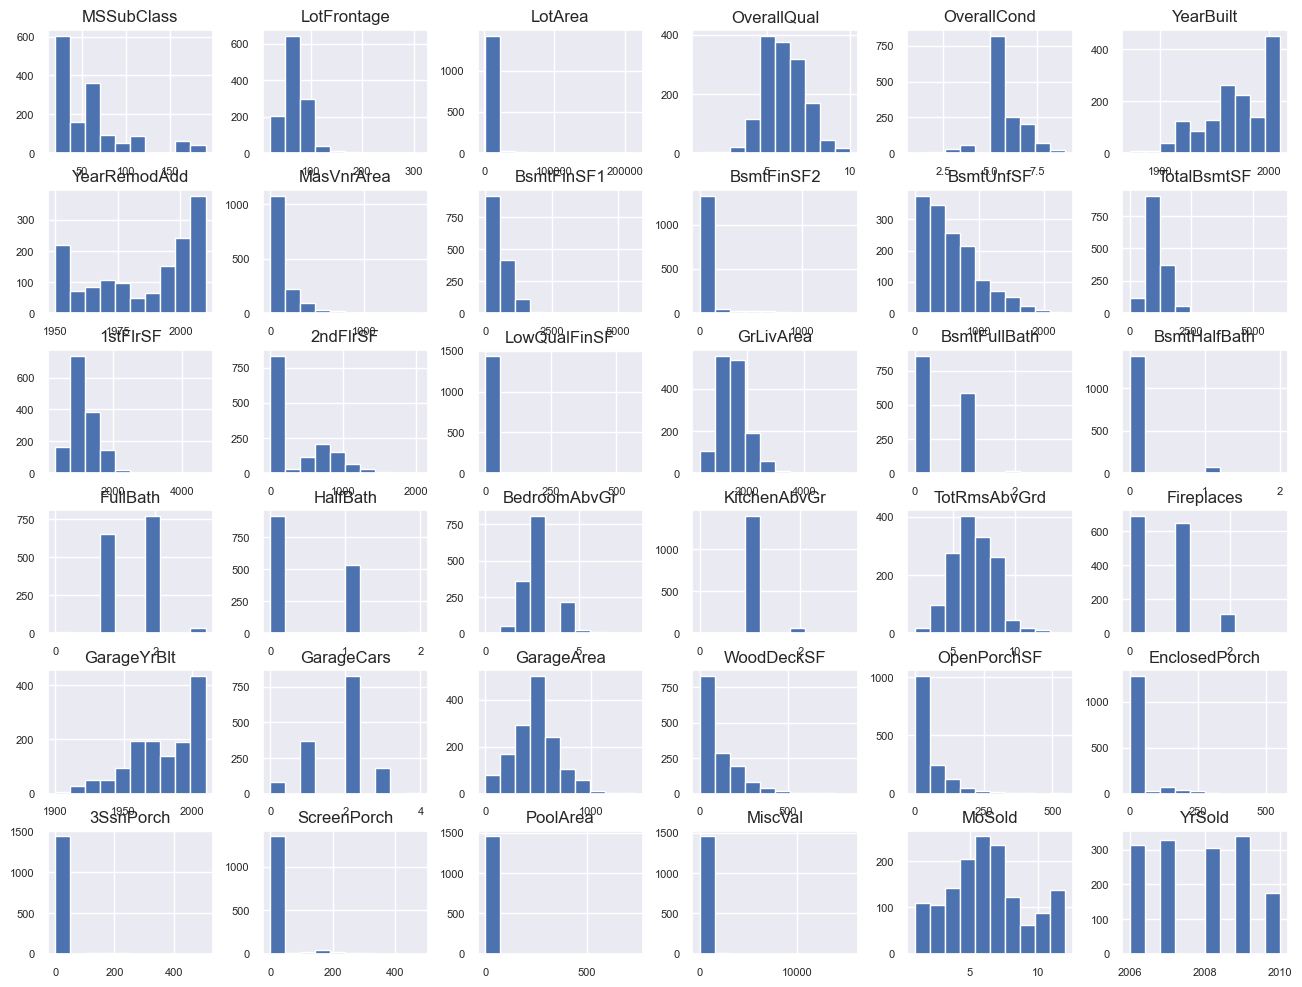

In [172]:
#num_columns = []
#for i in df.columns :
    #if df[i].dtype != 'O' :
        #num_columns.append(i)
        
num_columns = df.select_dtypes('number')
num_columns = num_columns.drop('SalePrice',axis =1)
num_columns
#for column in num_columns:
        #sns.histplot(df[column],kde = True)
        #plt.title(f'SalePrice vs {column}')
        #plt.show()
num_columns.hist(figsize = (16,12), xlabelsize = 8,ylabelsize = 8)

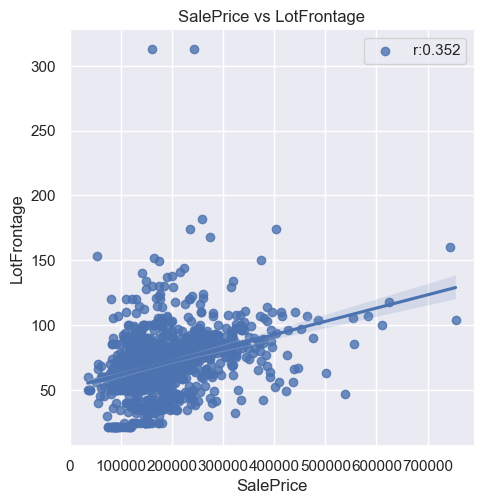

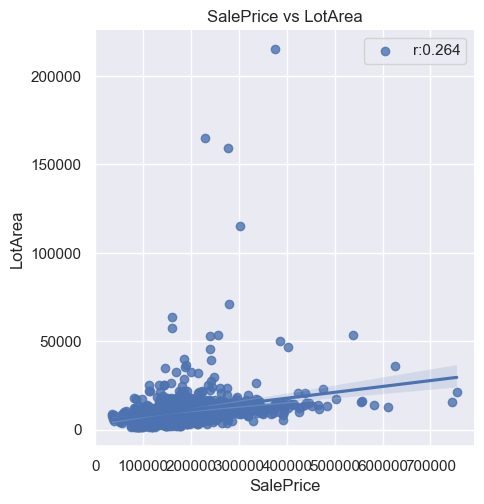

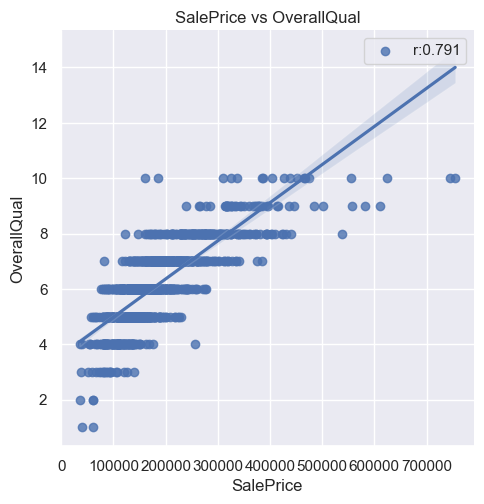

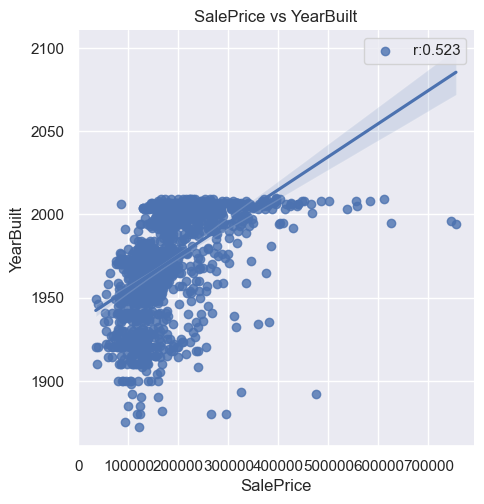

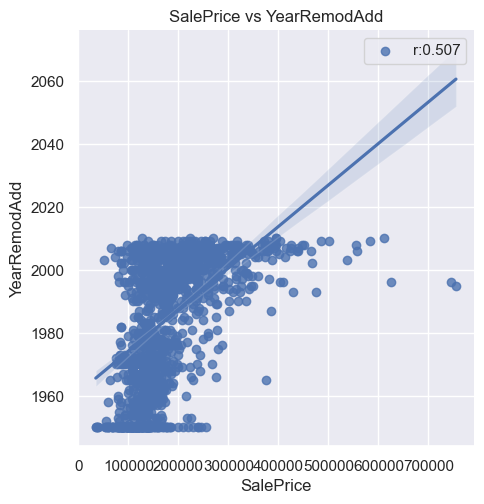

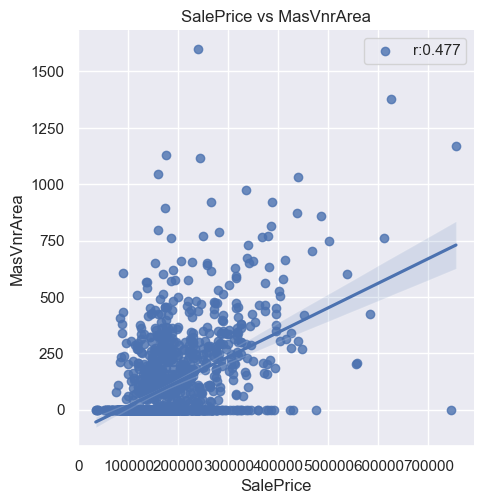

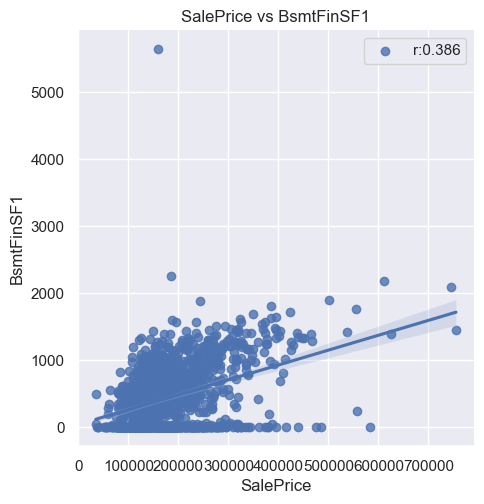

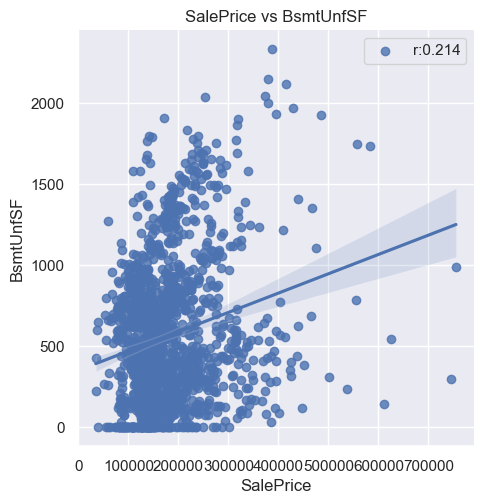

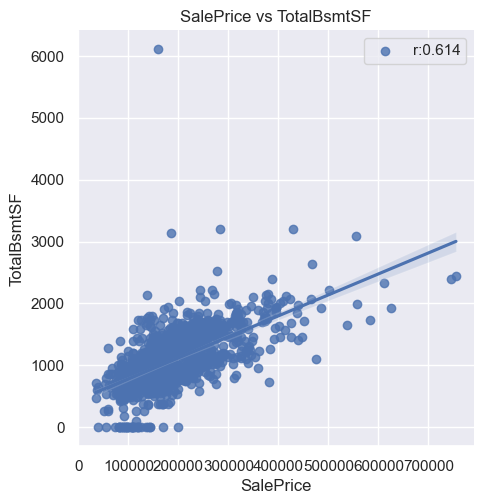

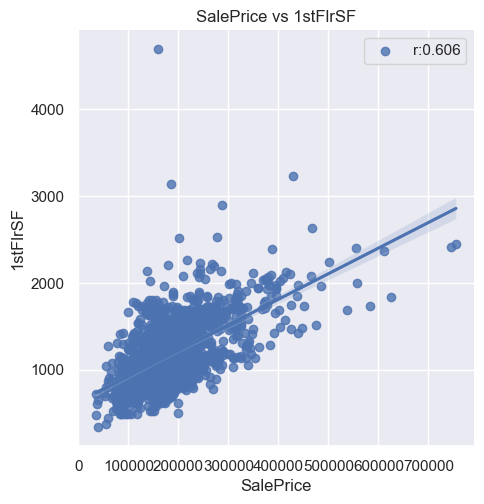

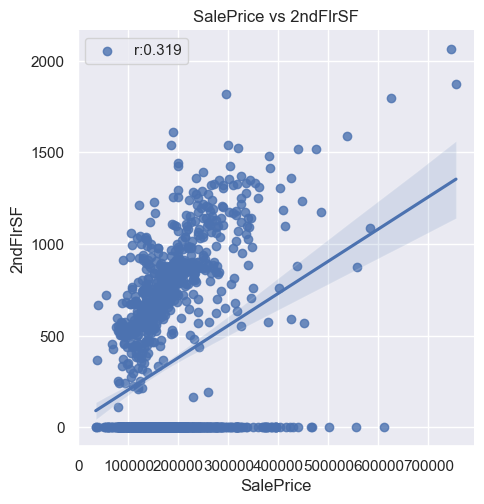

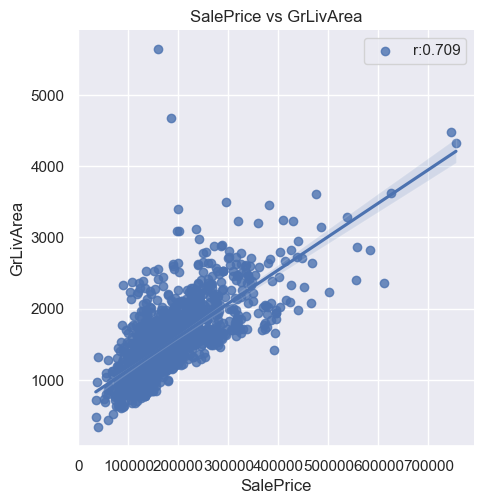

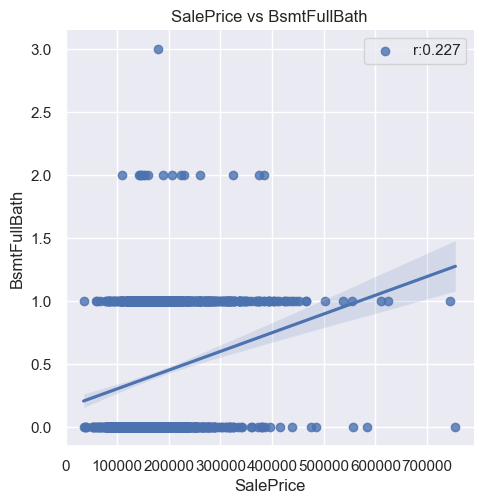

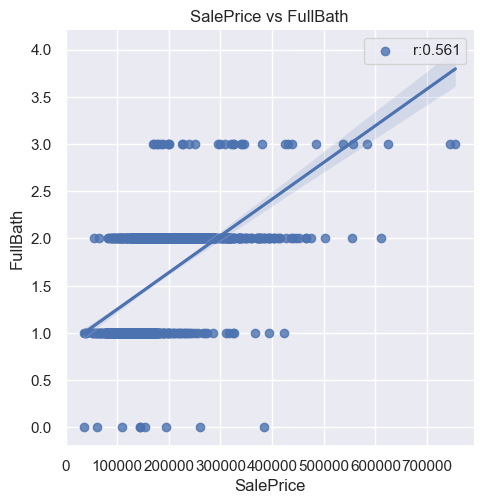

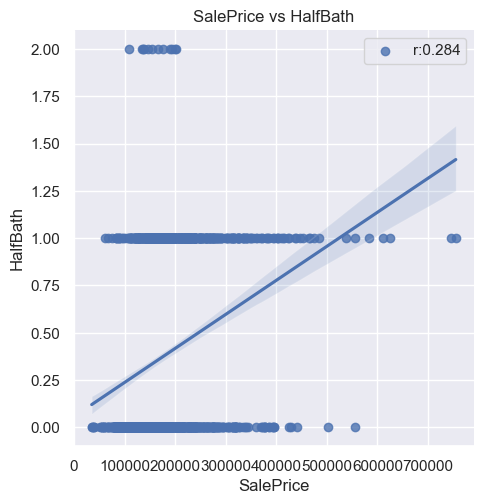

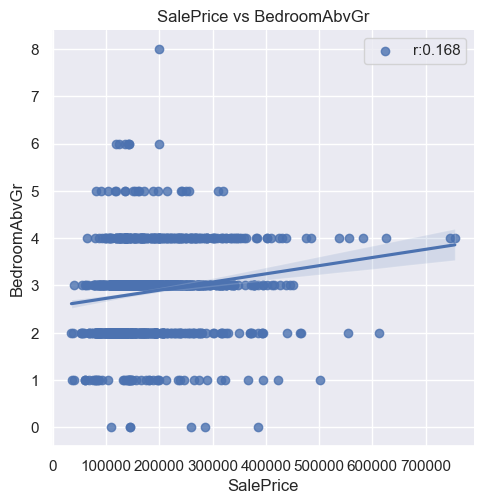

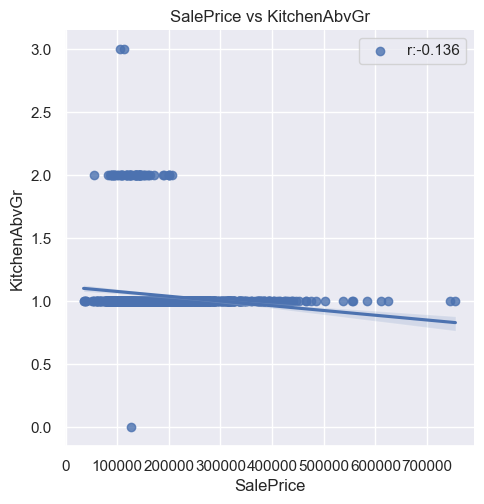

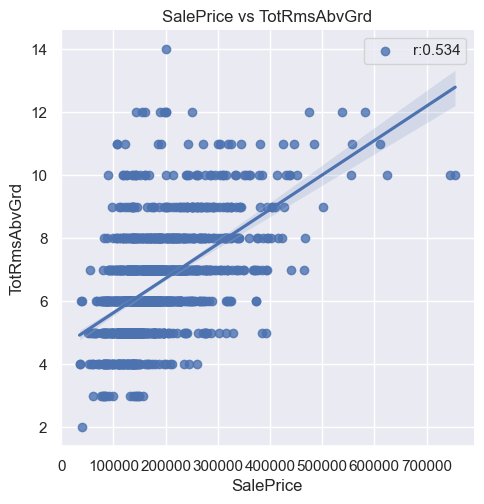

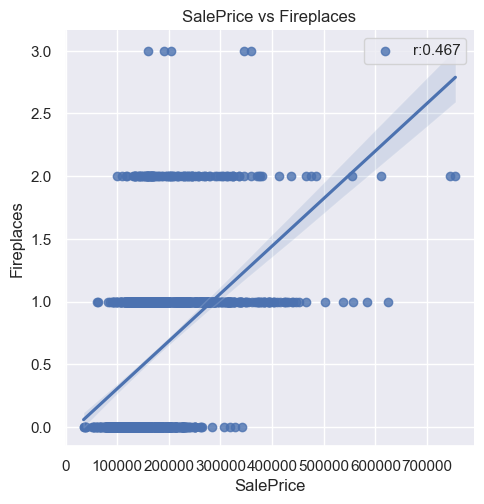

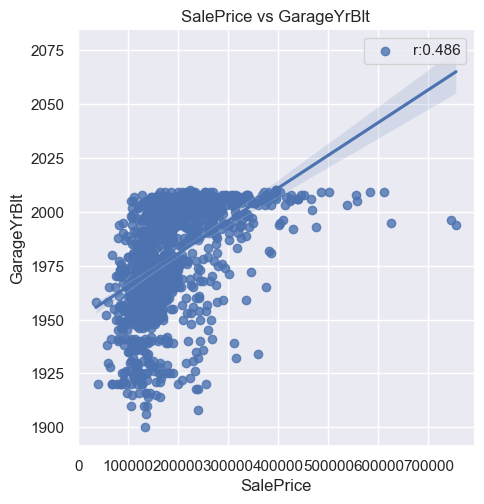

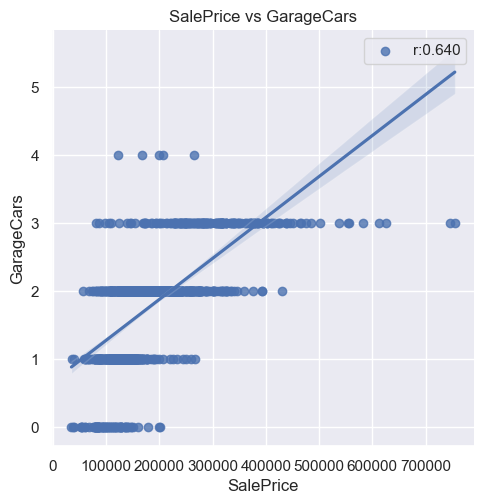

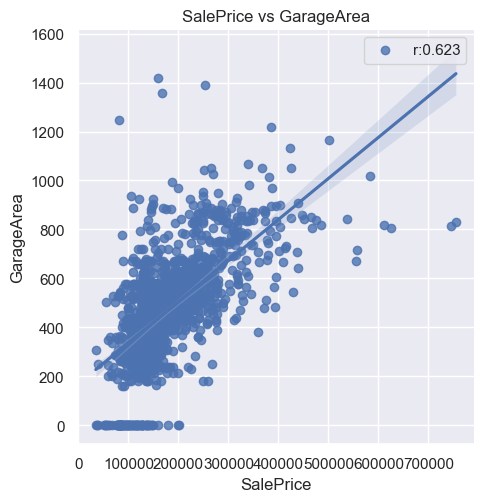

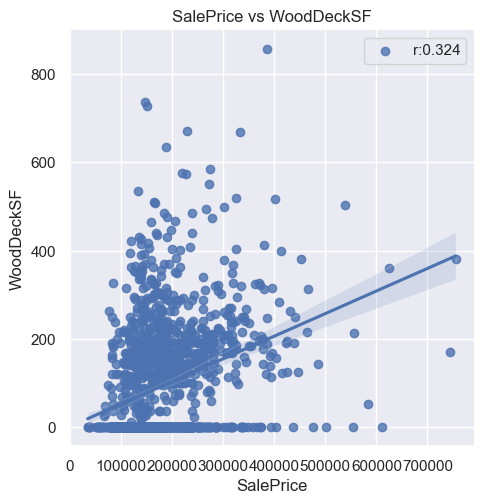

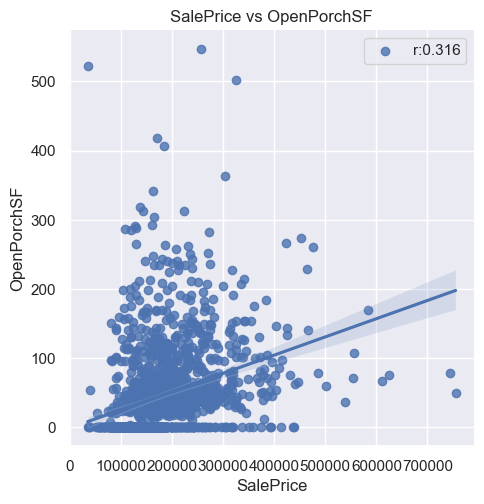

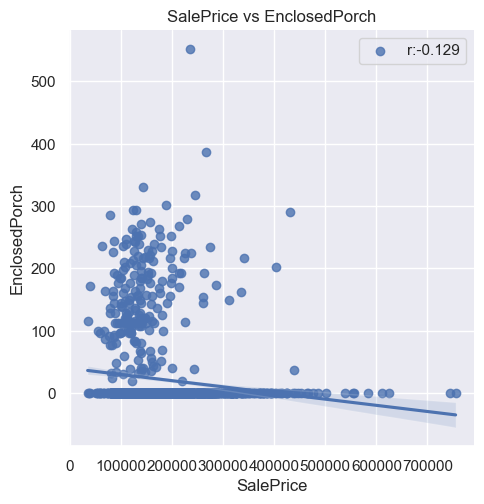

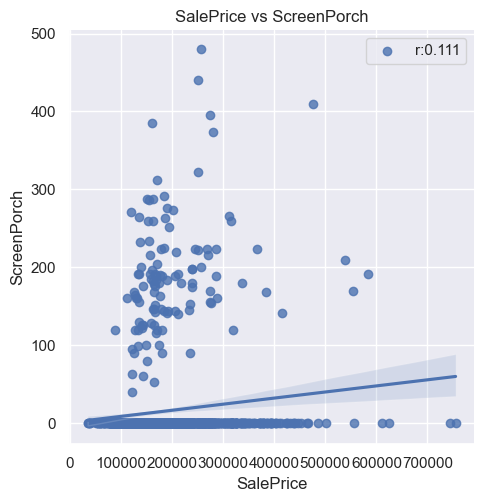

In [173]:
for column in num_columns:
        corr = df['SalePrice'].corr(df[column])
        if corr >=0.1 or corr <= -0.1 :
            sns.lmplot(df, x= 'SalePrice', y = column,height=5, aspect=1)
            plt.title(f'SalePrice vs {column}')
            plt.legend([f'r:{corr :.3f}'])
            plt.show()

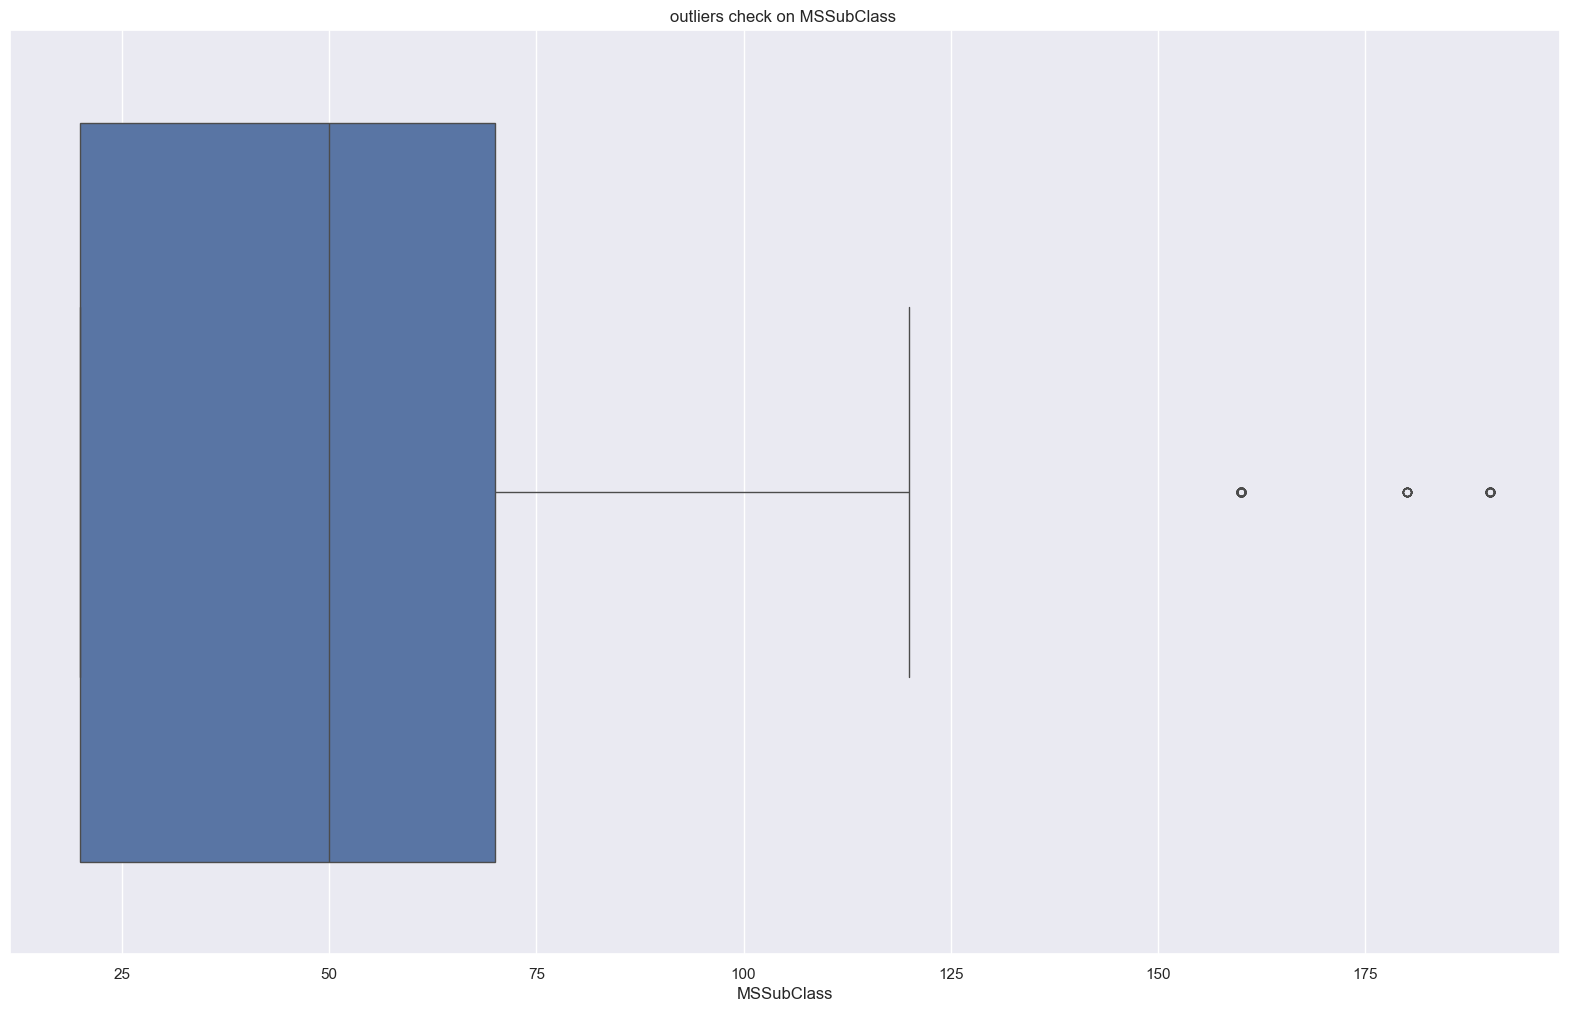

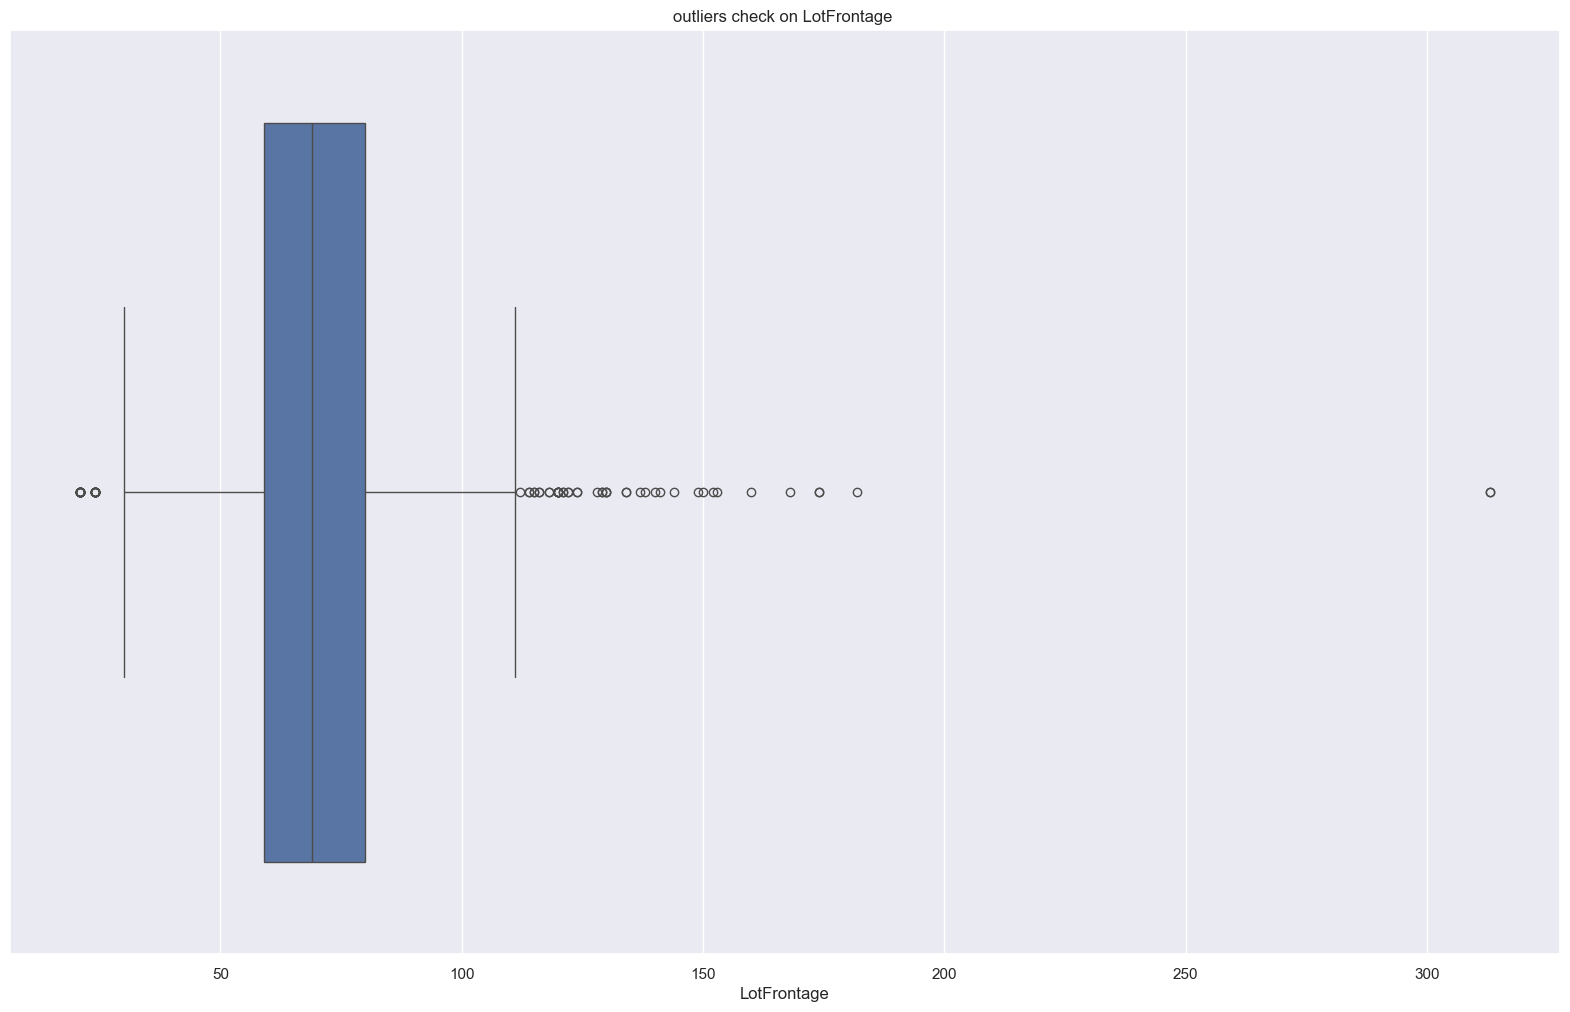

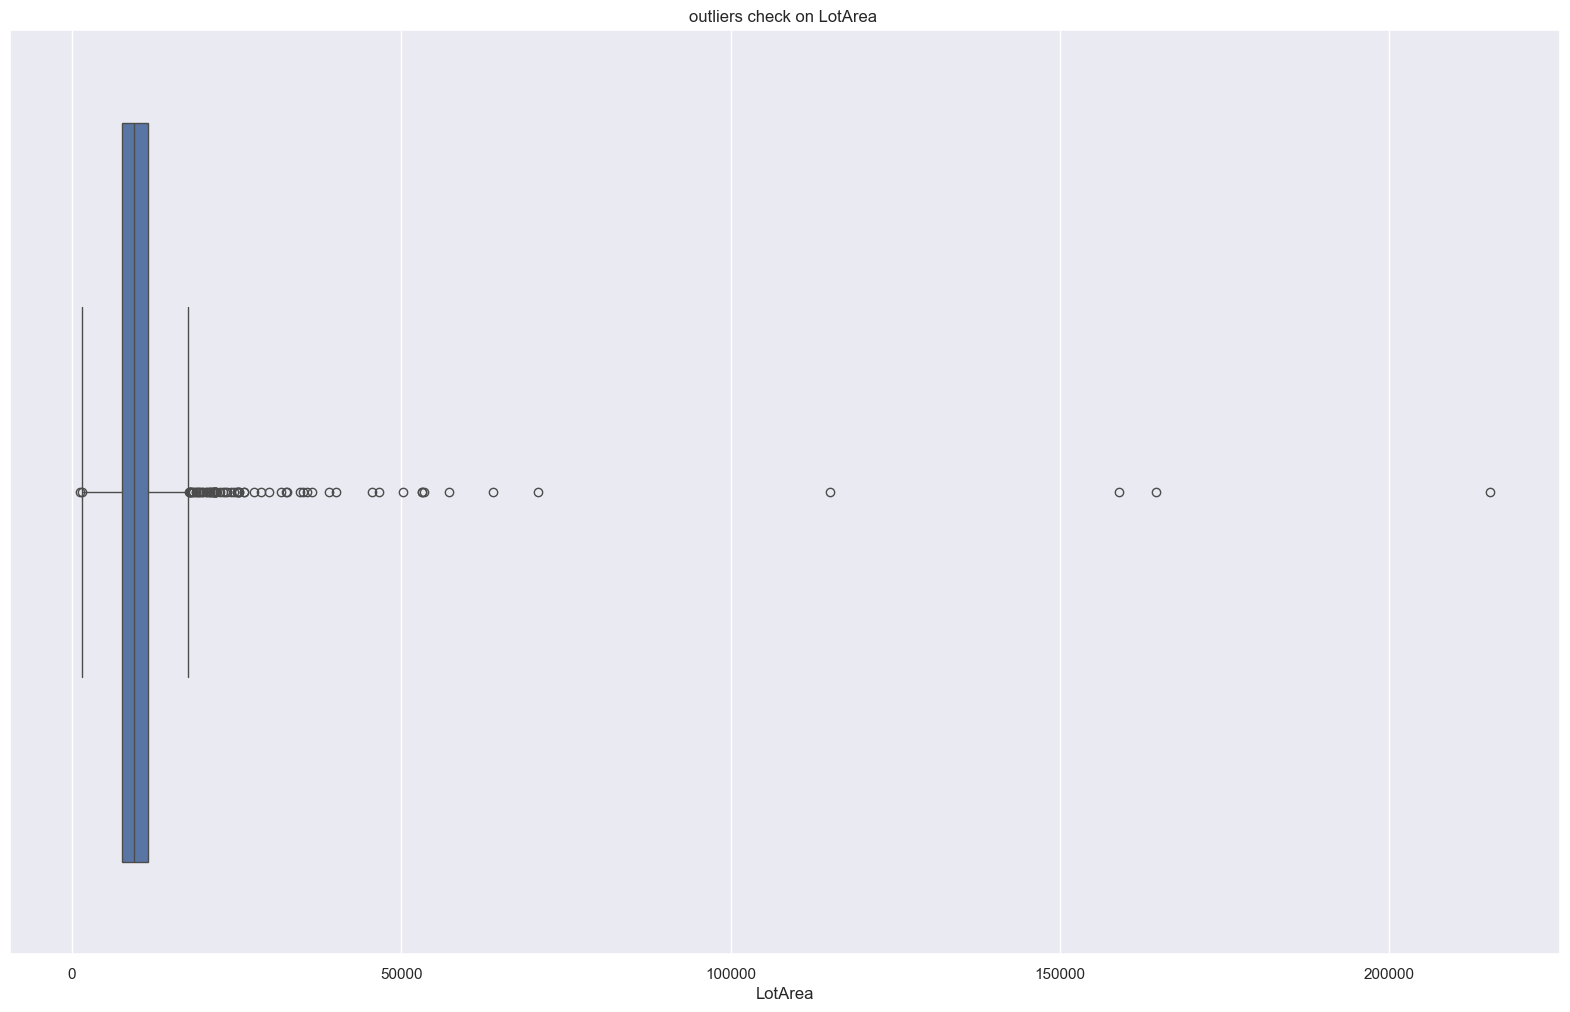

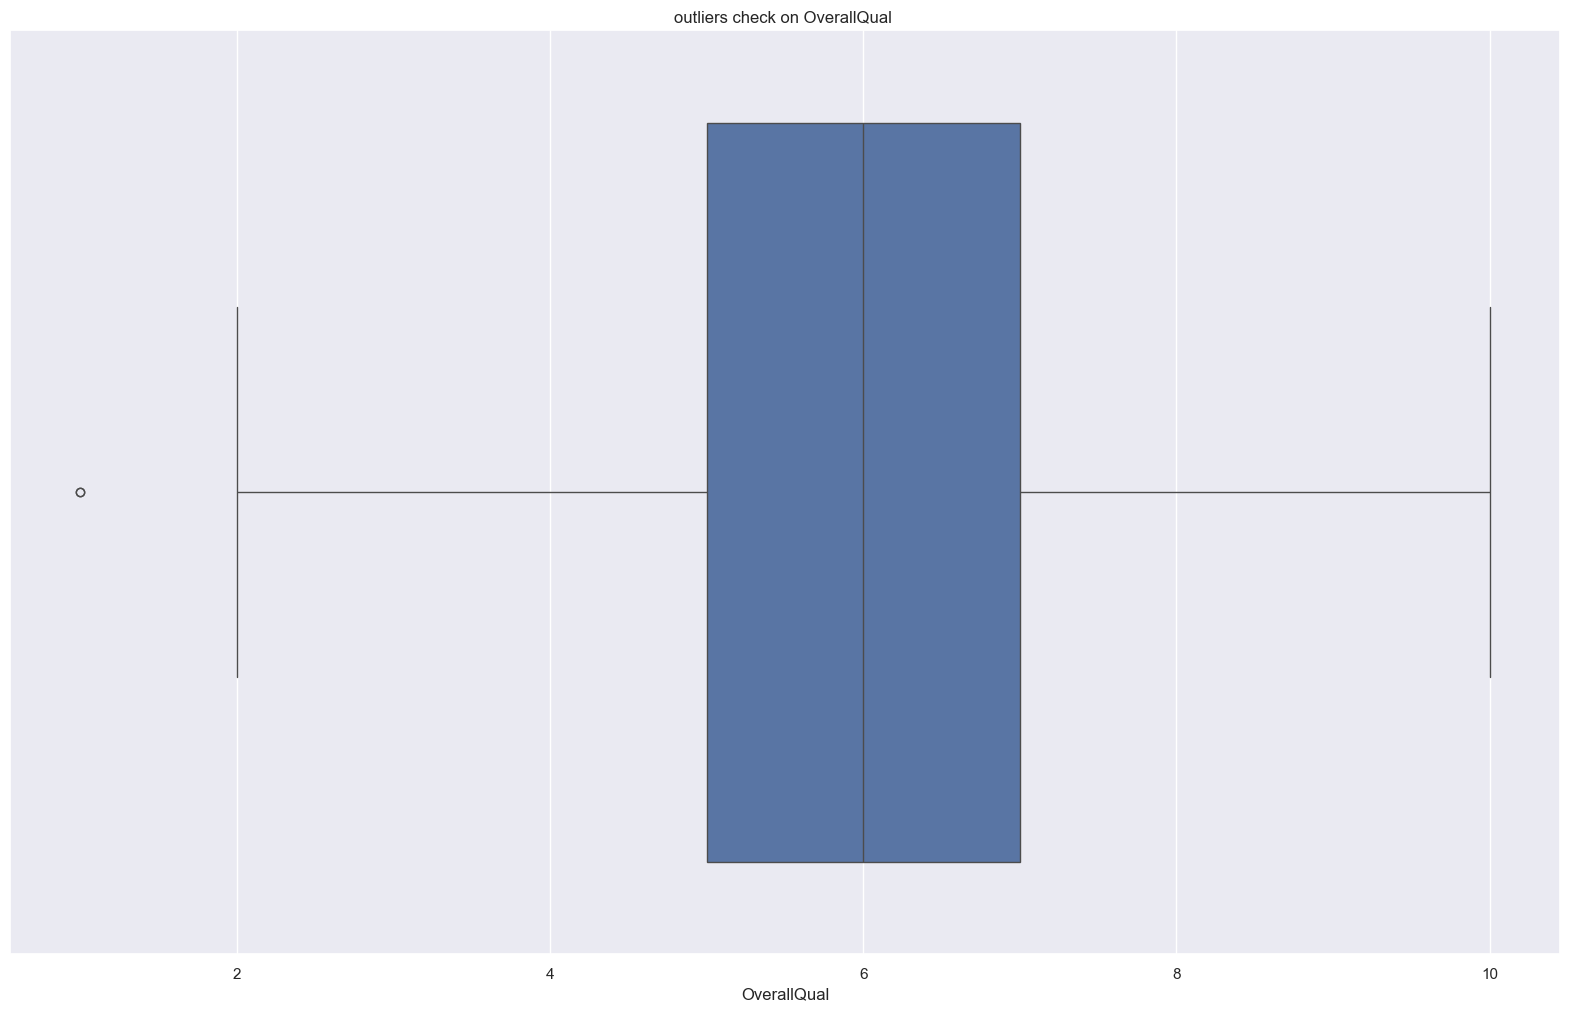

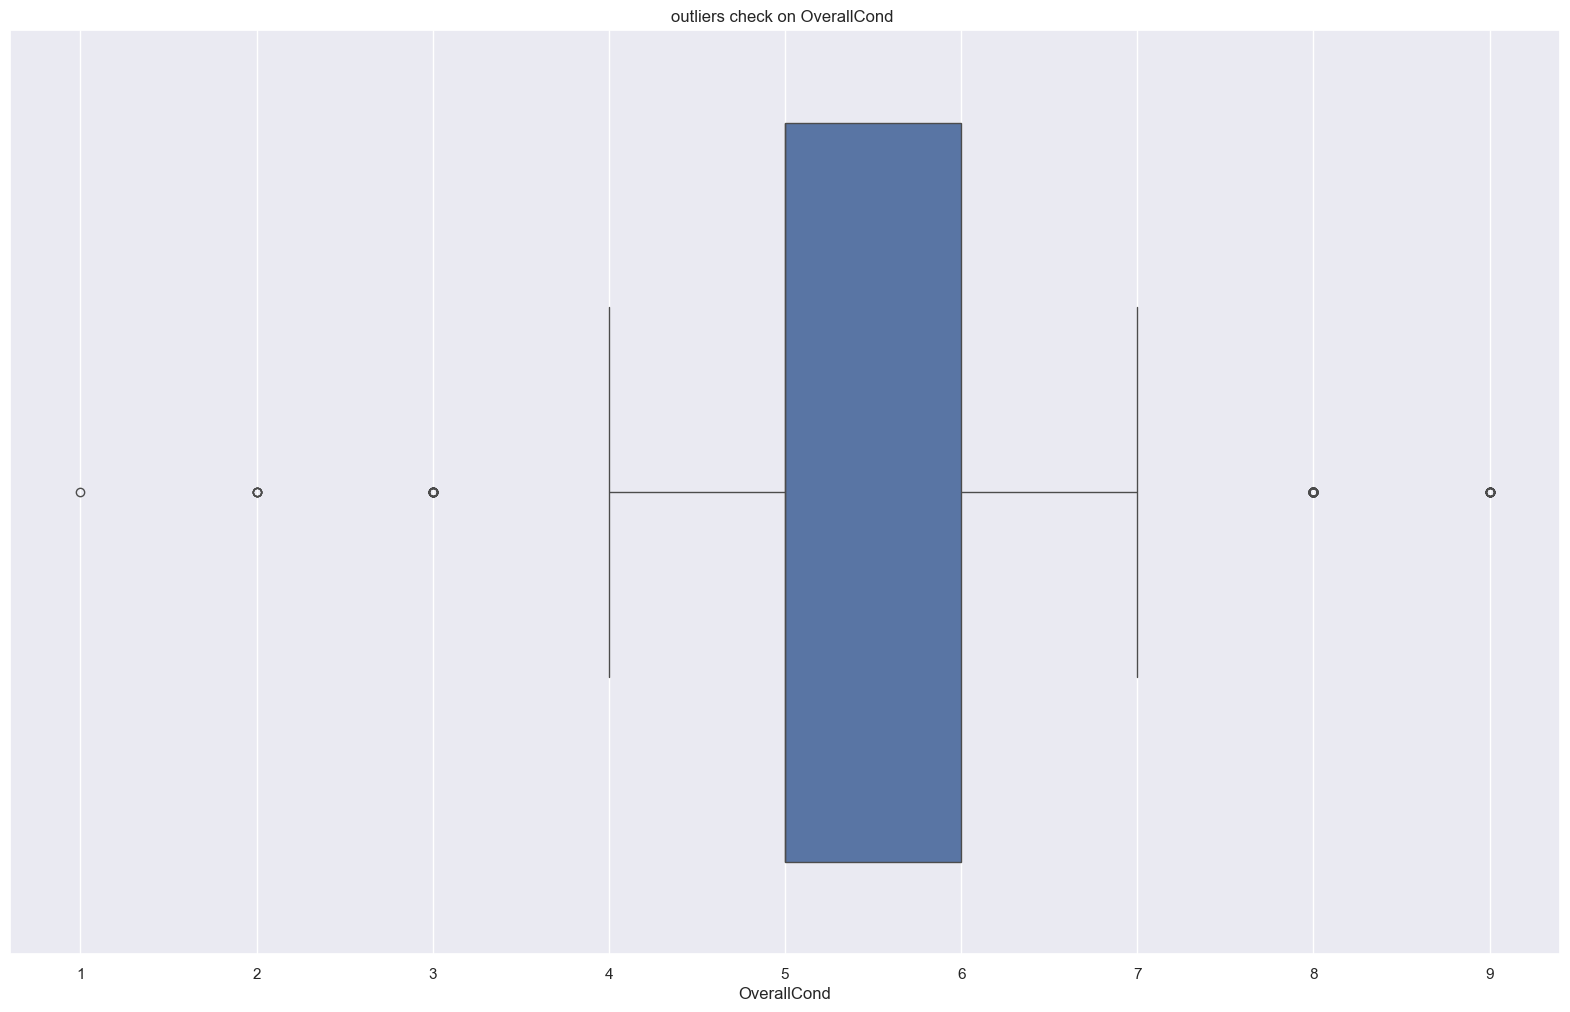

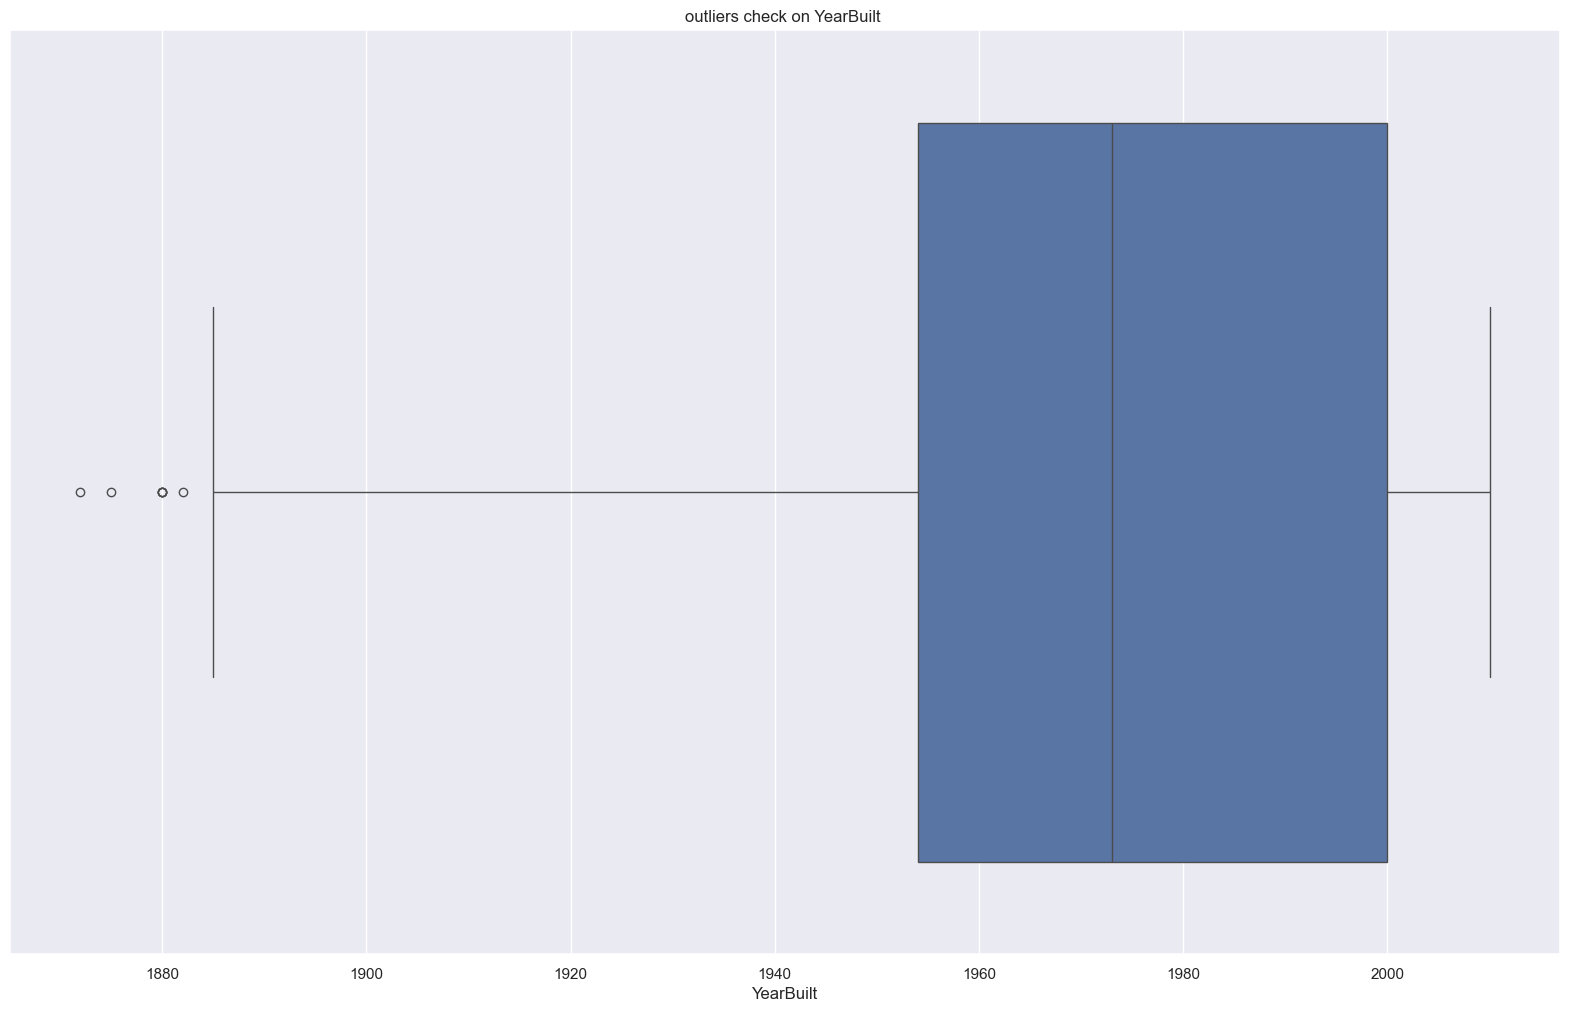

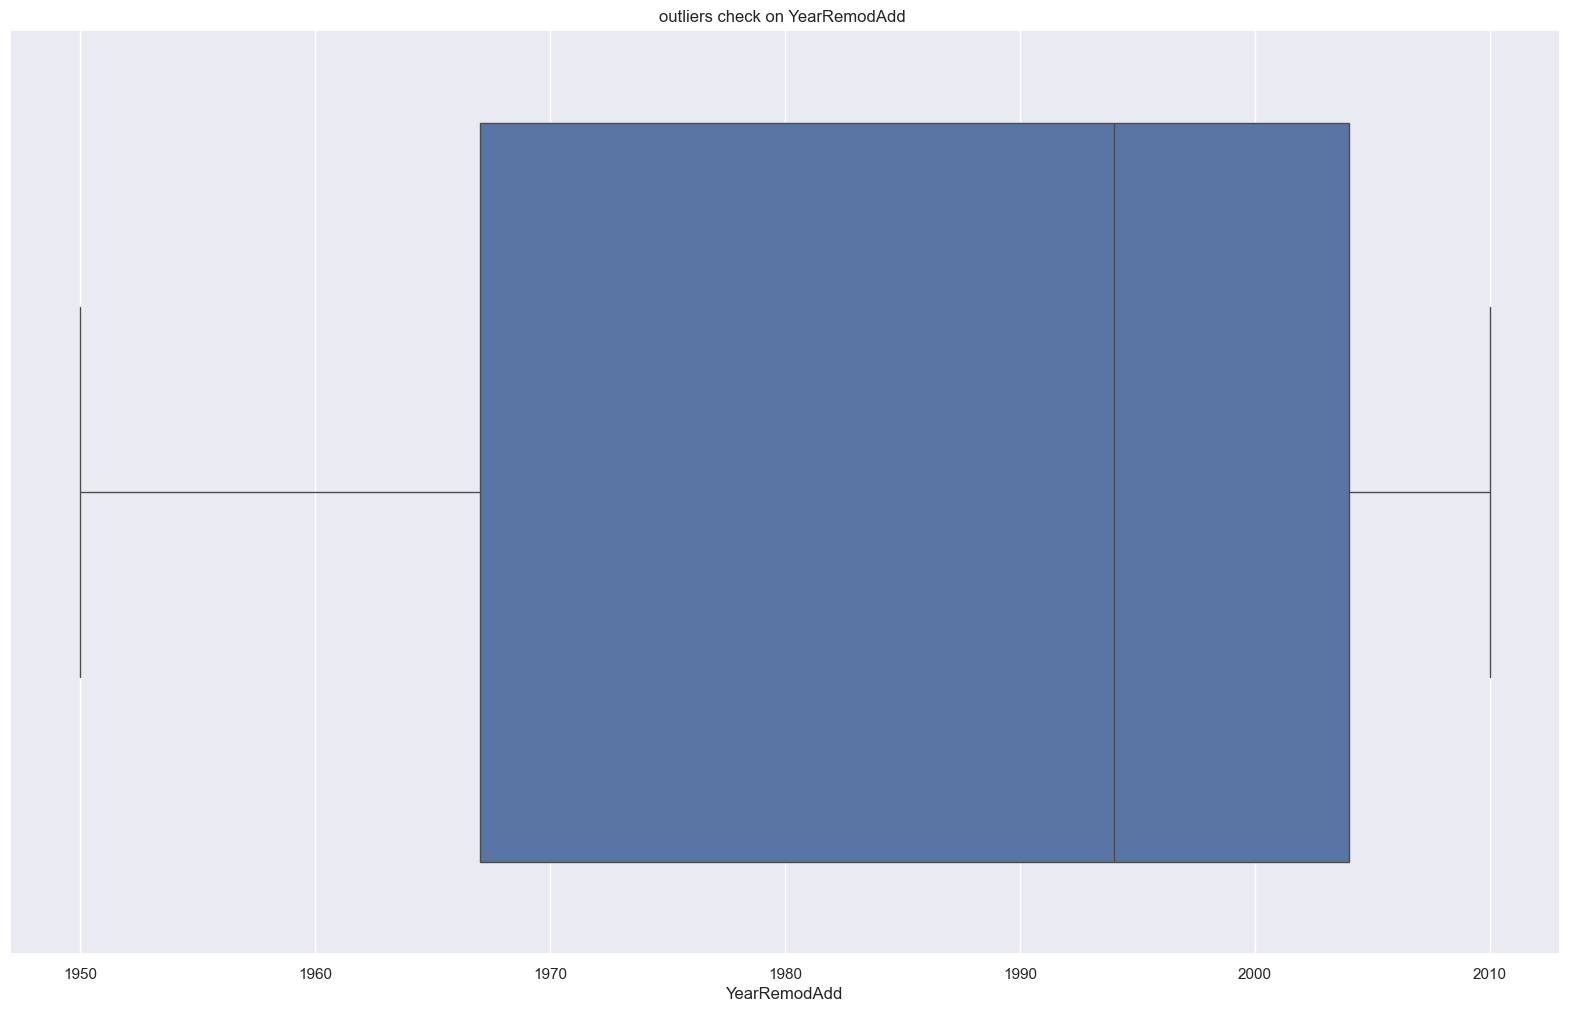

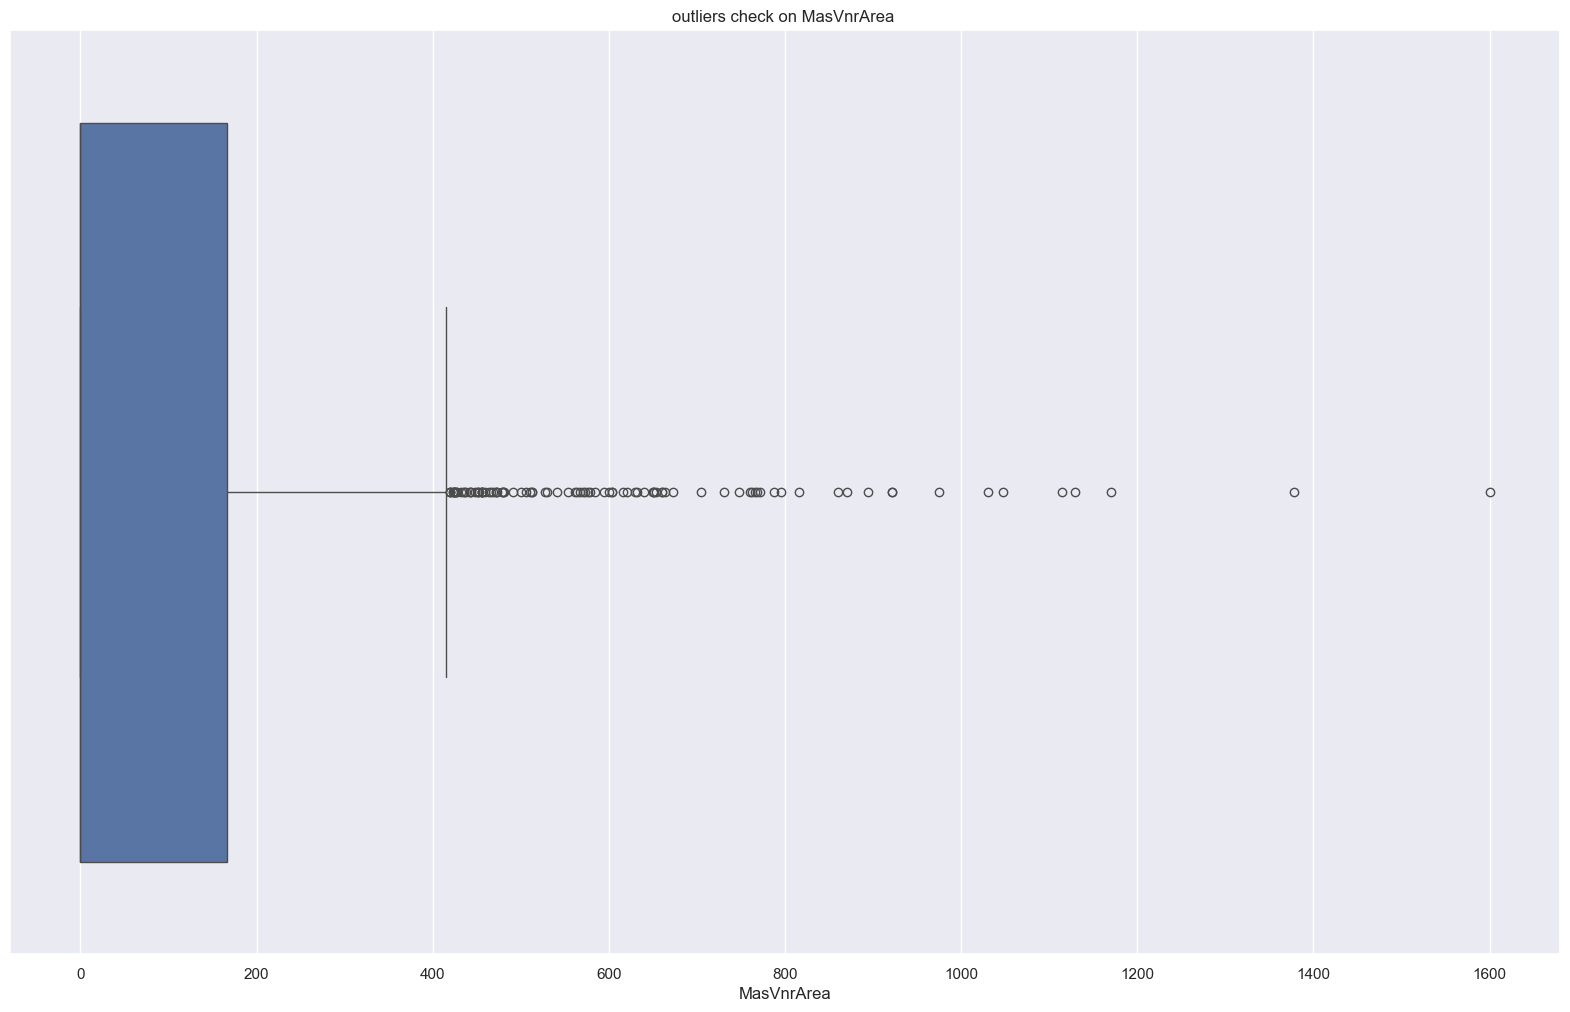

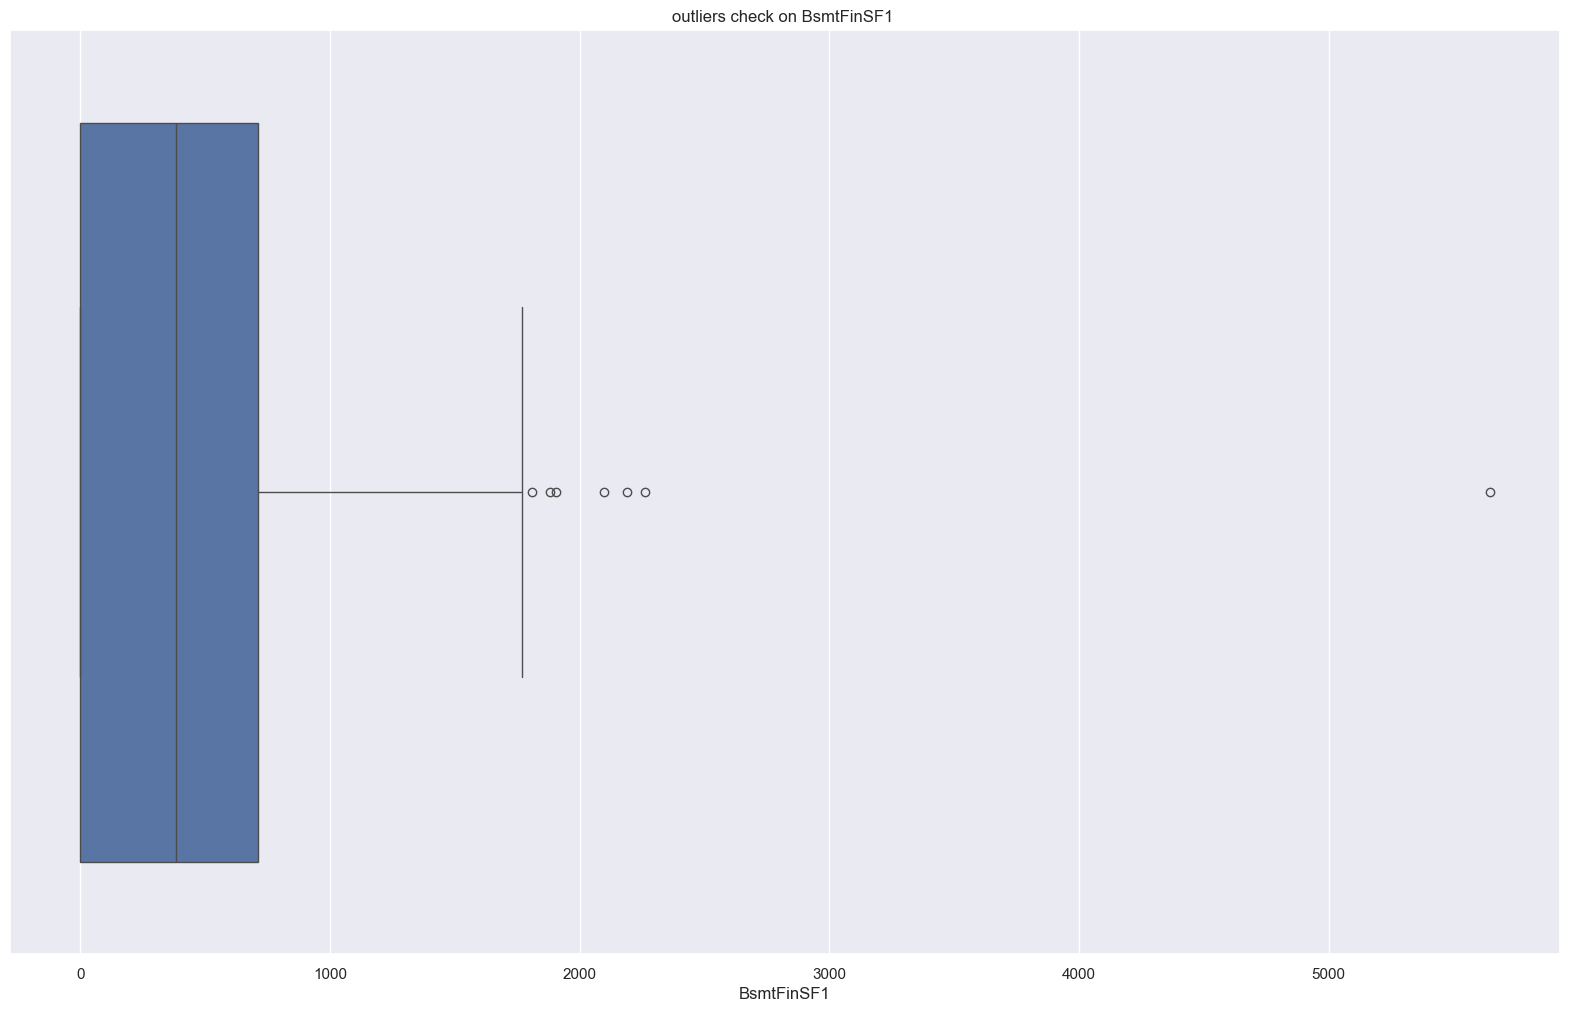

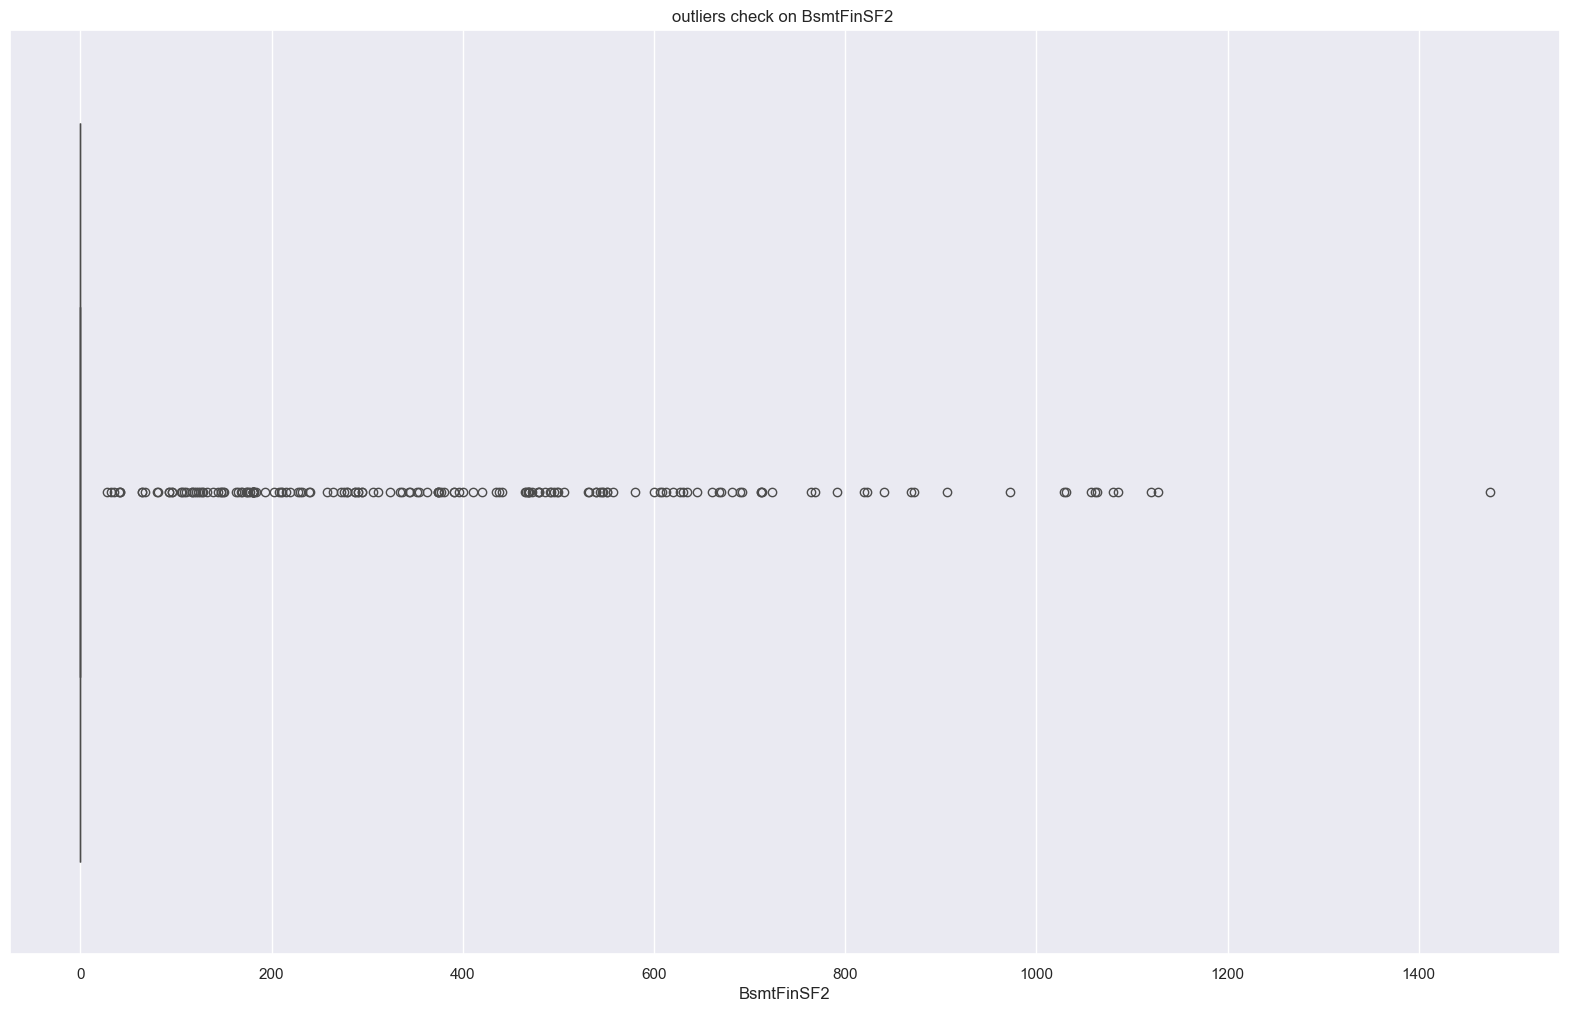

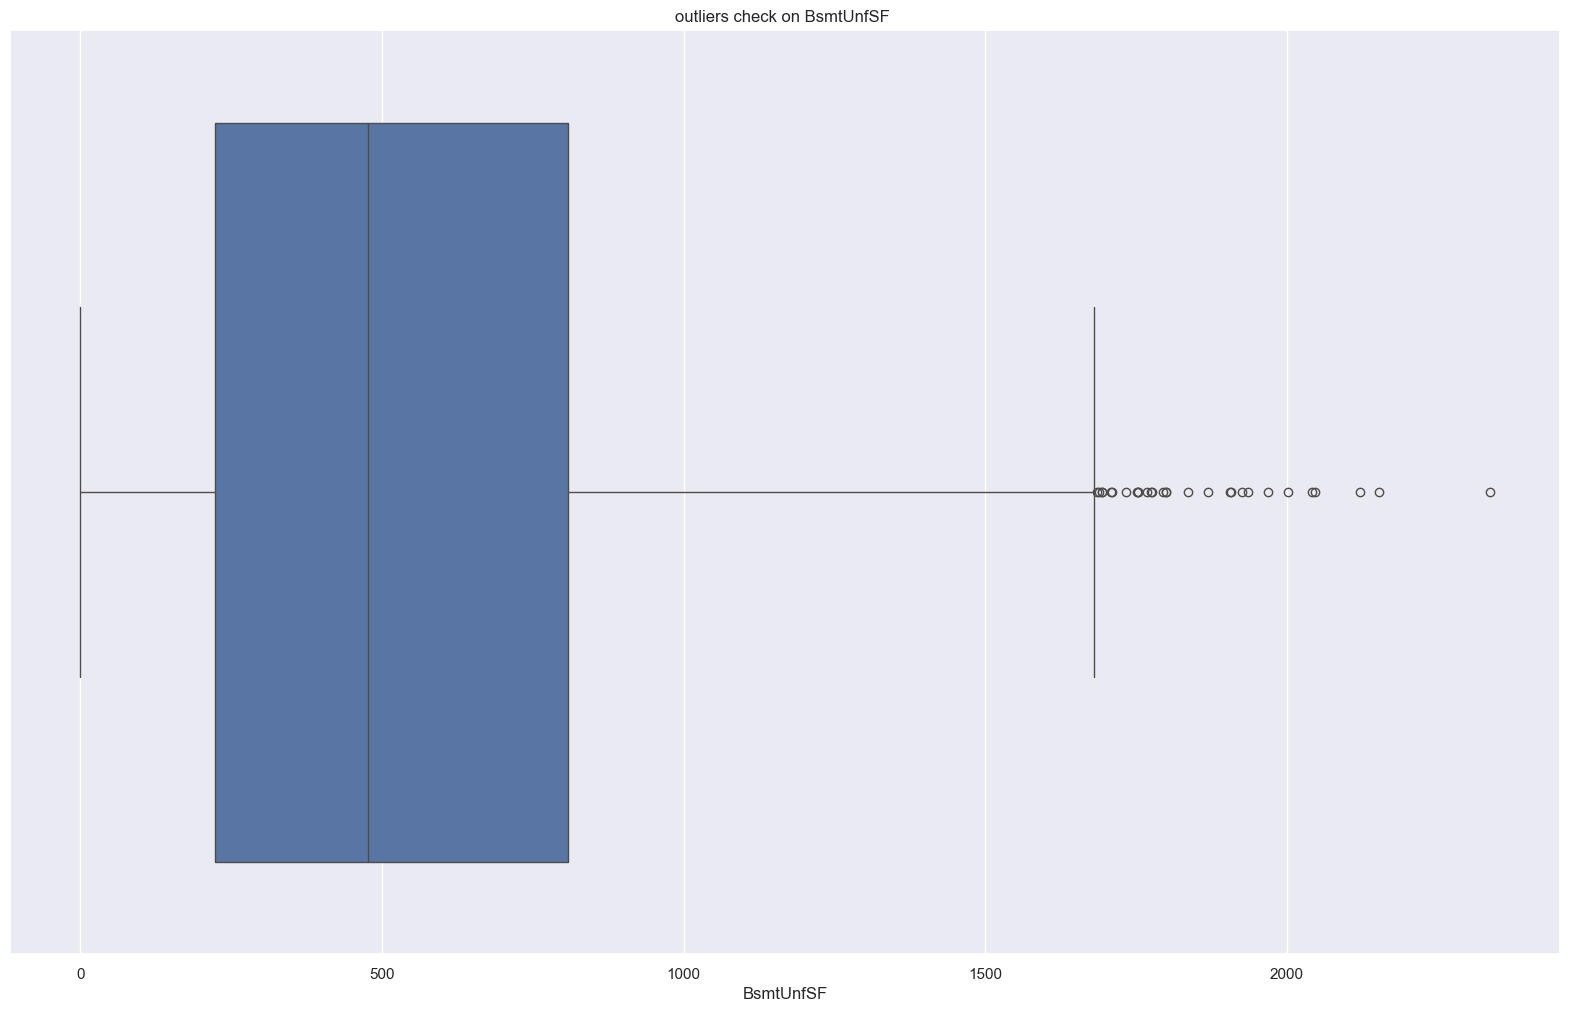

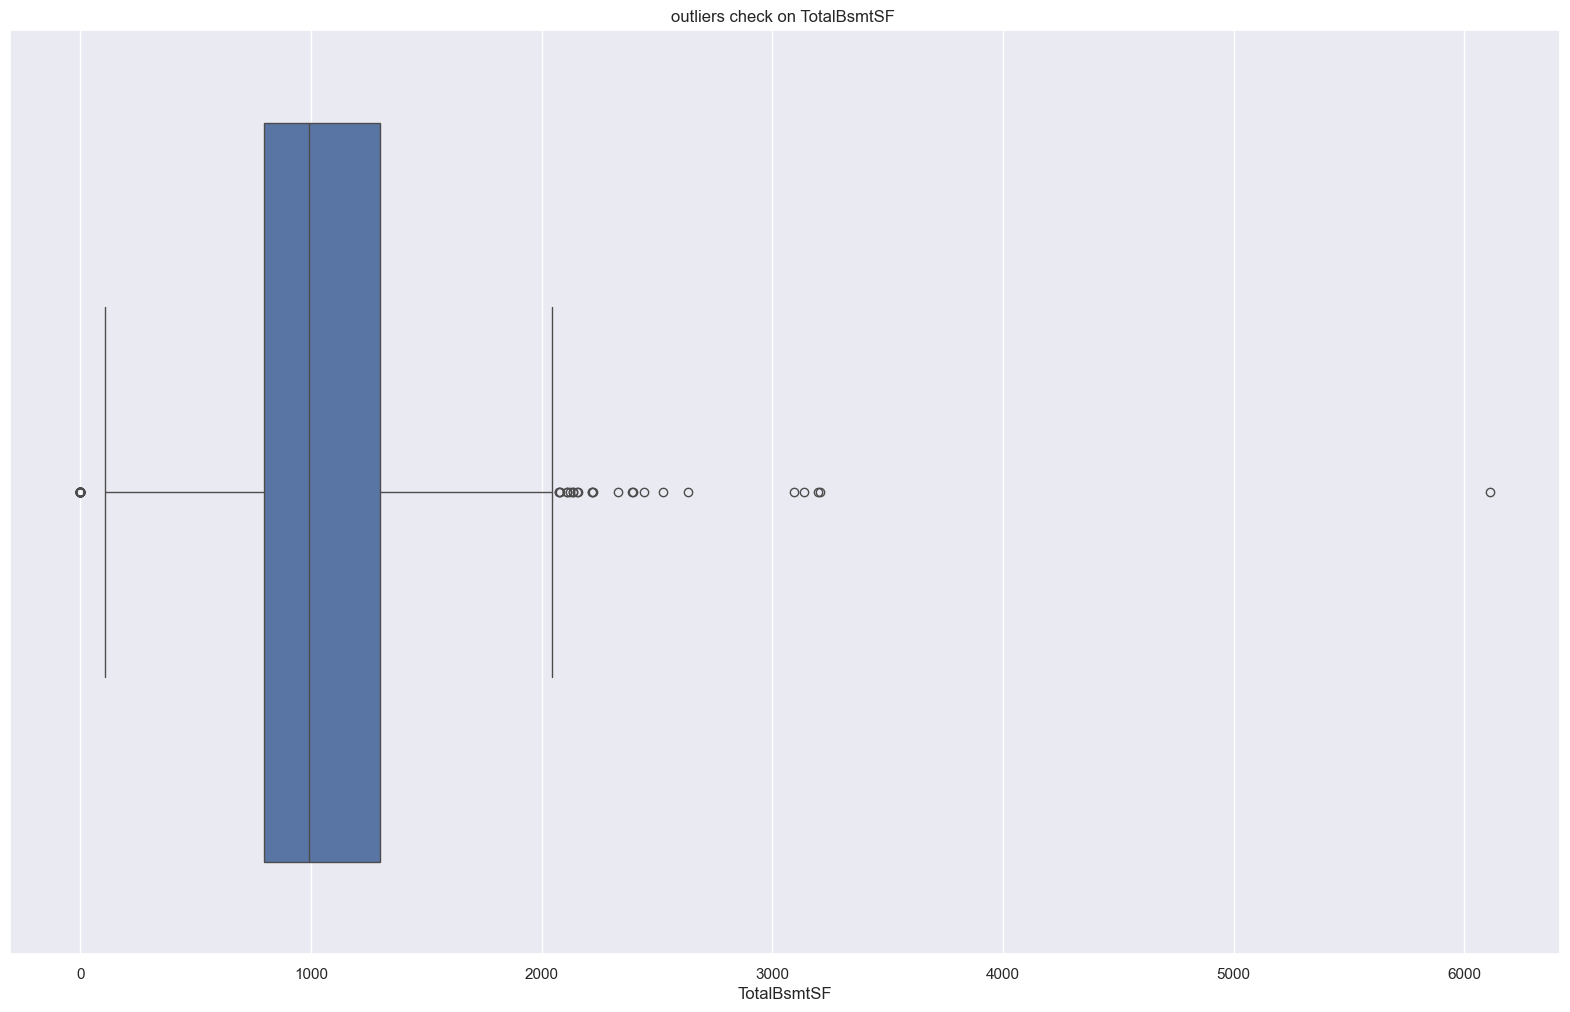

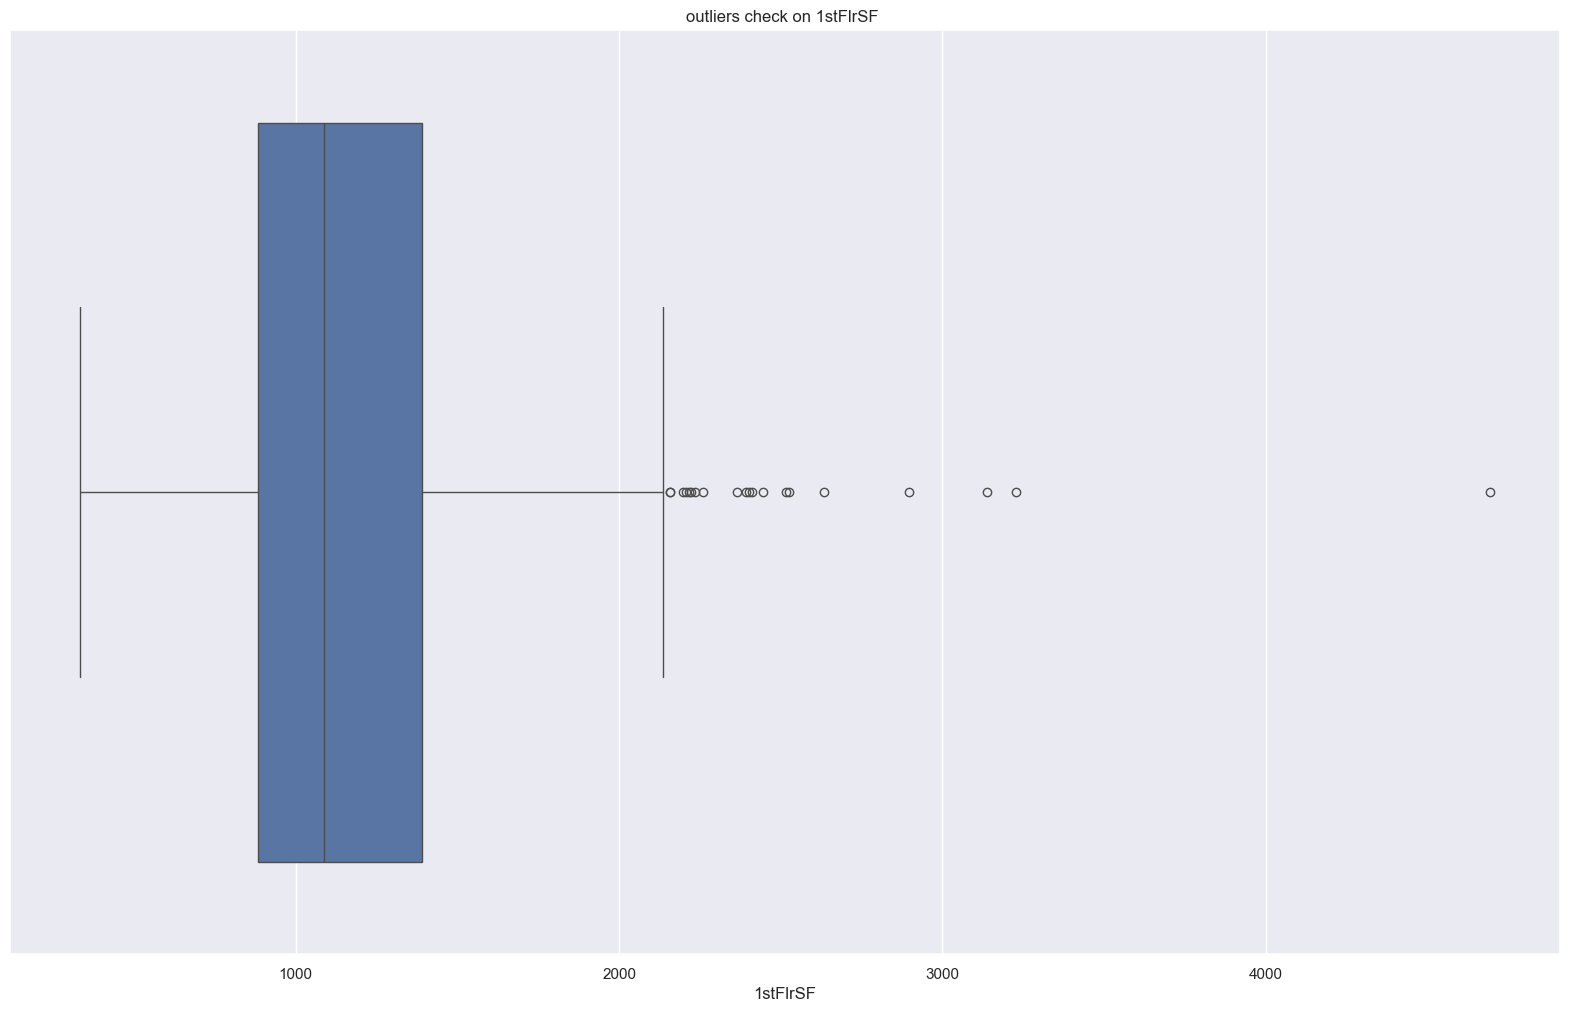

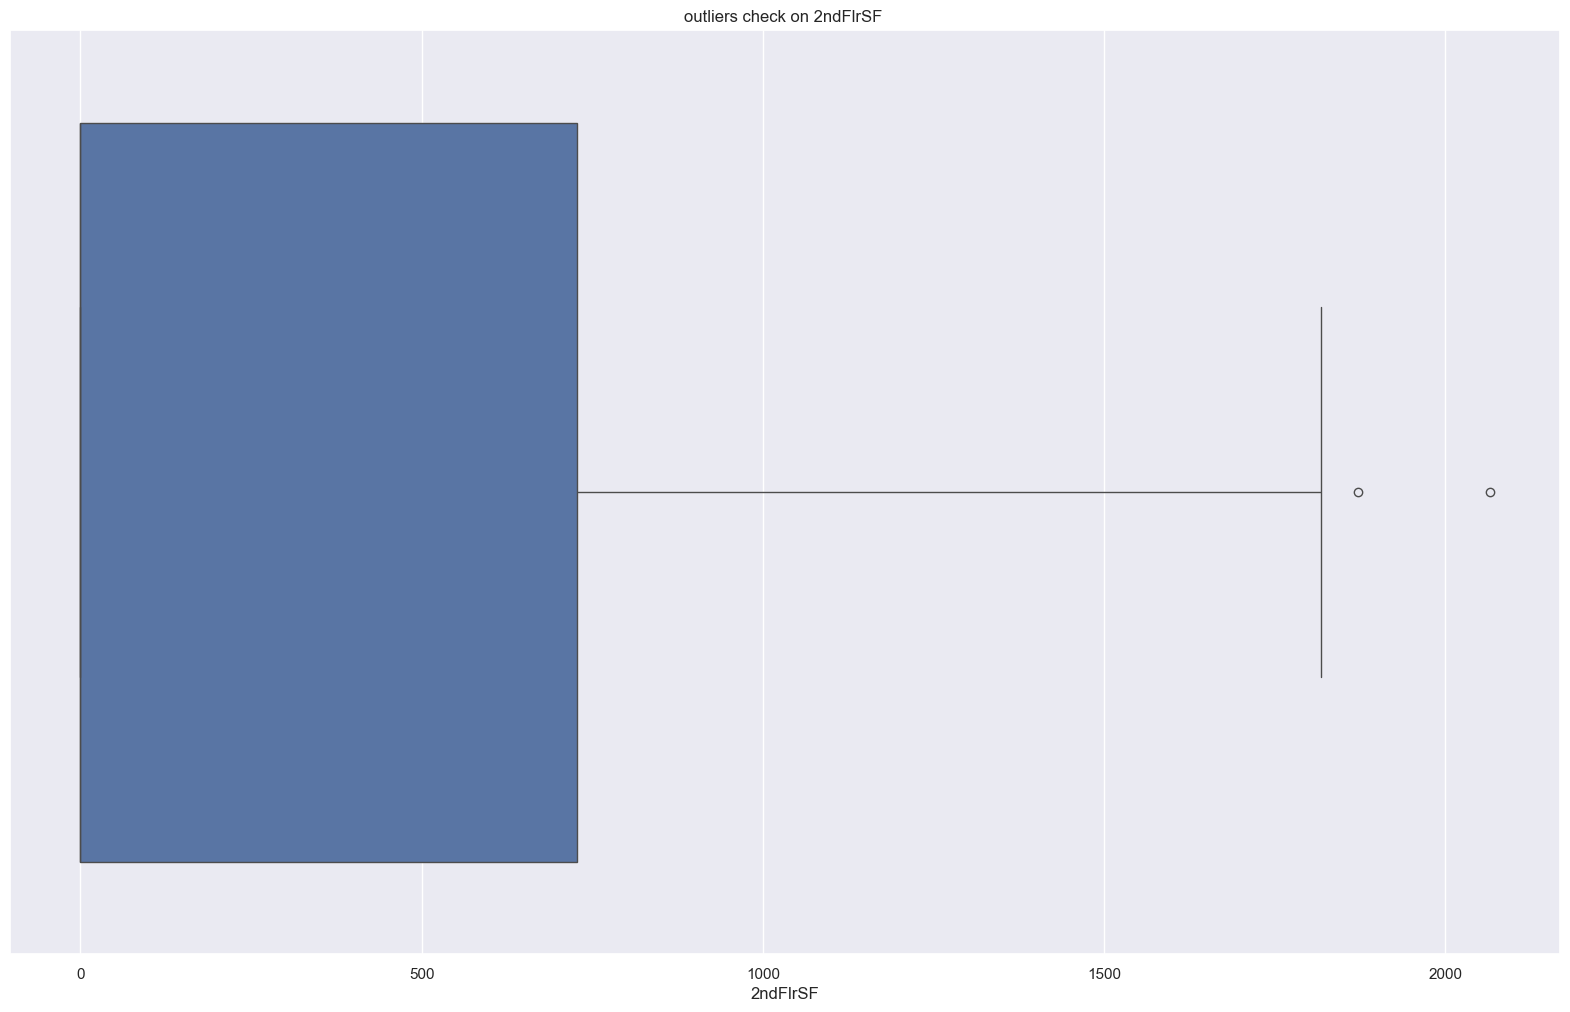

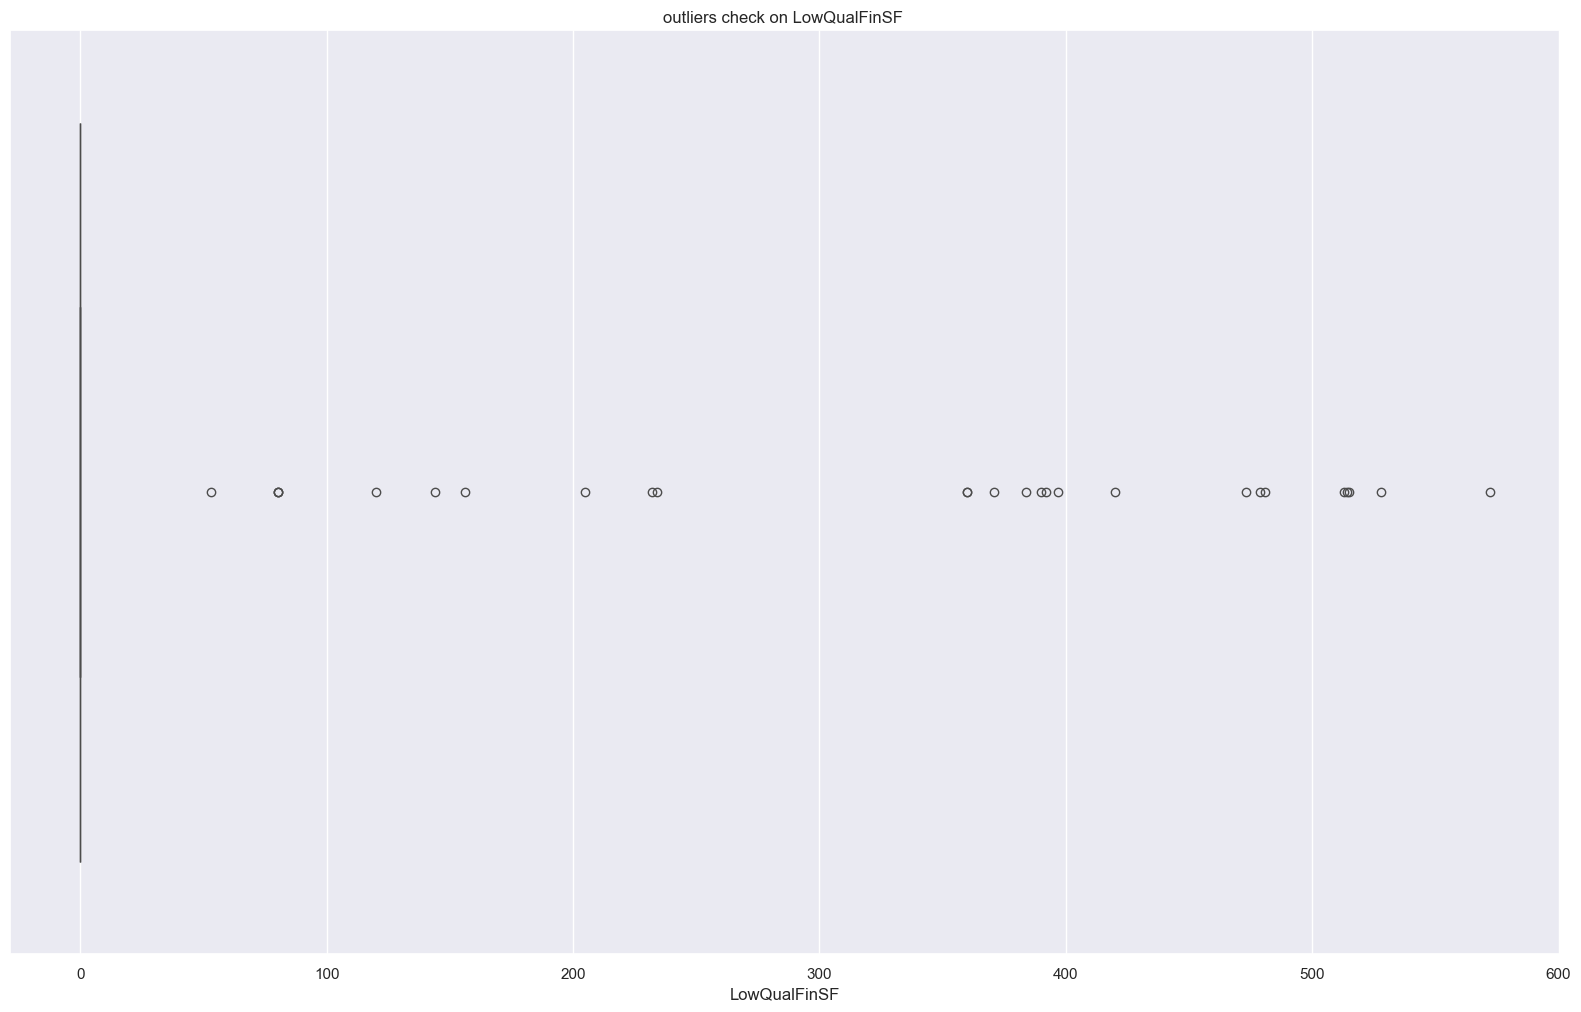

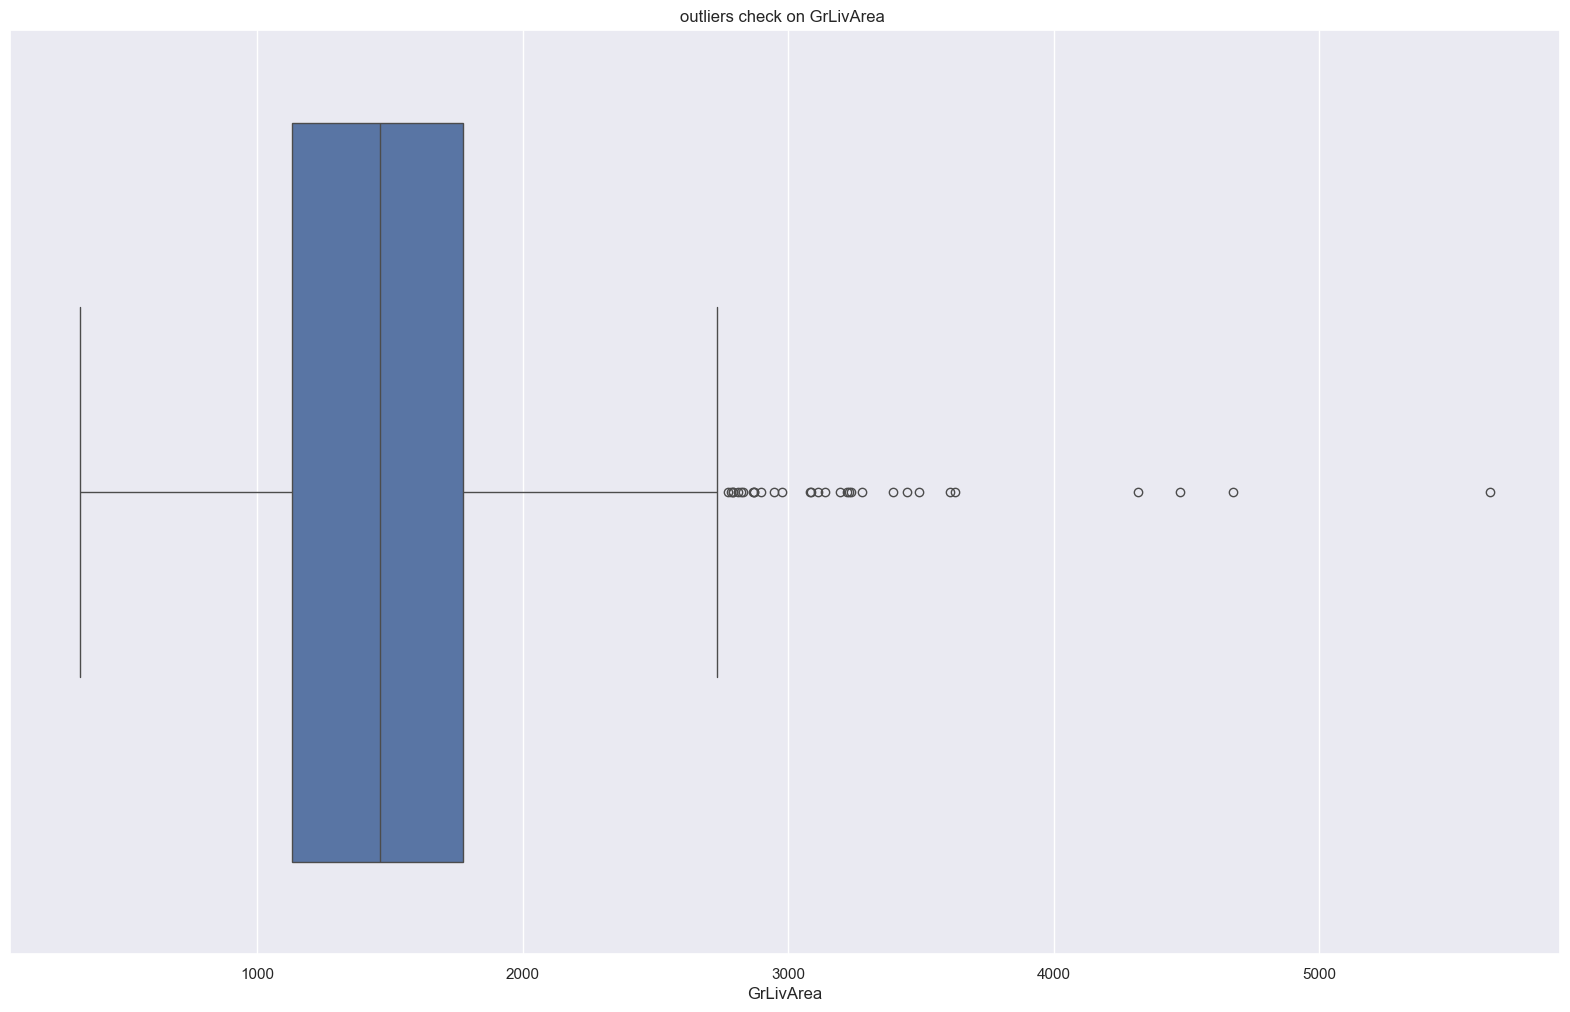

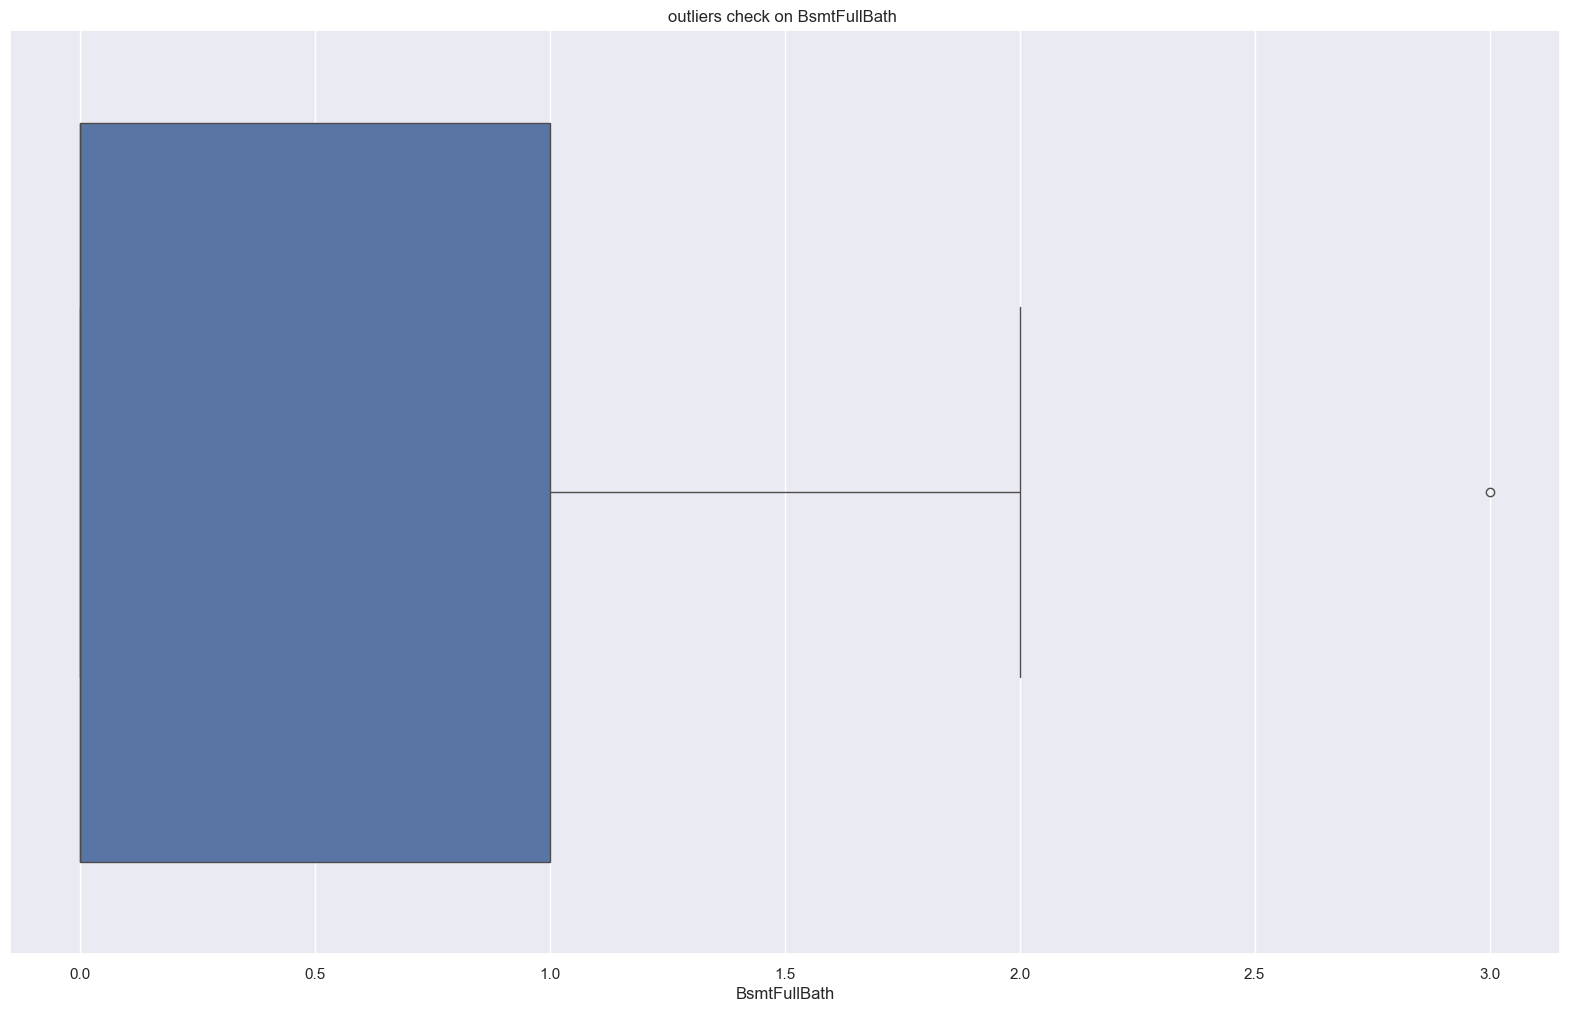

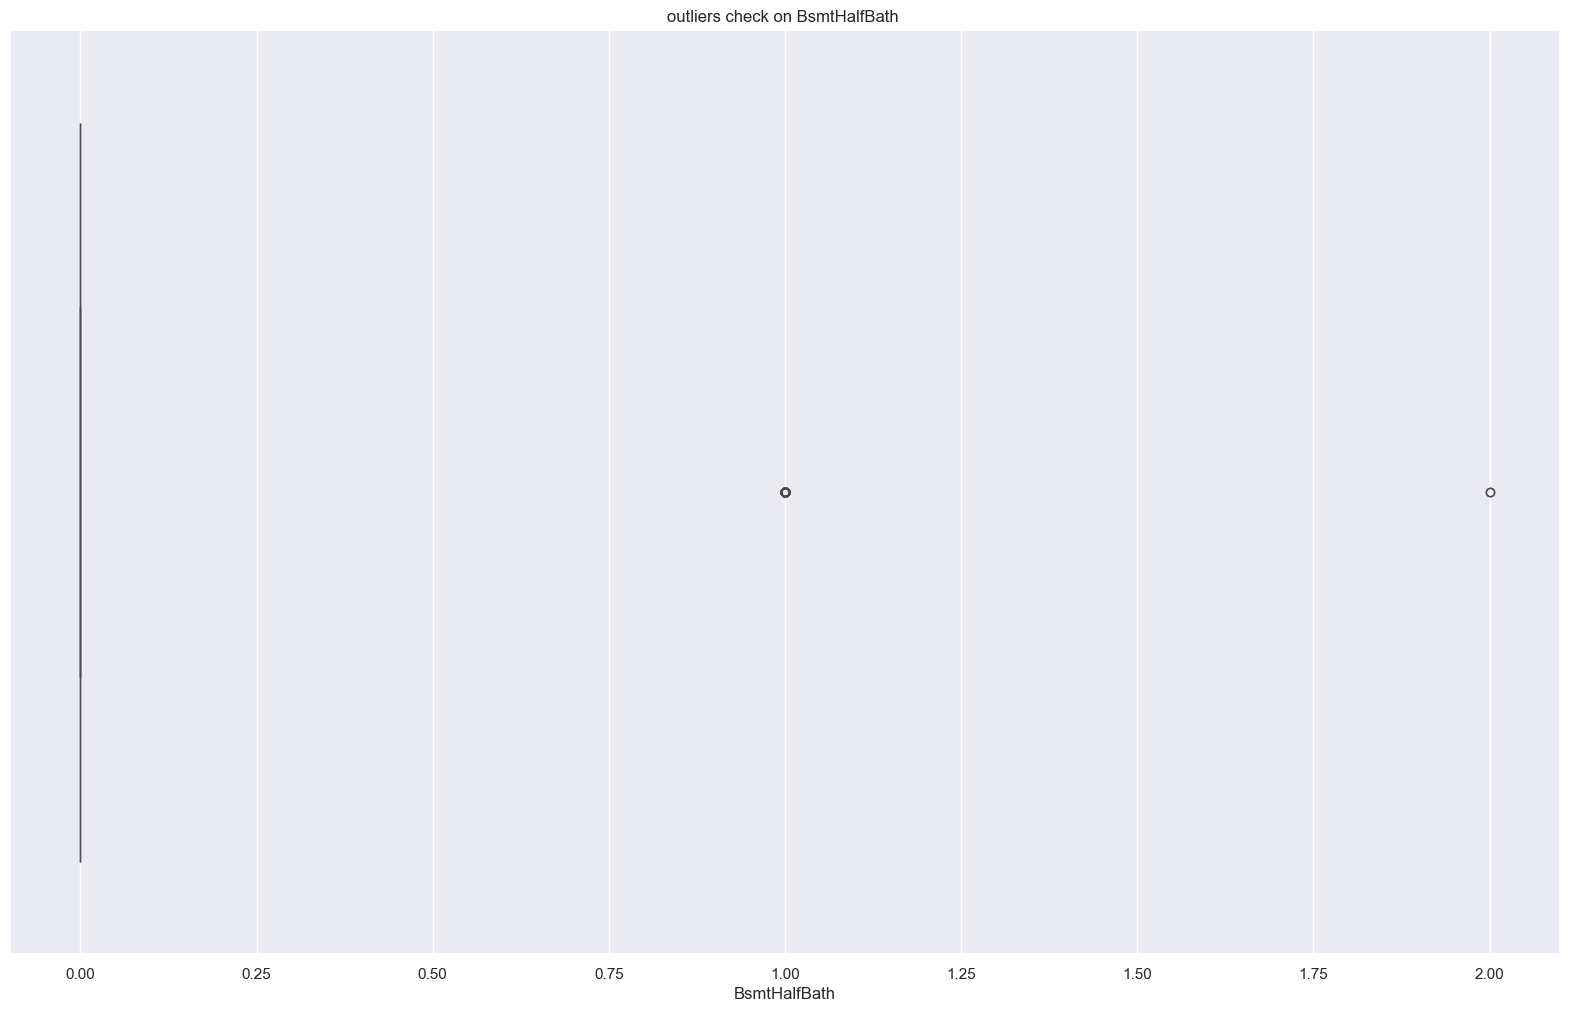

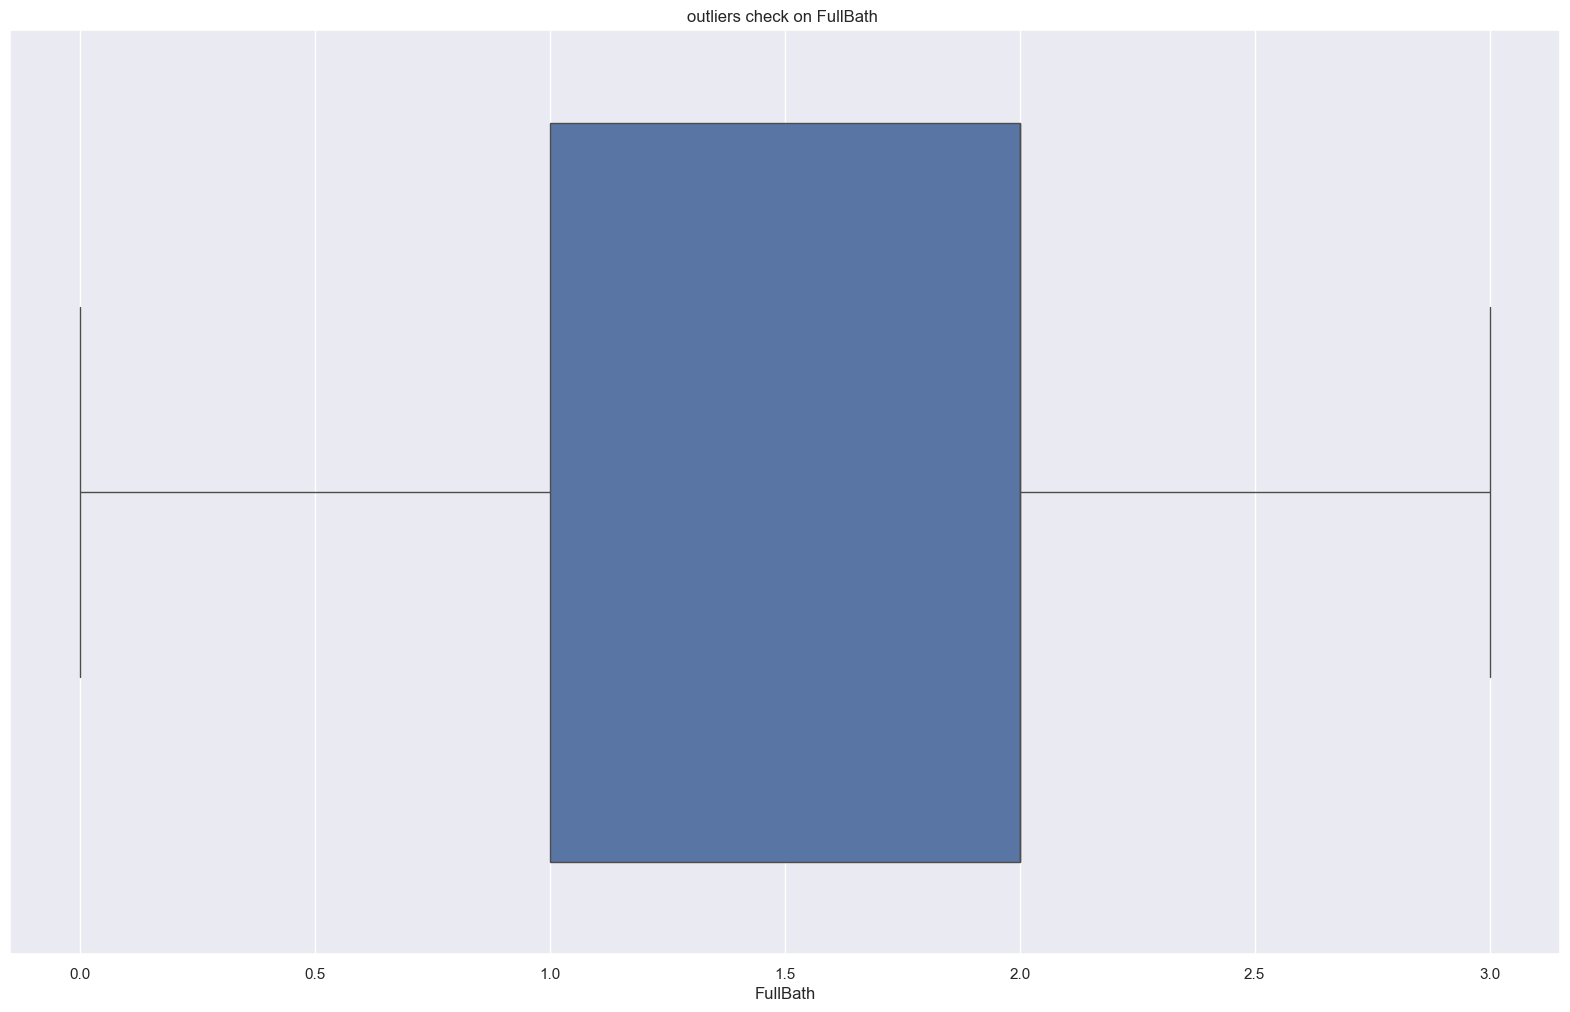

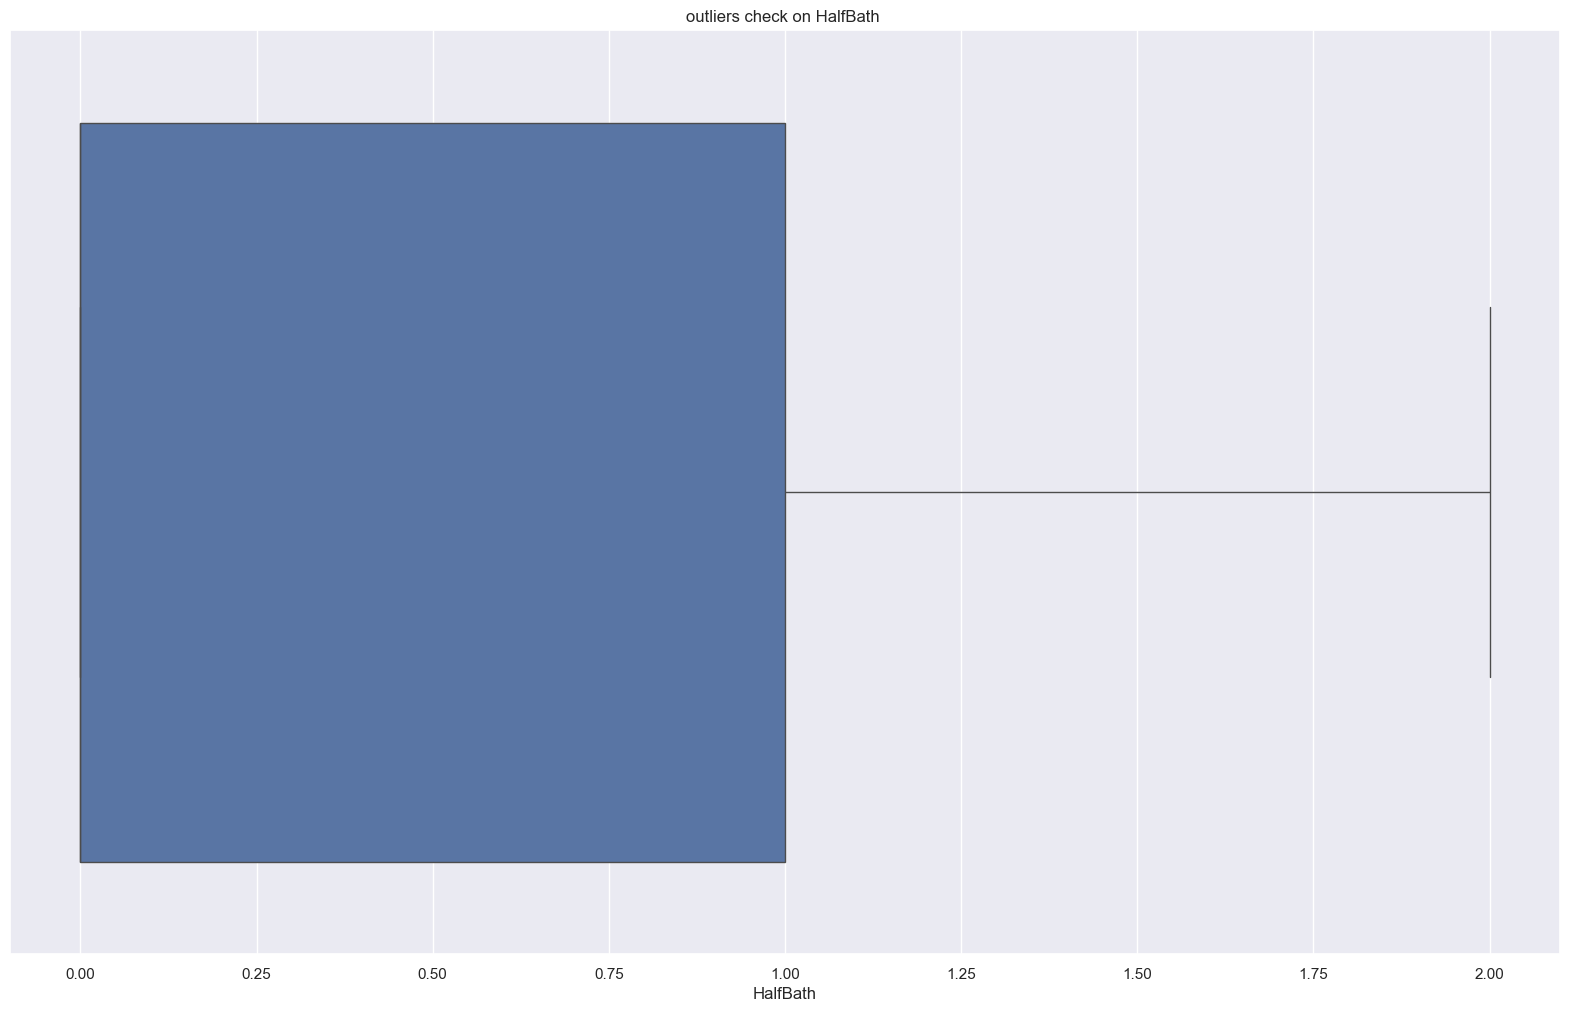

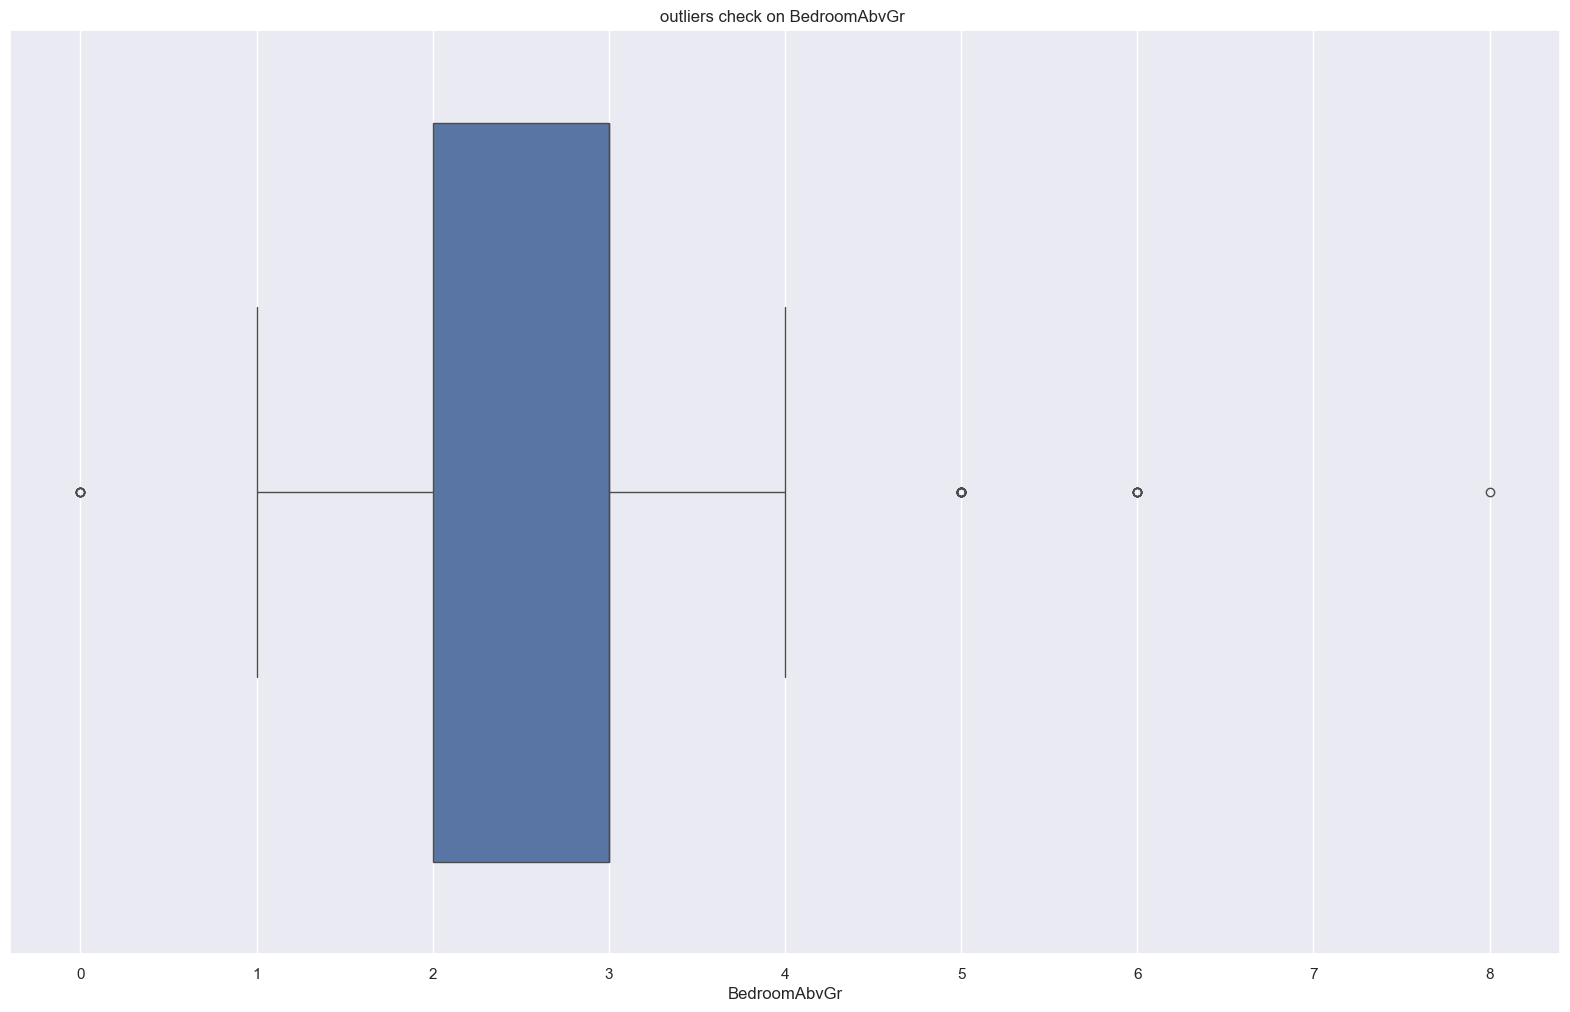

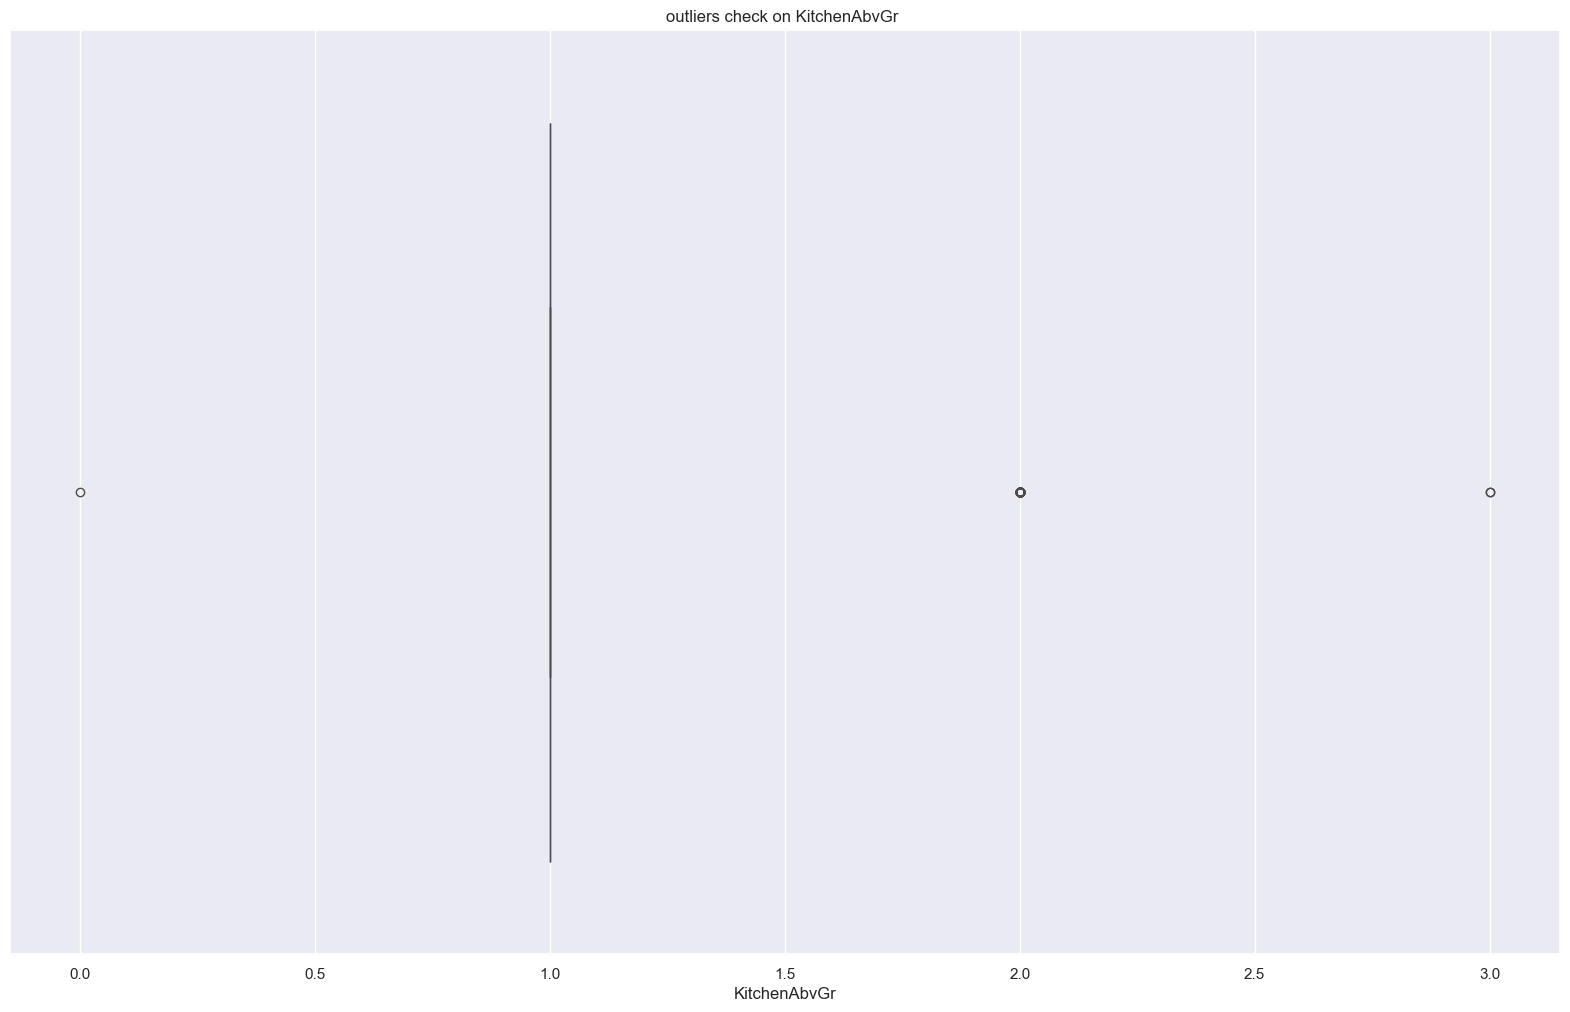

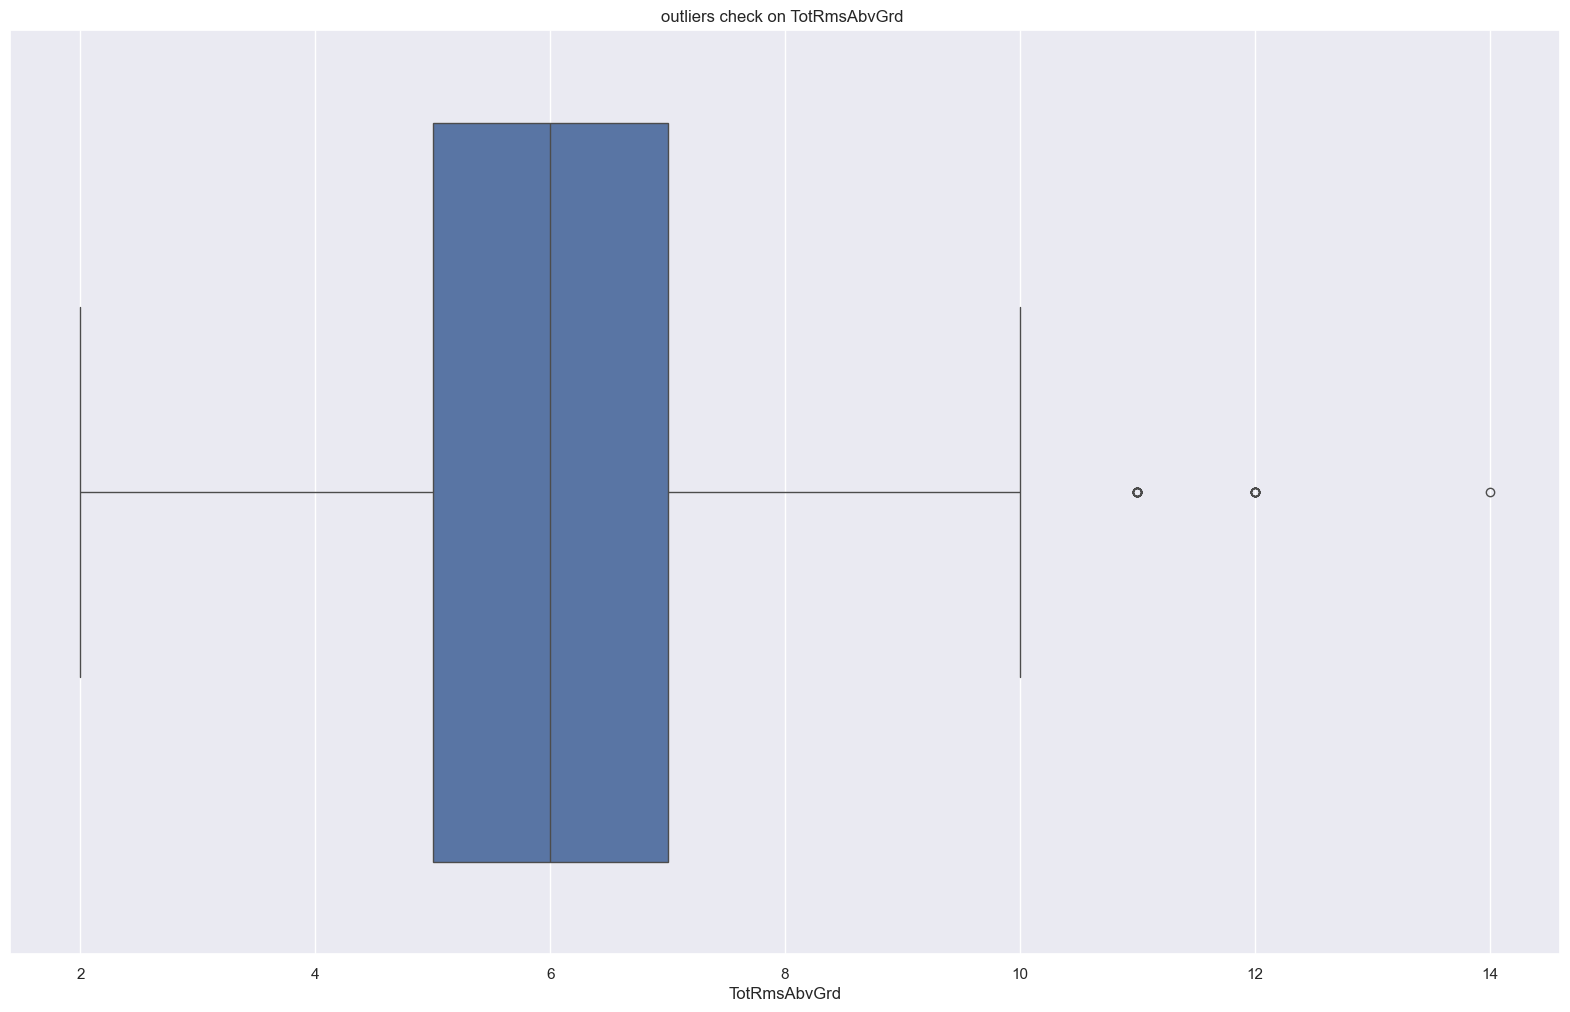

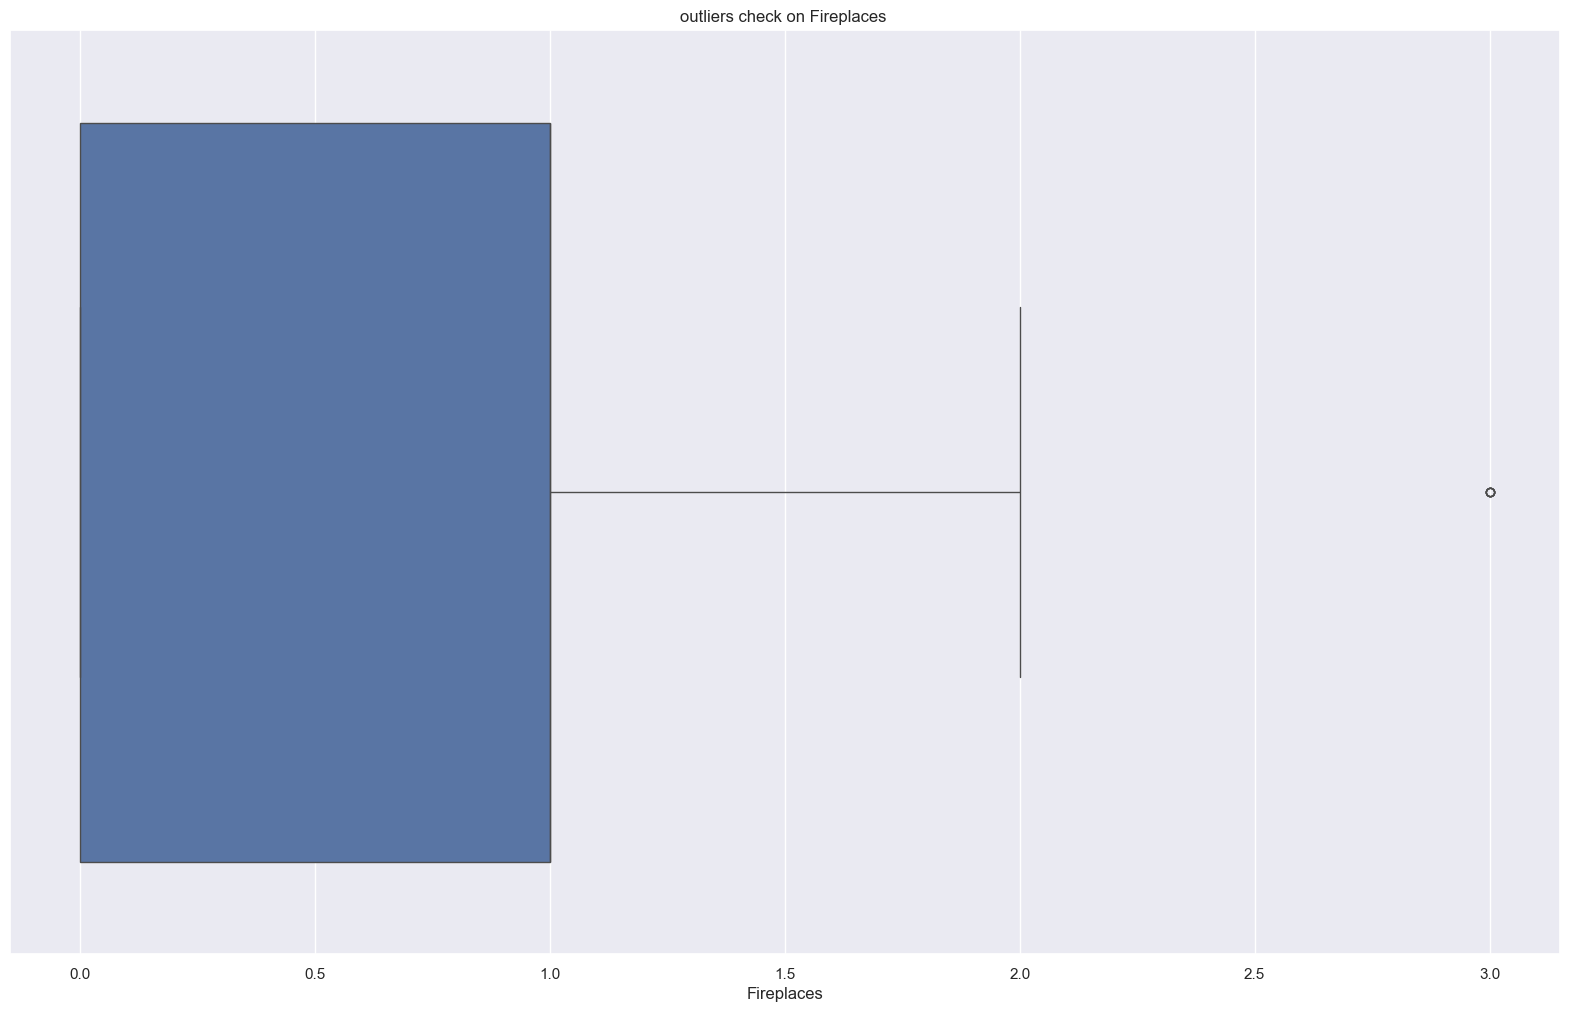

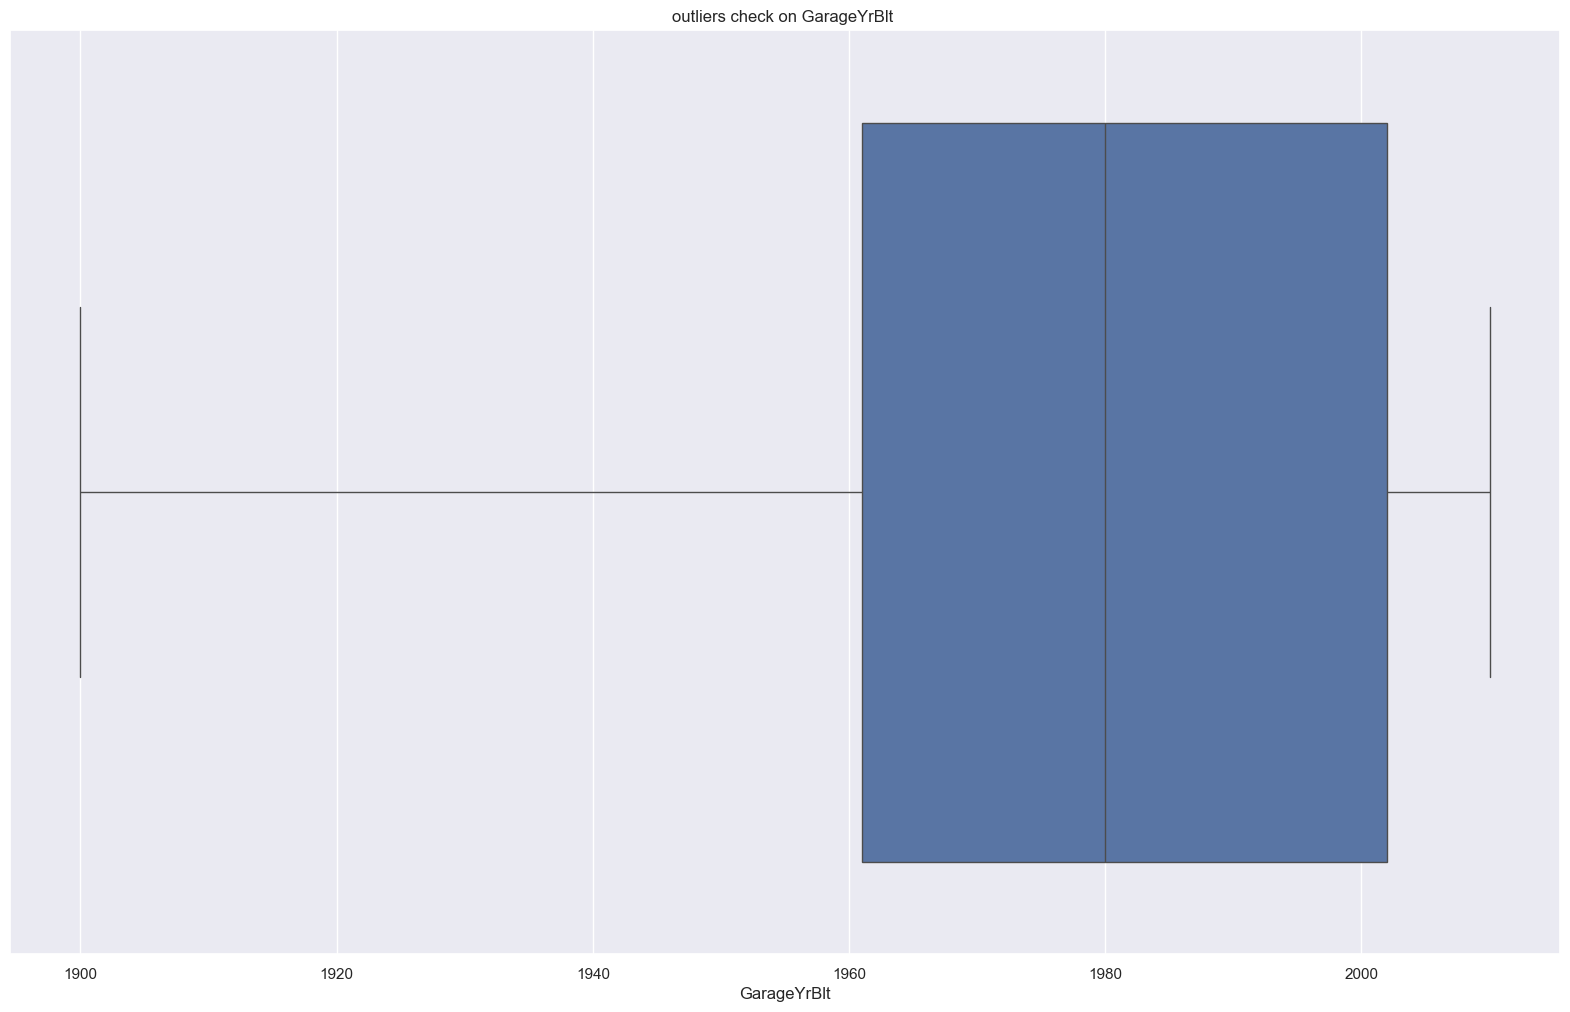

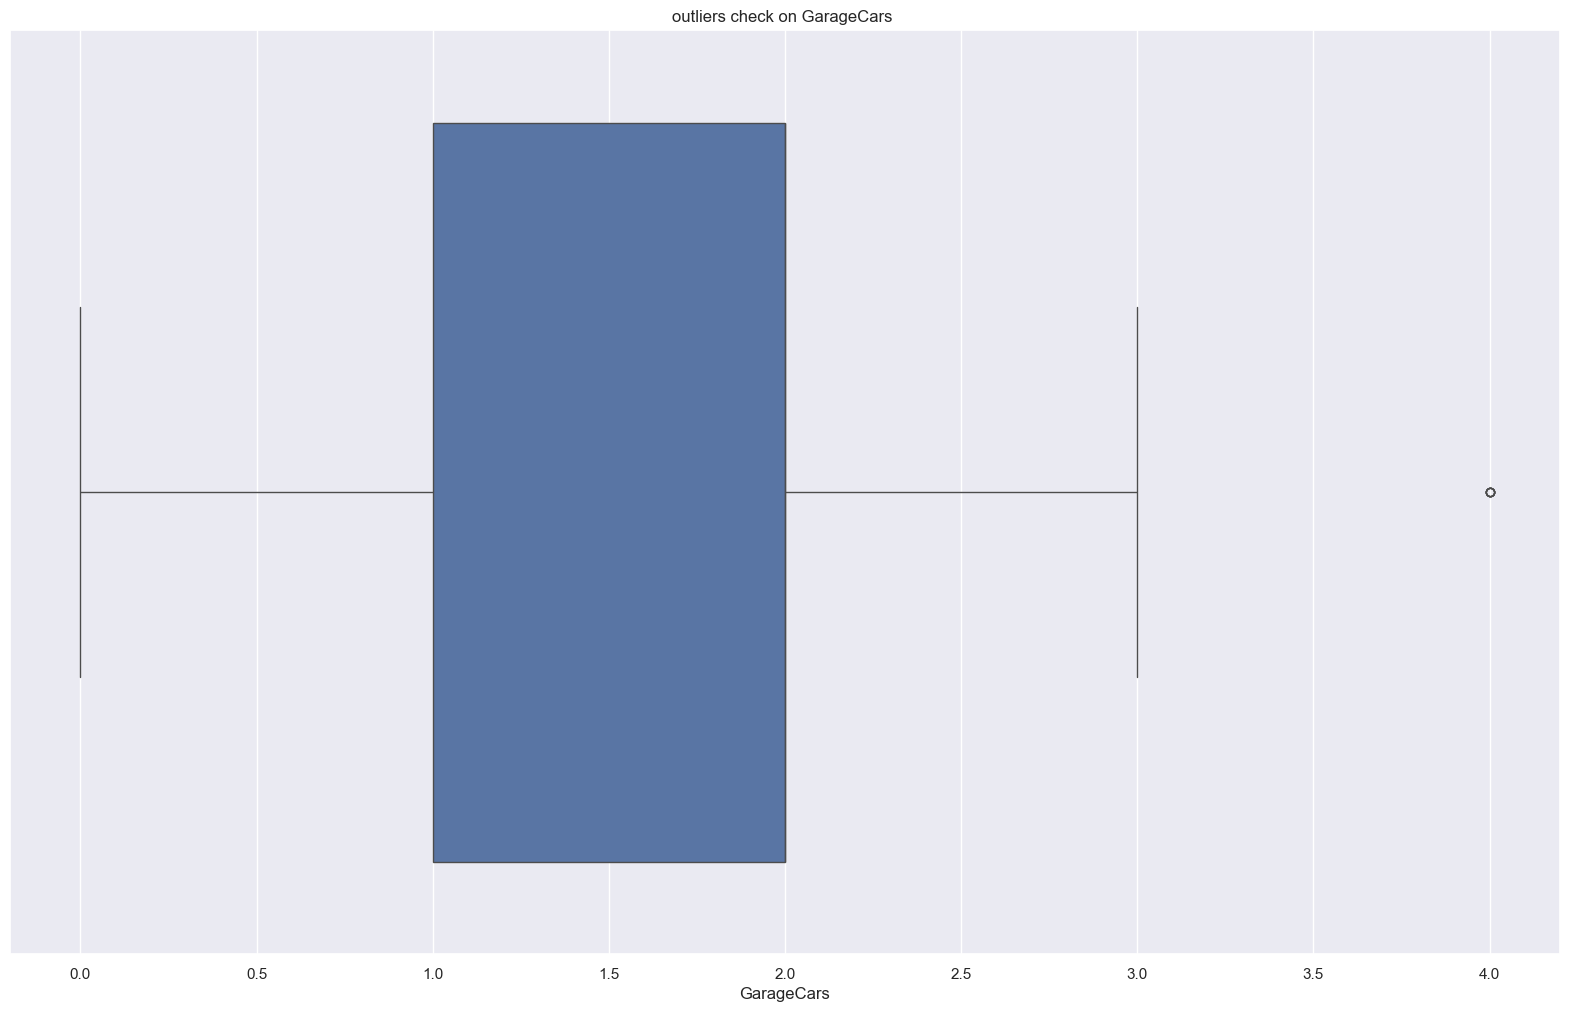

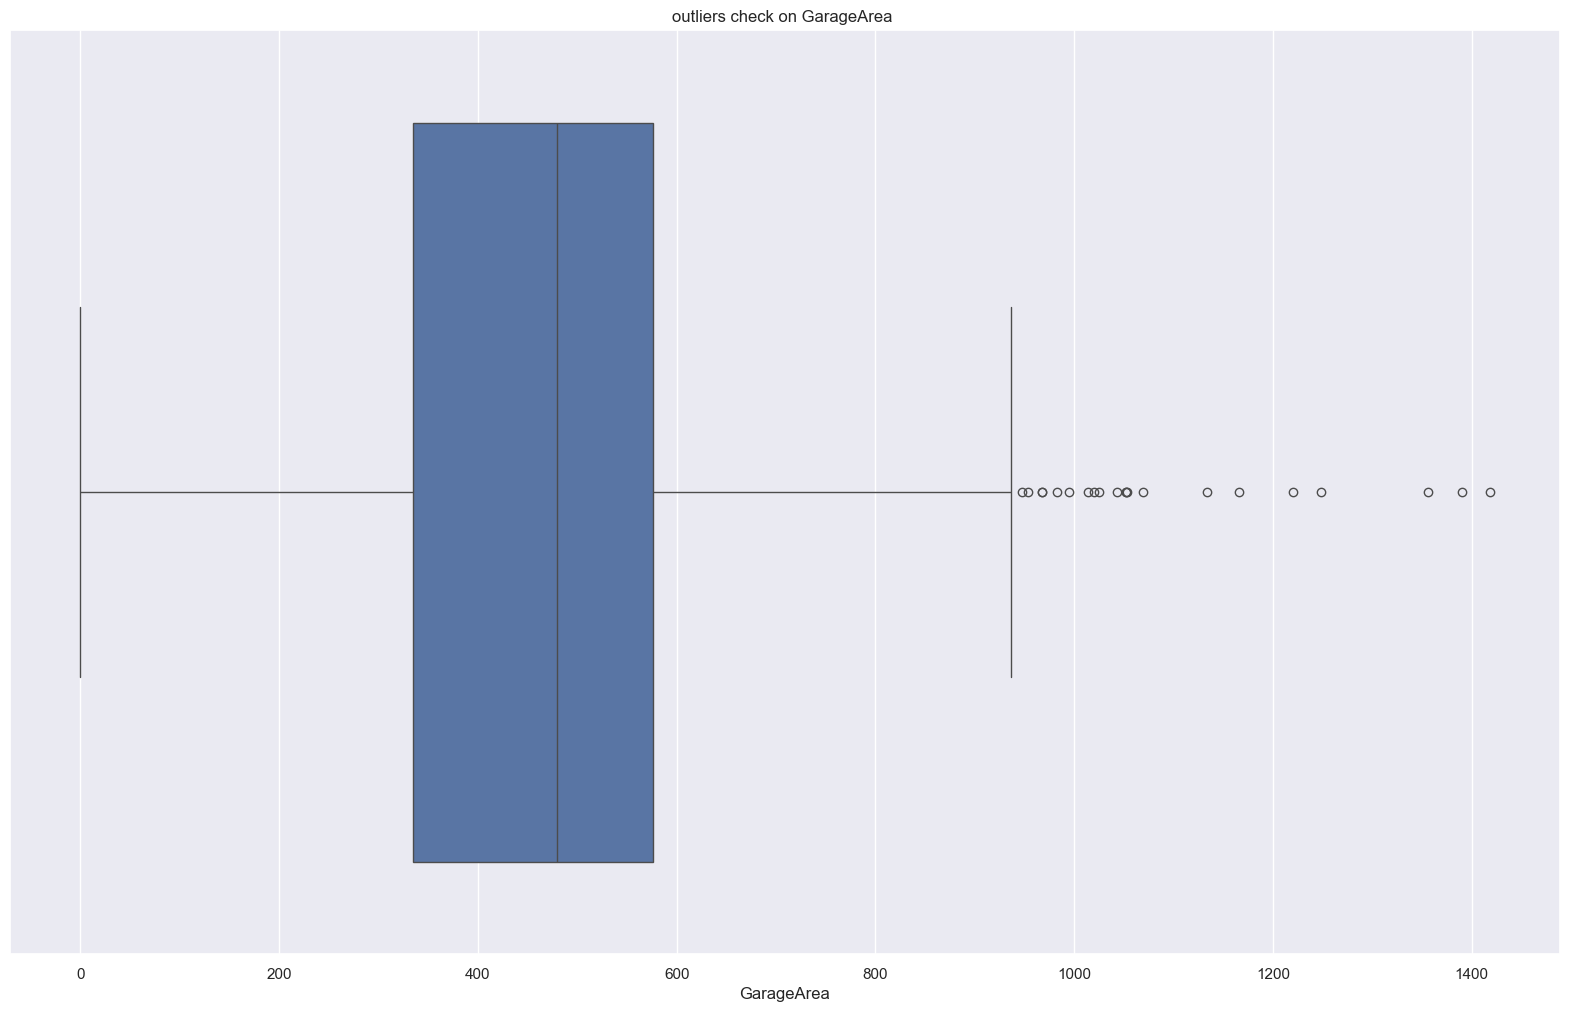

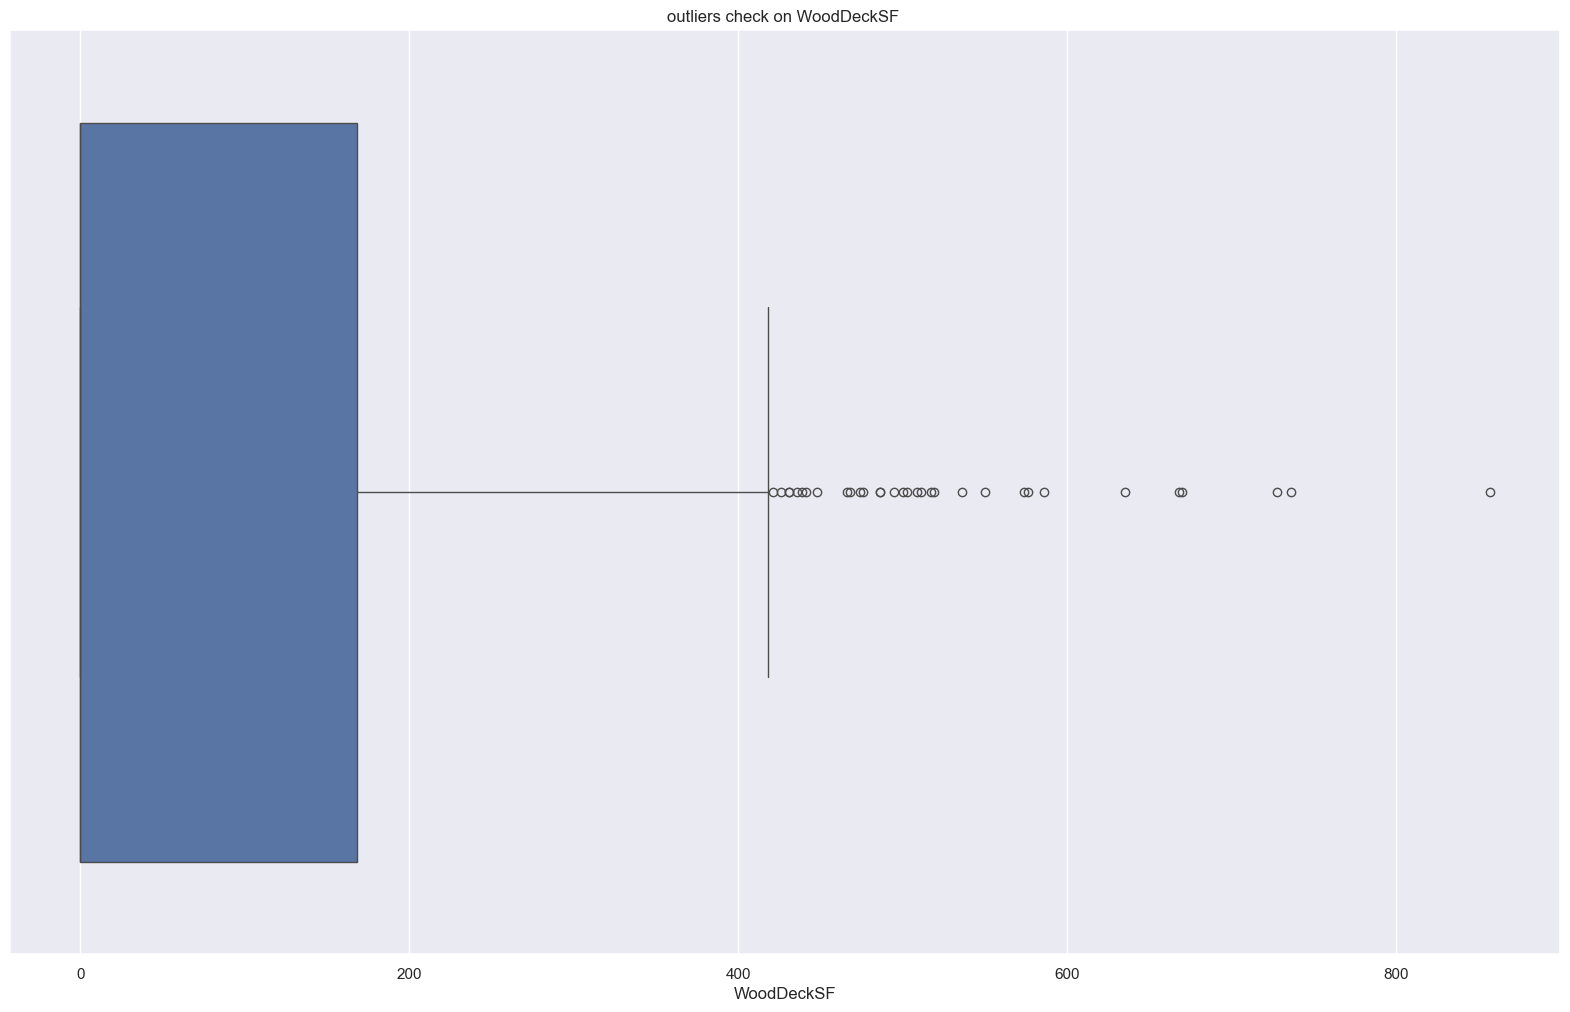

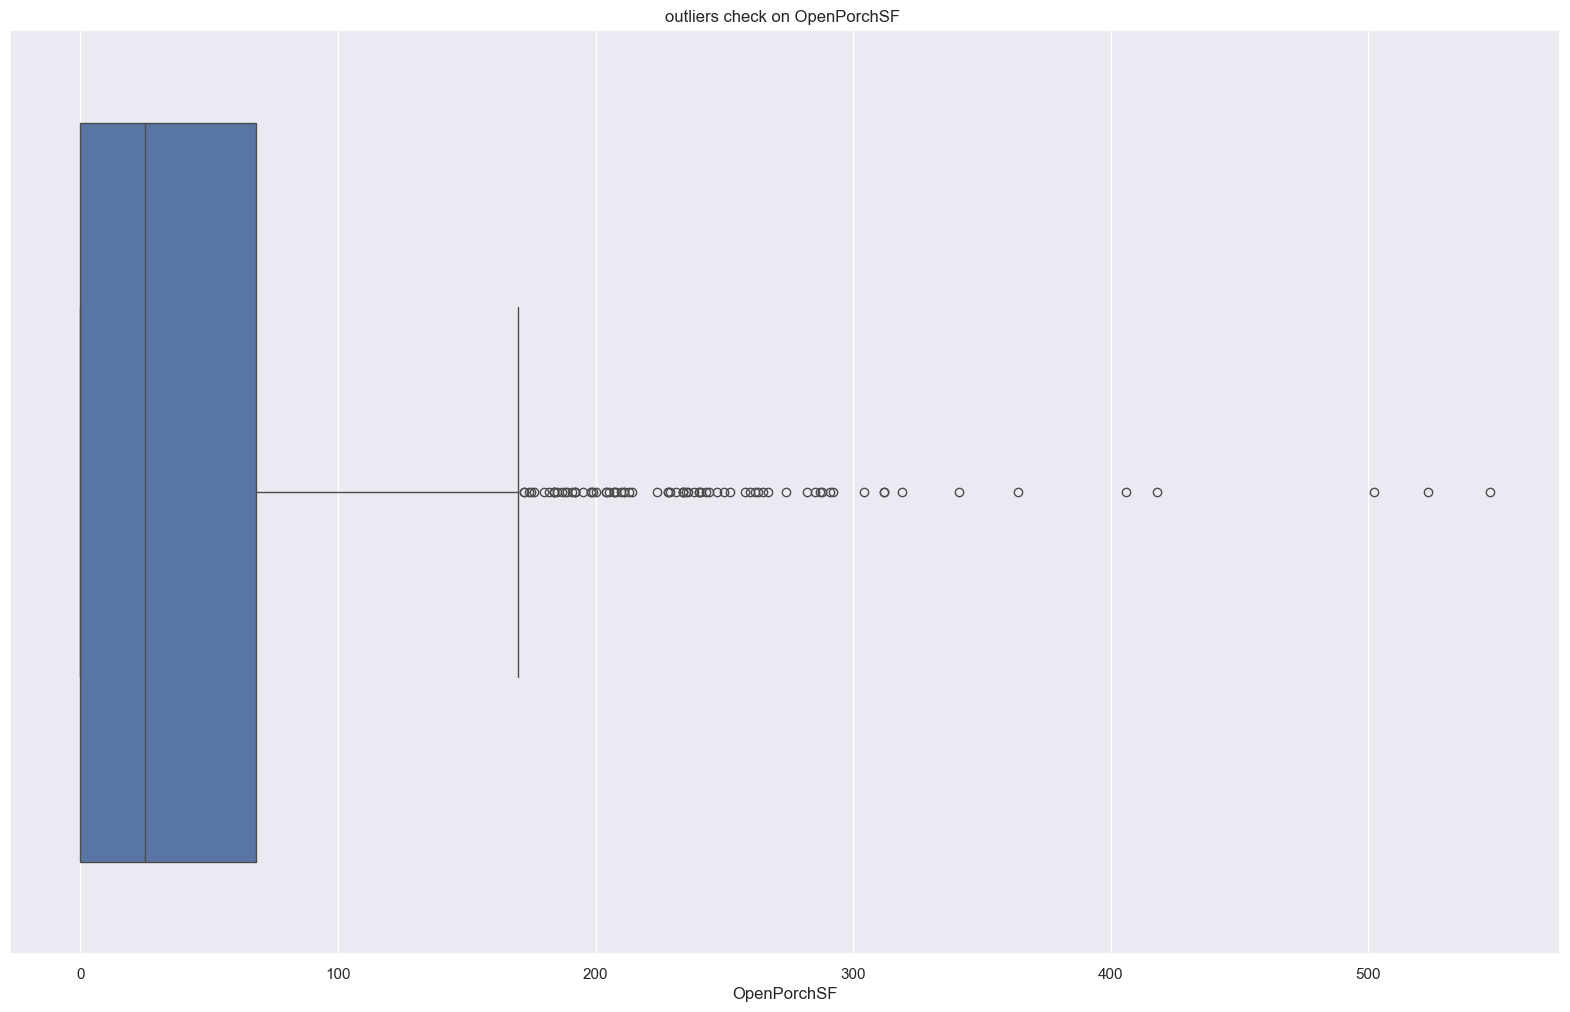

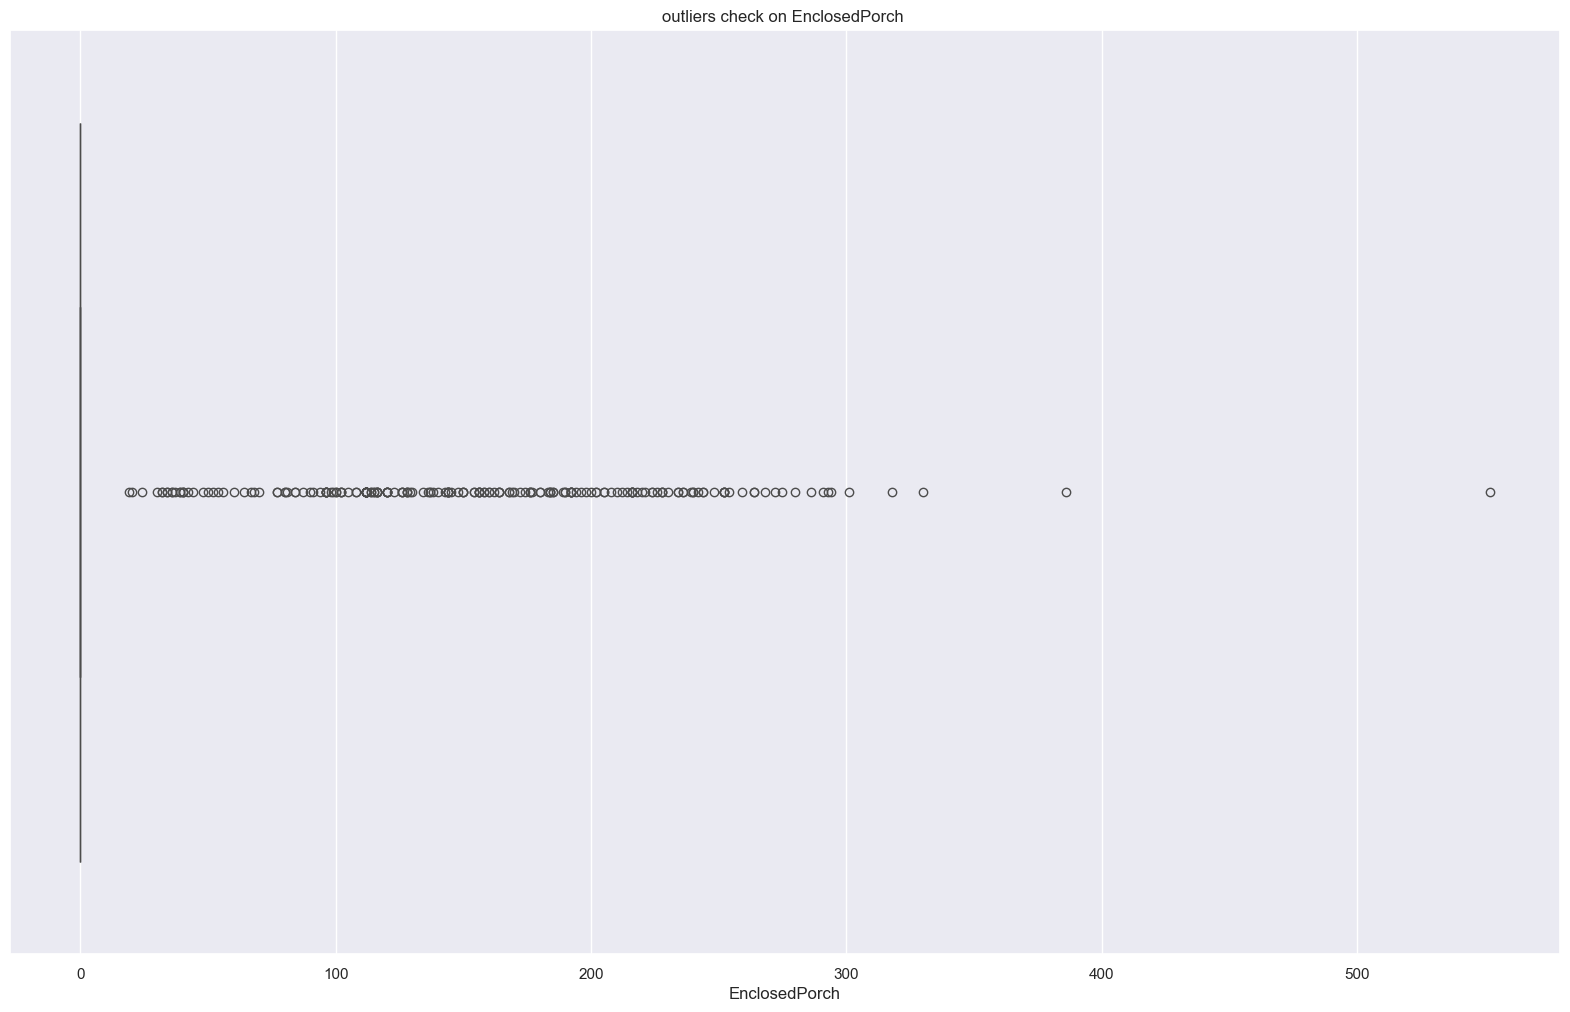

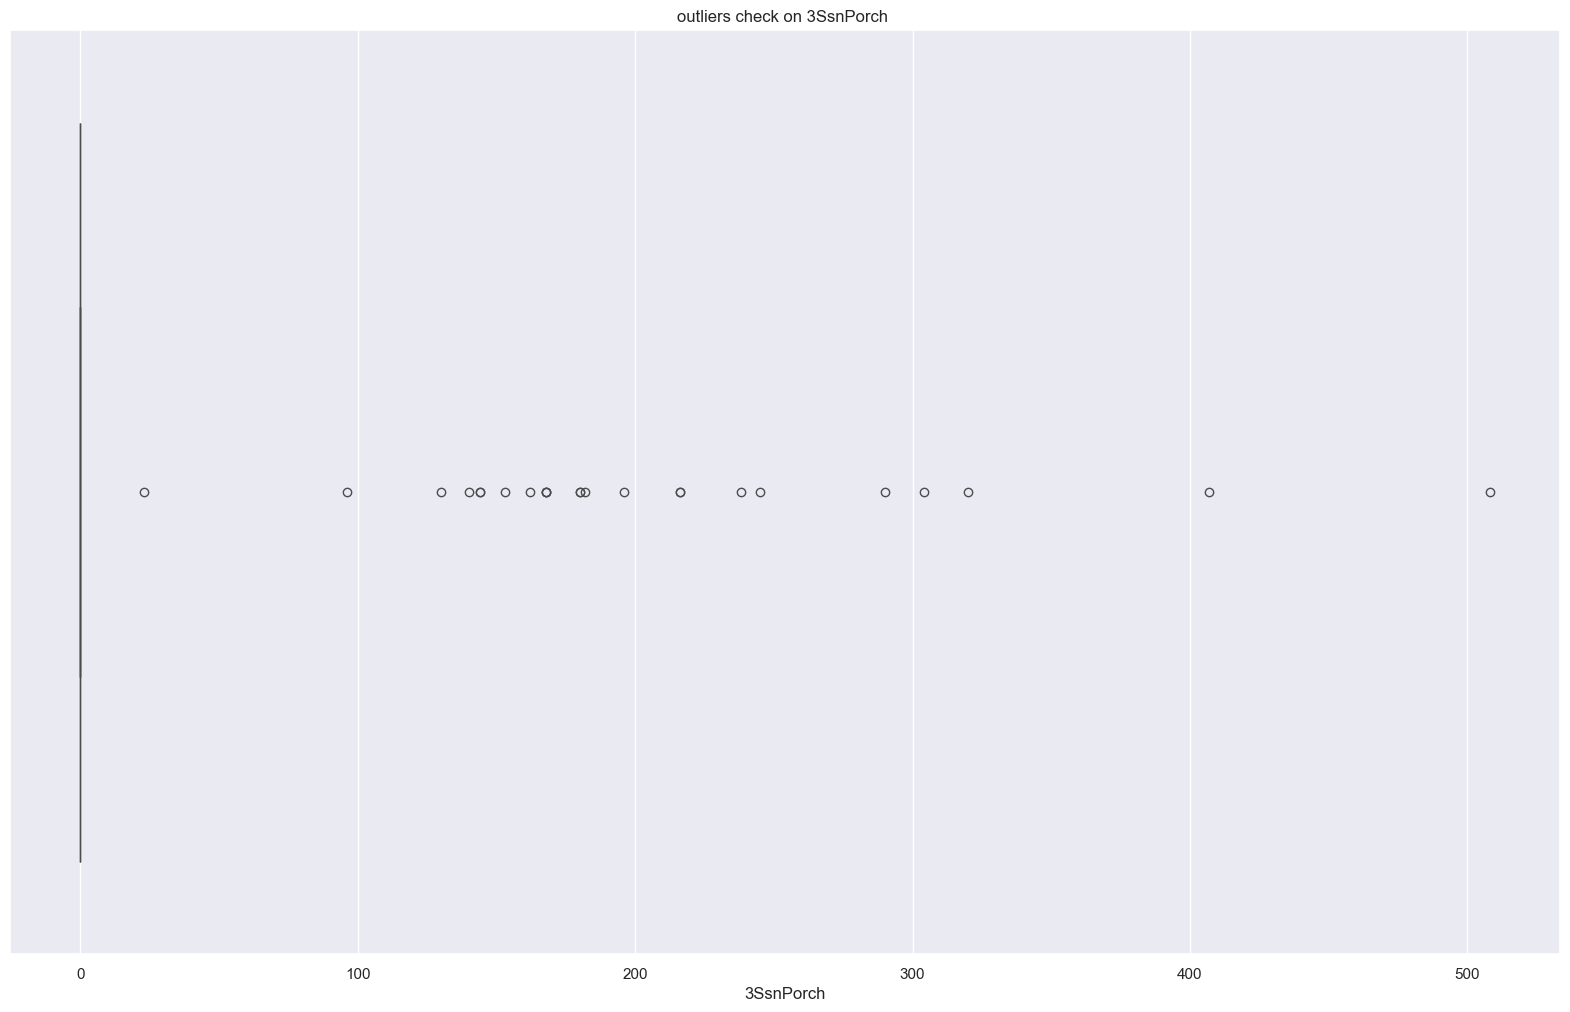

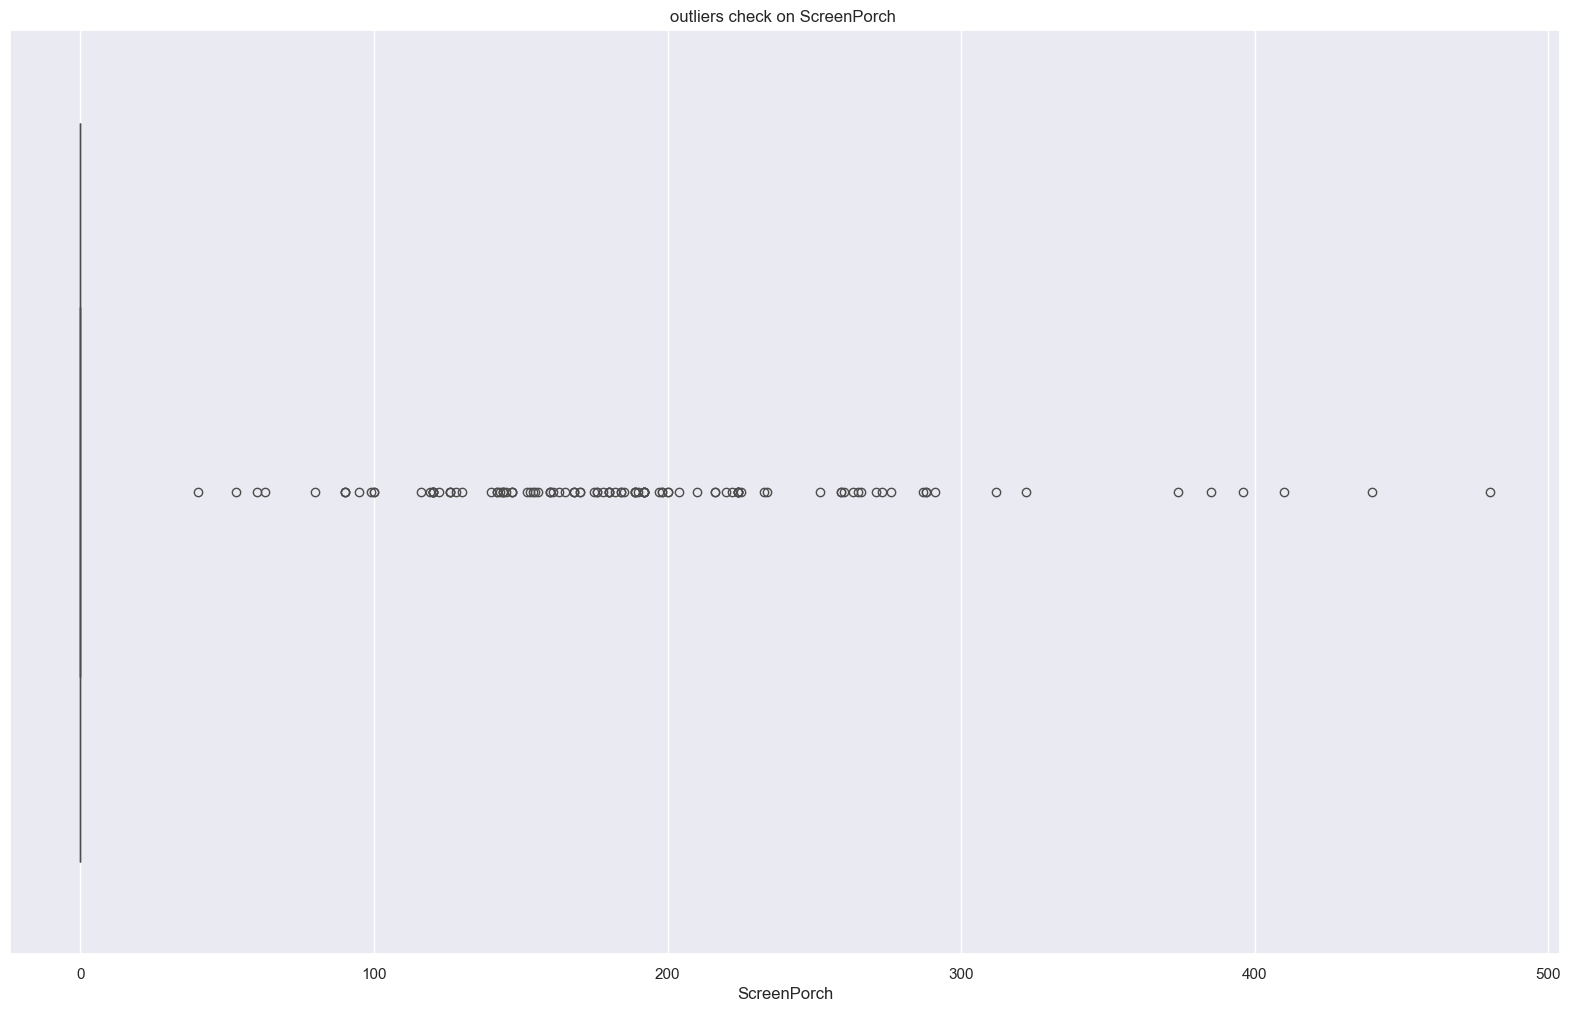

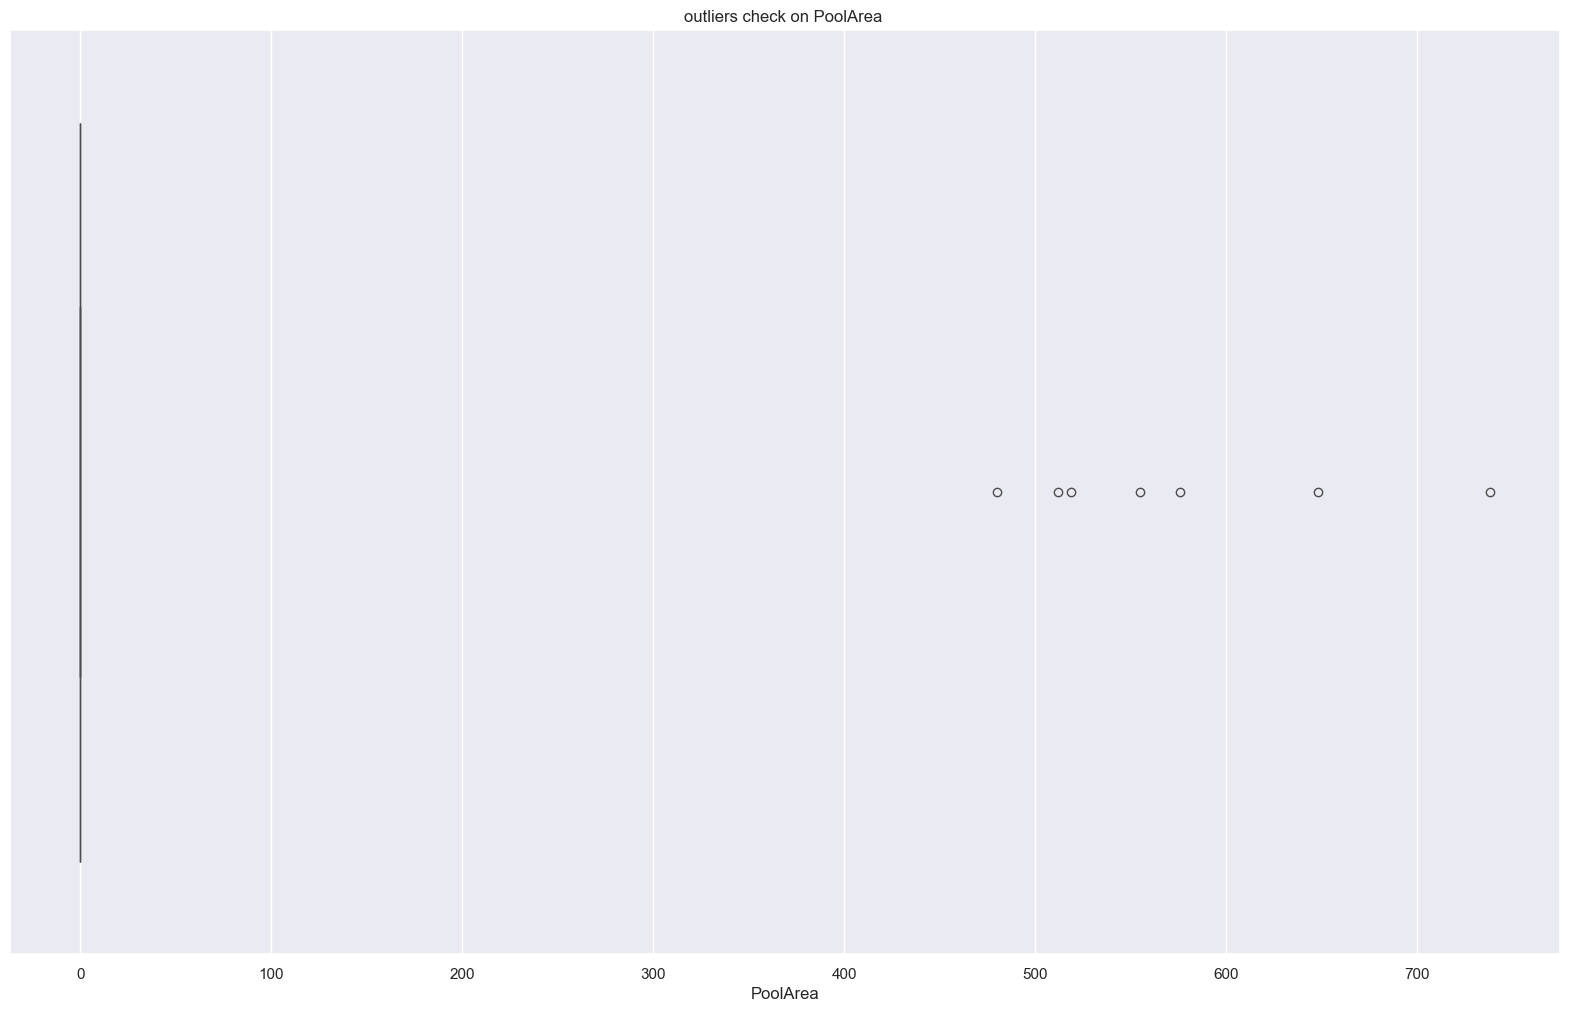

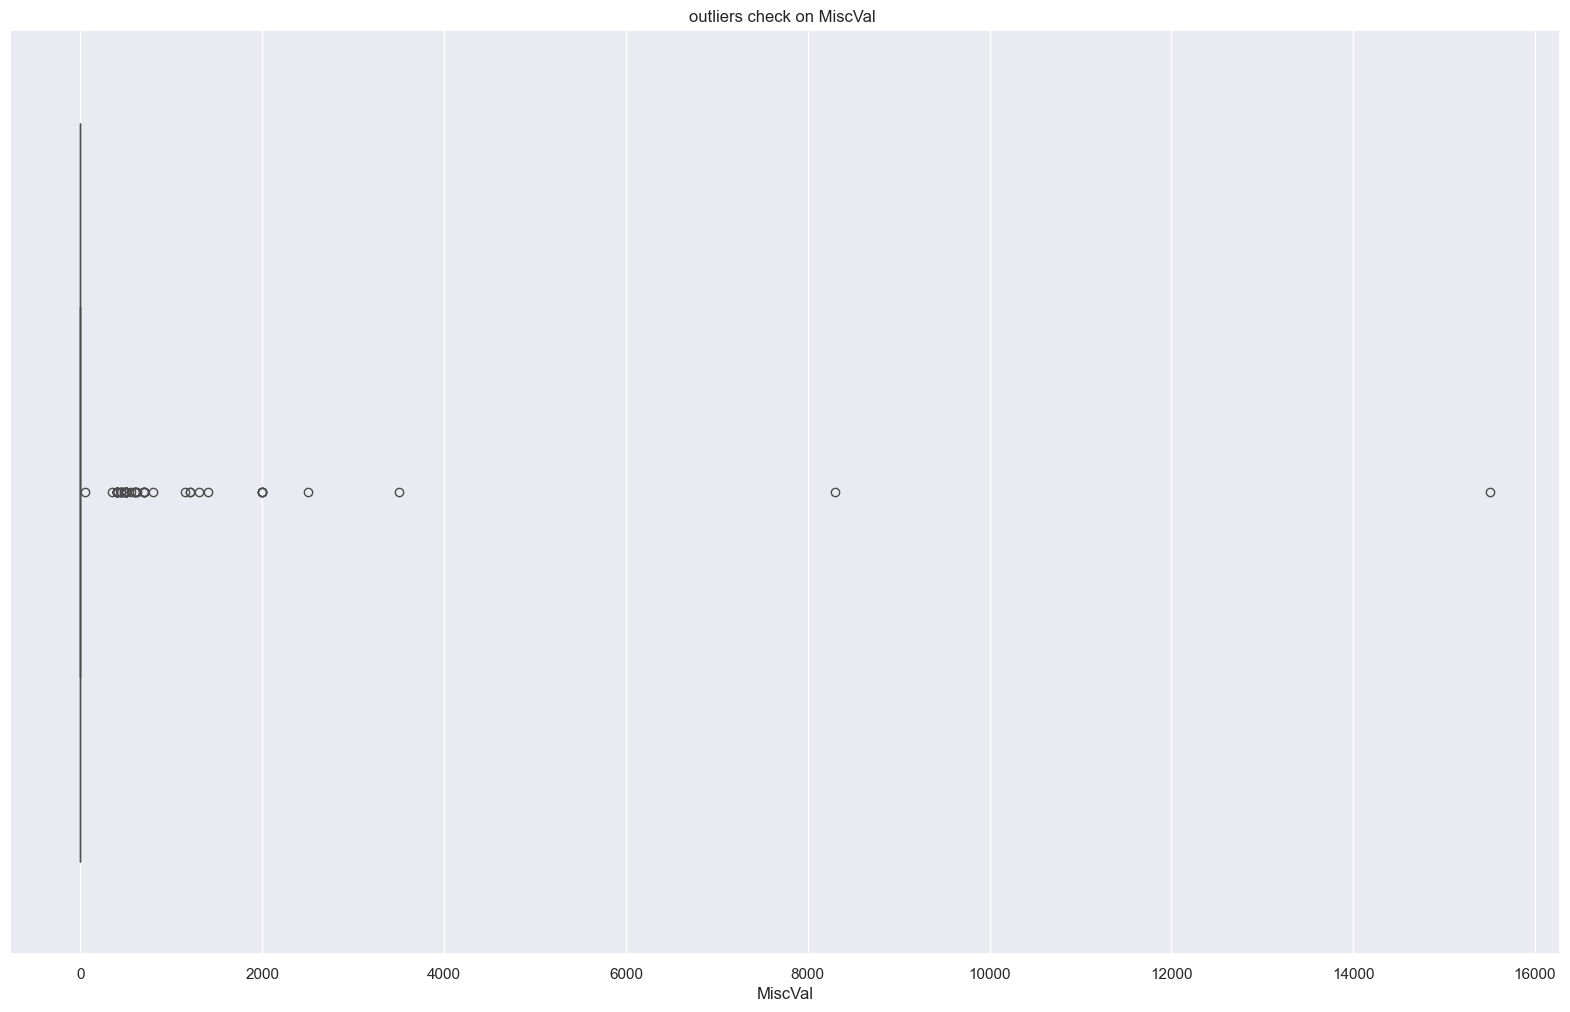

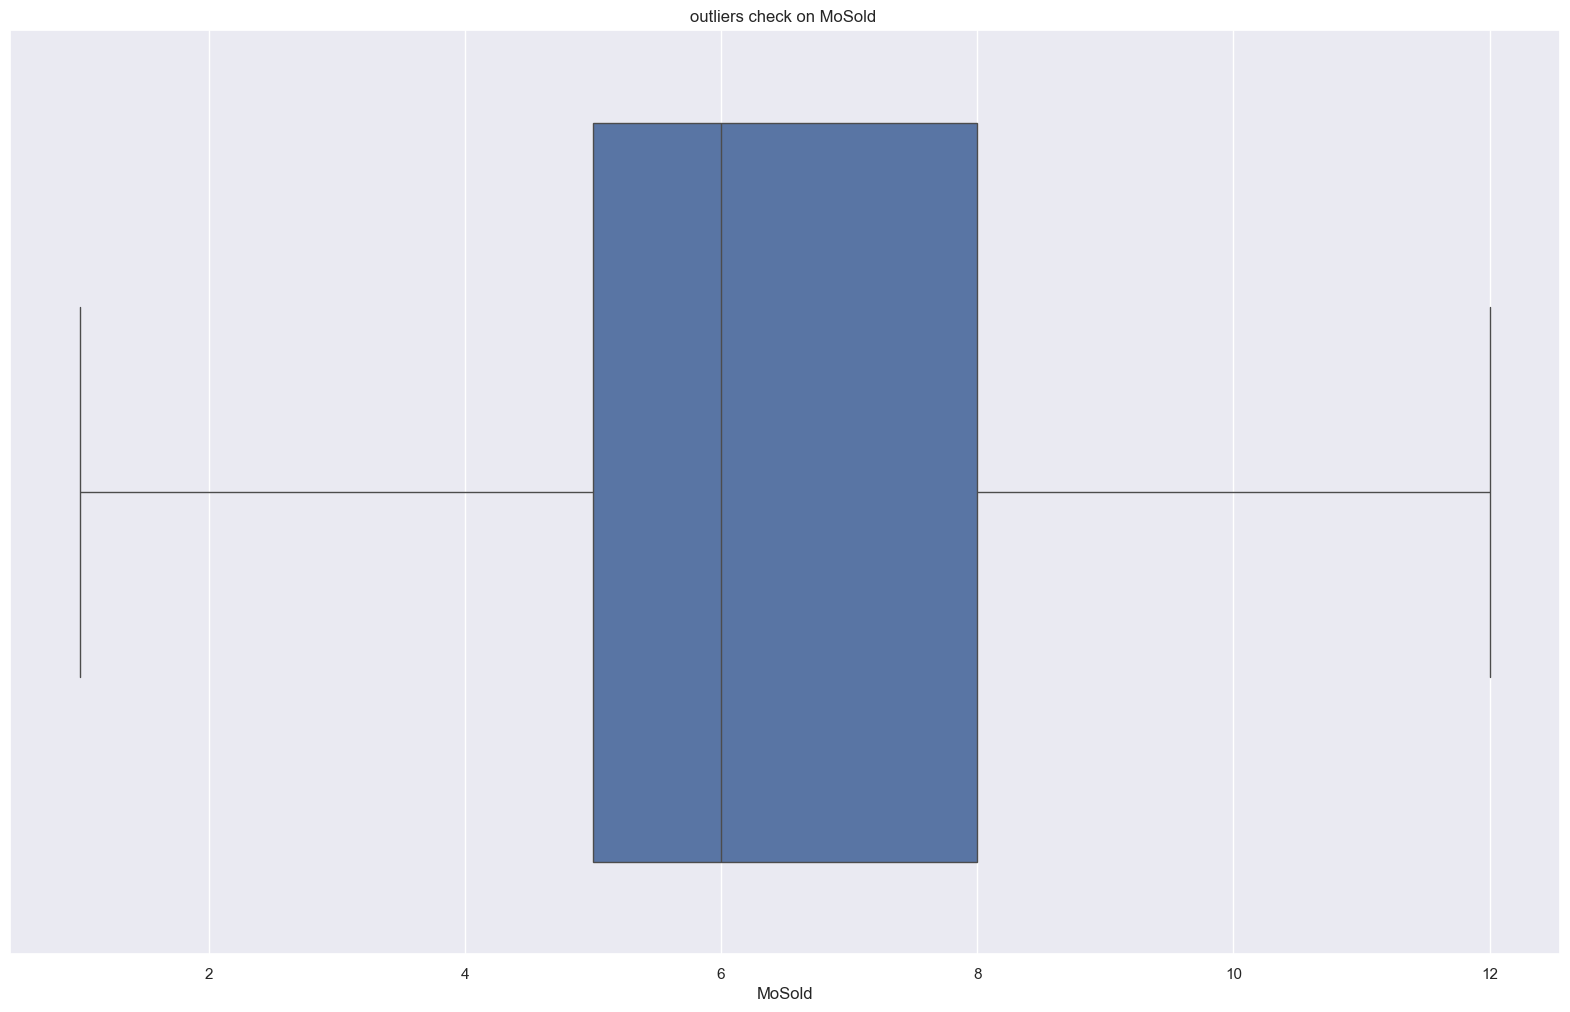

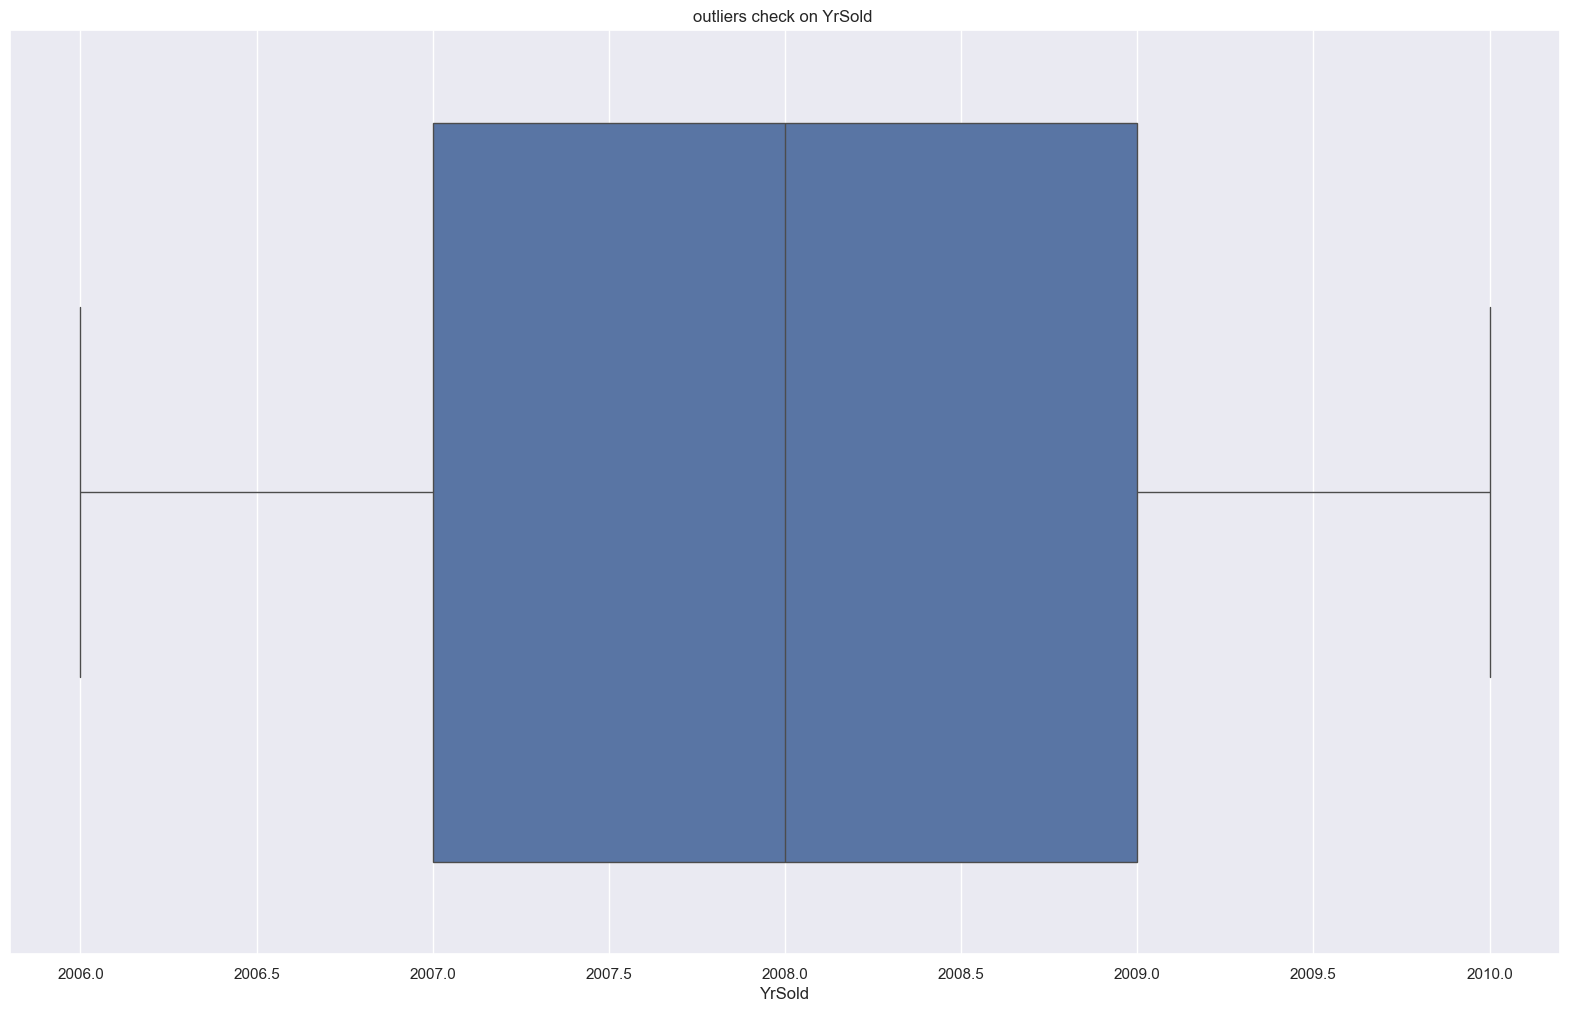

In [174]:
for i in num_columns.columns:
    sns.boxplot(data = num_columns,x =i)
    plt.title(f'outliers check on {i} ')
    plt.show()

In [175]:
df.isnull().sum().sort_values(ascending= False)[:21]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
MSSubClass         0
Fireplaces         0
dtype: int64

# Encode

In [176]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [177]:
cons_data = pd.concat([df,new_data],axis =0)


because there is no saleprice , im adding saleprice from train dataset , and after encoded i will remove it

In [178]:
#encode for train and new test data
#for column in cons_data[cat_columns]:
    #meanvalues = cons_data.groupby(column)['SalePrice'].mean()
    #mean_values_sorted = meanvalues.sort_values().index
    #label_mapping ={category : label for label,category in enumerate(mean_values_sorted)}
    #cons_data[column]= cons_data[column].map(label_mapping)


In [179]:
for col in cons_data[cat_columns]:
    cons_data[col] = le.fit_transform(cons_data[col])

cons_data

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
Id                                                                          
1             60         3         65.0     8450       1      2         3   
2             20         3         80.0     9600       1      2         3   
3             60         3         68.0    11250       1      2         0   
4             70         3         60.0     9550       1      2         0   
5             60         3         84.0    14260       1      2         0   
...          ...       ...          ...      ...     ...    ...       ...   
2915         160         4         21.0     1936       1      2         3   
2916         160         4         21.0     1894       1      2         3   
2917          20         3        160.0    20000       1      2         3   
2918          85         3         62.0    10441       1      2         3   
2919          60         3         74.0     9627       1      2         3   

      LandContour  Utilities  LotConfig  ...  PoolArea  PoolQC  Fence  \
Id                                       ...                            
1               3          0          4  ...         0       3      4   
2               3          0          2  ...         0       3      4   
3               3          0          4  ...         0       3      4   
4               3          0          0  ...         0       3      4   
5               3          0          2  ...         0       3      4   
...           ...        ...        ...  ...       ...     ...    ...   
2915            3          0          4  ...         0       3      4   
2916            3          0          4  ...         0       3      4   
2917            3          0          4  ...         0       3      4   
2918            3          0          4  ...         0       3      2   
2919            3          0          4  ...         0       3      4   

      MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                                              
1               4        0       2    2008         8              4   208500.0  
2               4        0       5    2007         8              4   181500.0  
3               4        0       9    2008         8              4   223500.0  
4               4        0       2    2006         8              0   140000.0  
5               4        0      12    2008         8              4   250000.0  
...           ...      ...     ...     ...       ...            ...        ...  
2915            4        0       6    2006         8              4        NaN  
2916            4        0       4    2006         8              0        NaN  
2917            4        0       9    2006         8              0        NaN  
2918            2      700       7    2006         8              4        NaN  
2919            4        0      11    2006         8              4        NaN  

[2919 rows x 80 columns]

In [180]:
newest_data = cons_data.loc[1461:,:]
newest_data = newest_data.drop('SalePrice',axis = 1)
newest_data

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
Id                                                                          
1461          20         2         80.0    11622       1      2         3   
1462          20         3         81.0    14267       1      2         0   
1463          60         3         74.0    13830       1      2         0   
1464          60         3         78.0     9978       1      2         0   
1465         120         3         43.0     5005       1      2         0   
...          ...       ...          ...      ...     ...    ...       ...   
2915         160         4         21.0     1936       1      2         3   
2916         160         4         21.0     1894       1      2         3   
2917          20         3        160.0    20000       1      2         3   
2918          85         3         62.0    10441       1      2         3   
2919          60         3         74.0     9627       1      2         3   

      LandContour  Utilities  LotConfig  ...  ScreenPorch  PoolArea  PoolQC  \
Id                                       ...                                  
1461            3          0          4  ...          120         0       3   
1462            3          0          0  ...            0         0       3   
1463            3          0          4  ...            0         0       3   
1464            3          0          4  ...            0         0       3   
1465            1          0          4  ...          144         0       3   
...           ...        ...        ...  ...          ...       ...     ...   
2915            3          0          4  ...            0         0       3   
2916            3          0          4  ...            0         0       3   
2917            3          0          4  ...            0         0       3   
2918            3          0          4  ...            0         0       3   
2919            3          0          4  ...            0         0       3   

      Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
Id                                                                          
1461      2            4        0       6    2010         8              4  
1462      4            0    12500       6    2010         8              4  
1463      2            4        0       3    2010         8              4  
1464      4            4        0       6    2010         8              4  
1465      4            4        0       1    2010         8              4  
...     ...          ...      ...     ...     ...       ...            ...  
2915      4            4        0       6    2006         8              4  
2916      4            4        0       4    2006         8              0  
2917      4            4        0       9    2006         8              0  
2918      2            2      700       7    2006         8              4  
2919      4            4        0      11    2006         8              4  

[1459 rows x 79 columns]

In [181]:
df = cons_data.loc[:1460,:]
df

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
Id                                                                          
1             60         3         65.0     8450       1      2         3   
2             20         3         80.0     9600       1      2         3   
3             60         3         68.0    11250       1      2         0   
4             70         3         60.0     9550       1      2         0   
5             60         3         84.0    14260       1      2         0   
...          ...       ...          ...      ...     ...    ...       ...   
1456          60         3         62.0     7917       1      2         3   
1457          20         3         85.0    13175       1      2         3   
1458          70         3         66.0     9042       1      2         3   
1459          20         3         68.0     9717       1      2         3   
1460          20         3         75.0     9937       1      2         3   

      LandContour  Utilities  LotConfig  ...  PoolArea  PoolQC  Fence  \
Id                                       ...                            
1               3          0          4  ...         0       3      4   
2               3          0          2  ...         0       3      4   
3               3          0          4  ...         0       3      4   
4               3          0          0  ...         0       3      4   
5               3          0          2  ...         0       3      4   
...           ...        ...        ...  ...       ...     ...    ...   
1456            3          0          4  ...         0       3      4   
1457            3          0          4  ...         0       3      2   
1458            3          0          4  ...         0       3      0   
1459            3          0          4  ...         0       3      4   
1460            3          0          4  ...         0       3      4   

      MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                                              
1               4        0       2    2008         8              4   208500.0  
2               4        0       5    2007         8              4   181500.0  
3               4        0       9    2008         8              4   223500.0  
4               4        0       2    2006         8              0   140000.0  
5               4        0      12    2008         8              4   250000.0  
...           ...      ...     ...     ...       ...            ...        ...  
1456            4        0       8    2007         8              4   175000.0  
1457            4        0       2    2010         8              4   210000.0  
1458            2     2500       5    2010         8              4   266500.0  
1459            4        0       4    2010         8              4   142125.0  
1460            4        0       6    2008         8              4   147500.0  

[1460 rows x 80 columns]

In [182]:
#encode 
#for column in df[cat_columns]:
    #meanvalues = df.groupby(column)['SalePrice'].mean()
    #mean_values_sorted = meanvalues.sort_values().index
    #label_mapping ={category : label for label,category in enumerate(mean_values_sorted)}
    #df[column]= df[column].map(label_mapping)

In [183]:
X = df.drop('SalePrice',axis =1)
y= df['SalePrice']

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [186]:
X_train[cat_columns]

MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
Id                                                                           
1313         3       1      2         0            3          0          4   
1409         4       1      2         3            3          0          4   
1166         3       1      2         0            3          0          4   
1347         3       1      2         1            3          0          1   
400          1       1      2         3            3          0          4   
...        ...     ...    ...       ...          ...        ...        ...   
1418         3       1      2         0            3          0          4   
76           4       1      2         3            3          0          4   
600          4       1      2         3            3          0          4   
1362         3       1      2         0            2          0          4   
864          3       1      2         3            3          0          4   

      LandSlope  Neighborhood  Condition1  ...  GarageType  GarageFinish  \
Id                                         ...                             
1313          0            15           2  ...           1             1   
1409          0            17           2  ...           5             2   
1166          0            16           2  ...           1             1   
1347          0            14           4  ...           1             1   
400           0            21           2  ...           1             0   
...         ...           ...         ...  ...         ...           ...   
1418          0            15           2  ...           1             0   
76            0            10           2  ...           3             2   
600           0             1           2  ...           1             0   
1362          1            22           2  ...           1             0   
864           0            12           2  ...           1             2   

      GarageQual  GarageCond  PavedDrive  PoolQC  Fence  MiscFeature  \
Id                                                                     
1313           2           2           2       3      4            4   
1409           4           4           2       3      4            4   
1166           4           4           2       3      4            4   
1347           2           4           2       3      4            4   
400            4           4           2       3      4            4   
...          ...         ...         ...     ...    ...          ...   
1418           4           4           2       3      4            4   
76             4           4           2       3      1            4   
600            4           4           2       3      0            4   
1362           4           4           2       3      4            4   
864            4           4           2       3      0            4   

      SaleType  SaleCondition  
Id                             
1313         8              4  
1409         8              4  
1166         6              5  
1347         8              4  
400          8              4  
...        ...            ...  
1418         8              4  
76           8              4  
600          0              4  
1362         8              4  
864          8              4  

[1022 rows x 43 columns]

# Fill Nan

In [187]:
#fill Nan in Train
category_modes_train = X_train[cat_columns].mode().iloc[0]
numerical_median_train = X_train[num_columns.columns].median()

for col in X_train[cat_columns]:
    X_train[col].fillna(category_modes_train[col], inplace=True)
for col in X_train[num_columns.columns]:
    X_train[col].fillna(numerical_median_train[col], inplace=True)

In [188]:
#fill Nan in Test
category_modes_test = X_test[cat_columns].mode().iloc[0]
numerical_median_test = X_test[num_columns.columns].median()

for col in X_test[cat_columns]:
    X_test[col].fillna(category_modes_test[col], inplace=True)
for col in X_test[num_columns.columns]:
    X_test[col].fillna(numerical_median_test[col], inplace=True)

# Drop Nan

drop item that missing a lot 


In [189]:
Xtrain = X_train.drop(['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu'],axis=1)

In [190]:
X_test = X_test.drop(['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu'],axis=1)

In [191]:
X_test.shape

(438, 73)

In [192]:
Xtrain.shape

(1022, 73)

In [193]:
#mean_values = df.groupby('MSZoning')['SalePrice'].mean()
#mean_values_sorted = mean_values.sort_values().index
#label_mapping = {category : label for label , category in enumerate(mean_values_sorted)}

In [194]:
#df['MSZoning']= df['MSZoning'].map(label_mapping)

In [195]:
#df['MSZoning'].unique()

In [196]:
Xtrain

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
Id                                                                   
1313          60         3         70.0     9572       1         0   
1409          70         4         60.0     7740       1         3   
1166          20         3         79.0     9541       1         0   
1347          20         3         70.0    20781       1         1   
400           60         1         65.0     8125       1         3   
...          ...       ...          ...      ...     ...       ...   
1418          60         3         70.0    16545       1         0   
76           180         4         21.0     1596       1         3   
600          160         4         24.0     1950       1         3   
1362          20         3        124.0    16158       1         0   
864           20         3         70.0     7931       1         3   

      LandContour  Utilities  LotConfig  LandSlope  ...  OpenPorchSF  \
Id                                                  ...                
1313            3          0          4          0  ...            0   
1409            3          0          4          0  ...            0   
1166            3          0          4          0  ...          114   
1347            3          0          1          0  ...           80   
400             3          0          4          0  ...          168   
...           ...        ...        ...        ...  ...          ...   
1418            3          0          4          0  ...          126   
76              3          0          4          0  ...          101   
600             3          0          4          0  ...            0   
1362            2          0          4          1  ...           36   
864             3          0          4          0  ...            0   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
Id                                                                       
1313              0          0            0         0        0       6   
1409              0          0          168         0        0       6   
1166              0          0            0         0        0       9   
1347              0        290            0         0        0       6   
400               0          0            0         0        0      10   
...             ...        ...          ...       ...      ...     ...   
1418              0          0            0         0        0       5   
76                0          0            0         0        0      11   
600               0          0            0         0        0       7   
1362              0          0            0         0        0       6   
864               0          0            0         0        0       7   

      YrSold  SaleType  SaleCondition  
Id                                     
1313    2007         8              4  
1409    2010         8              4  
1166    2009         6              5  
1347    2006         8              4  
400     2009         8              4  
...      ...       ...            ...  
1418    2009         8              4  
76      2009         8              4  
600     2008         0              4  
1362    2009         8              4  
864     2009         8              4  

[1022 rows x 73 columns]

# Feature Scaling



In [197]:
from sklearn.preprocessing import MinMaxScaler
sc = StandardScaler()
mc = MinMaxScaler()

In [198]:
X_test['Utilities'].unique()

array([0])

In [199]:
# Iterate through columns
def feature_scale(dataframe):
  selected_columns = []
  for column in dataframe.columns:
    unique_values = dataframe[column].unique()
    if not (0 in unique_values and 1 in unique_values) or len(unique_values) >= 1:
      selected_columns.append(column)
  # Create a new DataFrame with selected columns
  filtered_df = dataframe[selected_columns]
  return filtered_df

In [200]:
Xtrain_filter = feature_scale(Xtrain)
X_test_filter = feature_scale(X_test)


In [201]:
Xtrain_filter

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
Id                                                                   
1313          60         3         70.0     9572       1         0   
1409          70         4         60.0     7740       1         3   
1166          20         3         79.0     9541       1         0   
1347          20         3         70.0    20781       1         1   
400           60         1         65.0     8125       1         3   
...          ...       ...          ...      ...     ...       ...   
1418          60         3         70.0    16545       1         0   
76           180         4         21.0     1596       1         3   
600          160         4         24.0     1950       1         3   
1362          20         3        124.0    16158       1         0   
864           20         3         70.0     7931       1         3   

      LandContour  Utilities  LotConfig  LandSlope  ...  OpenPorchSF  \
Id                                                  ...                
1313            3          0          4          0  ...            0   
1409            3          0          4          0  ...            0   
1166            3          0          4          0  ...          114   
1347            3          0          1          0  ...           80   
400             3          0          4          0  ...          168   
...           ...        ...        ...        ...  ...          ...   
1418            3          0          4          0  ...          126   
76              3          0          4          0  ...          101   
600             3          0          4          0  ...            0   
1362            2          0          4          1  ...           36   
864             3          0          4          0  ...            0   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
Id                                                                       
1313              0          0            0         0        0       6   
1409              0          0          168         0        0       6   
1166              0          0            0         0        0       9   
1347              0        290            0         0        0       6   
400               0          0            0         0        0      10   
...             ...        ...          ...       ...      ...     ...   
1418              0          0            0         0        0       5   
76                0          0            0         0        0      11   
600               0          0            0         0        0       7   
1362              0          0            0         0        0       6   
864               0          0            0         0        0       7   

      YrSold  SaleType  SaleCondition  
Id                                     
1313    2007         8              4  
1409    2010         8              4  
1166    2009         6              5  
1347    2006         8              4  
400     2009         8              4  
...      ...       ...            ...  
1418    2009         8              4  
76      2009         8              4  
600     2008         0              4  
1362    2009         8              4  
864     2009         8              4  

[1022 rows x 73 columns]

In [202]:
Xtrain[Xtrain_filter.columns] = sc.fit_transform(X_train[Xtrain_filter.columns])

In [203]:
X_test[X_test_filter.columns] = sc.transform(X_test[X_test_filter.columns])

In [204]:
Xtrain

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
Id                                                                      
1313    0.101379 -0.038042    -0.015067 -0.101075  0.070117 -1.385887   
1409    0.340385  1.581928    -0.473348 -0.350526  0.070117  0.745071   
1166   -0.854647 -0.038042     0.397387 -0.105296  0.070117 -1.385887   
1347   -0.854647 -0.038042    -0.015067  1.425182  0.070117 -0.675568   
400     0.101379 -3.277984    -0.244208 -0.298103  0.070117  0.745071   
...          ...       ...          ...       ...       ...       ...   
1418    0.101379 -0.038042    -0.015067  0.848393  0.070117 -1.385887   
76      2.969457  1.581928    -2.260647 -1.187115  0.070117  0.745071   
600     2.491444  1.581928    -2.123162 -1.138913  0.070117  0.745071   
1362   -0.854647 -0.038042     2.459654  0.795698  0.070117 -1.385887   
864    -0.854647 -0.038042    -0.015067 -0.324519  0.070117  0.745071   

      LandContour  Utilities  LotConfig  LandSlope  ...  OpenPorchSF  \
Id                                                  ...                
1313     0.317882  -0.031296   0.598503  -0.222115  ...    -0.722564   
1409     0.317882  -0.031296   0.598503  -0.222115  ...    -0.722564   
1166     0.317882  -0.031296   0.598503  -0.222115  ...     1.122374   
1347     0.317882  -0.031296  -1.268242  -0.222115  ...     0.572129   
400      0.317882  -0.031296   0.598503  -0.222115  ...     1.996292   
...           ...        ...        ...        ...  ...          ...   
1418     0.317882  -0.031296   0.598503  -0.222115  ...     1.316578   
76       0.317882  -0.031296   0.598503  -0.222115  ...     0.911986   
600      0.317882  -0.031296   0.598503  -0.222115  ...    -0.722564   
1362    -1.094620  -0.031296   0.598503   3.439204  ...    -0.139952   
864      0.317882  -0.031296   0.598503  -0.222115  ...    -0.722564   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold  \
Id                                                                          
1313      -0.355538  -0.110159    -0.279748 -0.069851 -0.091301 -0.120565   
1409      -0.355538  -0.110159     2.831108 -0.069851 -0.091301 -0.120565   
1166      -0.355538  -0.110159    -0.279748 -0.069851 -0.091301  0.973083   
1347      -0.355538   9.665007    -0.279748 -0.069851 -0.091301 -0.120565   
400       -0.355538  -0.110159    -0.279748 -0.069851 -0.091301  1.337632   
...             ...        ...          ...       ...       ...       ...   
1418      -0.355538  -0.110159    -0.279748 -0.069851 -0.091301 -0.485114   
76        -0.355538  -0.110159    -0.279748 -0.069851 -0.091301  1.702181   
600       -0.355538  -0.110159    -0.279748 -0.069851 -0.091301  0.243984   
1362      -0.355538  -0.110159    -0.279748 -0.069851 -0.091301 -0.120565   
864       -0.355538  -0.110159    -0.279748 -0.069851 -0.091301  0.243984   

        YrSold  SaleType  SaleCondition  
Id                                       
1313 -0.622826  0.319160       0.223838  
1409  1.645089  0.319160       0.223838  
1166  0.889117 -0.940229       1.100320  
1347 -1.378798  0.319160       0.223838  
400   0.889117  0.319160       0.223838  
...        ...       ...            ...  
1418  0.889117  0.319160       0.223838  
76    0.889117  0.319160       0.223838  
600   0.133146 -4.718398       0.223838  
1362  0.889117  0.319160       0.223838  
864   0.889117  0.319160       0.223838  

[1022 rows x 73 columns]

# Model of ML


In [205]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor

In [206]:
LinearRegression().get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [207]:
# Linear regression

#lm = LinearRegression()
#lm_train =lm.fit(Xtrain,y_train)

#y_pred = lm.predict(X_test)
#mse = mean_squared_error(y_test, y_pred)
#mae = mean_absolute_error(y_test,y_pred)
#mape = mean_absolute_percentage_error(y_test,y_pred)
#rmse = np.sqrt(mse)
#r2 = r2_score(y_test,y_pred)
#print(f'MSE for test set is {mse}')
#print(f'MAE for test set is {mae}')
#print(f'MAPE for test set is {mape}')
#print(f'RMSE for test set is {rmse}')
#print(f'R squared for test set is {r2}')

# Running Multiple Machine Learning

In [208]:
regressors = {
    'LinearRegression': (LinearRegression(),{'fit_intercept': [True]}),
    'SVR': (SVR(), {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.2]}),
    'RandomForestRegressor': (RandomForestRegressor(random_state=42), {'n_estimators': [100, 200, 300, 400, 500],
                                                                        'max_depth': [10, 20, 30, 40, 50, None],
                                                                        'min_samples_split': [2, 5, 10],
                                                                        'min_samples_leaf': [1, 2, 4]}),
    'DecisionTreeRegressor': (DecisionTreeRegressor(random_state=42), {'max_depth': [None, 10, 20, 30]}),
    'MLPRegressor' : (MLPRegressor(random_state = 42,max_iter =500),{'hidden_layer_sizes': [(100,),(100,50),(100,100,100)],
                        'activation' :['relu']})}

In [209]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

Tuning LinearRegression...
Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END ......fit_intercept=True;, score=-652610346.164 total time=   0.0s
[CV 2/10] END .....fit_intercept=True;, score=-1249585652.193 total time=   0.0s
[CV 3/10] END ......fit_intercept=True;, score=-631186001.318 total time=   0.0s
[CV 4/10] END .....fit_intercept=True;, score=-2705986351.731 total time=   0.0s
[CV 5/10] END ......fit_intercept=True;, score=-771641935.213 total time=   0.0s
[CV 6/10] END ......fit_intercept=True;, score=-900857830.487 total time=   0.0s
[CV 7/10] END fit_intercept=True;, score=-2596069160638741991027743951683584.000 total time=   0.0s
[CV 8/10] END ......fit_intercept=True;, score=-714194401.119 total time=   0.0s
[CV 9/10] END ......fit_intercept=True;, score=-398549632.357 total time=   0.0s
[CV 10/10] END .....fit_intercept=True;, score=-875833495.391 total time=   0.0s
Best parameters for LinearRegression: {'fit_intercept': True}
Best LinearRegression

D:\ANACONDA\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


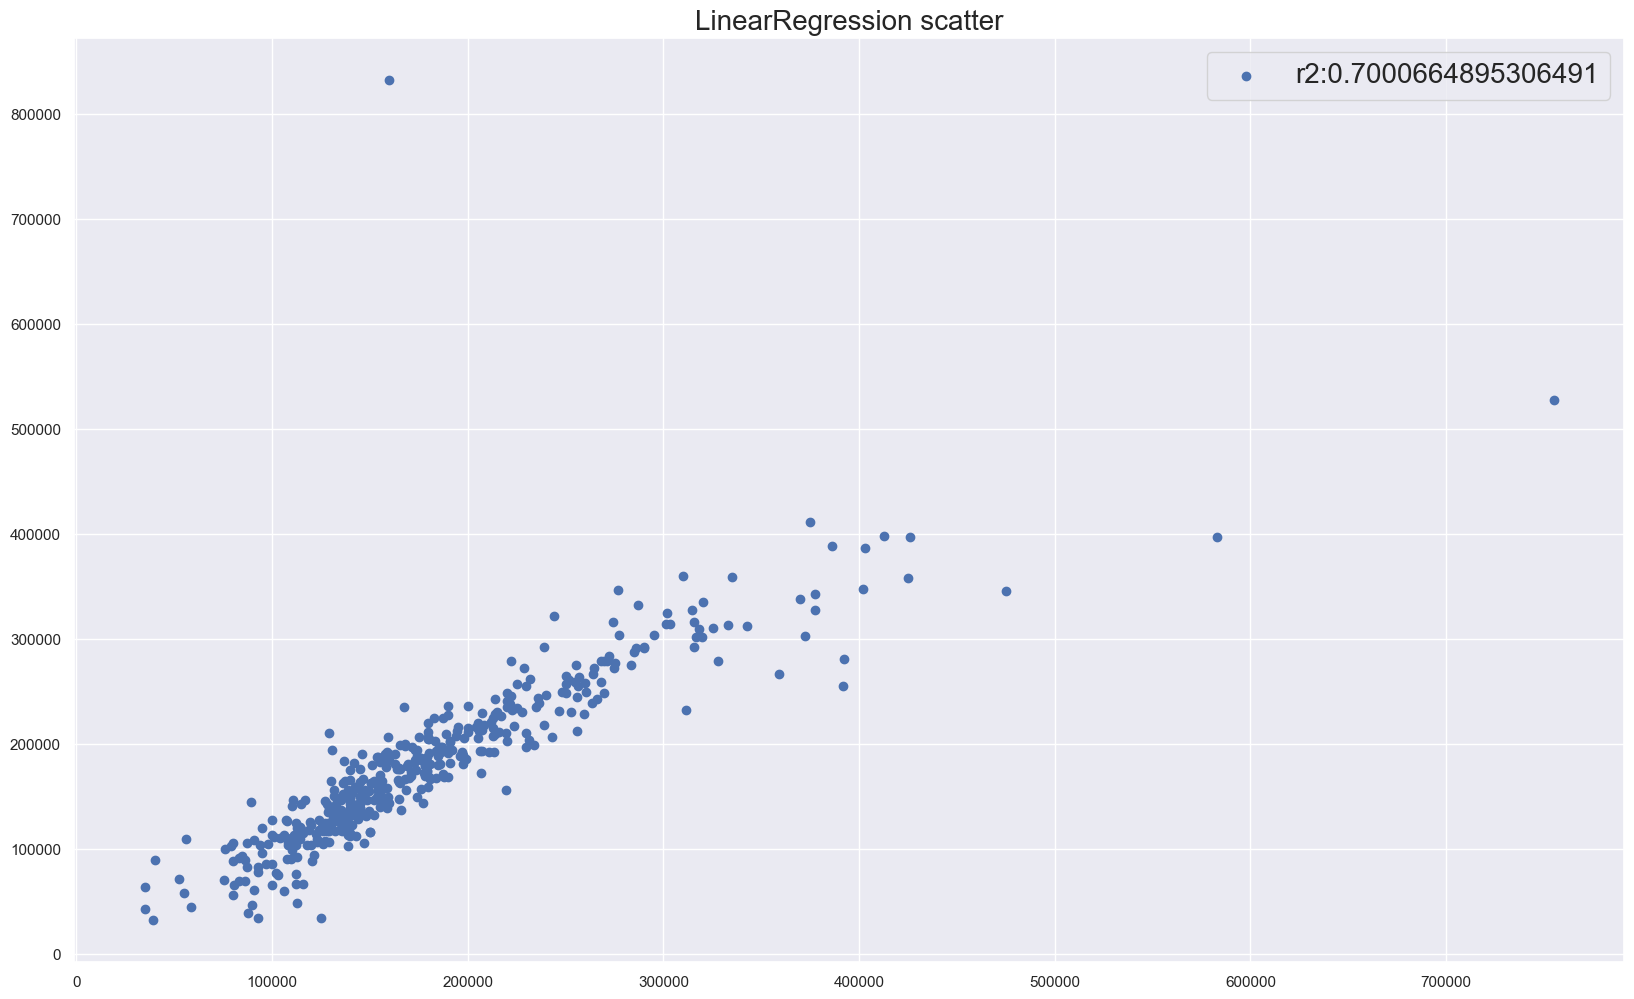

--------------------------------------
Tuning SVR...
Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10] END ....C=0.1, epsilon=0.01;, score=-5288943842.014 total time=   0.0s
[CV 2/10] END ....C=0.1, epsilon=0.01;, score=-9564055408.969 total time=   0.0s


D:\ANACONDA\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV 3/10] END ....C=0.1, epsilon=0.01;, score=-4189690560.959 total time=   0.0s
[CV 4/10] END ....C=0.1, epsilon=0.01;, score=-8591682826.743 total time=   0.0s
[CV 5/10] END ....C=0.1, epsilon=0.01;, score=-6977874275.885 total time=   0.0s
[CV 6/10] END ....C=0.1, epsilon=0.01;, score=-7580854904.848 total time=   0.0s
[CV 7/10] END ....C=0.1, epsilon=0.01;, score=-8397120606.277 total time=   0.0s
[CV 8/10] END ....C=0.1, epsilon=0.01;, score=-5106832485.987 total time=   0.0s
[CV 9/10] END ....C=0.1, epsilon=0.01;, score=-5217399957.033 total time=   0.0s
[CV 10/10] END ...C=0.1, epsilon=0.01;, score=-5418704651.558 total time=   0.0s
[CV 1/10] END .....C=0.1, epsilon=0.1;, score=-5288943842.014 total time=   0.0s
[CV 2/10] END .....C=0.1, epsilon=0.1;, score=-9564055408.969 total time=   0.0s
[CV 3/10] END .....C=0.1, epsilon=0.1;, score=-4189690560.959 total time=   0.0s
[CV 4/10] END .....C=0.1, epsilon=0.1;, score=-8591682826.743 total time=   0.0s
[CV 5/10] END .....C=0.1, ep

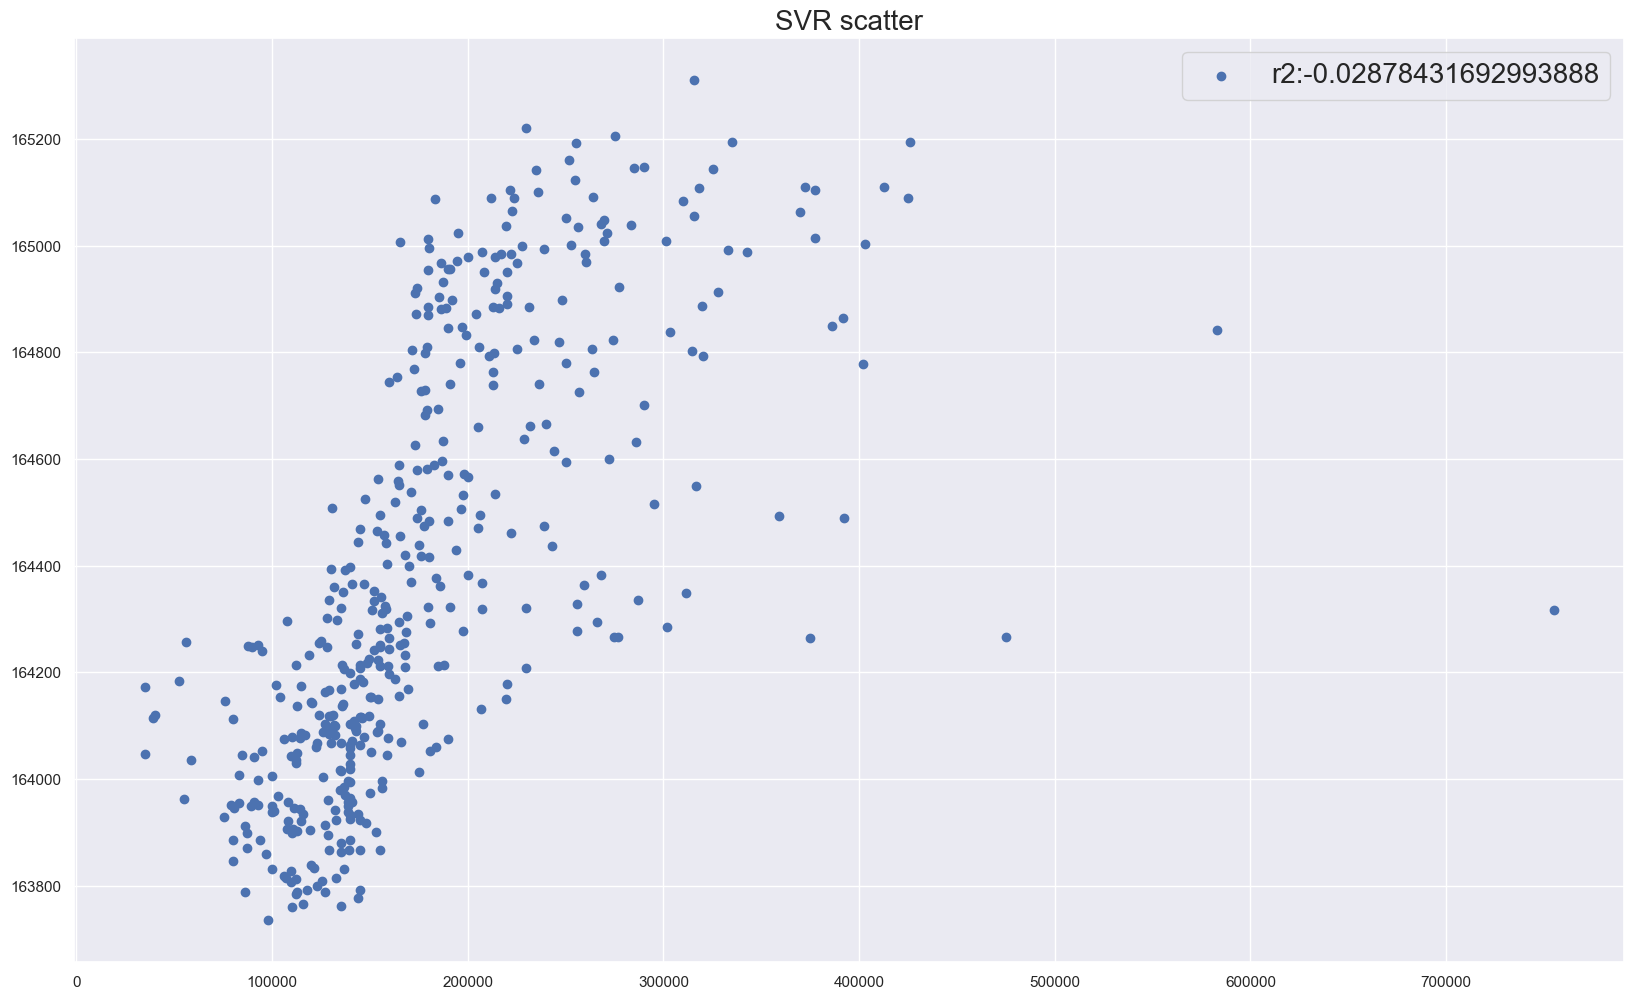

--------------------------------------
Tuning RandomForestRegressor...
Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-602112109.489 total time=   0.8s
[CV 2/10] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-1497288694.810 total time=   0.8s
[CV 3/10] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-398971369.660 total time=   0.8s
[CV 4/10] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-2022866532.714 total time=   0.8s
[CV 5/10] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-654627951.142 total time=   0.8s
[CV 6/10] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-884837378.236 total time=   0.8s
[CV 7/10] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-1

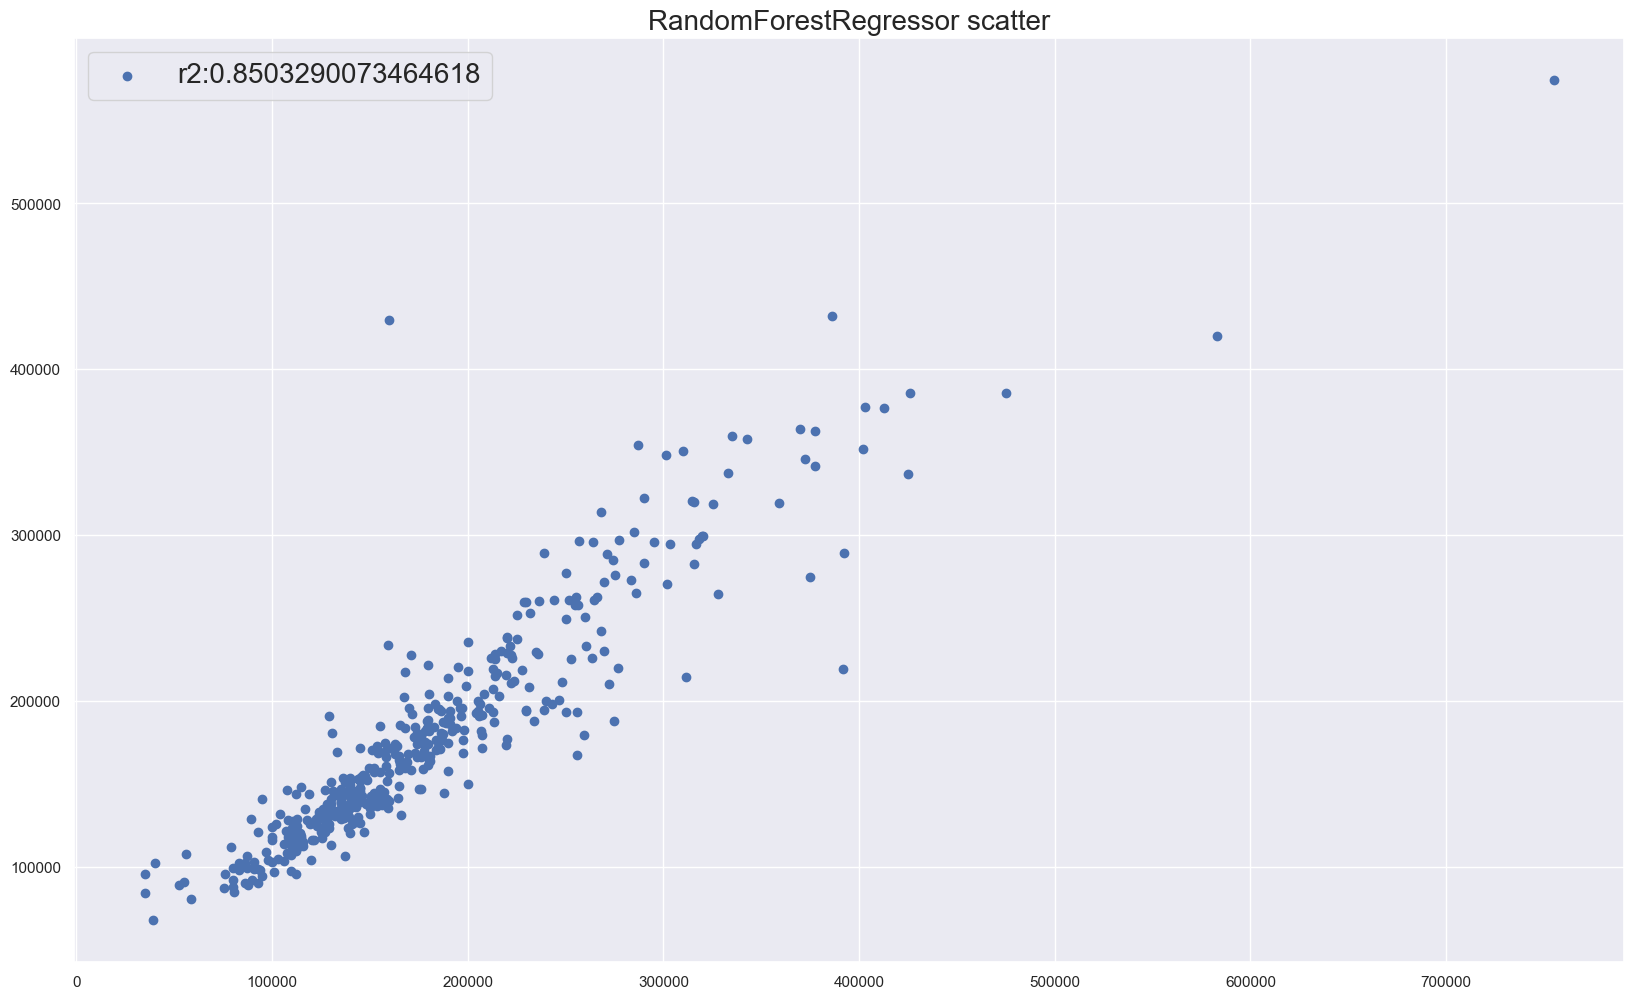

--------------------------------------
Tuning DecisionTreeRegressor...
Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV 1/10] END .........max_depth=None;, score=-1219716148.689 total time=   0.0s
[CV 2/10] END .........max_depth=None;, score=-2172080903.126 total time=   0.0s
[CV 3/10] END .........max_depth=None;, score=-1281101588.471 total time=   0.0s
[CV 4/10] END .........max_depth=None;, score=-4012233950.578 total time=   0.0s
[CV 5/10] END .........max_depth=None;, score=-1186955832.725 total time=   0.0s
[CV 6/10] END .........max_depth=None;, score=-1577145679.363 total time=   0.0s
[CV 7/10] END .........max_depth=None;, score=-1337475873.020 total time=   0.0s
[CV 8/10] END .........max_depth=None;, score=-1563231555.078 total time=   0.0s


D:\ANACONDA\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV 9/10] END .........max_depth=None;, score=-1232133066.049 total time=   0.0s
[CV 10/10] END ........max_depth=None;, score=-1495835435.304 total time=   0.0s
[CV 1/10] END ...........max_depth=10;, score=-1230124215.802 total time=   0.0s
[CV 2/10] END ...........max_depth=10;, score=-1705026220.955 total time=   0.0s
[CV 3/10] END ...........max_depth=10;, score=-1125372481.577 total time=   0.0s
[CV 4/10] END ...........max_depth=10;, score=-4095477726.726 total time=   0.0s
[CV 5/10] END ...........max_depth=10;, score=-1067956112.962 total time=   0.0s
[CV 6/10] END ...........max_depth=10;, score=-1202401554.950 total time=   0.0s
[CV 7/10] END ...........max_depth=10;, score=-1297373190.941 total time=   0.0s
[CV 8/10] END ...........max_depth=10;, score=-1535290340.776 total time=   0.0s
[CV 9/10] END ............max_depth=10;, score=-903279780.617 total time=   0.0s
[CV 10/10] END ..........max_depth=10;, score=-1188889198.666 total time=   0.0s
[CV 1/10] END ...........max

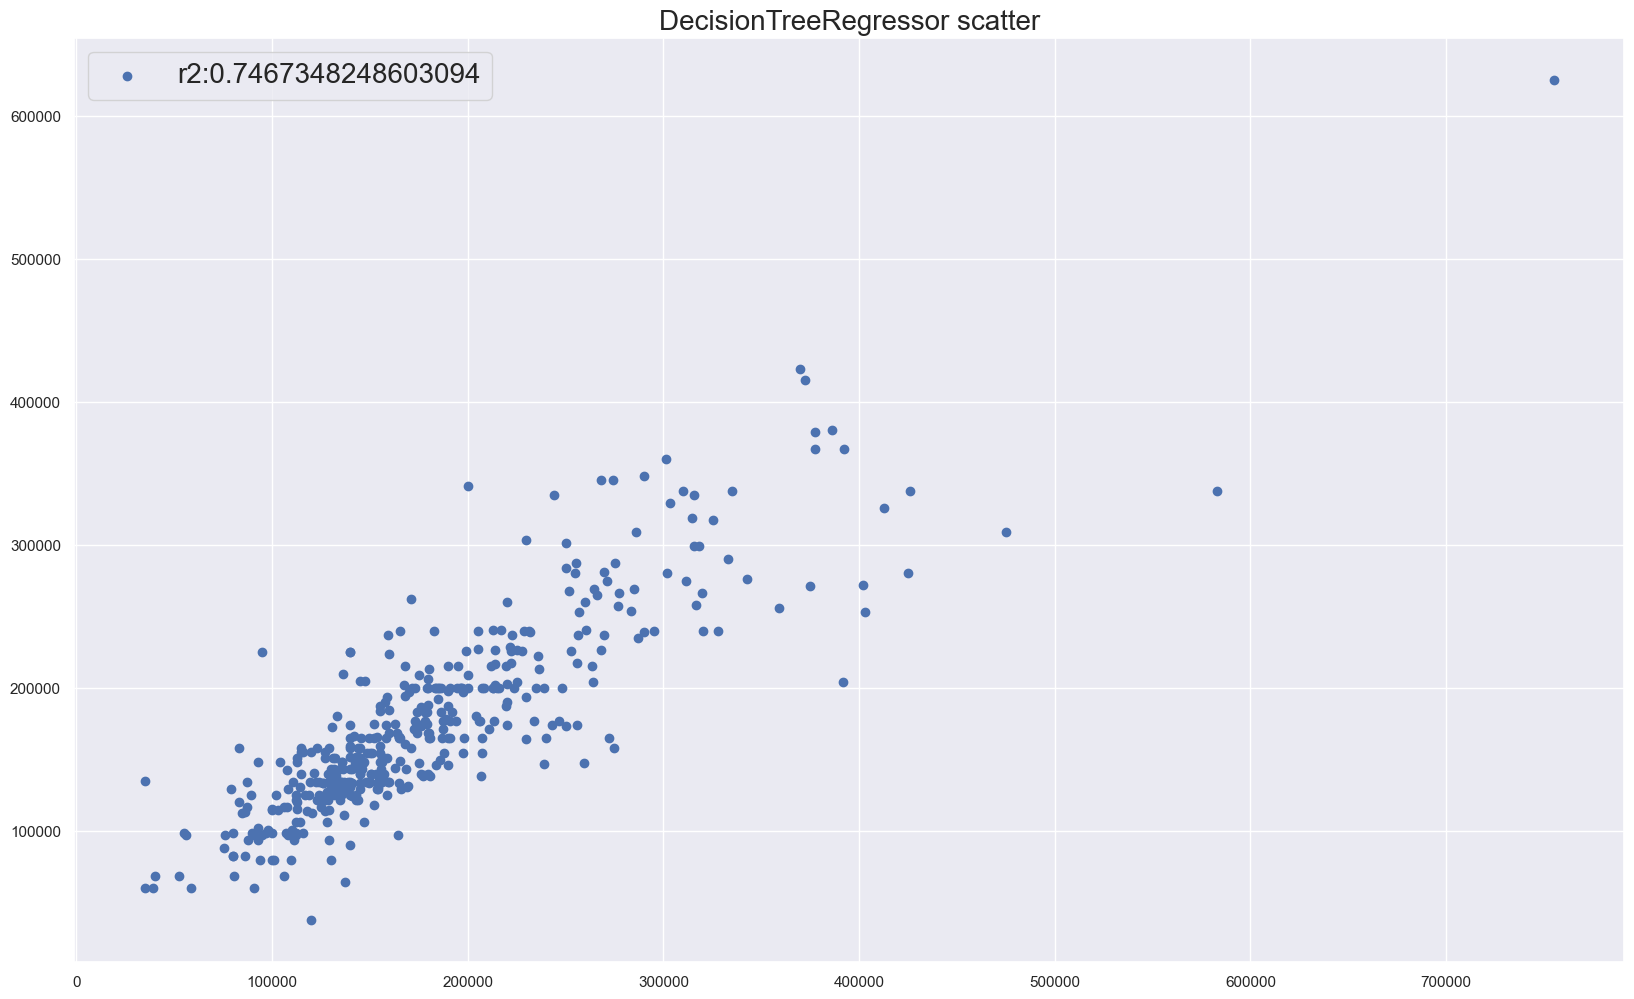

--------------------------------------
Tuning MLPRegressor...
Fitting 10 folds for each of 3 candidates, totalling 30 fits


D:\ANACONDA\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/10] END activation=relu, hidden_layer_sizes=(100,);, score=-34399907092.512 total time=   1.5s


D:\ANACONDA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/10] END activation=relu, hidden_layer_sizes=(100,);, score=-38621897134.690 total time=   1.7s


D:\ANACONDA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/10] END activation=relu, hidden_layer_sizes=(100,);, score=-31317100999.314 total time=   1.5s


D:\ANACONDA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/10] END activation=relu, hidden_layer_sizes=(100,);, score=-40756348063.421 total time=   1.6s


D:\ANACONDA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/10] END activation=relu, hidden_layer_sizes=(100,);, score=-32358025343.813 total time=   1.6s


D:\ANACONDA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 6/10] END activation=relu, hidden_layer_sizes=(100,);, score=-36843149445.639 total time=   1.5s


D:\ANACONDA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 7/10] END activation=relu, hidden_layer_sizes=(100,);, score=-35748137576.916 total time=   1.6s


D:\ANACONDA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 8/10] END activation=relu, hidden_layer_sizes=(100,);, score=-31789312204.143 total time=   1.5s


D:\ANACONDA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 9/10] END activation=relu, hidden_layer_sizes=(100,);, score=-30491576231.842 total time=   1.5s


D:\ANACONDA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 10/10] END activation=relu, hidden_layer_sizes=(100,);, score=-32524595390.630 total time=   1.5s


D:\ANACONDA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/10] END activation=relu, hidden_layer_sizes=(100, 50);, score=-2821585227.512 total time=   2.3s


D:\ANACONDA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/10] END activation=relu, hidden_layer_sizes=(100, 50);, score=-3667459060.344 total time=   2.4s


D:\ANACONDA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/10] END activation=relu, hidden_layer_sizes=(100, 50);, score=-3264331991.239 total time=   2.4s


D:\ANACONDA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/10] END activation=relu, hidden_layer_sizes=(100, 50);, score=-5801772502.052 total time=   2.3s


D:\ANACONDA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/10] END activation=relu, hidden_layer_sizes=(100, 50);, score=-3457478913.180 total time=   2.3s


D:\ANACONDA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 6/10] END activation=relu, hidden_layer_sizes=(100, 50);, score=-3461857094.553 total time=   2.3s


D:\ANACONDA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 7/10] END activation=relu, hidden_layer_sizes=(100, 50);, score=-3739533058.711 total time=   2.3s


D:\ANACONDA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 8/10] END activation=relu, hidden_layer_sizes=(100, 50);, score=-3451662224.617 total time=   2.4s


D:\ANACONDA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 9/10] END activation=relu, hidden_layer_sizes=(100, 50);, score=-3124329662.150 total time=   2.3s


D:\ANACONDA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 10/10] END activation=relu, hidden_layer_sizes=(100, 50);, score=-3954297393.347 total time=   2.3s


D:\ANACONDA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/10] END activation=relu, hidden_layer_sizes=(100, 100, 100);, score=-957635609.447 total time=   4.1s


D:\ANACONDA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/10] END activation=relu, hidden_layer_sizes=(100, 100, 100);, score=-1442377534.810 total time=   4.2s


D:\ANACONDA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/10] END activation=relu, hidden_layer_sizes=(100, 100, 100);, score=-833300720.220 total time=   4.7s


D:\ANACONDA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/10] END activation=relu, hidden_layer_sizes=(100, 100, 100);, score=-3480035400.429 total time=   4.2s


D:\ANACONDA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/10] END activation=relu, hidden_layer_sizes=(100, 100, 100);, score=-883249383.900 total time=   4.4s


D:\ANACONDA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 6/10] END activation=relu, hidden_layer_sizes=(100, 100, 100);, score=-816667070.265 total time=   4.3s


D:\ANACONDA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 7/10] END activation=relu, hidden_layer_sizes=(100, 100, 100);, score=-2857967809.735 total time=   4.7s


D:\ANACONDA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 8/10] END activation=relu, hidden_layer_sizes=(100, 100, 100);, score=-689605626.886 total time=   4.4s


D:\ANACONDA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 9/10] END activation=relu, hidden_layer_sizes=(100, 100, 100);, score=-738622639.343 total time=   4.4s


D:\ANACONDA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 10/10] END activation=relu, hidden_layer_sizes=(100, 100, 100);, score=-1366382599.662 total time=   4.5s


D:\ANACONDA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters for MLPRegressor: {'hidden_layer_sizes': (100, 100, 100), 'activation': 'relu'}
Best MLPRegressor Mean Squared Error: -1406584439.47
MSE for test set is 2739818972.651453
MAE for test set is 24354.883145742035
MAPE for test set is 0.15182664124890868
RMSE for test set is 52343.28010978537
R squared for test set is 0.5646127753968804


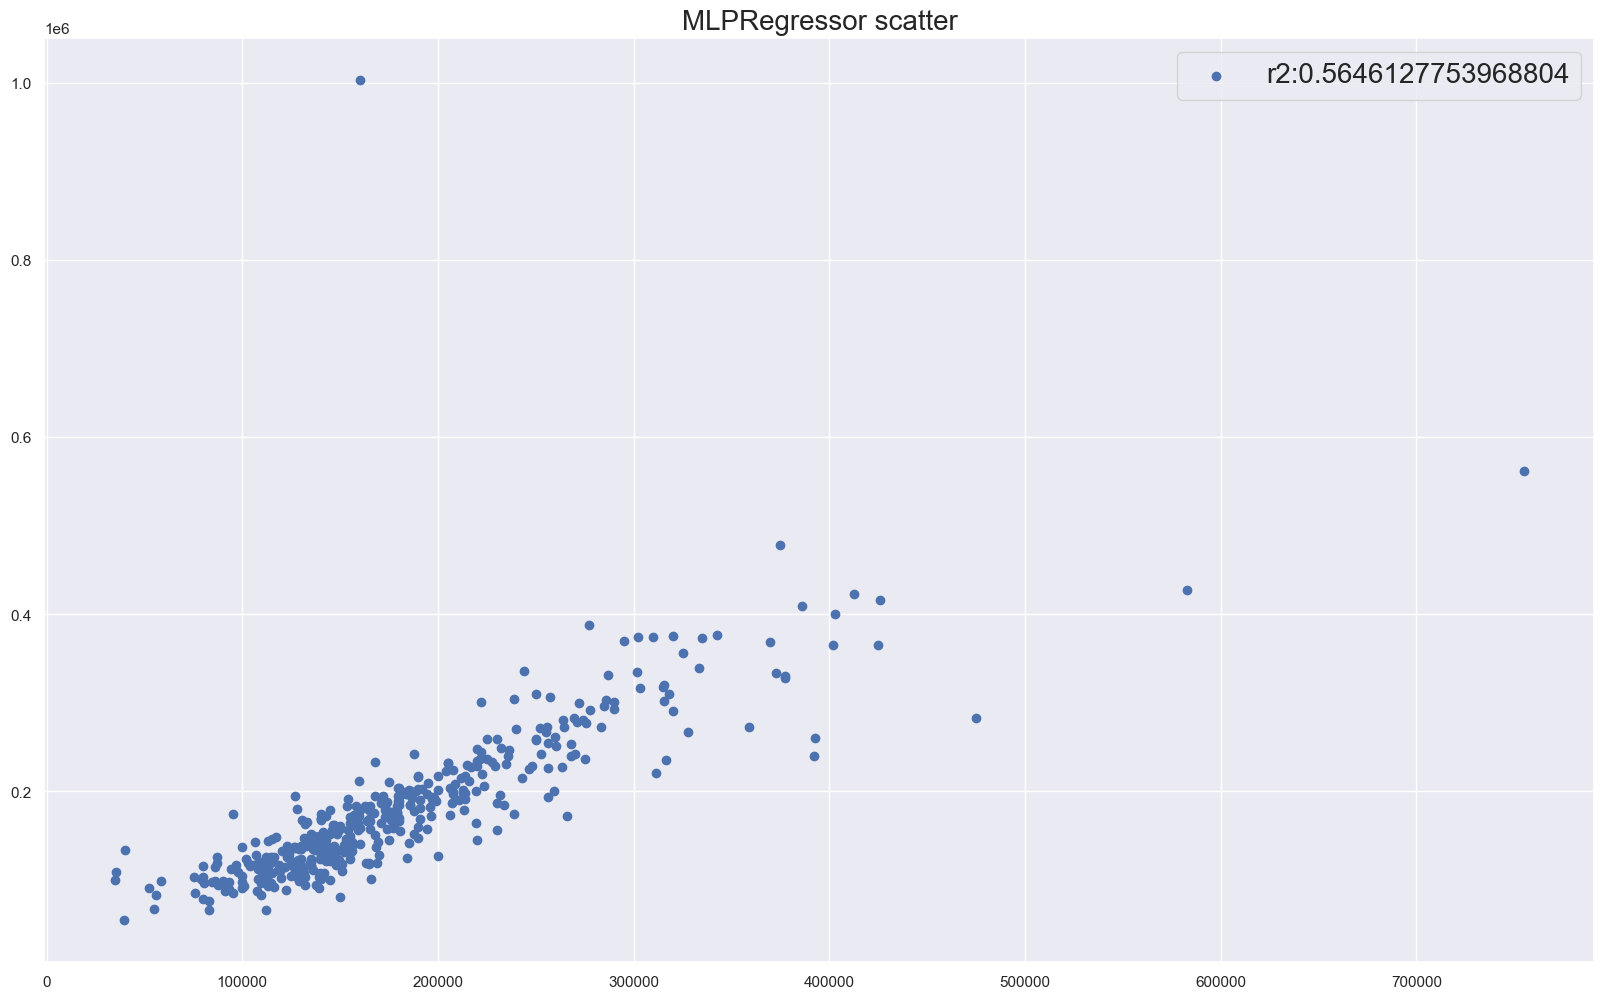

--------------------------------------


In [210]:
best_estimators = {}

for name, (regressor, param_grid) in regressors.items():
    print(f'Tuning {name}...')
    grid_search = RandomizedSearchCV(regressor, param_grid, cv=10, scoring='neg_mean_squared_error',verbose =3, random_state = 42)
    grid_search.fit(Xtrain, y_train)
    
    # Print the best parameters and the corresponding score
    print(f'Best parameters for {name}: {grid_search.best_params_}')
    print(f'Best {name} Mean Squared Error: {grid_search.best_score_:.2f}')
    
    # Evaluate the model on the test set with the best parameters
    best_regressor = grid_search.best_estimator_
    y_pred = best_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    mape = mean_absolute_percentage_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,y_pred)
    best_estimators[name]= best_regressor
    
    
    print(f'MSE for test set is {mse}')
    print(f'MAE for test set is {mae}')
    print(f'MAPE for test set is {mape}')
    print(f'RMSE for test set is {rmse}')
    print(f'R squared for test set is {r2}')

    
    plt.scatter(y_test,y_pred)
    plt.title(f'{name} scatter',fontsize =20)
    plt.legend([f'r2:{r2}'],fontsize = 20)
    plt.show()
    
    print('--------------------------------------')

from running machine learning algorithm , we found that Random forest Regressor is the best predictors of the data , so for the new data we continue with random forest algorithm

In [211]:
newest_data.isnull().sum().sort_values(ascending= False)[:21]

LotFrontage     227
GarageYrBlt      78
MasVnrArea       15
BsmtFullBath      2
BsmtHalfBath      2
TotalBsmtSF       1
BsmtUnfSF         1
BsmtFinSF2        1
GarageCars        1
BsmtFinSF1        1
GarageArea        1
TotRmsAbvGrd      0
FireplaceQu       0
Fireplaces        0
Functional        0
MSSubClass        0
KitchenQual       0
KitchenAbvGr      0
BedroomAbvGr      0
GarageType        0
FullBath          0
dtype: int64

## preparing new data



In [212]:
#fill Nan in Newest data
category_modes_test_new = newest_data[cat_columns].mode().iloc[0]
numerical_median_test_new = newest_data[num_columns.columns].median()

for col in newest_data[cat_columns]:
    newest_data[col].fillna(category_modes_test_new[col], inplace=True)
for col in newest_data[num_columns.columns]:
    newest_data[col].fillna(numerical_median_test_new[col], inplace=True)

In [213]:
newest_data

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
Id                                                                          
1461          20         2         80.0    11622       1      2         3   
1462          20         3         81.0    14267       1      2         0   
1463          60         3         74.0    13830       1      2         0   
1464          60         3         78.0     9978       1      2         0   
1465         120         3         43.0     5005       1      2         0   
...          ...       ...          ...      ...     ...    ...       ...   
2915         160         4         21.0     1936       1      2         3   
2916         160         4         21.0     1894       1      2         3   
2917          20         3        160.0    20000       1      2         3   
2918          85         3         62.0    10441       1      2         3   
2919          60         3         74.0     9627       1      2         3   

      LandContour  Utilities  LotConfig  ...  ScreenPorch  PoolArea  PoolQC  \
Id                                       ...                                  
1461            3          0          4  ...          120         0       3   
1462            3          0          0  ...            0         0       3   
1463            3          0          4  ...            0         0       3   
1464            3          0          4  ...            0         0       3   
1465            1          0          4  ...          144         0       3   
...           ...        ...        ...  ...          ...       ...     ...   
2915            3          0          4  ...            0         0       3   
2916            3          0          4  ...            0         0       3   
2917            3          0          4  ...            0         0       3   
2918            3          0          4  ...            0         0       3   
2919            3          0          4  ...            0         0       3   

      Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
Id                                                                          
1461      2            4        0       6    2010         8              4  
1462      4            0    12500       6    2010         8              4  
1463      2            4        0       3    2010         8              4  
1464      4            4        0       6    2010         8              4  
1465      4            4        0       1    2010         8              4  
...     ...          ...      ...     ...     ...       ...            ...  
2915      4            4        0       6    2006         8              4  
2916      4            4        0       4    2006         8              0  
2917      4            4        0       9    2006         8              0  
2918      2            2      700       7    2006         8              4  
2919      4            4        0      11    2006         8              4  

[1459 rows x 79 columns]

In [214]:
newest_data = newest_data.drop(['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu'],axis=1)

In [215]:
newest_data_scale = feature_scale(newest_data)
newest_data[newest_data_scale.columns]= sc.transform(newest_data[newest_data_scale.columns])

In [216]:
newest_data


MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
Id                                                                      
1461   -0.854647 -1.658013     0.443215  0.178061  0.070117  0.745071   
1462   -0.854647 -0.038042     0.489043  0.538213  0.070117 -1.385887   
1463    0.101379 -0.038042     0.168246  0.478710  0.070117 -1.385887   
1464    0.101379 -0.038042     0.351559 -0.045792  0.070117 -1.385887   
1465    1.535418 -0.038042    -1.252427 -0.722933  0.070117 -1.385887   
...          ...       ...          ...       ...       ...       ...   
2915    2.491444  1.581928    -2.260647 -1.140819  0.070117  0.745071   
2916    2.491444  1.581928    -2.260647 -1.146538  0.070117  0.745071   
2917   -0.854647 -0.038042     4.109468  1.318838  0.070117  0.745071   
2918    0.698895 -0.038042    -0.381692  0.017251  0.070117  0.745071   
2919    0.101379 -0.038042     0.168246 -0.093586  0.070117  0.745071   

      LandContour  Utilities  LotConfig  LandSlope  ...  OpenPorchSF  \
Id                                                  ...                
1461     0.317882  -0.031296   0.598503  -0.222115  ...    -0.722564   
1462     0.317882  -0.031296  -1.890490  -0.222115  ...    -0.139952   
1463     0.317882  -0.031296   0.598503  -0.222115  ...    -0.172320   
1464     0.317882  -0.031296   0.598503  -0.222115  ...    -0.139952   
1465    -2.507123  -0.031296   0.598503  -0.222115  ...     0.604496   
...           ...        ...        ...        ...  ...          ...   
2915     0.317882  -0.031296   0.598503  -0.222115  ...    -0.722564   
2916     0.317882  -0.031296   0.598503  -0.222115  ...    -0.334156   
2917     0.317882  -0.031296   0.598503  -0.222115  ...    -0.722564   
2918     0.317882  -0.031296   0.598503  -0.222115  ...    -0.204687   
2919     0.317882  -0.031296   0.598503   3.439204  ...     0.054252   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea    MiscVal    MoSold  \
Id                                                                           
1461      -0.355538  -0.110159     1.942292 -0.069851  -0.091301 -0.120565   
1462      -0.355538  -0.110159    -0.279748 -0.069851  21.274650 -0.120565   
1463      -0.355538  -0.110159    -0.279748 -0.069851  -0.091301 -1.214213   
1464      -0.355538  -0.110159    -0.279748 -0.069851  -0.091301 -0.120565   
1465      -0.355538  -0.110159     2.386700 -0.069851  -0.091301 -1.943311   
...             ...        ...          ...       ...        ...       ...   
2915      -0.355538  -0.110159    -0.279748 -0.069851  -0.091301 -0.120565   
2916      -0.355538  -0.110159    -0.279748 -0.069851  -0.091301 -0.849664   
2917      -0.355538  -0.110159    -0.279748 -0.069851  -0.091301  0.973083   
2918      -0.355538  -0.110159    -0.279748 -0.069851   1.105192  0.243984   
2919      -0.355538  -0.110159    -0.279748 -0.069851  -0.091301  1.702181   

        YrSold  SaleType  SaleCondition  
Id                                       
1461  1.645089   0.31916       0.223838  
1462  1.645089   0.31916       0.223838  
1463  1.645089   0.31916       0.223838  
1464  1.645089   0.31916       0.223838  
1465  1.645089   0.31916       0.223838  
...        ...       ...            ...  
2915 -1.378798   0.31916       0.223838  
2916 -1.378798   0.31916      -3.282092  
2917 -1.378798   0.31916      -3.282092  
2918 -1.378798   0.31916       0.223838  
2919 -1.378798   0.31916       0.223838  

[1459 rows x 73 columns]

In [217]:
#rff = RandomForestRegressor(n_estimators = 200,min_samples_split =2, min_samples_leaf =2 , max_depth = 50)
#rff.fit(Xtrain,y_train)
best_estimators['RandomForestRegressor'].fit(Xtrain,y_train)

RandomForestRegressor(max_depth=50, min_samples_leaf=2, n_estimators=200,
                      random_state=42)

<Axes: >

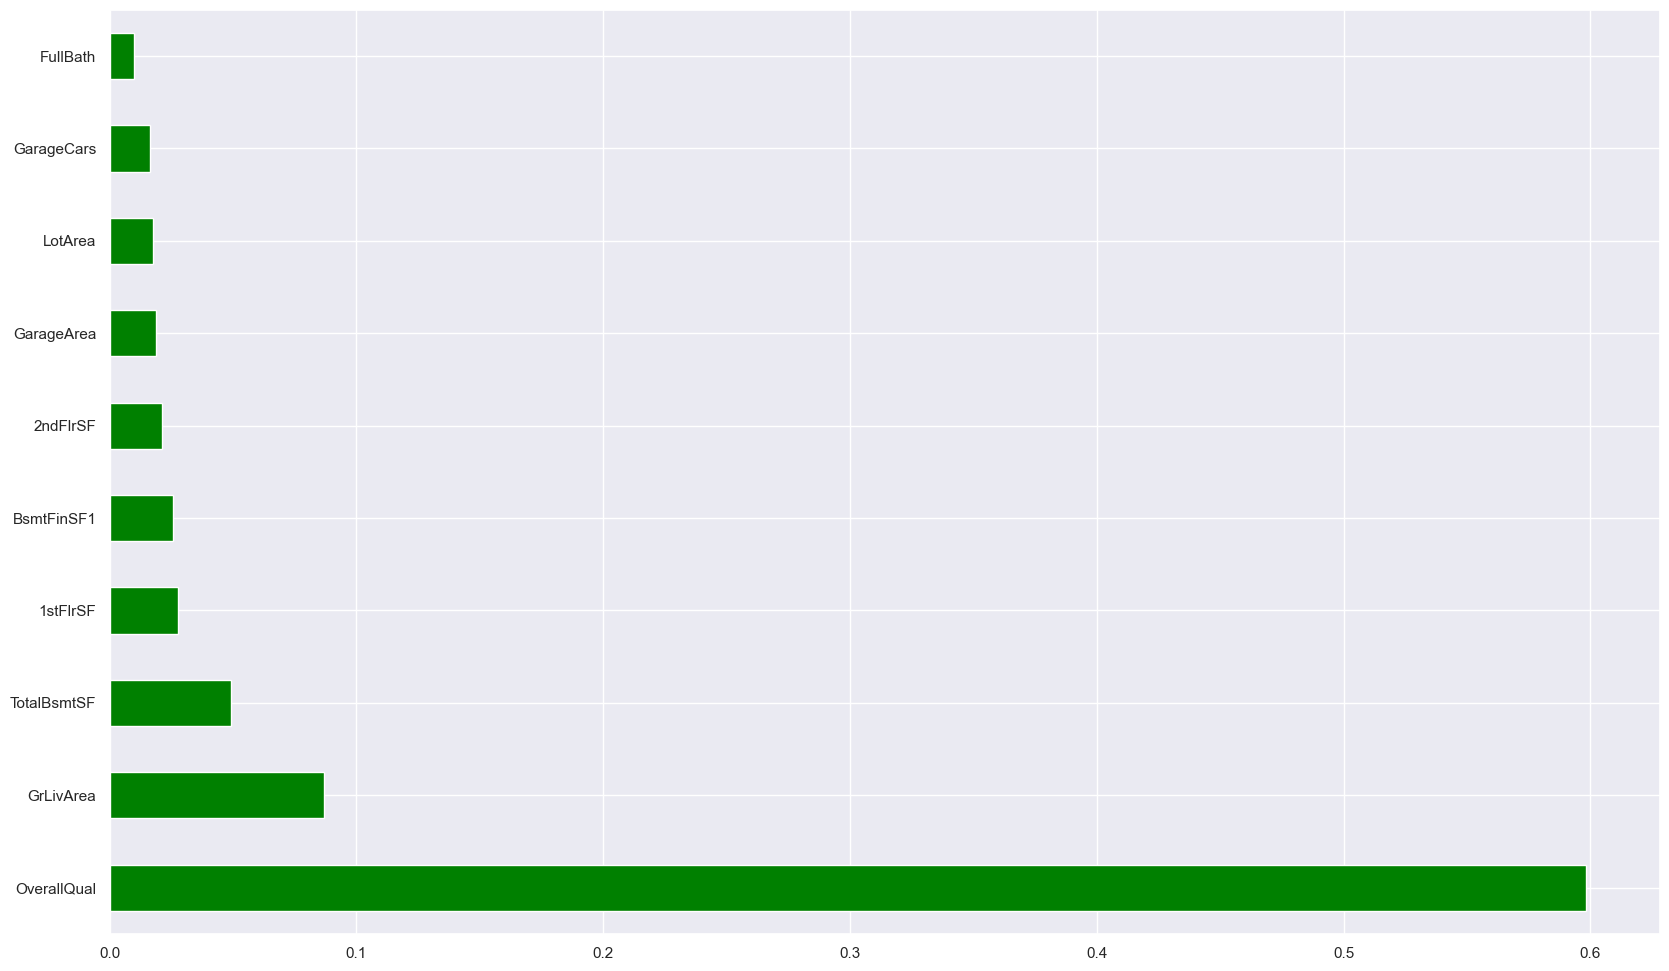

In [218]:
important = pd.Series(best_estimators['RandomForestRegressor'].feature_importances_,index = Xtrain.columns)
important.sort_values(ascending = False,inplace = True)
important.head(10).plot.barh(color = 'green')


In [219]:
#prediction = rff.predict(newest_data)
prediction = best_estimators['RandomForestRegressor'].predict(newest_data)

In [220]:
prediction_df = pd.DataFrame(prediction, columns = ['Prediction'])

In [221]:
prediction_df

Prediction
0     123667.952841
1     154592.228214
2     176441.029310
3     180356.860873
4     202205.221869
...             ...
1454   86207.385992
1455   87384.025571
1456  152187.563845
1457  117404.053313
1458  228167.543690

[1459 rows x 1 columns]

In [222]:
id = newest_data.reset_index()
id = id['Id']

In [223]:
result = pd.concat([id,prediction_df],axis = 1)

In [224]:
result['SalePrice']= result['Prediction']

In [225]:
result_final = result.drop('Prediction',axis=1)

In [226]:
result_final.to_csv('random forest regressor.csv',index = False)